Copyright© 2020. VL Blockchain.

[myworldbox](https://myworldbox.github.io)

Author: myworldbox

Overview

My Strategy is to use all of the models from [ sklearn ] to predict the Decision columns.

I have modularized scalers, models, and metrics into arrays to study their collective impacts on the dataset. I have included an additional dataset from yahoo finance and applied the same concept to data with a different shape.

For yahoo finance data, I try to make the problem of trading a binary classification problem.

My models analyze the closing price of the historical market.

If the previous closing price is lower than the current closing price, it is classified as a buying opportunity and vice versa.

To minimize spreads, I only try assets with the top 10 market capitalization.

Only high liquidity markets are being tested.

1. Description of the dataset and any preprocessing

`The data is obtained from yahoo finance. It only has numeric features. I generate two new datasets from the original datasets as I want to inherit the historical impact of price data from a long and short timeframe. I use both the min max scaler and standard scaler to scale the data. Also, I shift all the Decision columns up by one row as a prediction should be made one day before the result has appeared. NA values are filled with median or None words.`

2. Description of the machine learning task(s) performed on the dataset

`I have used models from Probability Calibration, Dummy estimators, Ensemble Methods, Gaussian Processes, Linear classifiers, Classical linear regressors, Regressors with variable selection, Bayesian regressors, Outlier-robust regressors, Generalized linear models (GLM) for regression, Miscellaneous, Naive Bayes, Nearest Neighbors, Neural network models, Semi-Supervised Learning, Support Vector Machines, and Decision Trees to compare their effectiveness.`

3. Description of the hardware and software computing environment, machine learning methods, and parameter settings

`For both hardware and software, I use GPU from Colab to conduct machine learning. All parameters in models are left to default to avoid extra complexity.`

4. Description of the experiments

`I feed scalers, models, and metrics into the array to evaluate their independent impacts. You can observe that simple classifiers already perform well on the datasets. It may be overkill to use complex models like CNN with customized layers. Generally, my script can be applied to both regression and classification problems with slight modification as most models are modulized into arrays. Although the data of credit card and yahoo finance data are in different shapes. My script can still adapt to both of them.`

5. Visualization and discussion of the results obtained

`The result is applied in the Meun section below. My implementation also allows the use of regressors on classification objects. I rounded the regression results up or down to obtain either 1 or 0. Regression is generally performing worst than classifiers. Yet, DummyRegressor and DummyClassifier also perform great with this customized approach.`

Meun

Use asset_report(, True) to see the detailed report

The current ranking is just based on accuracy to minimize testing time

<a name="nav-meun"></a>

[(Data 1) Trading Batch Classification Report](#trading-data-report-1)

This data inherits the previous date's price impact.

Scaling is done horizontally.

[(Data 2) Trading Batch Classification Report](#trading-data-report-2)

This data inherits historical price impact.

Scaling is done horizontally.

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 KB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 66.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 15.9 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [ ]:
import warnings
warnings.filterwarnings('ignore') 

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from sklearn.model_selection import train_test_split

In [ ]:
'''
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/Colab Notebooks/comp4981'
'''

"\nfrom google.colab import drive\ndrive.mount('/content/drive')\n\npath = '/content/drive/MyDrive/Colab Notebooks/comp4981'\n"

In [ ]:
from sklearn.base import is_classifier, is_regressor

In [ ]:
from sklearn import feature_selection

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
from sklearn import calibration
from sklearn import dummy
from sklearn import cluster
from sklearn import ensemble
from sklearn import gaussian_process
from sklearn import isotonic
from sklearn import kernel_approximation
from sklearn import kernel_ridge
from sklearn import linear_model
from sklearn import manifold
from sklearn import naive_bayes
from sklearn import neighbors
from sklearn import neural_network
from sklearn import semi_supervised
from sklearn import svm
from sklearn import tree

In [ ]:
from sklearn import metrics

In [ ]:
from google.colab import drive

In [ ]:
pd.set_option('max_colwidth', 500)

In [ ]:
color = "white"

In [ ]:
test_size = 0.9

In [ ]:
plt.style.use('seaborn-darkgrid')
%matplotlib inline

In [ ]:
def zeroColor(score):
  if (score == 0):
    return f"background-color: #140326;"

def negativeColor(score):
  if (score < 0):
    return f"background-color: #d822ff;"

def reportColor(score):
    return f"background-color: #274e13;"

In [ ]:
'''
drive.mount('/content/drive')

path = '/content/drive/MyDrive/comp4211/project/data/'
'''

"\ndrive.mount('/content/drive')\n\npath = '/content/drive/MyDrive/comp4211/project/data/'\n"

In [ ]:
scaler = [MinMaxScaler(feature_range=(0, 100)), StandardScaler()]

In [ ]:
model = [
    # Probability Calibration
    calibration.CalibratedClassifierCV(),
    # calibration.calibration_curve(), 

    # Dummy estimators
    dummy.DummyClassifier(),
    dummy.DummyRegressor(),

    # Clustering
    # cluster.AffinityPropagation(),
    # cluster.AgglomerativeClustering(),
    # cluster.Birch(),
    # cluster.DBSCAN(),
    # cluster.FeatureAgglomeration(),
    # cluster.KMeans(),
    # cluster.BisectingKMeans(),
    # cluster.MiniBatchKMeans(),
    # cluster.MeanShift(),
    # cluster.OPTICS(),
    # cluster.SpectralClustering(),
    # cluster.SpectralBiclustering(),
    # cluster.SpectralCoclustering(),

    # Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.AdaBoostRegressor(),
    ensemble.BaggingClassifier(),
    ensemble.BaggingRegressor(),
    ensemble.ExtraTreesClassifier(),
    ensemble.ExtraTreesRegressor(),
    ensemble.GradientBoostingClassifier(),
    ensemble.GradientBoostingRegressor(),
    ensemble.IsolationForest(),
    ensemble.RandomForestClassifier(),
    ensemble.RandomForestRegressor(),
    # ensemble.RandomTreesEmbedding(),
    # ensemble.StackingClassifier(),
    # ensemble.StackingRegressor(),
    # ensemble.VotingClassifier(),
    # ensemble.VotingRegressor(),
    ensemble.HistGradientBoostingRegressor(),
    ensemble.HistGradientBoostingClassifier(),

    # Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    gaussian_process.GaussianProcessRegressor(),

    # Isotonic regression
    # isotonic.IsotonicRegression(),
    # isotonic.check_increasing(),
    # isotonic.isotonic_regression(),

    # Kernel Approximation
    # kernel_approximation.AdditiveChi2Sampler(),
    # kernel_approximation.Nystroem(),
    # kernel_approximation.PolynomialCountSketch(),
    # kernel_approximation.RBFSampler(),
    # kernel_approximation.SkewedChi2Sampler(),

    # Linear classifiers
    linear_model.LogisticRegression(),
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.Perceptron(),
    linear_model.RidgeClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.SGDOneClassSVM(),

    # Classical linear regressors
    linear_model.LinearRegression(),
    linear_model.Ridge(),
    linear_model.RidgeCV(),
    linear_model.SGDRegressor(),

    # Regressors with variable selection
    linear_model.ElasticNet(),
    linear_model.ElasticNetCV(),
    linear_model.Lars(),
    linear_model.LarsCV(),
    linear_model.Lasso(),
    linear_model.LassoCV(),
    linear_model.LassoLars(),
    linear_model.LassoLarsCV(),
    linear_model.LassoLarsIC(),
    linear_model.OrthogonalMatchingPursuit(),
    linear_model.OrthogonalMatchingPursuitCV(),

    # Bayesian regressors
    linear_model.ARDRegression(),
    linear_model.BayesianRidge(),

    # Multi-task linear regressors with variable selection
    # linear_model.MultiTaskElasticNet(),
    # linear_model.MultiTaskElasticNetCV(),
    # linear_model.MultiTaskLasso(),
    # linear_model.MultiTaskLassoCV(),

    # Outlier-robust regressors
    linear_model.HuberRegressor(),
    ## linear_model.QuantileRegressor(),
    # linear_model.RANSACRegressor(),
    linear_model.TheilSenRegressor(),
    
    # Generalized linear models (GLM) for regression
    linear_model.PoissonRegressor(),
    linear_model.TweedieRegressor(),
    # linear_model.GammaRegressor(),

    # Miscellaneous
    linear_model.PassiveAggressiveRegressor(),
    # linear_model.enet_path(),
    # linear_model.lars_path(),
    # linear_model.lars_path_gram(),
    # linear_model.lasso_path(),
    # linear_model.orthogonal_mp(),
    # linear_model.orthogonal_mp_gram(),
    # linear_model.ridge_regression(),

    # Manifold Learning
    # manifold.Isomap(),
    # manifold.LocallyLinearEmbedding(),
    # manifold.MDS(),
    # manifold.SpectralEmbedding(),
    # manifold.TSNE(),
    # manifold.locally_linear_embedding(),
    # manifold.smacof(),
    # manifold.spectral_embedding(),
    # manifold.trustworthiness(),

    # Naive Bayes
    naive_bayes.BernoulliNB(),
    # naive_bayes.CategoricalNB(),
    # naive_bayes.ComplementNB(),
    naive_bayes.GaussianNB(),
    # naive_bayes.MultinomialNB(),

    # Nearest Neighbors
    # neighbors.BallTree(),
    # neighbors.KDTree(),
    # neighbors.KernelDensity(),
    neighbors.KNeighborsClassifier(),
    neighbors.KNeighborsRegressor(),
    # neighbors.KNeighborsTransformer(),
    # neighbors.LocalOutlierFactor(),
    # neighbors.RadiusNeighborsClassifier(),
    neighbors.RadiusNeighborsRegressor(),
    # neighbors.RadiusNeighborsTransformer(),
    neighbors.NearestCentroid(),
    # neighbors.NearestNeighbors(),
    # neighbors.NeighborhoodComponentsAnalysis(),
    # neighbors.kneighbors_graph(),
    # neighbors.radius_neighbors_graph(),
    # neighbors.sort_graph_by_row_values(),

    # Neural network models
    # neural_network.BernoulliRBM(),
    neural_network.MLPClassifier(),
    neural_network.MLPRegressor(),

    # Semi-Supervised Learning
    semi_supervised.LabelPropagation(),
    semi_supervised.LabelSpreading(),
    # semi_supervised.SelfTrainingClassifier(),

    # Support Vector Machines
    svm.LinearSVC(),
    svm.LinearSVR(),
    # svm.NuSVC(),
    svm.NuSVR(),
    svm.OneClassSVM(),
    svm.SVC(),
    svm.SVR(),

    # Decision Trees
    tree.DecisionTreeClassifier(),
    tree.DecisionTreeRegressor(),
    tree.ExtraTreeClassifier(),
    tree.ExtraTreeRegressor(),
    # tree.export_graphviz(),
    # tree.export_text(),
    ]

In [ ]:
classification_metric = [
    # Classification metrics
    metrics.accuracy_score,
    metrics.auc,
    metrics.average_precision_score,
    metrics.balanced_accuracy_score,
    metrics.brier_score_loss,
    metrics.classification_report,
    metrics.cohen_kappa_score,
    metrics.confusion_matrix,
    metrics.dcg_score,
    metrics.det_curve,
    metrics.f1_score,
    metrics.fbeta_score,
    metrics.hamming_loss,
    metrics.hinge_loss,
    metrics.jaccard_score,
    metrics.log_loss,
    metrics.matthews_corrcoef,
    metrics.multilabel_confusion_matrix,
    metrics.ndcg_score,
    metrics.precision_recall_curve,
    metrics.precision_recall_fscore_support,
    metrics.precision_score,
    metrics.recall_score,
    metrics.roc_auc_score,
    metrics.roc_curve,
    metrics.top_k_accuracy_score,
    metrics.zero_one_loss,
]

In [ ]:
regression_metric = [
    # Regression metrics
    metrics.explained_variance_score,
    metrics.max_error,
    metrics.mean_absolute_error,
    metrics.mean_squared_error,
    metrics.mean_squared_log_error,
    metrics.median_absolute_error,
    metrics.r2_score,
    metrics.mean_poisson_deviance,
    metrics.mean_gamma_deviance,
    metrics.mean_tweedie_deviance,
    metrics.d2_tweedie_score,
    metrics.mean_pinball_loss,
    # metrics.d2_pinball_score,
    # metrics.d2_absolute_error_score
]



Account Setting

In [ ]:
money = 10000

Additional Testing to different datasets

In [ ]:
start_period = '2007-11-01'
end_period = '2017-11-01'

In [ ]:
major_stock = [
    'AAPL', # AAPL
    'SR', # SR
    'MSFT', # MSFT
    'GOOG', # GOOG
    'AMZN', # AMAZ

    'BRK-B', # BRK-B
    'TSLA', # TSLA
    'UNH', # UNH
    'XOM', # XOM
    'JNJ', # JNJ
]

In [ ]:
major_forex = [
    'EURUSD=X', # EUR/USD (euro/US dollar)
    'USDJPY=X', # USD/JPY (US dollar/Japanese yen)
    'GBPUSD=X', # GBP/USD (British pound/US dollar)
    'AUDUSD=X', # AUD/USD (Australian dollar/US dollar)
    'USDCAD=X', # USD/CAD (US dollar/Canadian dollar)

    'USDCNY=X', # USD/CNY (US dollar/Chinese renminbi)
    'USDCHF=X', # USD/CHF (US dollar/Swiss franc)
    'USDHKD=X', # USD/HKD (US dollar/Hong Kong dollar)
    'EURGBP=X', # EUR/GBP (euro/British pound sterling)
    'USDKRW=X', # USD/KRW (US dollar/South Korean won)
]

In [ ]:
asset = [major_stock, major_forex]

In [ ]:
asset_data = []

for i in asset:
  
  data = yf.download(tickers=i, start=start_period, end=end_period, period='1d', group_by='ticker')
  data.index = pd.to_datetime(data.index)

  asset_data.append(data)

[*********************100%***********************]  10 of 10 completed
[*********************100%***********************]  10 of 10 completed


In [ ]:
print(np.asarray(asset_data[0]).shape)

(2518, 60)


In [ ]:
for x, i in enumerate(asset):

  print("---||---||---", i[0], "---||---||---\n\n", 
        asset_data[x][i[0]], 
        "\n\n(", asset_data[x][i[0]]['Close'][0], ")\n")

---||---||--- AAPL ---||---||---

                  Open       High        Low      Close  Adj Close      Volume
Date                                                                         
2007-11-01   6.735714   6.789286   6.428571   6.694286   5.706328   805036400
2007-11-02   6.757500   6.765714   6.553214   6.709643   5.719420  1002114400
2007-11-05   6.617500   6.748571   6.580000   6.649286   5.667971   804176800
2007-11-06   6.680357   6.857143   6.616786   6.849643   5.838758   954727200
2007-11-07   6.807500   6.881429   6.647500   6.653571   5.671624   994327600
...               ...        ...        ...        ...        ...         ...
2017-10-25  39.227501  39.387501  38.817501  39.102501  37.049374    84828400
2017-10-26  39.307499  39.457500  39.195000  39.352501  37.286247    68002000
2017-10-27  39.822498  40.900002  39.674999  40.762501  38.622211   177816800
2017-10-30  40.972500  42.017502  40.930000  41.680000  39.491531   178803200
2017-10-31  41.974998  42.412

**Data Processing**

Feature Scaling

Decision column implies the relatioinship of previous day and today

It needs to be shifted down by one row

Two kinds of datasets are generated

*   Datasets that inherit the historical impact (matrix expansion + closing price + shifting)
*   Datasets that inherit yesterday's impact (shifting)

1. Datasets that inherit yesterday's impact (shifting)

In [ ]:
def scalingData(data, major):

  scaled_processed_data = [] # [asset][scaler][asset_type][column][row]

  for x, scaling in enumerate(scaler):

    print("\n",scaling,"\n")

    processed_data = []

    for y, i in enumerate(major):

      decision = []

      if(y < len(major)):
        print("[", y, "]:", major[y])
        
        data[major[y]] = scaling.fit_transform(data[major[y]].T).T
        data[major[y]] = data[major[y]].fillna(data[major[y]].median()) # fill NA with median

        for z in range(0, len(data)): # create new Decision column

          if(data[major[y]]['Open'][z] < data[major[y]]['Close'][z]):
            decision.append(1) # buy
          else:
            decision.append(0) # sell

        idea = pd.DataFrame(decision, columns = ['Decision'])
        idea['Decision'] = idea['Decision'].shift(-1) # shifting Decision column one row up
        
        idea.index = data[major[y]].index

        processed_data.append(pd.concat([data[major[y]], idea['Decision']], axis=1).iloc[1:-1]) # remove the first row as data is shifted down

    scaled_processed_data.append(processed_data)

  return scaled_processed_data

scaled_processed_asset = []

for x, i in enumerate(asset_data):

  scaled_processed_asset.append(scalingData(asset_data[x], asset[x]))



 MinMaxScaler(feature_range=(0, 100)) 

[ 0 ]: AAPL
[ 1 ]: SR
[ 2 ]: MSFT
[ 3 ]: GOOG
[ 4 ]: AMZN
[ 5 ]: BRK-B
[ 6 ]: TSLA
[ 7 ]: UNH
[ 8 ]: XOM
[ 9 ]: JNJ

 StandardScaler() 

[ 0 ]: AAPL
[ 1 ]: SR
[ 2 ]: MSFT
[ 3 ]: GOOG
[ 4 ]: AMZN
[ 5 ]: BRK-B
[ 6 ]: TSLA
[ 7 ]: UNH
[ 8 ]: XOM
[ 9 ]: JNJ

 MinMaxScaler(feature_range=(0, 100)) 

[ 0 ]: EURUSD=X
[ 1 ]: USDJPY=X
[ 2 ]: GBPUSD=X
[ 3 ]: AUDUSD=X
[ 4 ]: USDCAD=X
[ 5 ]: USDCNY=X
[ 6 ]: USDCHF=X
[ 7 ]: USDHKD=X
[ 8 ]: EURGBP=X
[ 9 ]: USDKRW=X

 StandardScaler() 

[ 0 ]: EURUSD=X
[ 1 ]: USDJPY=X
[ 2 ]: GBPUSD=X
[ 3 ]: AUDUSD=X
[ 4 ]: USDCAD=X
[ 5 ]: USDCNY=X
[ 6 ]: USDCHF=X
[ 7 ]: USDHKD=X
[ 8 ]: EURGBP=X
[ 9 ]: USDKRW=X


In [ ]:
scaled_processed_asset[0][0][0]

Open          High           Low         Close  Adj Close  \
Date                                                                            
2007-11-02  1.035890e-07  1.044087e-07  8.320349e-08  9.881336e-08        0.0   
2007-11-05  1.180746e-07  1.343734e-07  1.134115e-07  1.220272e-07        0.0   
2007-11-06  8.815073e-08  1.066676e-07  8.149218e-08  1.058821e-07        0.0   
2007-11-07  1.142356e-07  1.216707e-07  9.814435e-08  9.875492e-08        0.0   
2007-11-08  7.008470e-08  7.051922e-08  3.437755e-08  4.892491e-08        0.0   
...                  ...           ...           ...           ...        ...   
2017-10-24  2.618213e-06  3.015940e-06  2.586537e-06  2.903313e-06        0.0   
2017-10-25  2.567688e-06  2.756303e-06  2.084359e-06  2.420331e-06        0.0   
2017-10-26  2.972343e-06  3.192927e-06  2.806908e-06  3.038521e-06        0.0   
2017-10-27  6.750133e-07  1.280976e-06  5.920633e-07  1.203649e-06        0.0   
2017-10-30  8.282675e-07  1.412710e-06  8.044986e-07  1.223954e-06        0.0   

            Volume  Decision  
Date                          
2007-11-02   100.0       1.0  
2007-11-05   100.0       1.0  
2007-11-06   100.0       0.0  
2007-11-07   100.0       0.0  
2007-11-08   100.0       0.0  
...            ...       ...  
2017-10-24   100.0       0.0  
2017-10-25   100.0       1.0  
2017-10-26   100.0       1.0  
2017-10-27   100.0       1.0  
2017-10-30   100.0       1.0  

[2516 rows x 7 columns]

In [ ]:
np.asarray(scaled_processed_asset).shape

(2, 2, 10)

In [ ]:
print(np.asarray(scaled_processed_asset[1]).shape)

(2, 10, 2606, 7)



 ['AAPL', 'SR', 'MSFT', 'GOOG', 'AMZN', 'BRK-B', 'TSLA', 'UNH', 'XOM', 'JNJ']

 MinMaxScaler(feature_range=(0, 100)) 



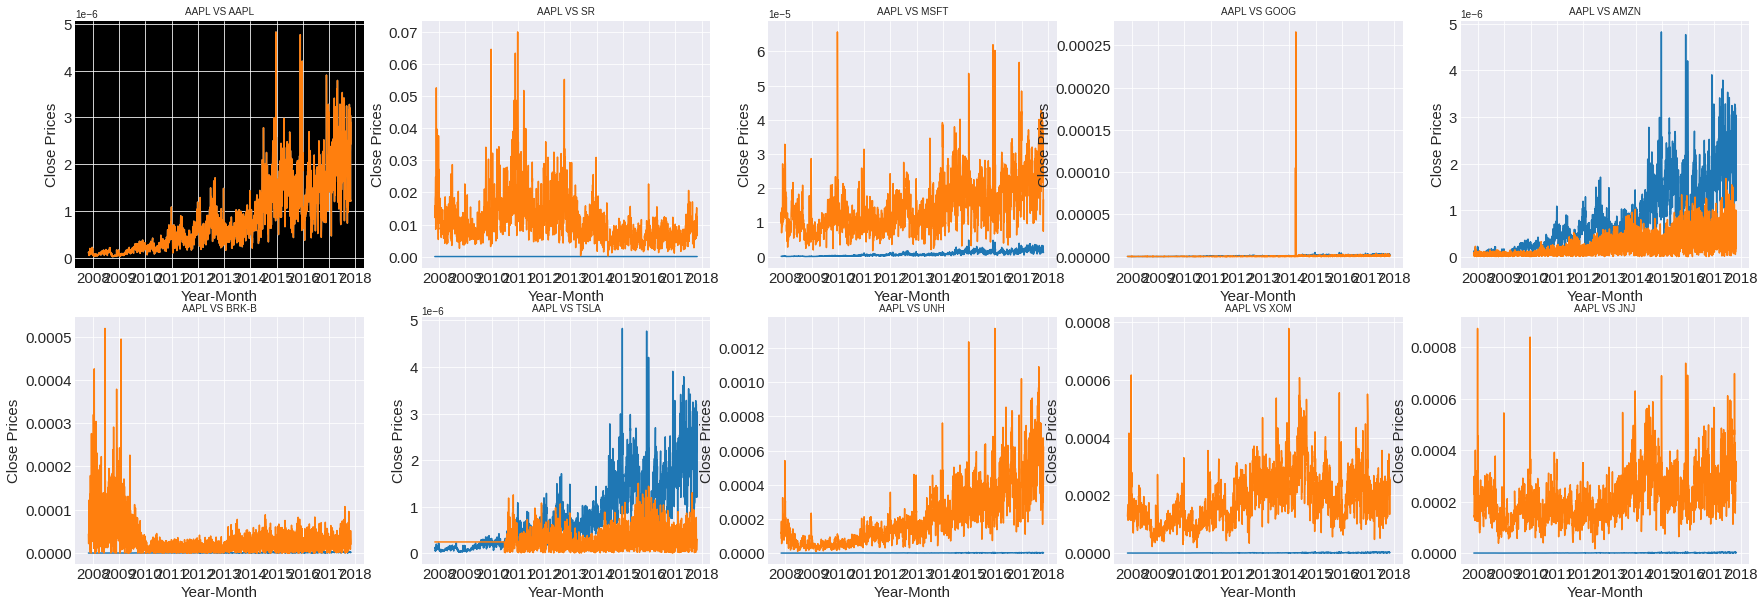


 StandardScaler() 



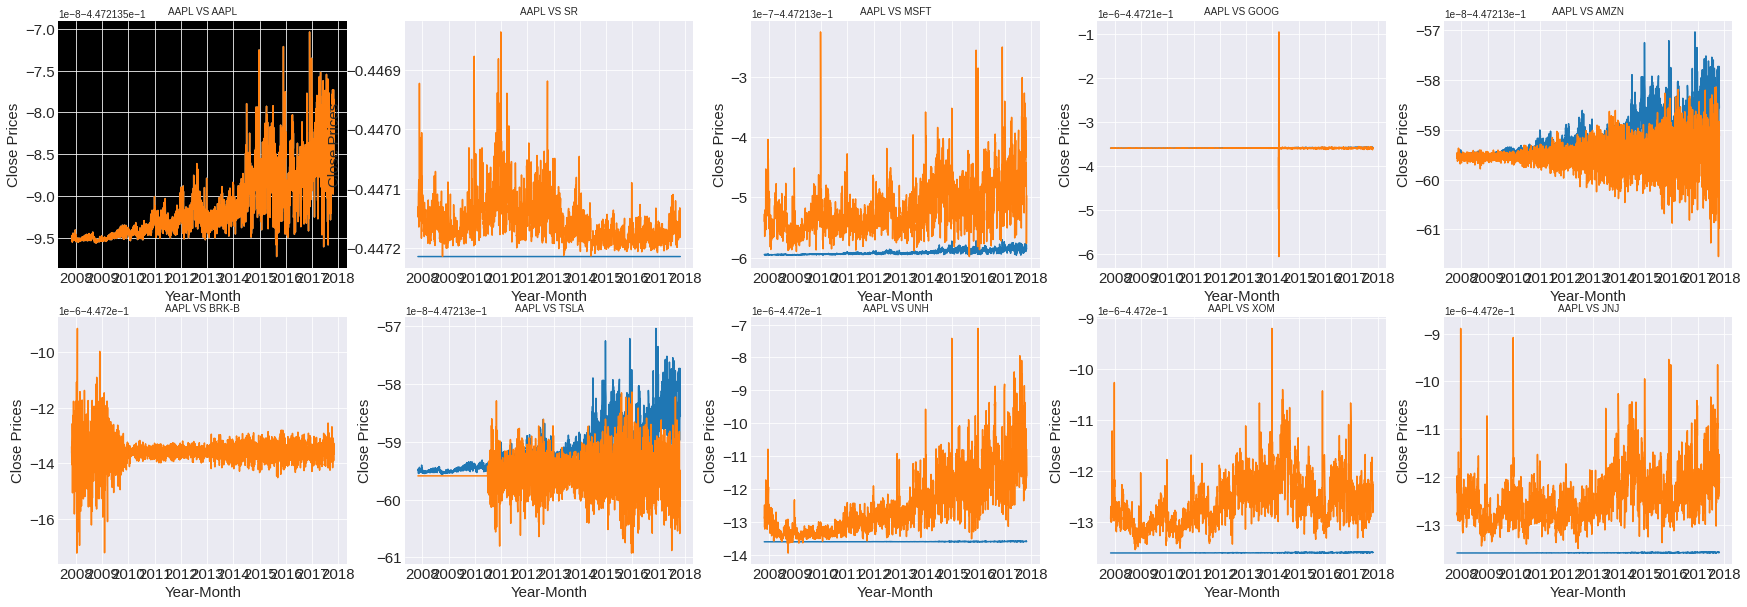


 ['EURUSD=X', 'USDJPY=X', 'GBPUSD=X', 'AUDUSD=X', 'USDCAD=X', 'USDCNY=X', 'USDCHF=X', 'USDHKD=X', 'EURGBP=X', 'USDKRW=X']

 MinMaxScaler(feature_range=(0, 100)) 



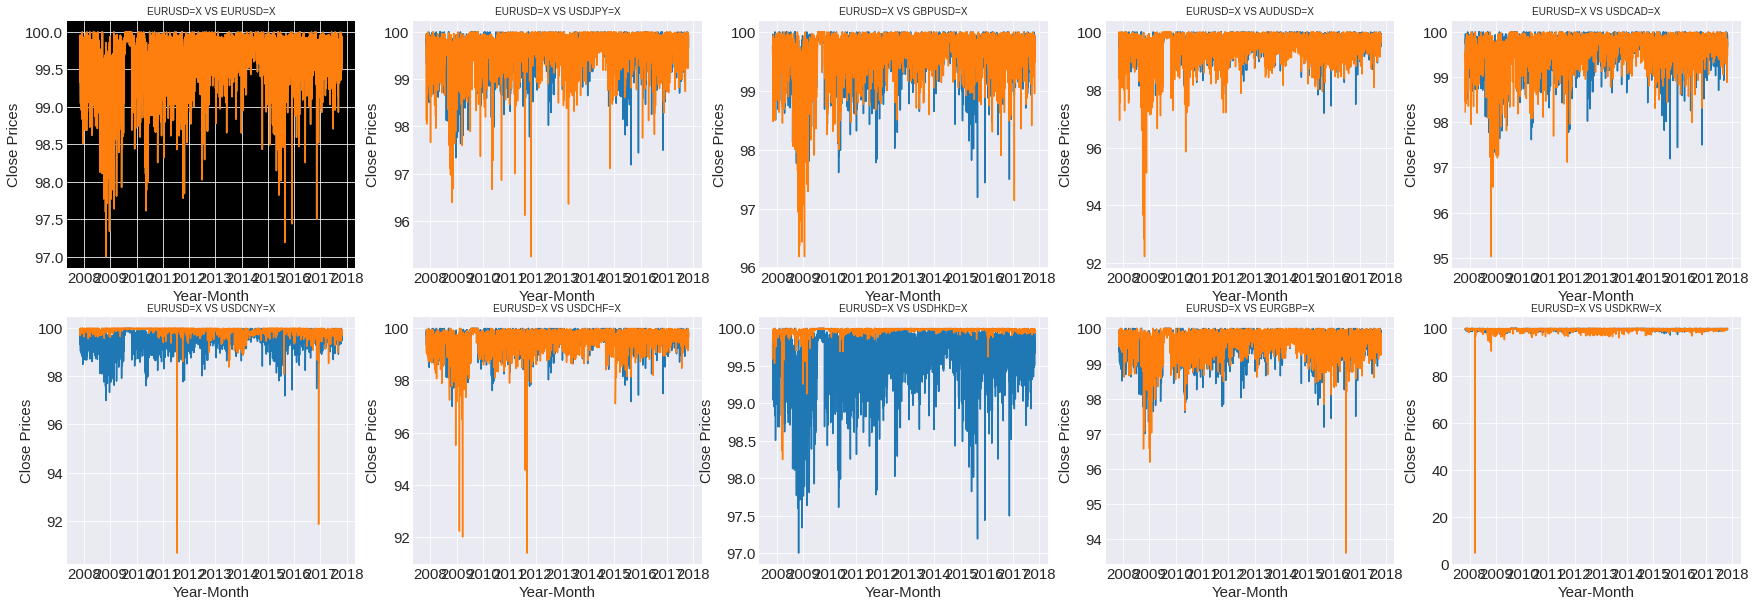


 StandardScaler() 



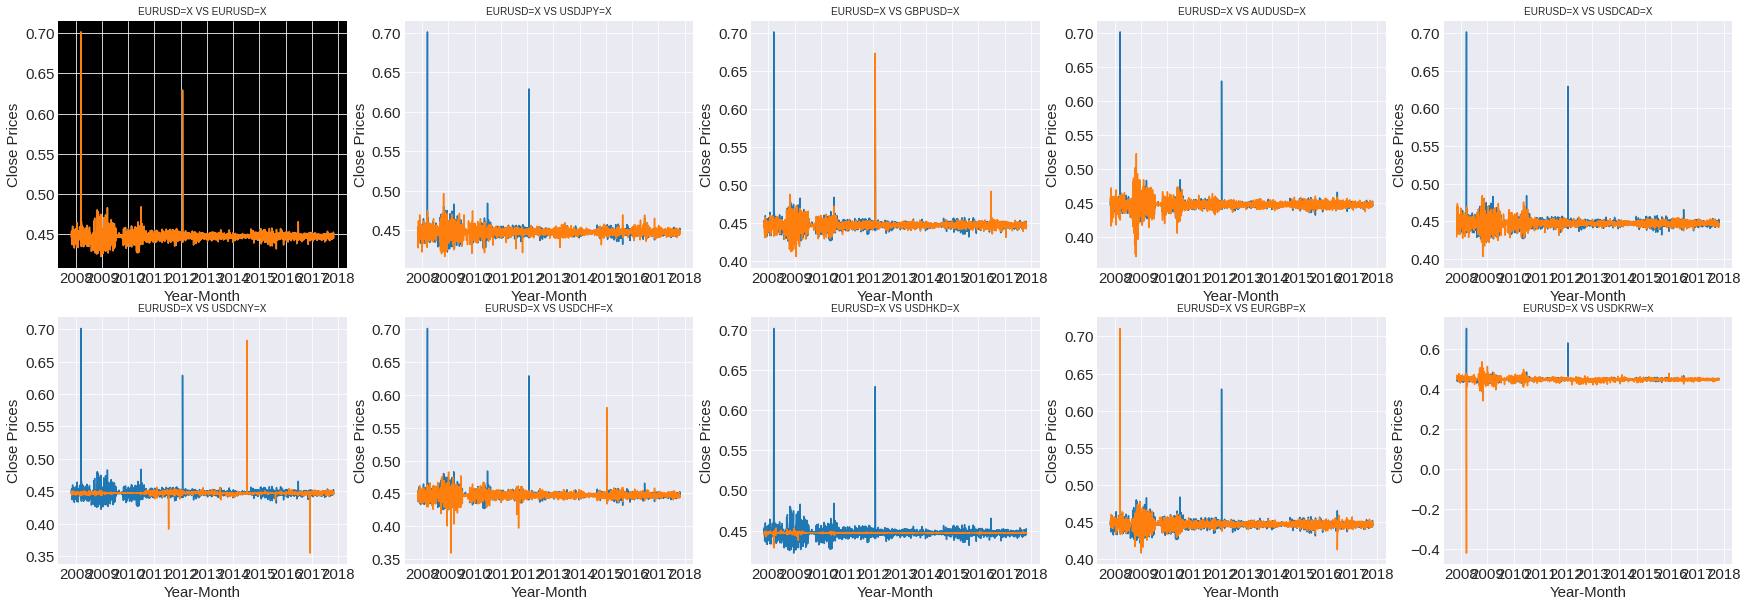

In [ ]:
def relationPlot(e, scaled_data, x, ax):
  ax.plot(scaled_data[0]['Close'])
  ax.plot(scaled_data[x]['Close'])

  # Set the title and axis labels
  ax.set_title(str(asset[e][0]) + ' VS ' + asset[e][x], fontsize=10)

  ax.set_xlabel('Year-Month', fontsize=15)
  ax.set_ylabel('Close Prices', fontsize=15)

  ax.tick_params(axis='both', labelsize=15)

  h1, l1  = ax.get_legend_handles_labels()

  # plt.savefig(path + '/image/image.png', bbox_inches = 'tight')
'''
for x, i in enumerate(forex_data):
  if(x > 0 and x < len(major_forex)):
    print("\n[", x, "]:", major_forex[x])
    relationPlot(major_forex[x])
'''

for e, k in enumerate(scaled_processed_asset):

  print("\n",asset[e])
  for y, scaled_data in enumerate(k):

    print("\n", scaler[y],"\n")
    fig, axes = plt.subplots(2, int(len(asset[e]) / 2 ), figsize=(30, 10))

    for x, ax in enumerate(axes.flat):

      if(x == 0):
        ax.set_facecolor('xkcd:black')
      relationPlot(e, scaled_data, x, ax)

    plt.show()

Splitting training and testing datasets

In [ ]:
def trainTestData(data):

  splited_data = []

  for x in range(0, len(data)):

    print("(",x, ")")

    X = data[x].drop(['Decision'], axis='columns').copy()
    Y = data[x].Decision

    x_train, x_validation, y_train, y_validation = train_test_split(X, Y, test_size=test_size, shuffle=False )

    splited_data.append([x_train, x_validation, y_train, y_validation])

  return splited_data

In [ ]:
def trainTestMaker(data):

  train_test_asset = []

  for x, i in enumerate(data):

    splited_asset = []

    print("\n", e , " ---> ",asset[x])
    for y, j in enumerate(i):

      print("\n", scaler[y],"\n")

      splited_asset.append(trainTestData(j))

    train_test_asset.append(splited_asset)

  return train_test_asset

In [ ]:
train_test_asset_1 = trainTestMaker(scaled_processed_asset)


 1  --->  ['AAPL', 'SR', 'MSFT', 'GOOG', 'AMZN', 'BRK-B', 'TSLA', 'UNH', 'XOM', 'JNJ']

 MinMaxScaler(feature_range=(0, 100)) 

( 0 )
( 1 )
( 2 )
( 3 )
( 4 )
( 5 )
( 6 )
( 7 )
( 8 )
( 9 )

 StandardScaler() 

( 0 )
( 1 )
( 2 )
( 3 )
( 4 )
( 5 )
( 6 )
( 7 )
( 8 )
( 9 )

 1  --->  ['EURUSD=X', 'USDJPY=X', 'GBPUSD=X', 'AUDUSD=X', 'USDCAD=X', 'USDCNY=X', 'USDCHF=X', 'USDHKD=X', 'EURGBP=X', 'USDKRW=X']

 MinMaxScaler(feature_range=(0, 100)) 

( 0 )
( 1 )
( 2 )
( 3 )
( 4 )
( 5 )
( 6 )
( 7 )
( 8 )
( 9 )

 StandardScaler() 

( 0 )
( 1 )
( 2 )
( 3 )
( 4 )
( 5 )
( 6 )
( 7 )
( 8 )
( 9 )


Supervised Learning

In [ ]:
from sklearn import metrics

In [ ]:
print(np.asarray(train_test_asset_1).shape)
train_test_asset_1[0][0][0][0]

(2, 2, 10, 4)


Open          High           Low         Close  Adj Close  \
Date                                                                            
2007-11-02  1.035890e-07  1.044087e-07  8.320349e-08  9.881336e-08        0.0   
2007-11-05  1.180746e-07  1.343734e-07  1.134115e-07  1.220272e-07        0.0   
2007-11-06  8.815073e-08  1.066676e-07  8.149218e-08  1.058821e-07        0.0   
2007-11-07  1.142356e-07  1.216707e-07  9.814435e-08  9.875492e-08        0.0   
2007-11-08  7.008470e-08  7.051922e-08  3.437755e-08  4.892491e-08        0.0   
...                  ...           ...           ...           ...        ...   
2008-10-24  1.835951e-08  3.536253e-08  1.786538e-08  3.194845e-08        0.0   
2008-10-27  4.896007e-08  5.652387e-08  3.947582e-08  4.015543e-08        0.0   
2008-10-28  2.243421e-08  3.351482e-08  1.574656e-08  3.222532e-08        0.0   
2008-10-29  2.149054e-08  3.738000e-08  1.980641e-08  2.824540e-08        0.0   
2008-10-30  2.960228e-08  3.823606e-08  2.825053e-08  3.572875e-08        0.0   

            Volume  
Date                
2007-11-02   100.0  
2007-11-05   100.0  
2007-11-06   100.0  
2007-11-07   100.0  
2007-11-08   100.0  
...            ...  
2008-10-24   100.0  
2008-10-27   100.0  
2008-10-28   100.0  
2008-10-29   100.0  
2008-10-30   100.0  

[251 rows x 6 columns]

In [ ]:
def asset_report(data, detail):

  ranking = [[], [], [], [], []]

  for id, m in enumerate(model): # all models

    for x, i in enumerate(data): # all data x 2 

      for y, j in enumerate(i): # top 10 asseets x 2

        for z, k in enumerate(j): # each asset x 10

          try:

            m.fit(k[0], [round(x) for x in k[2]])
            prediction = m.predict(k[1])
            rounded_prediction = [round(a) for a in prediction]

            rounded_truth = np.array([round(a) for a in k[3]])
            rounded_prediction = np.array([round(a) for a in prediction])

            # inverted_prediction = [1-x for x in rounded_prediction]
            count = 0
            for x, a in enumerate(rounded_truth):
              if(rounded_truth[x] == rounded_prediction[x]):
                count = count + 1

            score = count/len(rounded_truth)
            # m.score(rounded_truth.reshape(-1, 1), rounded_prediction)
            ranking[0].append(score)
            ranking[1].append(str(count) + '/' + str(len(rounded_truth)))
            ranking[2].append(m.__class__.__name__)
            ranking[3].append(scaler[y])
            ranking[4].append(asset[y][z])

            if(z % 2 == 0):
              color = "yellow"

            else:
              color = "lightblue"
  
            display(HTML('''<span style="color: ''' + color + '''"><<---------------(start ['''+ str(id) + '''])--------------->></span>'''))

            print("\n(", id, ") ", m.__class__.__name__ ,"\n")
            print("(", y, ") ", scaler[y], "\n")

            if(score > 0.5):
              print("[Great] ---> (", x, y, "[",z ,"]): ", asset[y][z] , " ---> match:(", count,"/",len(rounded_truth) , ") : [", score ,"]")

              # print(rounded_truth)
              # print(rounded_prediction)

            else:
              print("[Bad] ---> (", x, y, "[",z ,"]): ", asset[y][z] , " ---> match:(", count,"/",len(rounded_truth) , ") : [", score ,"]")

            if(detail):
              for i in classification_metric:
                try:
                  display(HTML('''<span style="color:LightGoldenRodYellow"><br>[ '''+  i.__name__ + ''' ]<br></span>'''))

                  print(i(rounded_truth, rounded_prediction))
                except:
                  pass

            display(HTML('''<br><span style="color: ''' + color + '''"><<---------------(end ['''+ str(id) + '''])--------------->></span>'''))

          except:
            pass

        print('\n')
  return reversed([b[0] for b in sorted(enumerate(ranking[0]),key=lambda i:i[1])]), ranking

Brief overview

In [ ]:
rankingIndex_1, ranking_1 = asset_report(train_test_asset_1, False)


( 0 )  CalibratedClassifierCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 0 ]):  AAPL  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 0 )  CalibratedClassifierCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 1 ]):  SR  ---> match:( 1162 / 2265 ) : [ 0.5130242825607064 ]



( 0 )  CalibratedClassifierCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 2 ]):  MSFT  ---> match:( 1121 / 2265 ) : [ 0.4949227373068433 ]



( 0 )  CalibratedClassifierCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 3 ]):  GOOG  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 0 )  CalibratedClassifierCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 4 ]):  AMZN  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 0 )  CalibratedClassifierCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 5 ]):  BRK-B  ---> match:( 1153 / 2265 ) : [ 0.5090507726269315 ]



( 0 )  CalibratedClassifierCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 7 ]):  UNH  ---> match:( 1202 / 2265 ) : [ 0.5306843267108168 ]



( 0 )  CalibratedClassifierCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 8 ]):  XOM  ---> match:( 1100 / 2265 ) : [ 0.4856512141280353 ]



( 0 )  CalibratedClassifierCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 9 ]):  JNJ  ---> match:( 1157 / 2265 ) : [ 0.5108167770419426 ]



( 0 )  CalibratedClassifierCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 0 ]):  EURUSD=X  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 0 )  CalibratedClassifierCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 1 ]):  USDJPY=X  ---> match:( 1164 / 2265 ) : [ 0.5139072847682119 ]



( 0 )  CalibratedClassifierCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 2 ]):  GBPUSD=X  ---> match:( 1121 / 2265 ) : [ 0.4949227373068433 ]



( 0 )  CalibratedClassifierCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 3 ]):  AUDUSD=X  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 0 )  CalibratedClassifierCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 4 ]):  USDCAD=X  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 0 )  CalibratedClassifierCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 5 ]):  USDCNY=X  ---> match:( 1153 / 2265 ) : [ 0.5090507726269315 ]



( 0 )  CalibratedClassifierCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 7 ]):  USDHKD=X  ---> match:( 1202 / 2265 ) : [ 0.5306843267108168 ]



( 0 )  CalibratedClassifierCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 8 ]):  EURGBP=X  ---> match:( 1100 / 2265 ) : [ 0.4856512141280353 ]



( 0 )  CalibratedClassifierCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 9 ]):  USDKRW=X  ---> match:( 1157 / 2265 ) : [ 0.5108167770419426 ]



( 0 )  CalibratedClassifierCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 0 ]):  AAPL  ---> match:( 1097 / 2346 ) : [ 0.4676044330775789 ]



( 0 )  CalibratedClassifierCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 1 ]):  SR  ---> match:( 1231 / 2346 ) : [ 0.5247229326513214 ]



( 0 )  CalibratedClassifierCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 2 ]):  MSFT  ---> match:( 1268 / 2346 ) : [ 0.5404944586530265 ]



( 0 )  CalibratedClassifierCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 3 ]):  GOOG  ---> match:( 1166 / 2346 ) : [ 0.49701619778346123 ]



( 0 )  CalibratedClassifierCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 4 ]):  AMZN  ---> match:( 1112 / 2346 ) : [ 0.473998294970162 ]



( 0 )  CalibratedClassifierCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 5 ]):  BRK-B  ---> match:( 1808 / 2346 ) : [ 0.7706734867860188 ]



( 0 )  CalibratedClassifierCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 6 ]):  TSLA  ---> match:( 1437 / 2346 ) : [ 0.612531969309463 ]



( 0 )  CalibratedClassifierCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 7 ]):  UNH  ---> match:( 802 / 2346 ) : [ 0.34185848252344414 ]



( 0 )  CalibratedClassifierCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 8 ]):  XOM  ---> match:( 1082 / 2346 ) : [ 0.46121057118499575 ]



( 0 )  CalibratedClassifierCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 9 ]):  JNJ  ---> match:( 871 / 2346 ) : [ 0.3712702472293265 ]



( 0 )  CalibratedClassifierCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 0 ]):  EURUSD=X  ---> match:( 1098 / 2346 ) : [ 0.4680306905370844 ]



( 0 )  CalibratedClassifierCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 1 ]):  USDJPY=X  ---> match:( 1229 / 2346 ) : [ 0.5238704177323104 ]



( 0 )  CalibratedClassifierCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 2 ]):  GBPUSD=X  ---> match:( 1292 / 2346 ) : [ 0.5507246376811594 ]



( 0 )  CalibratedClassifierCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 3 ]):  AUDUSD=X  ---> match:( 1212 / 2346 ) : [ 0.5166240409207161 ]



( 0 )  CalibratedClassifierCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 4 ]):  USDCAD=X  ---> match:( 982 / 2346 ) : [ 0.4185848252344416 ]



( 0 )  CalibratedClassifierCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 5 ]):  USDCNY=X  ---> match:( 1809 / 2346 ) : [ 0.7710997442455243 ]



( 0 )  CalibratedClassifierCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 6 ]):  USDCHF=X  ---> match:( 1443 / 2346 ) : [ 0.6150895140664961 ]



( 0 )  CalibratedClassifierCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 7 ]):  USDHKD=X  ---> match:( 810 / 2346 ) : [ 0.3452685421994885 ]



( 0 )  CalibratedClassifierCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 8 ]):  EURGBP=X  ---> match:( 1004 / 2346 ) : [ 0.4279624893435635 ]



( 0 )  CalibratedClassifierCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 9 ]):  USDKRW=X  ---> match:( 872 / 2346 ) : [ 0.37169650468883203 ]



( 1 )  DummyClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 0 ]):  AAPL  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 1 )  DummyClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 1 ]):  SR  ---> match:( 1164 / 2265 ) : [ 0.5139072847682119 ]



( 1 )  DummyClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 2 ]):  MSFT  ---> match:( 1121 / 2265 ) : [ 0.4949227373068433 ]



( 1 )  DummyClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 3 ]):  GOOG  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 1 )  DummyClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 4 ]):  AMZN  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 1 )  DummyClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 5 ]):  BRK-B  ---> match:( 1153 / 2265 ) : [ 0.5090507726269315 ]



( 1 )  DummyClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 6 ]):  TSLA  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 1 )  DummyClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 7 ]):  UNH  ---> match:( 1202 / 2265 ) : [ 0.5306843267108168 ]



( 1 )  DummyClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 8 ]):  XOM  ---> match:( 1100 / 2265 ) : [ 0.4856512141280353 ]



( 1 )  DummyClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 9 ]):  JNJ  ---> match:( 1157 / 2265 ) : [ 0.5108167770419426 ]



( 1 )  DummyClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 0 ]):  EURUSD=X  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 1 )  DummyClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 1 ]):  USDJPY=X  ---> match:( 1164 / 2265 ) : [ 0.5139072847682119 ]



( 1 )  DummyClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 2 ]):  GBPUSD=X  ---> match:( 1121 / 2265 ) : [ 0.4949227373068433 ]



( 1 )  DummyClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 3 ]):  AUDUSD=X  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 1 )  DummyClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 4 ]):  USDCAD=X  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 1 )  DummyClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 5 ]):  USDCNY=X  ---> match:( 1153 / 2265 ) : [ 0.5090507726269315 ]



( 1 )  DummyClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 6 ]):  USDCHF=X  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 1 )  DummyClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 7 ]):  USDHKD=X  ---> match:( 1202 / 2265 ) : [ 0.5306843267108168 ]



( 1 )  DummyClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 8 ]):  EURGBP=X  ---> match:( 1100 / 2265 ) : [ 0.4856512141280353 ]



( 1 )  DummyClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 9 ]):  USDKRW=X  ---> match:( 1157 / 2265 ) : [ 0.5108167770419426 ]



( 1 )  DummyClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 0 ]):  AAPL  ---> match:( 1046 / 2346 ) : [ 0.4458653026427962 ]



( 1 )  DummyClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 1 ]):  SR  ---> match:( 1224 / 2346 ) : [ 0.5217391304347826 ]



( 1 )  DummyClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 2 ]):  MSFT  ---> match:( 1298 / 2346 ) : [ 0.5532821824381927 ]



( 1 )  DummyClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 3 ]):  GOOG  ---> match:( 1131 / 2346 ) : [ 0.4820971867007673 ]



( 1 )  DummyClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 4 ]):  AMZN  ---> match:( 944 / 2346 ) : [ 0.40238704177323104 ]



( 1 )  DummyClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 5 ]):  BRK-B  ---> match:( 1809 / 2346 ) : [ 0.7710997442455243 ]



( 1 )  DummyClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 6 ]):  TSLA  ---> match:( 1442 / 2346 ) : [ 0.6146632566069906 ]



( 1 )  DummyClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 7 ]):  UNH  ---> match:( 808 / 2346 ) : [ 0.34441602728047743 ]



( 1 )  DummyClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 8 ]):  XOM  ---> match:( 1010 / 2346 ) : [ 0.43052003410059675 ]



( 1 )  DummyClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 9 ]):  JNJ  ---> match:( 871 / 2346 ) : [ 0.3712702472293265 ]



( 1 )  DummyClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 0 ]):  EURUSD=X  ---> match:( 1046 / 2346 ) : [ 0.4458653026427962 ]



( 1 )  DummyClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 1 ]):  USDJPY=X  ---> match:( 1224 / 2346 ) : [ 0.5217391304347826 ]



( 1 )  DummyClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 2 ]):  GBPUSD=X  ---> match:( 1298 / 2346 ) : [ 0.5532821824381927 ]



( 1 )  DummyClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 3 ]):  AUDUSD=X  ---> match:( 1131 / 2346 ) : [ 0.4820971867007673 ]



( 1 )  DummyClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 4 ]):  USDCAD=X  ---> match:( 944 / 2346 ) : [ 0.40238704177323104 ]



( 1 )  DummyClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 5 ]):  USDCNY=X  ---> match:( 1809 / 2346 ) : [ 0.7710997442455243 ]



( 1 )  DummyClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 6 ]):  USDCHF=X  ---> match:( 1442 / 2346 ) : [ 0.6146632566069906 ]



( 1 )  DummyClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 7 ]):  USDHKD=X  ---> match:( 808 / 2346 ) : [ 0.34441602728047743 ]



( 1 )  DummyClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 8 ]):  EURGBP=X  ---> match:( 1010 / 2346 ) : [ 0.43052003410059675 ]



( 1 )  DummyClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 9 ]):  USDKRW=X  ---> match:( 871 / 2346 ) : [ 0.3712702472293265 ]



( 2 )  DummyRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 0 ]):  AAPL  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 2 )  DummyRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 1 ]):  SR  ---> match:( 1164 / 2265 ) : [ 0.5139072847682119 ]



( 2 )  DummyRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 2 ]):  MSFT  ---> match:( 1121 / 2265 ) : [ 0.4949227373068433 ]



( 2 )  DummyRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 3 ]):  GOOG  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 2 )  DummyRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 4 ]):  AMZN  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 2 )  DummyRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 5 ]):  BRK-B  ---> match:( 1153 / 2265 ) : [ 0.5090507726269315 ]



( 2 )  DummyRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 6 ]):  TSLA  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 2 )  DummyRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 7 ]):  UNH  ---> match:( 1202 / 2265 ) : [ 0.5306843267108168 ]



( 2 )  DummyRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 8 ]):  XOM  ---> match:( 1100 / 2265 ) : [ 0.4856512141280353 ]



( 2 )  DummyRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 9 ]):  JNJ  ---> match:( 1157 / 2265 ) : [ 0.5108167770419426 ]



( 2 )  DummyRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 0 ]):  EURUSD=X  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 2 )  DummyRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 1 ]):  USDJPY=X  ---> match:( 1164 / 2265 ) : [ 0.5139072847682119 ]



( 2 )  DummyRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 2 ]):  GBPUSD=X  ---> match:( 1121 / 2265 ) : [ 0.4949227373068433 ]



( 2 )  DummyRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 3 ]):  AUDUSD=X  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 2 )  DummyRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 4 ]):  USDCAD=X  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 2 )  DummyRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 5 ]):  USDCNY=X  ---> match:( 1153 / 2265 ) : [ 0.5090507726269315 ]



( 2 )  DummyRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 6 ]):  USDCHF=X  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 2 )  DummyRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 7 ]):  USDHKD=X  ---> match:( 1202 / 2265 ) : [ 0.5306843267108168 ]



( 2 )  DummyRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 8 ]):  EURGBP=X  ---> match:( 1100 / 2265 ) : [ 0.4856512141280353 ]



( 2 )  DummyRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 9 ]):  USDKRW=X  ---> match:( 1157 / 2265 ) : [ 0.5108167770419426 ]



( 2 )  DummyRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 0 ]):  AAPL  ---> match:( 1046 / 2346 ) : [ 0.4458653026427962 ]



( 2 )  DummyRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 1 ]):  SR  ---> match:( 1224 / 2346 ) : [ 0.5217391304347826 ]



( 2 )  DummyRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 2 ]):  MSFT  ---> match:( 1298 / 2346 ) : [ 0.5532821824381927 ]



( 2 )  DummyRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 3 ]):  GOOG  ---> match:( 1131 / 2346 ) : [ 0.4820971867007673 ]



( 2 )  DummyRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 4 ]):  AMZN  ---> match:( 944 / 2346 ) : [ 0.40238704177323104 ]



( 2 )  DummyRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 5 ]):  BRK-B  ---> match:( 1809 / 2346 ) : [ 0.7710997442455243 ]



( 2 )  DummyRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 6 ]):  TSLA  ---> match:( 1442 / 2346 ) : [ 0.6146632566069906 ]



( 2 )  DummyRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 7 ]):  UNH  ---> match:( 808 / 2346 ) : [ 0.34441602728047743 ]



( 2 )  DummyRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 8 ]):  XOM  ---> match:( 1010 / 2346 ) : [ 0.43052003410059675 ]



( 2 )  DummyRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 9 ]):  JNJ  ---> match:( 871 / 2346 ) : [ 0.3712702472293265 ]



( 2 )  DummyRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 0 ]):  EURUSD=X  ---> match:( 1046 / 2346 ) : [ 0.4458653026427962 ]



( 2 )  DummyRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 1 ]):  USDJPY=X  ---> match:( 1224 / 2346 ) : [ 0.5217391304347826 ]



( 2 )  DummyRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 2 ]):  GBPUSD=X  ---> match:( 1298 / 2346 ) : [ 0.5532821824381927 ]



( 2 )  DummyRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 3 ]):  AUDUSD=X  ---> match:( 1131 / 2346 ) : [ 0.4820971867007673 ]



( 2 )  DummyRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 4 ]):  USDCAD=X  ---> match:( 944 / 2346 ) : [ 0.40238704177323104 ]



( 2 )  DummyRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 5 ]):  USDCNY=X  ---> match:( 1809 / 2346 ) : [ 0.7710997442455243 ]



( 2 )  DummyRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 6 ]):  USDCHF=X  ---> match:( 1442 / 2346 ) : [ 0.6146632566069906 ]



( 2 )  DummyRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 7 ]):  USDHKD=X  ---> match:( 808 / 2346 ) : [ 0.34441602728047743 ]



( 2 )  DummyRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 8 ]):  EURGBP=X  ---> match:( 1010 / 2346 ) : [ 0.43052003410059675 ]



( 2 )  DummyRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 9 ]):  USDKRW=X  ---> match:( 871 / 2346 ) : [ 0.3712702472293265 ]



( 3 )  AdaBoostClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 0 ]):  AAPL  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 3 )  AdaBoostClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 1 ]):  SR  ---> match:( 1154 / 2265 ) : [ 0.5094922737306843 ]



( 3 )  AdaBoostClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 2 ]):  MSFT  ---> match:( 1117 / 2265 ) : [ 0.4931567328918322 ]



( 3 )  AdaBoostClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 3 ]):  GOOG  ---> match:( 1147 / 2265 ) : [ 0.506401766004415 ]



( 3 )  AdaBoostClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 4 ]):  AMZN  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 3 )  AdaBoostClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 5 ]):  BRK-B  ---> match:( 1123 / 2265 ) : [ 0.4958057395143488 ]



( 3 )  AdaBoostClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 6 ]):  TSLA  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 3 )  AdaBoostClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 7 ]):  UNH  ---> match:( 1150 / 2265 ) : [ 0.5077262693156733 ]



( 3 )  AdaBoostClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 8 ]):  XOM  ---> match:( 1163 / 2265 ) : [ 0.5134657836644592 ]



( 3 )  AdaBoostClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 9 ]):  JNJ  ---> match:( 1174 / 2265 ) : [ 0.5183222958057395 ]



( 3 )  AdaBoostClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 0 ]):  EURUSD=X  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 3 )  AdaBoostClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 1 ]):  USDJPY=X  ---> match:( 1131 / 2265 ) : [ 0.49933774834437084 ]



( 3 )  AdaBoostClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 2 ]):  GBPUSD=X  ---> match:( 1121 / 2265 ) : [ 0.4949227373068433 ]



( 3 )  AdaBoostClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 3 ]):  AUDUSD=X  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 3 )  AdaBoostClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 4 ]):  USDCAD=X  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 3 )  AdaBoostClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 5 ]):  USDCNY=X  ---> match:( 1174 / 2265 ) : [ 0.5183222958057395 ]



( 3 )  AdaBoostClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 6 ]):  USDCHF=X  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 3 )  AdaBoostClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 7 ]):  USDHKD=X  ---> match:( 1191 / 2265 ) : [ 0.5258278145695364 ]



( 3 )  AdaBoostClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 8 ]):  EURGBP=X  ---> match:( 1121 / 2265 ) : [ 0.4949227373068433 ]



( 3 )  AdaBoostClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 9 ]):  USDKRW=X  ---> match:( 1161 / 2265 ) : [ 0.5125827814569537 ]



( 3 )  AdaBoostClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 0 ]):  AAPL  ---> match:( 1129 / 2346 ) : [ 0.4812446717817562 ]



( 3 )  AdaBoostClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 1 ]):  SR  ---> match:( 1182 / 2346 ) : [ 0.5038363171355499 ]



( 3 )  AdaBoostClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 2 ]):  MSFT  ---> match:( 1169 / 2346 ) : [ 0.4982949701619778 ]



( 3 )  AdaBoostClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 3 ]):  GOOG  ---> match:( 1167 / 2346 ) : [ 0.49744245524296676 ]



( 3 )  AdaBoostClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 4 ]):  AMZN  ---> match:( 1102 / 2346 ) : [ 0.4697357203751066 ]



( 3 )  AdaBoostClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 5 ]):  BRK-B  ---> match:( 1561 / 2346 ) : [ 0.66538789428815 ]



( 3 )  AdaBoostClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 6 ]):  TSLA  ---> match:( 1194 / 2346 ) : [ 0.5089514066496164 ]



( 3 )  AdaBoostClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 7 ]):  UNH  ---> match:( 934 / 2346 ) : [ 0.3981244671781756 ]



( 3 )  AdaBoostClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 8 ]):  XOM  ---> match:( 1153 / 2346 ) : [ 0.4914748508098892 ]



( 3 )  AdaBoostClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 9 ]):  JNJ  ---> match:( 1108 / 2346 ) : [ 0.4722932651321398 ]



( 3 )  AdaBoostClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 0 ]):  EURUSD=X  ---> match:( 1212 / 2346 ) : [ 0.5166240409207161 ]



( 3 )  AdaBoostClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 1 ]):  USDJPY=X  ---> match:( 1139 / 2346 ) : [ 0.4855072463768116 ]



( 3 )  AdaBoostClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 2 ]):  GBPUSD=X  ---> match:( 1187 / 2346 ) : [ 0.5059676044330775 ]



( 3 )  AdaBoostClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 3 ]):  AUDUSD=X  ---> match:( 1190 / 2346 ) : [ 0.5072463768115942 ]



( 3 )  AdaBoostClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 4 ]):  USDCAD=X  ---> match:( 1221 / 2346 ) : [ 0.520460358056266 ]



( 3 )  AdaBoostClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 5 ]):  USDCNY=X  ---> match:( 1286 / 2346 ) : [ 0.5481670929241261 ]



( 3 )  AdaBoostClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 6 ]):  USDCHF=X  ---> match:( 1156 / 2346 ) : [ 0.4927536231884058 ]



( 3 )  AdaBoostClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 7 ]):  USDHKD=X  ---> match:( 839 / 2346 ) : [ 0.3576300085251492 ]



( 3 )  AdaBoostClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 8 ]):  EURGBP=X  ---> match:( 1230 / 2346 ) : [ 0.5242966751918159 ]



( 3 )  AdaBoostClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 9 ]):  USDKRW=X  ---> match:( 1067 / 2346 ) : [ 0.45481670929241264 ]



( 4 )  AdaBoostRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 0 ]):  AAPL  ---> match:( 1105 / 2265 ) : [ 0.4878587196467991 ]



( 4 )  AdaBoostRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 1 ]):  SR  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 4 )  AdaBoostRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 2 ]):  MSFT  ---> match:( 1101 / 2265 ) : [ 0.4860927152317881 ]



( 4 )  AdaBoostRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 3 ]):  GOOG  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 4 )  AdaBoostRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 4 ]):  AMZN  ---> match:( 1133 / 2265 ) : [ 0.5002207505518764 ]



( 4 )  AdaBoostRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 5 ]):  BRK-B  ---> match:( 1085 / 2265 ) : [ 0.47902869757174393 ]



( 4 )  AdaBoostRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 6 ]):  TSLA  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 4 )  AdaBoostRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 7 ]):  UNH  ---> match:( 1165 / 2265 ) : [ 0.5143487858719646 ]



( 4 )  AdaBoostRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 8 ]):  XOM  ---> match:( 1133 / 2265 ) : [ 0.5002207505518764 ]



( 4 )  AdaBoostRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 9 ]):  JNJ  ---> match:( 1140 / 2265 ) : [ 0.5033112582781457 ]



( 4 )  AdaBoostRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 0 ]):  EURUSD=X  ---> match:( 1105 / 2265 ) : [ 0.4878587196467991 ]



( 4 )  AdaBoostRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 1 ]):  USDJPY=X  ---> match:( 1173 / 2265 ) : [ 0.5178807947019868 ]



( 4 )  AdaBoostRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 2 ]):  GBPUSD=X  ---> match:( 1121 / 2265 ) : [ 0.4949227373068433 ]



( 4 )  AdaBoostRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 3 ]):  AUDUSD=X  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 4 )  AdaBoostRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 4 ]):  USDCAD=X  ---> match:( 1133 / 2265 ) : [ 0.5002207505518764 ]



( 4 )  AdaBoostRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 5 ]):  USDCNY=X  ---> match:( 1154 / 2265 ) : [ 0.5094922737306843 ]



( 4 )  AdaBoostRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 6 ]):  USDCHF=X  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 4 )  AdaBoostRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 7 ]):  USDHKD=X  ---> match:( 1078 / 2265 ) : [ 0.4759381898454746 ]



( 4 )  AdaBoostRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 8 ]):  EURGBP=X  ---> match:( 1118 / 2265 ) : [ 0.493598233995585 ]



( 4 )  AdaBoostRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 9 ]):  USDKRW=X  ---> match:( 1148 / 2265 ) : [ 0.5068432671081677 ]



( 4 )  AdaBoostRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 0 ]):  AAPL  ---> match:( 1187 / 2346 ) : [ 0.5059676044330775 ]



( 4 )  AdaBoostRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 1 ]):  SR  ---> match:( 1215 / 2346 ) : [ 0.5179028132992327 ]



( 4 )  AdaBoostRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 2 ]):  MSFT  ---> match:( 1201 / 2346 ) : [ 0.5119352088661552 ]



( 4 )  AdaBoostRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 3 ]):  GOOG  ---> match:( 1130 / 2346 ) : [ 0.4816709292412617 ]



( 4 )  AdaBoostRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 4 ]):  AMZN  ---> match:( 1043 / 2346 ) : [ 0.44458653026427963 ]



( 4 )  AdaBoostRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 5 ]):  BRK-B  ---> match:( 1581 / 2346 ) : [ 0.6739130434782609 ]



( 4 )  AdaBoostRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 6 ]):  TSLA  ---> match:( 1077 / 2346 ) : [ 0.45907928388746805 ]



( 4 )  AdaBoostRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 7 ]):  UNH  ---> match:( 875 / 2346 ) : [ 0.3729752770673487 ]



( 4 )  AdaBoostRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 8 ]):  XOM  ---> match:( 1138 / 2346 ) : [ 0.48508098891730606 ]



( 4 )  AdaBoostRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 9 ]):  JNJ  ---> match:( 1052 / 2346 ) : [ 0.4484228473998295 ]



( 4 )  AdaBoostRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 0 ]):  EURUSD=X  ---> match:( 1082 / 2346 ) : [ 0.46121057118499575 ]



( 4 )  AdaBoostRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 1 ]):  USDJPY=X  ---> match:( 1192 / 2346 ) : [ 0.5080988917306053 ]



( 4 )  AdaBoostRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 2 ]):  GBPUSD=X  ---> match:( 1183 / 2346 ) : [ 0.5042625745950554 ]



( 4 )  AdaBoostRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 3 ]):  AUDUSD=X  ---> match:( 1145 / 2346 ) : [ 0.4880647911338448 ]



( 4 )  AdaBoostRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 4 ]):  USDCAD=X  ---> match:( 1344 / 2346 ) : [ 0.5728900255754475 ]



( 4 )  AdaBoostRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 5 ]):  USDCNY=X  ---> match:( 1514 / 2346 ) : [ 0.6453537936913896 ]



( 4 )  AdaBoostRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 6 ]):  USDCHF=X  ---> match:( 1136 / 2346 ) : [ 0.484228473998295 ]



( 4 )  AdaBoostRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 7 ]):  USDHKD=X  ---> match:( 925 / 2346 ) : [ 0.39428815004262574 ]



( 4 )  AdaBoostRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 8 ]):  EURGBP=X  ---> match:( 1220 / 2346 ) : [ 0.5200341005967605 ]



( 4 )  AdaBoostRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 9 ]):  USDKRW=X  ---> match:( 1001 / 2346 ) : [ 0.42668371696504687 ]



( 5 )  BaggingClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 0 ]):  AAPL  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 5 )  BaggingClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 1 ]):  SR  ---> match:( 1142 / 2265 ) : [ 0.5041942604856512 ]



( 5 )  BaggingClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 2 ]):  MSFT  ---> match:( 1163 / 2265 ) : [ 0.5134657836644592 ]



( 5 )  BaggingClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 3 ]):  GOOG  ---> match:( 1147 / 2265 ) : [ 0.506401766004415 ]



( 5 )  BaggingClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 4 ]):  AMZN  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 5 )  BaggingClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 5 ]):  BRK-B  ---> match:( 1135 / 2265 ) : [ 0.5011037527593819 ]



( 5 )  BaggingClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 6 ]):  TSLA  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 5 )  BaggingClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 7 ]):  UNH  ---> match:( 1142 / 2265 ) : [ 0.5041942604856512 ]



( 5 )  BaggingClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 8 ]):  XOM  ---> match:( 1149 / 2265 ) : [ 0.5072847682119205 ]



( 5 )  BaggingClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 9 ]):  JNJ  ---> match:( 1134 / 2265 ) : [ 0.5006622516556292 ]



( 5 )  BaggingClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 0 ]):  EURUSD=X  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 5 )  BaggingClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 1 ]):  USDJPY=X  ---> match:( 1176 / 2265 ) : [ 0.519205298013245 ]



( 5 )  BaggingClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 2 ]):  GBPUSD=X  ---> match:( 1121 / 2265 ) : [ 0.4949227373068433 ]



( 5 )  BaggingClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 3 ]):  AUDUSD=X  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 5 )  BaggingClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 4 ]):  USDCAD=X  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 5 )  BaggingClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 5 ]):  USDCNY=X  ---> match:( 1105 / 2265 ) : [ 0.4878587196467991 ]



( 5 )  BaggingClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 6 ]):  USDCHF=X  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 5 )  BaggingClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 7 ]):  USDHKD=X  ---> match:( 1123 / 2265 ) : [ 0.4958057395143488 ]



( 5 )  BaggingClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 8 ]):  EURGBP=X  ---> match:( 1203 / 2265 ) : [ 0.5311258278145695 ]



( 5 )  BaggingClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 9 ]):  USDKRW=X  ---> match:( 1159 / 2265 ) : [ 0.5116997792494481 ]



( 5 )  BaggingClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 0 ]):  AAPL  ---> match:( 1200 / 2346 ) : [ 0.5115089514066496 ]



( 5 )  BaggingClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 1 ]):  SR  ---> match:( 1122 / 2346 ) : [ 0.4782608695652174 ]



( 5 )  BaggingClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 2 ]):  MSFT  ---> match:( 1231 / 2346 ) : [ 0.5247229326513214 ]



( 5 )  BaggingClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 3 ]):  GOOG  ---> match:( 1151 / 2346 ) : [ 0.4906223358908781 ]



( 5 )  BaggingClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 4 ]):  AMZN  ---> match:( 1176 / 2346 ) : [ 0.5012787723785166 ]



( 5 )  BaggingClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 5 ]):  BRK-B  ---> match:( 1437 / 2346 ) : [ 0.612531969309463 ]



( 5 )  BaggingClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 6 ]):  TSLA  ---> match:( 1167 / 2346 ) : [ 0.49744245524296676 ]



( 5 )  BaggingClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 7 ]):  UNH  ---> match:( 1099 / 2346 ) : [ 0.46845694799658993 ]



( 5 )  BaggingClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 8 ]):  XOM  ---> match:( 1164 / 2346 ) : [ 0.4961636828644501 ]



( 5 )  BaggingClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 9 ]):  JNJ  ---> match:( 1170 / 2346 ) : [ 0.49872122762148335 ]



( 5 )  BaggingClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 0 ]):  EURUSD=X  ---> match:( 1219 / 2346 ) : [ 0.5196078431372549 ]



( 5 )  BaggingClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 1 ]):  USDJPY=X  ---> match:( 1121 / 2346 ) : [ 0.4778346121057119 ]



( 5 )  BaggingClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 2 ]):  GBPUSD=X  ---> match:( 1179 / 2346 ) : [ 0.5025575447570333 ]



( 5 )  BaggingClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 3 ]):  AUDUSD=X  ---> match:( 1185 / 2346 ) : [ 0.5051150895140665 ]



( 5 )  BaggingClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 4 ]):  USDCAD=X  ---> match:( 1241 / 2346 ) : [ 0.5289855072463768 ]



( 5 )  BaggingClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 5 ]):  USDCNY=X  ---> match:( 1361 / 2346 ) : [ 0.5801364023870418 ]



( 5 )  BaggingClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 6 ]):  USDCHF=X  ---> match:( 1169 / 2346 ) : [ 0.4982949701619778 ]



( 5 )  BaggingClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 7 ]):  USDHKD=X  ---> match:( 891 / 2346 ) : [ 0.3797953964194373 ]



( 5 )  BaggingClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 8 ]):  EURGBP=X  ---> match:( 1213 / 2346 ) : [ 0.5170502983802217 ]



( 5 )  BaggingClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 9 ]):  USDKRW=X  ---> match:( 1124 / 2346 ) : [ 0.47911338448422847 ]



( 6 )  BaggingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 0 ]):  AAPL  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 6 )  BaggingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 1 ]):  SR  ---> match:( 1174 / 2265 ) : [ 0.5183222958057395 ]



( 6 )  BaggingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 2 ]):  MSFT  ---> match:( 1150 / 2265 ) : [ 0.5077262693156733 ]



( 6 )  BaggingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 3 ]):  GOOG  ---> match:( 1147 / 2265 ) : [ 0.506401766004415 ]



( 6 )  BaggingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 4 ]):  AMZN  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 6 )  BaggingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 5 ]):  BRK-B  ---> match:( 1081 / 2265 ) : [ 0.47726269315673286 ]



( 6 )  BaggingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 6 ]):  TSLA  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 6 )  BaggingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 7 ]):  UNH  ---> match:( 1133 / 2265 ) : [ 0.5002207505518764 ]



( 6 )  BaggingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 8 ]):  XOM  ---> match:( 1126 / 2265 ) : [ 0.4971302428256071 ]



( 6 )  BaggingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 9 ]):  JNJ  ---> match:( 1128 / 2265 ) : [ 0.49801324503311256 ]



( 6 )  BaggingRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 0 ]):  EURUSD=X  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 6 )  BaggingRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 1 ]):  USDJPY=X  ---> match:( 1158 / 2265 ) : [ 0.5112582781456954 ]



( 6 )  BaggingRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 2 ]):  GBPUSD=X  ---> match:( 1121 / 2265 ) : [ 0.4949227373068433 ]



( 6 )  BaggingRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 3 ]):  AUDUSD=X  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 6 )  BaggingRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 4 ]):  USDCAD=X  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 6 )  BaggingRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 5 ]):  USDCNY=X  ---> match:( 1086 / 2265 ) : [ 0.4794701986754967 ]



( 6 )  BaggingRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 6 ]):  USDCHF=X  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 6 )  BaggingRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 7 ]):  USDHKD=X  ---> match:( 1126 / 2265 ) : [ 0.4971302428256071 ]



( 6 )  BaggingRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 8 ]):  EURGBP=X  ---> match:( 1148 / 2265 ) : [ 0.5068432671081677 ]



( 6 )  BaggingRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 9 ]):  USDKRW=X  ---> match:( 1175 / 2265 ) : [ 0.5187637969094923 ]



( 6 )  BaggingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 0 ]):  AAPL  ---> match:( 1178 / 2346 ) : [ 0.5021312872975278 ]



( 6 )  BaggingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 1 ]):  SR  ---> match:( 1178 / 2346 ) : [ 0.5021312872975278 ]



( 6 )  BaggingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 2 ]):  MSFT  ---> match:( 1216 / 2346 ) : [ 0.5183290707587382 ]



( 6 )  BaggingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 3 ]):  GOOG  ---> match:( 1157 / 2346 ) : [ 0.49317988064791135 ]



( 6 )  BaggingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 4 ]):  AMZN  ---> match:( 1134 / 2346 ) : [ 0.4833759590792839 ]



( 6 )  BaggingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 5 ]):  BRK-B  ---> match:( 1477 / 2346 ) : [ 0.6295822676896846 ]



( 6 )  BaggingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 6 ]):  TSLA  ---> match:( 1153 / 2346 ) : [ 0.4914748508098892 ]



( 6 )  BaggingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 7 ]):  UNH  ---> match:( 1242 / 2346 ) : [ 0.5294117647058824 ]



( 6 )  BaggingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 8 ]):  XOM  ---> match:( 1179 / 2346 ) : [ 0.5025575447570333 ]



( 6 )  BaggingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 9 ]):  JNJ  ---> match:( 1099 / 2346 ) : [ 0.46845694799658993 ]



( 6 )  BaggingRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 0 ]):  EURUSD=X  ---> match:( 1249 / 2346 ) : [ 0.5323955669224212 ]



( 6 )  BaggingRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 1 ]):  USDJPY=X  ---> match:( 1131 / 2346 ) : [ 0.4820971867007673 ]



( 6 )  BaggingRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 2 ]):  GBPUSD=X  ---> match:( 1201 / 2346 ) : [ 0.5119352088661552 ]



( 6 )  BaggingRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 3 ]):  AUDUSD=X  ---> match:( 1181 / 2346 ) : [ 0.5034100596760444 ]



( 6 )  BaggingRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 4 ]):  USDCAD=X  ---> match:( 1286 / 2346 ) : [ 0.5481670929241261 ]



( 6 )  BaggingRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 5 ]):  USDCNY=X  ---> match:( 1345 / 2346 ) : [ 0.5733162830349531 ]



( 6 )  BaggingRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 6 ]):  USDCHF=X  ---> match:( 1174 / 2346 ) : [ 0.5004262574595055 ]



( 6 )  BaggingRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 7 ]):  USDHKD=X  ---> match:( 914 / 2346 ) : [ 0.3895993179880648 ]



( 6 )  BaggingRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 8 ]):  EURGBP=X  ---> match:( 1177 / 2346 ) : [ 0.5017050298380221 ]



( 6 )  BaggingRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 9 ]):  USDKRW=X  ---> match:( 1116 / 2346 ) : [ 0.47570332480818417 ]



( 7 )  ExtraTreesClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 0 ]):  AAPL  ---> match:( 1110 / 2265 ) : [ 0.4900662251655629 ]



( 7 )  ExtraTreesClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 1 ]):  SR  ---> match:( 1179 / 2265 ) : [ 0.5205298013245033 ]



( 7 )  ExtraTreesClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 2 ]):  MSFT  ---> match:( 1158 / 2265 ) : [ 0.5112582781456954 ]



( 7 )  ExtraTreesClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 3 ]):  GOOG  ---> match:( 1172 / 2265 ) : [ 0.517439293598234 ]



( 7 )  ExtraTreesClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 4 ]):  AMZN  ---> match:( 1157 / 2265 ) : [ 0.5108167770419426 ]



( 7 )  ExtraTreesClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 5 ]):  BRK-B  ---> match:( 1105 / 2265 ) : [ 0.4878587196467991 ]



( 7 )  ExtraTreesClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 6 ]):  TSLA  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 7 )  ExtraTreesClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 7 ]):  UNH  ---> match:( 1157 / 2265 ) : [ 0.5108167770419426 ]



( 7 )  ExtraTreesClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 8 ]):  XOM  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 7 )  ExtraTreesClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 9 ]):  JNJ  ---> match:( 1144 / 2265 ) : [ 0.5050772626931568 ]



( 7 )  ExtraTreesClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 0 ]):  EURUSD=X  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 7 )  ExtraTreesClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 1 ]):  USDJPY=X  ---> match:( 1171 / 2265 ) : [ 0.5169977924944812 ]



( 7 )  ExtraTreesClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 2 ]):  GBPUSD=X  ---> match:( 1168 / 2265 ) : [ 0.515673289183223 ]



( 7 )  ExtraTreesClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 3 ]):  AUDUSD=X  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 7 )  ExtraTreesClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 4 ]):  USDCAD=X  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 7 )  ExtraTreesClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 5 ]):  USDCNY=X  ---> match:( 1090 / 2265 ) : [ 0.48123620309050774 ]



( 7 )  ExtraTreesClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 6 ]):  USDCHF=X  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 7 )  ExtraTreesClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 7 ]):  USDHKD=X  ---> match:( 1139 / 2265 ) : [ 0.502869757174393 ]



( 7 )  ExtraTreesClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 8 ]):  EURGBP=X  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 7 )  ExtraTreesClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 9 ]):  USDKRW=X  ---> match:( 1148 / 2265 ) : [ 0.5068432671081677 ]



( 7 )  ExtraTreesClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 0 ]):  AAPL  ---> match:( 1210 / 2346 ) : [ 0.5157715260017051 ]



( 7 )  ExtraTreesClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 1 ]):  SR  ---> match:( 1148 / 2346 ) : [ 0.48934356351236147 ]



( 7 )  ExtraTreesClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 2 ]):  MSFT  ---> match:( 1159 / 2346 ) : [ 0.4940323955669224 ]



( 7 )  ExtraTreesClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 3 ]):  GOOG  ---> match:( 1134 / 2346 ) : [ 0.4833759590792839 ]



( 7 )  ExtraTreesClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 4 ]):  AMZN  ---> match:( 1230 / 2346 ) : [ 0.5242966751918159 ]



( 7 )  ExtraTreesClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 5 ]):  BRK-B  ---> match:( 1476 / 2346 ) : [ 0.629156010230179 ]



( 7 )  ExtraTreesClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 6 ]):  TSLA  ---> match:( 1158 / 2346 ) : [ 0.4936061381074169 ]



( 7 )  ExtraTreesClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 7 ]):  UNH  ---> match:( 880 / 2346 ) : [ 0.3751065643648764 ]



( 7 )  ExtraTreesClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 8 ]):  XOM  ---> match:( 1168 / 2346 ) : [ 0.4978687127024723 ]



( 7 )  ExtraTreesClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 9 ]):  JNJ  ---> match:( 1088 / 2346 ) : [ 0.463768115942029 ]



( 7 )  ExtraTreesClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 0 ]):  EURUSD=X  ---> match:( 1256 / 2346 ) : [ 0.5353793691389599 ]



( 7 )  ExtraTreesClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 1 ]):  USDJPY=X  ---> match:( 1148 / 2346 ) : [ 0.48934356351236147 ]



( 7 )  ExtraTreesClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 2 ]):  GBPUSD=X  ---> match:( 1202 / 2346 ) : [ 0.5123614663256607 ]



( 7 )  ExtraTreesClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 3 ]):  AUDUSD=X  ---> match:( 1167 / 2346 ) : [ 0.49744245524296676 ]



( 7 )  ExtraTreesClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 4 ]):  USDCAD=X  ---> match:( 1268 / 2346 ) : [ 0.5404944586530265 ]



( 7 )  ExtraTreesClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 5 ]):  USDCNY=X  ---> match:( 1507 / 2346 ) : [ 0.6423699914748509 ]



( 7 )  ExtraTreesClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 6 ]):  USDCHF=X  ---> match:( 1146 / 2346 ) : [ 0.4884910485933504 ]



( 7 )  ExtraTreesClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 7 ]):  USDHKD=X  ---> match:( 898 / 2346 ) : [ 0.38277919863597615 ]



( 7 )  ExtraTreesClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 8 ]):  EURGBP=X  ---> match:( 1168 / 2346 ) : [ 0.4978687127024723 ]



( 7 )  ExtraTreesClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 9 ]):  USDKRW=X  ---> match:( 1057 / 2346 ) : [ 0.4505541346973572 ]



( 8 )  ExtraTreesRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 0 ]):  AAPL  ---> match:( 1110 / 2265 ) : [ 0.4900662251655629 ]



( 8 )  ExtraTreesRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 1 ]):  SR  ---> match:( 1179 / 2265 ) : [ 0.5205298013245033 ]



( 8 )  ExtraTreesRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 2 ]):  MSFT  ---> match:( 1175 / 2265 ) : [ 0.5187637969094923 ]



( 8 )  ExtraTreesRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 3 ]):  GOOG  ---> match:( 1184 / 2265 ) : [ 0.5227373068432671 ]



( 8 )  ExtraTreesRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 4 ]):  AMZN  ---> match:( 1148 / 2265 ) : [ 0.5068432671081677 ]



( 8 )  ExtraTreesRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 5 ]):  BRK-B  ---> match:( 1120 / 2265 ) : [ 0.49448123620309054 ]



( 8 )  ExtraTreesRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 6 ]):  TSLA  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 8 )  ExtraTreesRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 7 ]):  UNH  ---> match:( 1152 / 2265 ) : [ 0.5086092715231788 ]



( 8 )  ExtraTreesRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 8 ]):  XOM  ---> match:( 1154 / 2265 ) : [ 0.5094922737306843 ]



( 8 )  ExtraTreesRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 9 ]):  JNJ  ---> match:( 1135 / 2265 ) : [ 0.5011037527593819 ]



( 8 )  ExtraTreesRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 0 ]):  EURUSD=X  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 8 )  ExtraTreesRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 1 ]):  USDJPY=X  ---> match:( 1174 / 2265 ) : [ 0.5183222958057395 ]



( 8 )  ExtraTreesRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 2 ]):  GBPUSD=X  ---> match:( 1170 / 2265 ) : [ 0.5165562913907285 ]



( 8 )  ExtraTreesRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 3 ]):  AUDUSD=X  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 8 )  ExtraTreesRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 4 ]):  USDCAD=X  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 8 )  ExtraTreesRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 5 ]):  USDCNY=X  ---> match:( 1102 / 2265 ) : [ 0.48653421633554084 ]



( 8 )  ExtraTreesRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 6 ]):  USDCHF=X  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 8 )  ExtraTreesRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 7 ]):  USDHKD=X  ---> match:( 1126 / 2265 ) : [ 0.4971302428256071 ]



( 8 )  ExtraTreesRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 8 ]):  EURGBP=X  ---> match:( 1152 / 2265 ) : [ 0.5086092715231788 ]



( 8 )  ExtraTreesRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 9 ]):  USDKRW=X  ---> match:( 1136 / 2265 ) : [ 0.5015452538631346 ]



( 8 )  ExtraTreesRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 0 ]):  AAPL  ---> match:( 1186 / 2346 ) : [ 0.505541346973572 ]



( 8 )  ExtraTreesRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 1 ]):  SR  ---> match:( 1159 / 2346 ) : [ 0.4940323955669224 ]



( 8 )  ExtraTreesRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 2 ]):  MSFT  ---> match:( 1173 / 2346 ) : [ 0.5 ]



( 8 )  ExtraTreesRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 3 ]):  GOOG  ---> match:( 1156 / 2346 ) : [ 0.4927536231884058 ]



( 8 )  ExtraTreesRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 4 ]):  AMZN  ---> match:( 1195 / 2346 ) : [ 0.5093776641091219 ]



( 8 )  ExtraTreesRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 5 ]):  BRK-B  ---> match:( 1430 / 2346 ) : [ 0.6095481670929241 ]



( 8 )  ExtraTreesRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 6 ]):  TSLA  ---> match:( 1144 / 2346 ) : [ 0.4876385336743393 ]



( 8 )  ExtraTreesRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 7 ]):  UNH  ---> match:( 883 / 2346 ) : [ 0.37638533674339303 ]



( 8 )  ExtraTreesRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 8 ]):  XOM  ---> match:( 1191 / 2346 ) : [ 0.5076726342710998 ]



( 8 )  ExtraTreesRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 9 ]):  JNJ  ---> match:( 1079 / 2346 ) : [ 0.4599317988064791 ]



( 8 )  ExtraTreesRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 0 ]):  EURUSD=X  ---> match:( 1214 / 2346 ) : [ 0.5174765558397272 ]



( 8 )  ExtraTreesRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 1 ]):  USDJPY=X  ---> match:( 1130 / 2346 ) : [ 0.4816709292412617 ]



( 8 )  ExtraTreesRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 2 ]):  GBPUSD=X  ---> match:( 1184 / 2346 ) : [ 0.5046888320545609 ]



( 8 )  ExtraTreesRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 3 ]):  AUDUSD=X  ---> match:( 1167 / 2346 ) : [ 0.49744245524296676 ]



( 8 )  ExtraTreesRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 4 ]):  USDCAD=X  ---> match:( 1266 / 2346 ) : [ 0.5396419437340153 ]



( 8 )  ExtraTreesRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 5 ]):  USDCNY=X  ---> match:( 1334 / 2346 ) : [ 0.5686274509803921 ]



( 8 )  ExtraTreesRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 6 ]):  USDCHF=X  ---> match:( 1183 / 2346 ) : [ 0.5042625745950554 ]



( 8 )  ExtraTreesRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 7 ]):  USDHKD=X  ---> match:( 908 / 2346 ) : [ 0.38704177323103156 ]



( 8 )  ExtraTreesRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 8 ]):  EURGBP=X  ---> match:( 1199 / 2346 ) : [ 0.5110826939471441 ]



( 8 )  ExtraTreesRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 9 ]):  USDKRW=X  ---> match:( 1084 / 2346 ) : [ 0.4620630861040068 ]



( 9 )  GradientBoostingClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 0 ]):  AAPL  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 9 )  GradientBoostingClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 1 ]):  SR  ---> match:( 1172 / 2265 ) : [ 0.517439293598234 ]



( 9 )  GradientBoostingClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 2 ]):  MSFT  ---> match:( 1140 / 2265 ) : [ 0.5033112582781457 ]



( 9 )  GradientBoostingClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 3 ]):  GOOG  ---> match:( 1147 / 2265 ) : [ 0.506401766004415 ]



( 9 )  GradientBoostingClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 4 ]):  AMZN  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 9 )  GradientBoostingClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 5 ]):  BRK-B  ---> match:( 1112 / 2265 ) : [ 0.49094922737306845 ]



( 9 )  GradientBoostingClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 7 ]):  UNH  ---> match:( 1151 / 2265 ) : [ 0.5081677704194261 ]



( 9 )  GradientBoostingClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 8 ]):  XOM  ---> match:( 1141 / 2265 ) : [ 0.5037527593818985 ]



( 9 )  GradientBoostingClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 9 ]):  JNJ  ---> match:( 1163 / 2265 ) : [ 0.5134657836644592 ]



( 9 )  GradientBoostingClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 0 ]):  EURUSD=X  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 9 )  GradientBoostingClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 1 ]):  USDJPY=X  ---> match:( 1136 / 2265 ) : [ 0.5015452538631346 ]



( 9 )  GradientBoostingClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 2 ]):  GBPUSD=X  ---> match:( 1121 / 2265 ) : [ 0.4949227373068433 ]



( 9 )  GradientBoostingClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 3 ]):  AUDUSD=X  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 9 )  GradientBoostingClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 4 ]):  USDCAD=X  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 9 )  GradientBoostingClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 5 ]):  USDCNY=X  ---> match:( 1127 / 2265 ) : [ 0.4975717439293598 ]



( 9 )  GradientBoostingClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 7 ]):  USDHKD=X  ---> match:( 1173 / 2265 ) : [ 0.5178807947019868 ]



( 9 )  GradientBoostingClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 8 ]):  EURGBP=X  ---> match:( 1118 / 2265 ) : [ 0.493598233995585 ]



( 9 )  GradientBoostingClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 9 ]):  USDKRW=X  ---> match:( 1154 / 2265 ) : [ 0.5094922737306843 ]



( 9 )  GradientBoostingClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 0 ]):  AAPL  ---> match:( 1130 / 2346 ) : [ 0.4816709292412617 ]



( 9 )  GradientBoostingClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 1 ]):  SR  ---> match:( 1184 / 2346 ) : [ 0.5046888320545609 ]



( 9 )  GradientBoostingClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 2 ]):  MSFT  ---> match:( 1165 / 2346 ) : [ 0.49658994032395565 ]



( 9 )  GradientBoostingClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 3 ]):  GOOG  ---> match:( 1116 / 2346 ) : [ 0.47570332480818417 ]



( 9 )  GradientBoostingClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 4 ]):  AMZN  ---> match:( 1149 / 2346 ) : [ 0.489769820971867 ]



( 9 )  GradientBoostingClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 5 ]):  BRK-B  ---> match:( 1391 / 2346 ) : [ 0.592924126172208 ]



( 9 )  GradientBoostingClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 6 ]):  TSLA  ---> match:( 1162 / 2346 ) : [ 0.49531116794543906 ]



( 9 )  GradientBoostingClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 7 ]):  UNH  ---> match:( 1237 / 2346 ) : [ 0.5272804774083546 ]



( 9 )  GradientBoostingClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 8 ]):  XOM  ---> match:( 1205 / 2346 ) : [ 0.5136402387041773 ]



( 9 )  GradientBoostingClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 9 ]):  JNJ  ---> match:( 1119 / 2346 ) : [ 0.47698209718670076 ]



( 9 )  GradientBoostingClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 0 ]):  EURUSD=X  ---> match:( 1204 / 2346 ) : [ 0.5132139812446718 ]



( 9 )  GradientBoostingClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 1 ]):  USDJPY=X  ---> match:( 1152 / 2346 ) : [ 0.49104859335038364 ]



( 9 )  GradientBoostingClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 2 ]):  GBPUSD=X  ---> match:( 1186 / 2346 ) : [ 0.505541346973572 ]



( 9 )  GradientBoostingClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 3 ]):  AUDUSD=X  ---> match:( 1184 / 2346 ) : [ 0.5046888320545609 ]



( 9 )  GradientBoostingClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 4 ]):  USDCAD=X  ---> match:( 1132 / 2346 ) : [ 0.4825234441602728 ]



( 9 )  GradientBoostingClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 5 ]):  USDCNY=X  ---> match:( 1262 / 2346 ) : [ 0.5379369138959932 ]



( 9 )  GradientBoostingClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 6 ]):  USDCHF=X  ---> match:( 1137 / 2346 ) : [ 0.4846547314578005 ]



( 9 )  GradientBoostingClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 7 ]):  USDHKD=X  ---> match:( 841 / 2346 ) : [ 0.35848252344416026 ]



( 9 )  GradientBoostingClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 8 ]):  EURGBP=X  ---> match:( 1142 / 2346 ) : [ 0.48678601875532823 ]



( 9 )  GradientBoostingClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 9 ]):  USDKRW=X  ---> match:( 1108 / 2346 ) : [ 0.4722932651321398 ]



( 10 )  GradientBoostingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 0 ]):  AAPL  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 10 )  GradientBoostingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 1 ]):  SR  ---> match:( 1161 / 2265 ) : [ 0.5125827814569537 ]



( 10 )  GradientBoostingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 2 ]):  MSFT  ---> match:( 1154 / 2265 ) : [ 0.5094922737306843 ]



( 10 )  GradientBoostingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 3 ]):  GOOG  ---> match:( 1147 / 2265 ) : [ 0.506401766004415 ]



( 10 )  GradientBoostingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 4 ]):  AMZN  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 10 )  GradientBoostingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 5 ]):  BRK-B  ---> match:( 1115 / 2265 ) : [ 0.4922737306843267 ]



( 10 )  GradientBoostingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 6 ]):  TSLA  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 10 )  GradientBoostingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 7 ]):  UNH  ---> match:( 1142 / 2265 ) : [ 0.5041942604856512 ]



( 10 )  GradientBoostingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 8 ]):  XOM  ---> match:( 1131 / 2265 ) : [ 0.49933774834437084 ]



( 10 )  GradientBoostingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 9 ]):  JNJ  ---> match:( 1156 / 2265 ) : [ 0.5103752759381899 ]



( 10 )  GradientBoostingRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 0 ]):  EURUSD=X  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 10 )  GradientBoostingRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 1 ]):  USDJPY=X  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 10 )  GradientBoostingRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 2 ]):  GBPUSD=X  ---> match:( 1121 / 2265 ) : [ 0.4949227373068433 ]



( 10 )  GradientBoostingRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 3 ]):  AUDUSD=X  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 10 )  GradientBoostingRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 4 ]):  USDCAD=X  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 10 )  GradientBoostingRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 5 ]):  USDCNY=X  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 10 )  GradientBoostingRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 6 ]):  USDCHF=X  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 10 )  GradientBoostingRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 7 ]):  USDHKD=X  ---> match:( 1178 / 2265 ) : [ 0.5200883002207506 ]



( 10 )  GradientBoostingRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 8 ]):  EURGBP=X  ---> match:( 1118 / 2265 ) : [ 0.493598233995585 ]



( 10 )  GradientBoostingRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 9 ]):  USDKRW=X  ---> match:( 1150 / 2265 ) : [ 0.5077262693156733 ]



( 10 )  GradientBoostingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 0 ]):  AAPL  ---> match:( 1115 / 2346 ) : [ 0.4752770673486786 ]



( 10 )  GradientBoostingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 1 ]):  SR  ---> match:( 1191 / 2346 ) : [ 0.5076726342710998 ]



( 10 )  GradientBoostingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 2 ]):  MSFT  ---> match:( 1177 / 2346 ) : [ 0.5017050298380221 ]



( 10 )  GradientBoostingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 3 ]):  GOOG  ---> match:( 1128 / 2346 ) : [ 0.48081841432225064 ]



( 10 )  GradientBoostingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 4 ]):  AMZN  ---> match:( 1128 / 2346 ) : [ 0.48081841432225064 ]



( 10 )  GradientBoostingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 5 ]):  BRK-B  ---> match:( 1387 / 2346 ) : [ 0.5912190963341859 ]



( 10 )  GradientBoostingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 6 ]):  TSLA  ---> match:( 1141 / 2346 ) : [ 0.4863597612958227 ]



( 10 )  GradientBoostingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 7 ]):  UNH  ---> match:( 1242 / 2346 ) : [ 0.5294117647058824 ]



( 10 )  GradientBoostingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 8 ]):  XOM  ---> match:( 1199 / 2346 ) : [ 0.5110826939471441 ]



( 10 )  GradientBoostingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 9 ]):  JNJ  ---> match:( 1135 / 2346 ) : [ 0.4838022165387894 ]



( 10 )  GradientBoostingRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 0 ]):  EURUSD=X  ---> match:( 1142 / 2346 ) : [ 0.48678601875532823 ]



( 10 )  GradientBoostingRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 1 ]):  USDJPY=X  ---> match:( 1166 / 2346 ) : [ 0.49701619778346123 ]



( 10 )  GradientBoostingRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 2 ]):  GBPUSD=X  ---> match:( 1183 / 2346 ) : [ 0.5042625745950554 ]



( 10 )  GradientBoostingRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 3 ]):  AUDUSD=X  ---> match:( 1191 / 2346 ) : [ 0.5076726342710998 ]



( 10 )  GradientBoostingRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 4 ]):  USDCAD=X  ---> match:( 1164 / 2346 ) : [ 0.4961636828644501 ]



( 10 )  GradientBoostingRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 5 ]):  USDCNY=X  ---> match:( 1300 / 2346 ) : [ 0.5541346973572038 ]



( 10 )  GradientBoostingRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 6 ]):  USDCHF=X  ---> match:( 1150 / 2346 ) : [ 0.49019607843137253 ]



( 10 )  GradientBoostingRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 7 ]):  USDHKD=X  ---> match:( 848 / 2346 ) : [ 0.3614663256606991 ]



( 10 )  GradientBoostingRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 8 ]):  EURGBP=X  ---> match:( 1172 / 2346 ) : [ 0.49957374254049447 ]



( 10 )  GradientBoostingRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 9 ]):  USDKRW=X  ---> match:( 1101 / 2346 ) : [ 0.46930946291560105 ]



( 11 )  IsolationForest 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 0 ]):  AAPL  ---> match:( 87 / 2265 ) : [ 0.038410596026490065 ]



( 11 )  IsolationForest 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 1 ]):  SR  ---> match:( 876 / 2265 ) : [ 0.38675496688741723 ]



( 11 )  IsolationForest 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 2 ]):  MSFT  ---> match:( 697 / 2265 ) : [ 0.30772626931567326 ]



( 11 )  IsolationForest 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 3 ]):  GOOG  ---> match:( 386 / 2265 ) : [ 0.1704194260485651 ]



( 11 )  IsolationForest 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 4 ]):  AMZN  ---> match:( 232 / 2265 ) : [ 0.10242825607064018 ]



( 11 )  IsolationForest 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 5 ]):  BRK-B  ---> match:( 528 / 2265 ) : [ 0.23311258278145697 ]



( 11 )  IsolationForest 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 6 ]):  TSLA  ---> match:( 897 / 2265 ) : [ 0.39602649006622515 ]



( 11 )  IsolationForest 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 7 ]):  UNH  ---> match:( 564 / 2265 ) : [ 0.24900662251655628 ]



( 11 )  IsolationForest 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 8 ]):  XOM  ---> match:( 642 / 2265 ) : [ 0.28344370860927154 ]



( 11 )  IsolationForest 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 9 ]):  JNJ  ---> match:( 904 / 2265 ) : [ 0.3991169977924945 ]



( 11 )  IsolationForest 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 0 ]):  EURUSD=X  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 11 )  IsolationForest 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 1 ]):  USDJPY=X  ---> match:( 923 / 2265 ) : [ 0.4075055187637969 ]



( 11 )  IsolationForest 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 2 ]):  GBPUSD=X  ---> match:( 728 / 2265 ) : [ 0.32141280353200885 ]



( 11 )  IsolationForest 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 3 ]):  AUDUSD=X  ---> match:( 1128 / 2265 ) : [ 0.49801324503311256 ]



( 11 )  IsolationForest 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 4 ]):  USDCAD=X  ---> match:( 1133 / 2265 ) : [ 0.5002207505518764 ]



( 11 )  IsolationForest 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 5 ]):  USDCNY=X  ---> match:( 1104 / 2265 ) : [ 0.48741721854304637 ]



( 11 )  IsolationForest 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 6 ]):  USDCHF=X  ---> match:( 897 / 2265 ) : [ 0.39602649006622515 ]



( 11 )  IsolationForest 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 7 ]):  USDHKD=X  ---> match:( 553 / 2265 ) : [ 0.24415011037527592 ]



( 11 )  IsolationForest 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 8 ]):  EURGBP=X  ---> match:( 677 / 2265 ) : [ 0.2988962472406181 ]



( 11 )  IsolationForest 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 9 ]):  USDKRW=X  ---> match:( 852 / 2265 ) : [ 0.376158940397351 ]



( 11 )  IsolationForest 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 0 ]):  AAPL  ---> match:( 892 / 2346 ) : [ 0.38022165387894286 ]



( 11 )  IsolationForest 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 1 ]):  SR  ---> match:( 1003 / 2346 ) : [ 0.427536231884058 ]



( 11 )  IsolationForest 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 2 ]):  MSFT  ---> match:( 920 / 2346 ) : [ 0.39215686274509803 ]



( 11 )  IsolationForest 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 3 ]):  GOOG  ---> match:( 1053 / 2346 ) : [ 0.44884910485933505 ]



( 11 )  IsolationForest 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 4 ]):  AMZN  ---> match:( 809 / 2346 ) : [ 0.34484228473998296 ]



( 11 )  IsolationForest 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 5 ]):  BRK-B  ---> match:( 344 / 2346 ) : [ 0.1466325660699062 ]



( 11 )  IsolationForest 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 6 ]):  TSLA  ---> match:( 708 / 2346 ) : [ 0.30179028132992325 ]



( 11 )  IsolationForest 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 7 ]):  UNH  ---> match:( 795 / 2346 ) : [ 0.3388746803069054 ]



( 11 )  IsolationForest 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 8 ]):  XOM  ---> match:( 842 / 2346 ) : [ 0.3589087809036658 ]



( 11 )  IsolationForest 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 9 ]):  JNJ  ---> match:( 831 / 2346 ) : [ 0.35421994884910485 ]



( 11 )  IsolationForest 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 0 ]):  EURUSD=X  ---> match:( 989 / 2346 ) : [ 0.4215686274509804 ]



( 11 )  IsolationForest 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 1 ]):  USDJPY=X  ---> match:( 1086 / 2346 ) : [ 0.4629156010230179 ]



( 11 )  IsolationForest 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 2 ]):  GBPUSD=X  ---> match:( 960 / 2346 ) : [ 0.4092071611253197 ]



( 11 )  IsolationForest 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 3 ]):  AUDUSD=X  ---> match:( 1102 / 2346 ) : [ 0.4697357203751066 ]



( 11 )  IsolationForest 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 4 ]):  USDCAD=X  ---> match:( 894 / 2346 ) : [ 0.38107416879795397 ]



( 11 )  IsolationForest 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 5 ]):  USDCNY=X  ---> match:( 315 / 2346 ) : [ 0.13427109974424553 ]



( 11 )  IsolationForest 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 6 ]):  USDCHF=X  ---> match:( 791 / 2346 ) : [ 0.3371696504688832 ]



( 11 )  IsolationForest 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 7 ]):  USDHKD=X  ---> match:( 798 / 2346 ) : [ 0.340153452685422 ]



( 11 )  IsolationForest 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 8 ]):  EURGBP=X  ---> match:( 942 / 2346 ) : [ 0.40153452685422 ]



( 11 )  IsolationForest 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 9 ]):  USDKRW=X  ---> match:( 838 / 2346 ) : [ 0.35720375106564367 ]



( 12 )  RandomForestClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 0 ]):  AAPL  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 12 )  RandomForestClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 1 ]):  SR  ---> match:( 1174 / 2265 ) : [ 0.5183222958057395 ]



( 12 )  RandomForestClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 2 ]):  MSFT  ---> match:( 1190 / 2265 ) : [ 0.5253863134657837 ]



( 12 )  RandomForestClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 3 ]):  GOOG  ---> match:( 1147 / 2265 ) : [ 0.506401766004415 ]



( 12 )  RandomForestClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 4 ]):  AMZN  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 12 )  RandomForestClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 5 ]):  BRK-B  ---> match:( 1130 / 2265 ) : [ 0.4988962472406181 ]



( 12 )  RandomForestClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 6 ]):  TSLA  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 12 )  RandomForestClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 7 ]):  UNH  ---> match:( 1159 / 2265 ) : [ 0.5116997792494481 ]



( 12 )  RandomForestClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 8 ]):  XOM  ---> match:( 1131 / 2265 ) : [ 0.49933774834437084 ]



( 12 )  RandomForestClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 9 ]):  JNJ  ---> match:( 1131 / 2265 ) : [ 0.49933774834437084 ]



( 12 )  RandomForestClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 0 ]):  EURUSD=X  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 12 )  RandomForestClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 1 ]):  USDJPY=X  ---> match:( 1157 / 2265 ) : [ 0.5108167770419426 ]



( 12 )  RandomForestClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 2 ]):  GBPUSD=X  ---> match:( 1121 / 2265 ) : [ 0.4949227373068433 ]



( 12 )  RandomForestClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 3 ]):  AUDUSD=X  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 12 )  RandomForestClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 4 ]):  USDCAD=X  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 12 )  RandomForestClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 5 ]):  USDCNY=X  ---> match:( 1102 / 2265 ) : [ 0.48653421633554084 ]



( 12 )  RandomForestClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 6 ]):  USDCHF=X  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 12 )  RandomForestClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 7 ]):  USDHKD=X  ---> match:( 1174 / 2265 ) : [ 0.5183222958057395 ]



( 12 )  RandomForestClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 8 ]):  EURGBP=X  ---> match:( 1143 / 2265 ) : [ 0.5046357615894039 ]



( 12 )  RandomForestClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 9 ]):  USDKRW=X  ---> match:( 1154 / 2265 ) : [ 0.5094922737306843 ]



( 12 )  RandomForestClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 0 ]):  AAPL  ---> match:( 1197 / 2346 ) : [ 0.510230179028133 ]



( 12 )  RandomForestClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 1 ]):  SR  ---> match:( 1147 / 2346 ) : [ 0.48891730605285594 ]



( 12 )  RandomForestClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 2 ]):  MSFT  ---> match:( 1176 / 2346 ) : [ 0.5012787723785166 ]



( 12 )  RandomForestClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 3 ]):  GOOG  ---> match:( 1158 / 2346 ) : [ 0.4936061381074169 ]



( 12 )  RandomForestClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 4 ]):  AMZN  ---> match:( 1180 / 2346 ) : [ 0.5029838022165388 ]



( 12 )  RandomForestClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 5 ]):  BRK-B  ---> match:( 1389 / 2346 ) : [ 0.592071611253197 ]



( 12 )  RandomForestClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 6 ]):  TSLA  ---> match:( 1156 / 2346 ) : [ 0.4927536231884058 ]



( 12 )  RandomForestClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 7 ]):  UNH  ---> match:( 865 / 2346 ) : [ 0.36871270247229326 ]



( 12 )  RandomForestClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 8 ]):  XOM  ---> match:( 1157 / 2346 ) : [ 0.49317988064791135 ]



( 12 )  RandomForestClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 9 ]):  JNJ  ---> match:( 1067 / 2346 ) : [ 0.45481670929241264 ]



( 12 )  RandomForestClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 0 ]):  EURUSD=X  ---> match:( 1221 / 2346 ) : [ 0.520460358056266 ]



( 12 )  RandomForestClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 1 ]):  USDJPY=X  ---> match:( 1154 / 2346 ) : [ 0.4919011082693947 ]



( 12 )  RandomForestClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 2 ]):  GBPUSD=X  ---> match:( 1175 / 2346 ) : [ 0.5008525149190111 ]



( 12 )  RandomForestClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 3 ]):  AUDUSD=X  ---> match:( 1173 / 2346 ) : [ 0.5 ]



( 12 )  RandomForestClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 4 ]):  USDCAD=X  ---> match:( 1184 / 2346 ) : [ 0.5046888320545609 ]



( 12 )  RandomForestClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 5 ]):  USDCNY=X  ---> match:( 1288 / 2346 ) : [ 0.5490196078431373 ]



( 12 )  RandomForestClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 6 ]):  USDCHF=X  ---> match:( 1153 / 2346 ) : [ 0.4914748508098892 ]



( 12 )  RandomForestClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 7 ]):  USDHKD=X  ---> match:( 888 / 2346 ) : [ 0.37851662404092073 ]



( 12 )  RandomForestClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 8 ]):  EURGBP=X  ---> match:( 1168 / 2346 ) : [ 0.4978687127024723 ]



( 12 )  RandomForestClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 9 ]):  USDKRW=X  ---> match:( 1080 / 2346 ) : [ 0.46035805626598464 ]



( 13 )  RandomForestRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 0 ]):  AAPL  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 13 )  RandomForestRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 1 ]):  SR  ---> match:( 1168 / 2265 ) : [ 0.515673289183223 ]



( 13 )  RandomForestRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 2 ]):  MSFT  ---> match:( 1158 / 2265 ) : [ 0.5112582781456954 ]



( 13 )  RandomForestRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 3 ]):  GOOG  ---> match:( 1147 / 2265 ) : [ 0.506401766004415 ]



( 13 )  RandomForestRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 4 ]):  AMZN  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 13 )  RandomForestRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 5 ]):  BRK-B  ---> match:( 1112 / 2265 ) : [ 0.49094922737306845 ]



( 13 )  RandomForestRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 6 ]):  TSLA  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 13 )  RandomForestRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 7 ]):  UNH  ---> match:( 1180 / 2265 ) : [ 0.5209713024282561 ]



( 13 )  RandomForestRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 8 ]):  XOM  ---> match:( 1138 / 2265 ) : [ 0.5024282560706401 ]



( 13 )  RandomForestRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 9 ]):  JNJ  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 13 )  RandomForestRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 0 ]):  EURUSD=X  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 13 )  RandomForestRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 1 ]):  USDJPY=X  ---> match:( 1133 / 2265 ) : [ 0.5002207505518764 ]



( 13 )  RandomForestRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 2 ]):  GBPUSD=X  ---> match:( 1121 / 2265 ) : [ 0.4949227373068433 ]



( 13 )  RandomForestRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 3 ]):  AUDUSD=X  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 13 )  RandomForestRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 4 ]):  USDCAD=X  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 13 )  RandomForestRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 5 ]):  USDCNY=X  ---> match:( 1088 / 2265 ) : [ 0.4803532008830022 ]



( 13 )  RandomForestRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 6 ]):  USDCHF=X  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 13 )  RandomForestRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 7 ]):  USDHKD=X  ---> match:( 1145 / 2265 ) : [ 0.5055187637969095 ]



( 13 )  RandomForestRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 8 ]):  EURGBP=X  ---> match:( 1138 / 2265 ) : [ 0.5024282560706401 ]



( 13 )  RandomForestRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 9 ]):  USDKRW=X  ---> match:( 1166 / 2265 ) : [ 0.5147902869757175 ]



( 13 )  RandomForestRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 0 ]):  AAPL  ---> match:( 1197 / 2346 ) : [ 0.510230179028133 ]



( 13 )  RandomForestRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 1 ]):  SR  ---> match:( 1162 / 2346 ) : [ 0.49531116794543906 ]



( 13 )  RandomForestRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 2 ]):  MSFT  ---> match:( 1185 / 2346 ) : [ 0.5051150895140665 ]



( 13 )  RandomForestRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 3 ]):  GOOG  ---> match:( 1130 / 2346 ) : [ 0.4816709292412617 ]



( 13 )  RandomForestRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 4 ]):  AMZN  ---> match:( 1157 / 2346 ) : [ 0.49317988064791135 ]



( 13 )  RandomForestRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 5 ]):  BRK-B  ---> match:( 1481 / 2346 ) : [ 0.6312872975277067 ]



( 13 )  RandomForestRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 6 ]):  TSLA  ---> match:( 1169 / 2346 ) : [ 0.4982949701619778 ]



( 13 )  RandomForestRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 7 ]):  UNH  ---> match:( 868 / 2346 ) : [ 0.3699914748508099 ]



( 13 )  RandomForestRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 8 ]):  XOM  ---> match:( 1160 / 2346 ) : [ 0.49445865302642794 ]



( 13 )  RandomForestRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 9 ]):  JNJ  ---> match:( 1086 / 2346 ) : [ 0.4629156010230179 ]



( 13 )  RandomForestRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 0 ]):  EURUSD=X  ---> match:( 1202 / 2346 ) : [ 0.5123614663256607 ]



( 13 )  RandomForestRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 1 ]):  USDJPY=X  ---> match:( 1140 / 2346 ) : [ 0.4859335038363171 ]



( 13 )  RandomForestRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 2 ]):  GBPUSD=X  ---> match:( 1187 / 2346 ) : [ 0.5059676044330775 ]



( 13 )  RandomForestRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 3 ]):  AUDUSD=X  ---> match:( 1179 / 2346 ) : [ 0.5025575447570333 ]



( 13 )  RandomForestRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 4 ]):  USDCAD=X  ---> match:( 1152 / 2346 ) : [ 0.49104859335038364 ]



( 13 )  RandomForestRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 5 ]):  USDCNY=X  ---> match:( 1311 / 2346 ) : [ 0.5588235294117647 ]



( 13 )  RandomForestRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 6 ]):  USDCHF=X  ---> match:( 1146 / 2346 ) : [ 0.4884910485933504 ]



( 13 )  RandomForestRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 7 ]):  USDHKD=X  ---> match:( 905 / 2346 ) : [ 0.3857630008525149 ]



( 13 )  RandomForestRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 8 ]):  EURGBP=X  ---> match:( 1169 / 2346 ) : [ 0.4982949701619778 ]



( 13 )  RandomForestRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 9 ]):  USDKRW=X  ---> match:( 1083 / 2346 ) : [ 0.4616368286445013 ]



( 14 )  HistGradientBoostingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 0 ]):  AAPL  ---> match:( 1119 / 2265 ) : [ 0.49403973509933774 ]



( 14 )  HistGradientBoostingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 1 ]):  SR  ---> match:( 1173 / 2265 ) : [ 0.5178807947019868 ]



( 14 )  HistGradientBoostingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 2 ]):  MSFT  ---> match:( 1124 / 2265 ) : [ 0.49624724061810155 ]



( 14 )  HistGradientBoostingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 3 ]):  GOOG  ---> match:( 1136 / 2265 ) : [ 0.5015452538631346 ]



( 14 )  HistGradientBoostingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 4 ]):  AMZN  ---> match:( 1147 / 2265 ) : [ 0.506401766004415 ]



( 14 )  HistGradientBoostingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 5 ]):  BRK-B  ---> match:( 1089 / 2265 ) : [ 0.48079470198675495 ]



( 14 )  HistGradientBoostingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 6 ]):  TSLA  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 14 )  HistGradientBoostingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 7 ]):  UNH  ---> match:( 1207 / 2265 ) : [ 0.5328918322295806 ]



( 14 )  HistGradientBoostingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 8 ]):  XOM  ---> match:( 1141 / 2265 ) : [ 0.5037527593818985 ]



( 14 )  HistGradientBoostingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 9 ]):  JNJ  ---> match:( 1165 / 2265 ) : [ 0.5143487858719646 ]



( 14 )  HistGradientBoostingRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 0 ]):  EURUSD=X  ---> match:( 1106 / 2265 ) : [ 0.48830022075055185 ]



( 14 )  HistGradientBoostingRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 1 ]):  USDJPY=X  ---> match:( 1159 / 2265 ) : [ 0.5116997792494481 ]



( 14 )  HistGradientBoostingRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 2 ]):  GBPUSD=X  ---> match:( 1109 / 2265 ) : [ 0.4896247240618102 ]



( 14 )  HistGradientBoostingRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 3 ]):  AUDUSD=X  ---> match:( 1155 / 2265 ) : [ 0.5099337748344371 ]



( 14 )  HistGradientBoostingRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 4 ]):  USDCAD=X  ---> match:( 1105 / 2265 ) : [ 0.4878587196467991 ]



( 14 )  HistGradientBoostingRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 5 ]):  USDCNY=X  ---> match:( 1072 / 2265 ) : [ 0.47328918322295804 ]



( 14 )  HistGradientBoostingRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 6 ]):  USDCHF=X  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 14 )  HistGradientBoostingRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 7 ]):  USDHKD=X  ---> match:( 1143 / 2265 ) : [ 0.5046357615894039 ]



( 14 )  HistGradientBoostingRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 8 ]):  EURGBP=X  ---> match:( 1130 / 2265 ) : [ 0.4988962472406181 ]



( 14 )  HistGradientBoostingRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 9 ]):  USDKRW=X  ---> match:( 1139 / 2265 ) : [ 0.502869757174393 ]



( 14 )  HistGradientBoostingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 0 ]):  AAPL  ---> match:( 1165 / 2346 ) : [ 0.49658994032395565 ]



( 14 )  HistGradientBoostingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 1 ]):  SR  ---> match:( 1159 / 2346 ) : [ 0.4940323955669224 ]



( 14 )  HistGradientBoostingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 2 ]):  MSFT  ---> match:( 1217 / 2346 ) : [ 0.5187553282182438 ]



( 14 )  HistGradientBoostingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 3 ]):  GOOG  ---> match:( 1164 / 2346 ) : [ 0.4961636828644501 ]



( 14 )  HistGradientBoostingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 4 ]):  AMZN  ---> match:( 1058 / 2346 ) : [ 0.45098039215686275 ]



( 14 )  HistGradientBoostingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 5 ]):  BRK-B  ---> match:( 1385 / 2346 ) : [ 0.5903665814151747 ]



( 14 )  HistGradientBoostingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 6 ]):  TSLA  ---> match:( 1168 / 2346 ) : [ 0.4978687127024723 ]



( 14 )  HistGradientBoostingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 7 ]):  UNH  ---> match:( 856 / 2346 ) : [ 0.3648763853367434 ]



( 14 )  HistGradientBoostingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 8 ]):  XOM  ---> match:( 1165 / 2346 ) : [ 0.49658994032395565 ]



( 14 )  HistGradientBoostingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 9 ]):  JNJ  ---> match:( 1059 / 2346 ) : [ 0.4514066496163683 ]



( 14 )  HistGradientBoostingRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 0 ]):  EURUSD=X  ---> match:( 1191 / 2346 ) : [ 0.5076726342710998 ]



( 14 )  HistGradientBoostingRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 1 ]):  USDJPY=X  ---> match:( 1155 / 2346 ) : [ 0.49232736572890023 ]



( 14 )  HistGradientBoostingRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 2 ]):  GBPUSD=X  ---> match:( 1148 / 2346 ) : [ 0.48934356351236147 ]



( 14 )  HistGradientBoostingRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 3 ]):  AUDUSD=X  ---> match:( 1179 / 2346 ) : [ 0.5025575447570333 ]



( 14 )  HistGradientBoostingRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 4 ]):  USDCAD=X  ---> match:( 1193 / 2346 ) : [ 0.5085251491901108 ]



( 14 )  HistGradientBoostingRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 5 ]):  USDCNY=X  ---> match:( 1296 / 2346 ) : [ 0.5524296675191815 ]



( 14 )  HistGradientBoostingRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 6 ]):  USDCHF=X  ---> match:( 1141 / 2346 ) : [ 0.4863597612958227 ]



( 14 )  HistGradientBoostingRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 7 ]):  USDHKD=X  ---> match:( 887 / 2346 ) : [ 0.37809036658141515 ]



( 14 )  HistGradientBoostingRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 8 ]):  EURGBP=X  ---> match:( 1193 / 2346 ) : [ 0.5085251491901108 ]



( 14 )  HistGradientBoostingRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 9 ]):  USDKRW=X  ---> match:( 1115 / 2346 ) : [ 0.4752770673486786 ]



( 15 )  HistGradientBoostingClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 0 ]):  AAPL  ---> match:( 1118 / 2265 ) : [ 0.493598233995585 ]



( 15 )  HistGradientBoostingClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 1 ]):  SR  ---> match:( 1173 / 2265 ) : [ 0.5178807947019868 ]



( 15 )  HistGradientBoostingClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 2 ]):  MSFT  ---> match:( 1118 / 2265 ) : [ 0.493598233995585 ]



( 15 )  HistGradientBoostingClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 3 ]):  GOOG  ---> match:( 1139 / 2265 ) : [ 0.502869757174393 ]



( 15 )  HistGradientBoostingClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 4 ]):  AMZN  ---> match:( 1144 / 2265 ) : [ 0.5050772626931568 ]



( 15 )  HistGradientBoostingClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 5 ]):  BRK-B  ---> match:( 1097 / 2265 ) : [ 0.48432671081677703 ]



( 15 )  HistGradientBoostingClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 6 ]):  TSLA  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 15 )  HistGradientBoostingClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 7 ]):  UNH  ---> match:( 1199 / 2265 ) : [ 0.5293598233995584 ]



( 15 )  HistGradientBoostingClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 8 ]):  XOM  ---> match:( 1140 / 2265 ) : [ 0.5033112582781457 ]



( 15 )  HistGradientBoostingClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 9 ]):  JNJ  ---> match:( 1156 / 2265 ) : [ 0.5103752759381899 ]



( 15 )  HistGradientBoostingClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 0 ]):  EURUSD=X  ---> match:( 1104 / 2265 ) : [ 0.48741721854304637 ]



( 15 )  HistGradientBoostingClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 1 ]):  USDJPY=X  ---> match:( 1168 / 2265 ) : [ 0.515673289183223 ]



( 15 )  HistGradientBoostingClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 2 ]):  GBPUSD=X  ---> match:( 1118 / 2265 ) : [ 0.493598233995585 ]



( 15 )  HistGradientBoostingClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 3 ]):  AUDUSD=X  ---> match:( 1162 / 2265 ) : [ 0.5130242825607064 ]



( 15 )  HistGradientBoostingClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 4 ]):  USDCAD=X  ---> match:( 1126 / 2265 ) : [ 0.4971302428256071 ]



( 15 )  HistGradientBoostingClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 5 ]):  USDCNY=X  ---> match:( 1080 / 2265 ) : [ 0.4768211920529801 ]



( 15 )  HistGradientBoostingClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 6 ]):  USDCHF=X  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 15 )  HistGradientBoostingClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 7 ]):  USDHKD=X  ---> match:( 1158 / 2265 ) : [ 0.5112582781456954 ]



( 15 )  HistGradientBoostingClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 8 ]):  EURGBP=X  ---> match:( 1118 / 2265 ) : [ 0.493598233995585 ]



( 15 )  HistGradientBoostingClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 9 ]):  USDKRW=X  ---> match:( 1136 / 2265 ) : [ 0.5015452538631346 ]



( 15 )  HistGradientBoostingClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 0 ]):  AAPL  ---> match:( 1155 / 2346 ) : [ 0.49232736572890023 ]



( 15 )  HistGradientBoostingClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 1 ]):  SR  ---> match:( 1162 / 2346 ) : [ 0.49531116794543906 ]



( 15 )  HistGradientBoostingClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 2 ]):  MSFT  ---> match:( 1193 / 2346 ) : [ 0.5085251491901108 ]



( 15 )  HistGradientBoostingClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 3 ]):  GOOG  ---> match:( 1165 / 2346 ) : [ 0.49658994032395565 ]



( 15 )  HistGradientBoostingClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 4 ]):  AMZN  ---> match:( 1076 / 2346 ) : [ 0.45865302642796246 ]



( 15 )  HistGradientBoostingClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 5 ]):  BRK-B  ---> match:( 1368 / 2346 ) : [ 0.5831202046035806 ]



( 15 )  HistGradientBoostingClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 6 ]):  TSLA  ---> match:( 1192 / 2346 ) : [ 0.5080988917306053 ]



( 15 )  HistGradientBoostingClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 7 ]):  UNH  ---> match:( 854 / 2346 ) : [ 0.3640238704177323 ]



( 15 )  HistGradientBoostingClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 8 ]):  XOM  ---> match:( 1168 / 2346 ) : [ 0.4978687127024723 ]



( 15 )  HistGradientBoostingClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 9 ]):  JNJ  ---> match:( 1076 / 2346 ) : [ 0.45865302642796246 ]



( 15 )  HistGradientBoostingClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 0 ]):  EURUSD=X  ---> match:( 1195 / 2346 ) : [ 0.5093776641091219 ]



( 15 )  HistGradientBoostingClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 1 ]):  USDJPY=X  ---> match:( 1162 / 2346 ) : [ 0.49531116794543906 ]



( 15 )  HistGradientBoostingClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 2 ]):  GBPUSD=X  ---> match:( 1159 / 2346 ) : [ 0.4940323955669224 ]



( 15 )  HistGradientBoostingClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 3 ]):  AUDUSD=X  ---> match:( 1183 / 2346 ) : [ 0.5042625745950554 ]



( 15 )  HistGradientBoostingClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 4 ]):  USDCAD=X  ---> match:( 1182 / 2346 ) : [ 0.5038363171355499 ]



( 15 )  HistGradientBoostingClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 5 ]):  USDCNY=X  ---> match:( 1289 / 2346 ) : [ 0.5494458653026428 ]



( 15 )  HistGradientBoostingClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 6 ]):  USDCHF=X  ---> match:( 1134 / 2346 ) : [ 0.4833759590792839 ]



( 15 )  HistGradientBoostingClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 7 ]):  USDHKD=X  ---> match:( 876 / 2346 ) : [ 0.3734015345268542 ]



( 15 )  HistGradientBoostingClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 8 ]):  EURGBP=X  ---> match:( 1201 / 2346 ) : [ 0.5119352088661552 ]



( 15 )  HistGradientBoostingClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 9 ]):  USDKRW=X  ---> match:( 1093 / 2346 ) : [ 0.4658994032395567 ]



( 16 )  GaussianProcessClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 0 ]):  AAPL  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 16 )  GaussianProcessClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 1 ]):  SR  ---> match:( 1164 / 2265 ) : [ 0.5139072847682119 ]



( 16 )  GaussianProcessClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 2 ]):  MSFT  ---> match:( 1121 / 2265 ) : [ 0.4949227373068433 ]



( 16 )  GaussianProcessClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 3 ]):  GOOG  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 16 )  GaussianProcessClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 4 ]):  AMZN  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 16 )  GaussianProcessClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 5 ]):  BRK-B  ---> match:( 1153 / 2265 ) : [ 0.5090507726269315 ]



( 16 )  GaussianProcessClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 7 ]):  UNH  ---> match:( 1202 / 2265 ) : [ 0.5306843267108168 ]



( 16 )  GaussianProcessClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 8 ]):  XOM  ---> match:( 1100 / 2265 ) : [ 0.4856512141280353 ]



( 16 )  GaussianProcessClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 9 ]):  JNJ  ---> match:( 1157 / 2265 ) : [ 0.5108167770419426 ]



( 16 )  GaussianProcessClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 0 ]):  EURUSD=X  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 16 )  GaussianProcessClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 1 ]):  USDJPY=X  ---> match:( 1164 / 2265 ) : [ 0.5139072847682119 ]



( 16 )  GaussianProcessClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 2 ]):  GBPUSD=X  ---> match:( 1121 / 2265 ) : [ 0.4949227373068433 ]



( 16 )  GaussianProcessClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 3 ]):  AUDUSD=X  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 16 )  GaussianProcessClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 4 ]):  USDCAD=X  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 16 )  GaussianProcessClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 5 ]):  USDCNY=X  ---> match:( 1153 / 2265 ) : [ 0.5090507726269315 ]



( 16 )  GaussianProcessClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 7 ]):  USDHKD=X  ---> match:( 1202 / 2265 ) : [ 0.5306843267108168 ]



( 16 )  GaussianProcessClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 8 ]):  EURGBP=X  ---> match:( 1100 / 2265 ) : [ 0.4856512141280353 ]



( 16 )  GaussianProcessClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 9 ]):  USDKRW=X  ---> match:( 1157 / 2265 ) : [ 0.5108167770419426 ]



( 16 )  GaussianProcessClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 0 ]):  AAPL  ---> match:( 1097 / 2346 ) : [ 0.4676044330775789 ]



( 16 )  GaussianProcessClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 1 ]):  SR  ---> match:( 1236 / 2346 ) : [ 0.5268542199488491 ]



( 16 )  GaussianProcessClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 2 ]):  MSFT  ---> match:( 1253 / 2346 ) : [ 0.5341005967604433 ]



( 16 )  GaussianProcessClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 3 ]):  GOOG  ---> match:( 1115 / 2346 ) : [ 0.4752770673486786 ]



( 16 )  GaussianProcessClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 4 ]):  AMZN  ---> match:( 1097 / 2346 ) : [ 0.4676044330775789 ]



( 16 )  GaussianProcessClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 5 ]):  BRK-B  ---> match:( 1806 / 2346 ) : [ 0.7698209718670077 ]



( 16 )  GaussianProcessClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 6 ]):  TSLA  ---> match:( 984 / 2346 ) : [ 0.4194373401534527 ]



( 16 )  GaussianProcessClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 7 ]):  UNH  ---> match:( 808 / 2346 ) : [ 0.34441602728047743 ]



( 16 )  GaussianProcessClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 8 ]):  XOM  ---> match:( 1185 / 2346 ) : [ 0.5051150895140665 ]



( 16 )  GaussianProcessClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 9 ]):  JNJ  ---> match:( 1166 / 2346 ) : [ 0.49701619778346123 ]



( 16 )  GaussianProcessClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 0 ]):  EURUSD=X  ---> match:( 1045 / 2346 ) : [ 0.4454390451832907 ]



( 16 )  GaussianProcessClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 1 ]):  USDJPY=X  ---> match:( 1224 / 2346 ) : [ 0.5217391304347826 ]



( 16 )  GaussianProcessClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 2 ]):  GBPUSD=X  ---> match:( 1298 / 2346 ) : [ 0.5532821824381927 ]



( 16 )  GaussianProcessClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 3 ]):  AUDUSD=X  ---> match:( 1133 / 2346 ) : [ 0.48294970161977835 ]



( 16 )  GaussianProcessClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 4 ]):  USDCAD=X  ---> match:( 944 / 2346 ) : [ 0.40238704177323104 ]



( 16 )  GaussianProcessClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 5 ]):  USDCNY=X  ---> match:( 1809 / 2346 ) : [ 0.7710997442455243 ]



( 16 )  GaussianProcessClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 6 ]):  USDCHF=X  ---> match:( 1442 / 2346 ) : [ 0.6146632566069906 ]



( 16 )  GaussianProcessClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 7 ]):  USDHKD=X  ---> match:( 808 / 2346 ) : [ 0.34441602728047743 ]



( 16 )  GaussianProcessClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 8 ]):  EURGBP=X  ---> match:( 1010 / 2346 ) : [ 0.43052003410059675 ]



( 16 )  GaussianProcessClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 9 ]):  USDKRW=X  ---> match:( 871 / 2346 ) : [ 0.3712702472293265 ]



( 17 )  GaussianProcessRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 0 ]):  AAPL  ---> match:( 1134 / 2265 ) : [ 0.5006622516556292 ]



( 17 )  GaussianProcessRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 1 ]):  SR  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 17 )  GaussianProcessRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 2 ]):  MSFT  ---> match:( 1150 / 2265 ) : [ 0.5077262693156733 ]



( 17 )  GaussianProcessRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 3 ]):  GOOG  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 17 )  GaussianProcessRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 4 ]):  AMZN  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 17 )  GaussianProcessRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 5 ]):  BRK-B  ---> match:( 1107 / 2265 ) : [ 0.48874172185430464 ]



( 17 )  GaussianProcessRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 6 ]):  TSLA  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 17 )  GaussianProcessRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 7 ]):  UNH  ---> match:( 1205 / 2265 ) : [ 0.5320088300220751 ]



( 17 )  GaussianProcessRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 8 ]):  XOM  ---> match:( 1148 / 2265 ) : [ 0.5068432671081677 ]



( 17 )  GaussianProcessRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 9 ]):  JNJ  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 17 )  GaussianProcessRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 0 ]):  EURUSD=X  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 17 )  GaussianProcessRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 1 ]):  USDJPY=X  ---> match:( 1164 / 2265 ) : [ 0.5139072847682119 ]



( 17 )  GaussianProcessRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 2 ]):  GBPUSD=X  ---> match:( 1121 / 2265 ) : [ 0.4949227373068433 ]



( 17 )  GaussianProcessRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 3 ]):  AUDUSD=X  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 17 )  GaussianProcessRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 4 ]):  USDCAD=X  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 17 )  GaussianProcessRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 5 ]):  USDCNY=X  ---> match:( 1108 / 2265 ) : [ 0.4891832229580574 ]



( 17 )  GaussianProcessRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 6 ]):  USDCHF=X  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 17 )  GaussianProcessRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 7 ]):  USDHKD=X  ---> match:( 1204 / 2265 ) : [ 0.5315673289183223 ]



( 17 )  GaussianProcessRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 8 ]):  EURGBP=X  ---> match:( 1100 / 2265 ) : [ 0.4856512141280353 ]



( 17 )  GaussianProcessRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 9 ]):  USDKRW=X  ---> match:( 1169 / 2265 ) : [ 0.5161147902869757 ]



( 17 )  GaussianProcessRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 0 ]):  AAPL  ---> match:( 734 / 2346 ) : [ 0.31287297527706737 ]



( 17 )  GaussianProcessRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 1 ]):  SR  ---> match:( 688 / 2346 ) : [ 0.2932651321398124 ]



( 17 )  GaussianProcessRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 2 ]):  MSFT  ---> match:( 710 / 2346 ) : [ 0.30264279624893436 ]



( 17 )  GaussianProcessRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 3 ]):  GOOG  ---> match:( 416 / 2346 ) : [ 0.1773231031543052 ]



( 17 )  GaussianProcessRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 4 ]):  AMZN  ---> match:( 623 / 2346 ) : [ 0.26555839727195224 ]



( 17 )  GaussianProcessRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 5 ]):  BRK-B  ---> match:( 1277 / 2346 ) : [ 0.5443307757885762 ]



( 17 )  GaussianProcessRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 6 ]):  TSLA  ---> match:( 626 / 2346 ) : [ 0.2668371696504689 ]



( 17 )  GaussianProcessRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 7 ]):  UNH  ---> match:( 846 / 2346 ) : [ 0.36061381074168797 ]



( 17 )  GaussianProcessRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 8 ]):  XOM  ---> match:( 699 / 2346 ) : [ 0.2979539641943734 ]



( 17 )  GaussianProcessRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 9 ]):  JNJ  ---> match:( 635 / 2346 ) : [ 0.27067348678601877 ]



( 17 )  GaussianProcessRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 0 ]):  EURUSD=X  ---> match:( 1123 / 2346 ) : [ 0.47868712702472294 ]



( 17 )  GaussianProcessRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 1 ]):  USDJPY=X  ---> match:( 1215 / 2346 ) : [ 0.5179028132992327 ]



( 17 )  GaussianProcessRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 2 ]):  GBPUSD=X  ---> match:( 1198 / 2346 ) : [ 0.5106564364876386 ]



( 17 )  GaussianProcessRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 3 ]):  AUDUSD=X  ---> match:( 1132 / 2346 ) : [ 0.4825234441602728 ]



( 17 )  GaussianProcessRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 4 ]):  USDCAD=X  ---> match:( 1089 / 2346 ) : [ 0.4641943734015345 ]



( 17 )  GaussianProcessRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 5 ]):  USDCNY=X  ---> match:( 1332 / 2346 ) : [ 0.5677749360613811 ]



( 17 )  GaussianProcessRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 6 ]):  USDCHF=X  ---> match:( 1032 / 2346 ) : [ 0.4398976982097187 ]



( 17 )  GaussianProcessRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 7 ]):  USDHKD=X  ---> match:( 806 / 2346 ) : [ 0.3435635123614663 ]



( 17 )  GaussianProcessRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 8 ]):  EURGBP=X  ---> match:( 1216 / 2346 ) : [ 0.5183290707587382 ]



( 17 )  GaussianProcessRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 9 ]):  USDKRW=X  ---> match:( 1128 / 2346 ) : [ 0.48081841432225064 ]



( 18 )  LogisticRegression 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 0 ]):  AAPL  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 18 )  LogisticRegression 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 1 ]):  SR  ---> match:( 1164 / 2265 ) : [ 0.5139072847682119 ]



( 18 )  LogisticRegression 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 2 ]):  MSFT  ---> match:( 1121 / 2265 ) : [ 0.4949227373068433 ]



( 18 )  LogisticRegression 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 3 ]):  GOOG  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 18 )  LogisticRegression 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 4 ]):  AMZN  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 18 )  LogisticRegression 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 5 ]):  BRK-B  ---> match:( 1153 / 2265 ) : [ 0.5090507726269315 ]



( 18 )  LogisticRegression 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 7 ]):  UNH  ---> match:( 1202 / 2265 ) : [ 0.5306843267108168 ]



( 18 )  LogisticRegression 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 8 ]):  XOM  ---> match:( 1100 / 2265 ) : [ 0.4856512141280353 ]



( 18 )  LogisticRegression 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 9 ]):  JNJ  ---> match:( 1157 / 2265 ) : [ 0.5108167770419426 ]



( 18 )  LogisticRegression 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 0 ]):  EURUSD=X  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 18 )  LogisticRegression 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 1 ]):  USDJPY=X  ---> match:( 1164 / 2265 ) : [ 0.5139072847682119 ]



( 18 )  LogisticRegression 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 2 ]):  GBPUSD=X  ---> match:( 1121 / 2265 ) : [ 0.4949227373068433 ]



( 18 )  LogisticRegression 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 3 ]):  AUDUSD=X  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 18 )  LogisticRegression 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 4 ]):  USDCAD=X  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 18 )  LogisticRegression 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 5 ]):  USDCNY=X  ---> match:( 1153 / 2265 ) : [ 0.5090507726269315 ]



( 18 )  LogisticRegression 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 7 ]):  USDHKD=X  ---> match:( 1202 / 2265 ) : [ 0.5306843267108168 ]



( 18 )  LogisticRegression 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 8 ]):  EURGBP=X  ---> match:( 1100 / 2265 ) : [ 0.4856512141280353 ]



( 18 )  LogisticRegression 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 9 ]):  USDKRW=X  ---> match:( 1157 / 2265 ) : [ 0.5108167770419426 ]



( 18 )  LogisticRegression 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 0 ]):  AAPL  ---> match:( 1076 / 2346 ) : [ 0.45865302642796246 ]



( 18 )  LogisticRegression 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 1 ]):  SR  ---> match:( 1228 / 2346 ) : [ 0.5234441602728048 ]



( 18 )  LogisticRegression 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 2 ]):  MSFT  ---> match:( 1244 / 2346 ) : [ 0.5302642796248934 ]



( 18 )  LogisticRegression 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 3 ]):  GOOG  ---> match:( 1132 / 2346 ) : [ 0.4825234441602728 ]



( 18 )  LogisticRegression 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 4 ]):  AMZN  ---> match:( 1169 / 2346 ) : [ 0.4982949701619778 ]



( 18 )  LogisticRegression 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 5 ]):  BRK-B  ---> match:( 1803 / 2346 ) : [ 0.768542199488491 ]



( 18 )  LogisticRegression 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 6 ]):  TSLA  ---> match:( 1442 / 2346 ) : [ 0.6146632566069906 ]



( 18 )  LogisticRegression 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 7 ]):  UNH  ---> match:( 808 / 2346 ) : [ 0.34441602728047743 ]



( 18 )  LogisticRegression 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 8 ]):  XOM  ---> match:( 1153 / 2346 ) : [ 0.4914748508098892 ]



( 18 )  LogisticRegression 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 9 ]):  JNJ  ---> match:( 915 / 2346 ) : [ 0.3900255754475703 ]



( 18 )  LogisticRegression 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 0 ]):  EURUSD=X  ---> match:( 1043 / 2346 ) : [ 0.44458653026427963 ]



( 18 )  LogisticRegression 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 1 ]):  USDJPY=X  ---> match:( 1224 / 2346 ) : [ 0.5217391304347826 ]



( 18 )  LogisticRegression 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 2 ]):  GBPUSD=X  ---> match:( 1298 / 2346 ) : [ 0.5532821824381927 ]



( 18 )  LogisticRegression 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 3 ]):  AUDUSD=X  ---> match:( 1133 / 2346 ) : [ 0.48294970161977835 ]



( 18 )  LogisticRegression 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 4 ]):  USDCAD=X  ---> match:( 944 / 2346 ) : [ 0.40238704177323104 ]



( 18 )  LogisticRegression 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 5 ]):  USDCNY=X  ---> match:( 1809 / 2346 ) : [ 0.7710997442455243 ]



( 18 )  LogisticRegression 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 6 ]):  USDCHF=X  ---> match:( 1442 / 2346 ) : [ 0.6146632566069906 ]



( 18 )  LogisticRegression 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 7 ]):  USDHKD=X  ---> match:( 808 / 2346 ) : [ 0.34441602728047743 ]



( 18 )  LogisticRegression 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 8 ]):  EURGBP=X  ---> match:( 1010 / 2346 ) : [ 0.43052003410059675 ]



( 18 )  LogisticRegression 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 9 ]):  USDKRW=X  ---> match:( 871 / 2346 ) : [ 0.3712702472293265 ]



( 19 )  LogisticRegressionCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 0 ]):  AAPL  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 19 )  LogisticRegressionCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 1 ]):  SR  ---> match:( 1164 / 2265 ) : [ 0.5139072847682119 ]



( 19 )  LogisticRegressionCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 2 ]):  MSFT  ---> match:( 1121 / 2265 ) : [ 0.4949227373068433 ]



( 19 )  LogisticRegressionCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 3 ]):  GOOG  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 19 )  LogisticRegressionCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 4 ]):  AMZN  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 19 )  LogisticRegressionCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 5 ]):  BRK-B  ---> match:( 1153 / 2265 ) : [ 0.5090507726269315 ]



( 19 )  LogisticRegressionCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 7 ]):  UNH  ---> match:( 1202 / 2265 ) : [ 0.5306843267108168 ]



( 19 )  LogisticRegressionCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 8 ]):  XOM  ---> match:( 1100 / 2265 ) : [ 0.4856512141280353 ]



( 19 )  LogisticRegressionCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 9 ]):  JNJ  ---> match:( 1157 / 2265 ) : [ 0.5108167770419426 ]



( 19 )  LogisticRegressionCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 0 ]):  EURUSD=X  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 19 )  LogisticRegressionCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 1 ]):  USDJPY=X  ---> match:( 1164 / 2265 ) : [ 0.5139072847682119 ]



( 19 )  LogisticRegressionCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 2 ]):  GBPUSD=X  ---> match:( 1121 / 2265 ) : [ 0.4949227373068433 ]



( 19 )  LogisticRegressionCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 3 ]):  AUDUSD=X  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 19 )  LogisticRegressionCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 4 ]):  USDCAD=X  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 19 )  LogisticRegressionCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 5 ]):  USDCNY=X  ---> match:( 1153 / 2265 ) : [ 0.5090507726269315 ]



( 19 )  LogisticRegressionCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 7 ]):  USDHKD=X  ---> match:( 1202 / 2265 ) : [ 0.5306843267108168 ]



( 19 )  LogisticRegressionCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 8 ]):  EURGBP=X  ---> match:( 1100 / 2265 ) : [ 0.4856512141280353 ]



( 19 )  LogisticRegressionCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 9 ]):  USDKRW=X  ---> match:( 1157 / 2265 ) : [ 0.5108167770419426 ]



( 19 )  LogisticRegressionCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 0 ]):  AAPL  ---> match:( 1075 / 2346 ) : [ 0.45822676896845693 ]



( 19 )  LogisticRegressionCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 1 ]):  SR  ---> match:( 1227 / 2346 ) : [ 0.5230179028132992 ]



( 19 )  LogisticRegressionCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 2 ]):  MSFT  ---> match:( 1298 / 2346 ) : [ 0.5532821824381927 ]



( 19 )  LogisticRegressionCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 3 ]):  GOOG  ---> match:( 1123 / 2346 ) : [ 0.47868712702472294 ]



( 19 )  LogisticRegressionCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 4 ]):  AMZN  ---> match:( 944 / 2346 ) : [ 0.40238704177323104 ]



( 19 )  LogisticRegressionCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 5 ]):  BRK-B  ---> match:( 1809 / 2346 ) : [ 0.7710997442455243 ]



( 19 )  LogisticRegressionCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 6 ]):  TSLA  ---> match:( 1442 / 2346 ) : [ 0.6146632566069906 ]



( 19 )  LogisticRegressionCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 7 ]):  UNH  ---> match:( 808 / 2346 ) : [ 0.34441602728047743 ]



( 19 )  LogisticRegressionCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 8 ]):  XOM  ---> match:( 1010 / 2346 ) : [ 0.43052003410059675 ]



( 19 )  LogisticRegressionCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 9 ]):  JNJ  ---> match:( 871 / 2346 ) : [ 0.3712702472293265 ]



( 19 )  LogisticRegressionCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 0 ]):  EURUSD=X  ---> match:( 1073 / 2346 ) : [ 0.45737425404944587 ]



( 19 )  LogisticRegressionCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 1 ]):  USDJPY=X  ---> match:( 1228 / 2346 ) : [ 0.5234441602728048 ]



( 19 )  LogisticRegressionCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 2 ]):  GBPUSD=X  ---> match:( 1298 / 2346 ) : [ 0.5532821824381927 ]



( 19 )  LogisticRegressionCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 3 ]):  AUDUSD=X  ---> match:( 1132 / 2346 ) : [ 0.4825234441602728 ]



( 19 )  LogisticRegressionCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 4 ]):  USDCAD=X  ---> match:( 944 / 2346 ) : [ 0.40238704177323104 ]



( 19 )  LogisticRegressionCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 5 ]):  USDCNY=X  ---> match:( 1809 / 2346 ) : [ 0.7710997442455243 ]



( 19 )  LogisticRegressionCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 6 ]):  USDCHF=X  ---> match:( 1442 / 2346 ) : [ 0.6146632566069906 ]



( 19 )  LogisticRegressionCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 7 ]):  USDHKD=X  ---> match:( 808 / 2346 ) : [ 0.34441602728047743 ]



( 19 )  LogisticRegressionCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 8 ]):  EURGBP=X  ---> match:( 1007 / 2346 ) : [ 0.42924126172208016 ]



( 19 )  LogisticRegressionCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 9 ]):  USDKRW=X  ---> match:( 871 / 2346 ) : [ 0.3712702472293265 ]



( 20 )  PassiveAggressiveClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 0 ]):  AAPL  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 20 )  PassiveAggressiveClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 1 ]):  SR  ---> match:( 1101 / 2265 ) : [ 0.4860927152317881 ]



( 20 )  PassiveAggressiveClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 2 ]):  MSFT  ---> match:( 1121 / 2265 ) : [ 0.4949227373068433 ]



( 20 )  PassiveAggressiveClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 3 ]):  GOOG  ---> match:( 1128 / 2265 ) : [ 0.49801324503311256 ]



( 20 )  PassiveAggressiveClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 4 ]):  AMZN  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 20 )  PassiveAggressiveClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 5 ]):  BRK-B  ---> match:( 1112 / 2265 ) : [ 0.49094922737306845 ]



( 20 )  PassiveAggressiveClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 7 ]):  UNH  ---> match:( 1063 / 2265 ) : [ 0.4693156732891832 ]



( 20 )  PassiveAggressiveClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 8 ]):  XOM  ---> match:( 1165 / 2265 ) : [ 0.5143487858719646 ]



( 20 )  PassiveAggressiveClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 9 ]):  JNJ  ---> match:( 1157 / 2265 ) : [ 0.5108167770419426 ]



( 20 )  PassiveAggressiveClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 0 ]):  EURUSD=X  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 20 )  PassiveAggressiveClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 1 ]):  USDJPY=X  ---> match:( 1101 / 2265 ) : [ 0.4860927152317881 ]



( 20 )  PassiveAggressiveClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 2 ]):  GBPUSD=X  ---> match:( 1144 / 2265 ) : [ 0.5050772626931568 ]



( 20 )  PassiveAggressiveClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 3 ]):  AUDUSD=X  ---> match:( 1128 / 2265 ) : [ 0.49801324503311256 ]



( 20 )  PassiveAggressiveClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 4 ]):  USDCAD=X  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 20 )  PassiveAggressiveClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 5 ]):  USDCNY=X  ---> match:( 1153 / 2265 ) : [ 0.5090507726269315 ]



( 20 )  PassiveAggressiveClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 7 ]):  USDHKD=X  ---> match:( 1202 / 2265 ) : [ 0.5306843267108168 ]



( 20 )  PassiveAggressiveClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 8 ]):  EURGBP=X  ---> match:( 1100 / 2265 ) : [ 0.4856512141280353 ]



( 20 )  PassiveAggressiveClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 9 ]):  USDKRW=X  ---> match:( 1108 / 2265 ) : [ 0.4891832229580574 ]



( 20 )  PassiveAggressiveClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 0 ]):  AAPL  ---> match:( 1300 / 2346 ) : [ 0.5541346973572038 ]



( 20 )  PassiveAggressiveClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 1 ]):  SR  ---> match:( 1224 / 2346 ) : [ 0.5217391304347826 ]



( 20 )  PassiveAggressiveClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 2 ]):  MSFT  ---> match:( 1048 / 2346 ) : [ 0.44671781756180734 ]



( 20 )  PassiveAggressiveClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 3 ]):  GOOG  ---> match:( 1215 / 2346 ) : [ 0.5179028132992327 ]



( 20 )  PassiveAggressiveClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 4 ]):  AMZN  ---> match:( 944 / 2346 ) : [ 0.40238704177323104 ]



( 20 )  PassiveAggressiveClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 5 ]):  BRK-B  ---> match:( 537 / 2346 ) : [ 0.2289002557544757 ]



( 20 )  PassiveAggressiveClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 6 ]):  TSLA  ---> match:( 1442 / 2346 ) : [ 0.6146632566069906 ]



( 20 )  PassiveAggressiveClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 7 ]):  UNH  ---> match:( 808 / 2346 ) : [ 0.34441602728047743 ]



( 20 )  PassiveAggressiveClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 8 ]):  XOM  ---> match:( 1010 / 2346 ) : [ 0.43052003410059675 ]



( 20 )  PassiveAggressiveClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 9 ]):  JNJ  ---> match:( 871 / 2346 ) : [ 0.3712702472293265 ]



( 20 )  PassiveAggressiveClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 0 ]):  EURUSD=X  ---> match:( 1046 / 2346 ) : [ 0.4458653026427962 ]



( 20 )  PassiveAggressiveClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 1 ]):  USDJPY=X  ---> match:( 1122 / 2346 ) : [ 0.4782608695652174 ]



( 20 )  PassiveAggressiveClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 2 ]):  GBPUSD=X  ---> match:( 1298 / 2346 ) : [ 0.5532821824381927 ]



( 20 )  PassiveAggressiveClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 3 ]):  AUDUSD=X  ---> match:( 1131 / 2346 ) : [ 0.4820971867007673 ]



( 20 )  PassiveAggressiveClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 4 ]):  USDCAD=X  ---> match:( 944 / 2346 ) : [ 0.40238704177323104 ]



( 20 )  PassiveAggressiveClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 5 ]):  USDCNY=X  ---> match:( 1809 / 2346 ) : [ 0.7710997442455243 ]



( 20 )  PassiveAggressiveClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 6 ]):  USDCHF=X  ---> match:( 1442 / 2346 ) : [ 0.6146632566069906 ]



( 20 )  PassiveAggressiveClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 7 ]):  USDHKD=X  ---> match:( 808 / 2346 ) : [ 0.34441602728047743 ]



( 20 )  PassiveAggressiveClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 8 ]):  EURGBP=X  ---> match:( 1336 / 2346 ) : [ 0.5694799658994032 ]



( 20 )  PassiveAggressiveClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 9 ]):  USDKRW=X  ---> match:( 871 / 2346 ) : [ 0.3712702472293265 ]



( 21 )  Perceptron 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 0 ]):  AAPL  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 21 )  Perceptron 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 1 ]):  SR  ---> match:( 1101 / 2265 ) : [ 0.4860927152317881 ]



( 21 )  Perceptron 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 2 ]):  MSFT  ---> match:( 1121 / 2265 ) : [ 0.4949227373068433 ]



( 21 )  Perceptron 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 3 ]):  GOOG  ---> match:( 1128 / 2265 ) : [ 0.49801324503311256 ]



( 21 )  Perceptron 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 4 ]):  AMZN  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 21 )  Perceptron 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 5 ]):  BRK-B  ---> match:( 1153 / 2265 ) : [ 0.5090507726269315 ]



( 21 )  Perceptron 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 7 ]):  UNH  ---> match:( 1063 / 2265 ) : [ 0.4693156732891832 ]



( 21 )  Perceptron 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 8 ]):  XOM  ---> match:( 1100 / 2265 ) : [ 0.4856512141280353 ]



( 21 )  Perceptron 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 9 ]):  JNJ  ---> match:( 1108 / 2265 ) : [ 0.4891832229580574 ]



( 21 )  Perceptron 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 0 ]):  EURUSD=X  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 21 )  Perceptron 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 1 ]):  USDJPY=X  ---> match:( 1101 / 2265 ) : [ 0.4860927152317881 ]



( 21 )  Perceptron 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 2 ]):  GBPUSD=X  ---> match:( 1121 / 2265 ) : [ 0.4949227373068433 ]



( 21 )  Perceptron 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 3 ]):  AUDUSD=X  ---> match:( 1129 / 2265 ) : [ 0.49845474613686536 ]



( 21 )  Perceptron 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 4 ]):  USDCAD=X  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 21 )  Perceptron 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 5 ]):  USDCNY=X  ---> match:( 1153 / 2265 ) : [ 0.5090507726269315 ]



( 21 )  Perceptron 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 7 ]):  USDHKD=X  ---> match:( 1106 / 2265 ) : [ 0.48830022075055185 ]



( 21 )  Perceptron 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 8 ]):  EURGBP=X  ---> match:( 1099 / 2265 ) : [ 0.48520971302428256 ]



( 21 )  Perceptron 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 9 ]):  USDKRW=X  ---> match:( 1108 / 2265 ) : [ 0.4891832229580574 ]



( 21 )  Perceptron 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 0 ]):  AAPL  ---> match:( 1300 / 2346 ) : [ 0.5541346973572038 ]



( 21 )  Perceptron 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 1 ]):  SR  ---> match:( 1224 / 2346 ) : [ 0.5217391304347826 ]



( 21 )  Perceptron 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 2 ]):  MSFT  ---> match:( 1048 / 2346 ) : [ 0.44671781756180734 ]



( 21 )  Perceptron 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 3 ]):  GOOG  ---> match:( 1215 / 2346 ) : [ 0.5179028132992327 ]



( 21 )  Perceptron 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 4 ]):  AMZN  ---> match:( 1402 / 2346 ) : [ 0.597612958226769 ]



( 21 )  Perceptron 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 5 ]):  BRK-B  ---> match:( 1809 / 2346 ) : [ 0.7710997442455243 ]



( 21 )  Perceptron 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 6 ]):  TSLA  ---> match:( 904 / 2346 ) : [ 0.3853367433930094 ]



( 21 )  Perceptron 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 7 ]):  UNH  ---> match:( 808 / 2346 ) : [ 0.34441602728047743 ]



( 21 )  Perceptron 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 8 ]):  XOM  ---> match:( 1336 / 2346 ) : [ 0.5694799658994032 ]



( 21 )  Perceptron 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 9 ]):  JNJ  ---> match:( 1475 / 2346 ) : [ 0.6287297527706734 ]



( 21 )  Perceptron 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 0 ]):  EURUSD=X  ---> match:( 1300 / 2346 ) : [ 0.5541346973572038 ]



( 21 )  Perceptron 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 1 ]):  USDJPY=X  ---> match:( 1121 / 2346 ) : [ 0.4778346121057119 ]



( 21 )  Perceptron 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 2 ]):  GBPUSD=X  ---> match:( 1048 / 2346 ) : [ 0.44671781756180734 ]



( 21 )  Perceptron 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 3 ]):  AUDUSD=X  ---> match:( 1215 / 2346 ) : [ 0.5179028132992327 ]



( 21 )  Perceptron 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 4 ]):  USDCAD=X  ---> match:( 1402 / 2346 ) : [ 0.597612958226769 ]



( 21 )  Perceptron 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 5 ]):  USDCNY=X  ---> match:( 1809 / 2346 ) : [ 0.7710997442455243 ]



( 21 )  Perceptron 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 6 ]):  USDCHF=X  ---> match:( 904 / 2346 ) : [ 0.3853367433930094 ]



( 21 )  Perceptron 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 7 ]):  USDHKD=X  ---> match:( 808 / 2346 ) : [ 0.34441602728047743 ]



( 21 )  Perceptron 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 8 ]):  EURGBP=X  ---> match:( 1336 / 2346 ) : [ 0.5694799658994032 ]



( 21 )  Perceptron 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 9 ]):  USDKRW=X  ---> match:( 1475 / 2346 ) : [ 0.6287297527706734 ]



( 22 )  RidgeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 0 ]):  AAPL  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 22 )  RidgeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 1 ]):  SR  ---> match:( 1164 / 2265 ) : [ 0.5139072847682119 ]



( 22 )  RidgeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 2 ]):  MSFT  ---> match:( 1121 / 2265 ) : [ 0.4949227373068433 ]



( 22 )  RidgeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 3 ]):  GOOG  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 22 )  RidgeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 4 ]):  AMZN  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 22 )  RidgeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 5 ]):  BRK-B  ---> match:( 1153 / 2265 ) : [ 0.5090507726269315 ]



( 22 )  RidgeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 6 ]):  TSLA  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 22 )  RidgeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 7 ]):  UNH  ---> match:( 1202 / 2265 ) : [ 0.5306843267108168 ]



( 22 )  RidgeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 8 ]):  XOM  ---> match:( 1100 / 2265 ) : [ 0.4856512141280353 ]



( 22 )  RidgeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 9 ]):  JNJ  ---> match:( 1157 / 2265 ) : [ 0.5108167770419426 ]



( 22 )  RidgeClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 0 ]):  EURUSD=X  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 22 )  RidgeClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 1 ]):  USDJPY=X  ---> match:( 1164 / 2265 ) : [ 0.5139072847682119 ]



( 22 )  RidgeClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 2 ]):  GBPUSD=X  ---> match:( 1121 / 2265 ) : [ 0.4949227373068433 ]



( 22 )  RidgeClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 3 ]):  AUDUSD=X  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 22 )  RidgeClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 4 ]):  USDCAD=X  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 22 )  RidgeClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 5 ]):  USDCNY=X  ---> match:( 1153 / 2265 ) : [ 0.5090507726269315 ]



( 22 )  RidgeClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 6 ]):  USDCHF=X  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 22 )  RidgeClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 7 ]):  USDHKD=X  ---> match:( 1202 / 2265 ) : [ 0.5306843267108168 ]



( 22 )  RidgeClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 8 ]):  EURGBP=X  ---> match:( 1100 / 2265 ) : [ 0.4856512141280353 ]



( 22 )  RidgeClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 9 ]):  USDKRW=X  ---> match:( 1157 / 2265 ) : [ 0.5108167770419426 ]



( 22 )  RidgeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 0 ]):  AAPL  ---> match:( 1076 / 2346 ) : [ 0.45865302642796246 ]



( 22 )  RidgeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 1 ]):  SR  ---> match:( 1232 / 2346 ) : [ 0.525149190110827 ]



( 22 )  RidgeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 2 ]):  MSFT  ---> match:( 1211 / 2346 ) : [ 0.5161977834612106 ]



( 22 )  RidgeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 3 ]):  GOOG  ---> match:( 1122 / 2346 ) : [ 0.4782608695652174 ]



( 22 )  RidgeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 4 ]):  AMZN  ---> match:( 1171 / 2346 ) : [ 0.49914748508098894 ]



( 22 )  RidgeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 5 ]):  BRK-B  ---> match:( 1732 / 2346 ) : [ 0.7382779198635976 ]



( 22 )  RidgeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 6 ]):  TSLA  ---> match:( 1438 / 2346 ) : [ 0.6129582267689685 ]



( 22 )  RidgeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 7 ]):  UNH  ---> match:( 812 / 2346 ) : [ 0.34612105711849955 ]



( 22 )  RidgeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 8 ]):  XOM  ---> match:( 1187 / 2346 ) : [ 0.5059676044330775 ]



( 22 )  RidgeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 9 ]):  JNJ  ---> match:( 892 / 2346 ) : [ 0.38022165387894286 ]



( 22 )  RidgeClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 0 ]):  EURUSD=X  ---> match:( 1047 / 2346 ) : [ 0.4462915601023018 ]



( 22 )  RidgeClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 1 ]):  USDJPY=X  ---> match:( 1224 / 2346 ) : [ 0.5217391304347826 ]



( 22 )  RidgeClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 2 ]):  GBPUSD=X  ---> match:( 1298 / 2346 ) : [ 0.5532821824381927 ]



( 22 )  RidgeClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 3 ]):  AUDUSD=X  ---> match:( 1131 / 2346 ) : [ 0.4820971867007673 ]



( 22 )  RidgeClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 4 ]):  USDCAD=X  ---> match:( 945 / 2346 ) : [ 0.40281329923273657 ]



( 22 )  RidgeClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 5 ]):  USDCNY=X  ---> match:( 1809 / 2346 ) : [ 0.7710997442455243 ]



( 22 )  RidgeClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 6 ]):  USDCHF=X  ---> match:( 1443 / 2346 ) : [ 0.6150895140664961 ]



( 22 )  RidgeClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 7 ]):  USDHKD=X  ---> match:( 808 / 2346 ) : [ 0.34441602728047743 ]



( 22 )  RidgeClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 8 ]):  EURGBP=X  ---> match:( 1011 / 2346 ) : [ 0.4309462915601023 ]



( 22 )  RidgeClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 9 ]):  USDKRW=X  ---> match:( 871 / 2346 ) : [ 0.3712702472293265 ]



( 23 )  RidgeClassifierCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 0 ]):  AAPL  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 23 )  RidgeClassifierCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 1 ]):  SR  ---> match:( 1162 / 2265 ) : [ 0.5130242825607064 ]



( 23 )  RidgeClassifierCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 2 ]):  MSFT  ---> match:( 1121 / 2265 ) : [ 0.4949227373068433 ]



( 23 )  RidgeClassifierCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 3 ]):  GOOG  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 23 )  RidgeClassifierCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 4 ]):  AMZN  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 23 )  RidgeClassifierCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 5 ]):  BRK-B  ---> match:( 1153 / 2265 ) : [ 0.5090507726269315 ]



( 23 )  RidgeClassifierCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 6 ]):  TSLA  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 23 )  RidgeClassifierCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 7 ]):  UNH  ---> match:( 1202 / 2265 ) : [ 0.5306843267108168 ]



( 23 )  RidgeClassifierCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 8 ]):  XOM  ---> match:( 1100 / 2265 ) : [ 0.4856512141280353 ]



( 23 )  RidgeClassifierCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 9 ]):  JNJ  ---> match:( 1157 / 2265 ) : [ 0.5108167770419426 ]



( 23 )  RidgeClassifierCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 0 ]):  EURUSD=X  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 23 )  RidgeClassifierCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 1 ]):  USDJPY=X  ---> match:( 1164 / 2265 ) : [ 0.5139072847682119 ]



( 23 )  RidgeClassifierCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 2 ]):  GBPUSD=X  ---> match:( 1121 / 2265 ) : [ 0.4949227373068433 ]



( 23 )  RidgeClassifierCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 3 ]):  AUDUSD=X  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 23 )  RidgeClassifierCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 4 ]):  USDCAD=X  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 23 )  RidgeClassifierCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 5 ]):  USDCNY=X  ---> match:( 1153 / 2265 ) : [ 0.5090507726269315 ]



( 23 )  RidgeClassifierCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 6 ]):  USDCHF=X  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 23 )  RidgeClassifierCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 7 ]):  USDHKD=X  ---> match:( 1202 / 2265 ) : [ 0.5306843267108168 ]



( 23 )  RidgeClassifierCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 8 ]):  EURGBP=X  ---> match:( 1100 / 2265 ) : [ 0.4856512141280353 ]



( 23 )  RidgeClassifierCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 9 ]):  USDKRW=X  ---> match:( 1157 / 2265 ) : [ 0.5108167770419426 ]



( 23 )  RidgeClassifierCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 0 ]):  AAPL  ---> match:( 1076 / 2346 ) : [ 0.45865302642796246 ]



( 23 )  RidgeClassifierCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 1 ]):  SR  ---> match:( 1232 / 2346 ) : [ 0.525149190110827 ]



( 23 )  RidgeClassifierCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 2 ]):  MSFT  ---> match:( 1246 / 2346 ) : [ 0.5311167945439045 ]



( 23 )  RidgeClassifierCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 3 ]):  GOOG  ---> match:( 1123 / 2346 ) : [ 0.47868712702472294 ]



( 23 )  RidgeClassifierCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 4 ]):  AMZN  ---> match:( 1153 / 2346 ) : [ 0.4914748508098892 ]



( 23 )  RidgeClassifierCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 5 ]):  BRK-B  ---> match:( 1764 / 2346 ) : [ 0.7519181585677749 ]



( 23 )  RidgeClassifierCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 6 ]):  TSLA  ---> match:( 1450 / 2346 ) : [ 0.618073316283035 ]



( 23 )  RidgeClassifierCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 7 ]):  UNH  ---> match:( 808 / 2346 ) : [ 0.34441602728047743 ]



( 23 )  RidgeClassifierCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 8 ]):  XOM  ---> match:( 1187 / 2346 ) : [ 0.5059676044330775 ]



( 23 )  RidgeClassifierCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 9 ]):  JNJ  ---> match:( 883 / 2346 ) : [ 0.37638533674339303 ]



( 23 )  RidgeClassifierCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 0 ]):  EURUSD=X  ---> match:( 1047 / 2346 ) : [ 0.4462915601023018 ]



( 23 )  RidgeClassifierCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 1 ]):  USDJPY=X  ---> match:( 1230 / 2346 ) : [ 0.5242966751918159 ]



( 23 )  RidgeClassifierCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 2 ]):  GBPUSD=X  ---> match:( 1298 / 2346 ) : [ 0.5532821824381927 ]



( 23 )  RidgeClassifierCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 3 ]):  AUDUSD=X  ---> match:( 1131 / 2346 ) : [ 0.4820971867007673 ]



( 23 )  RidgeClassifierCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 4 ]):  USDCAD=X  ---> match:( 944 / 2346 ) : [ 0.40238704177323104 ]



( 23 )  RidgeClassifierCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 5 ]):  USDCNY=X  ---> match:( 1809 / 2346 ) : [ 0.7710997442455243 ]



( 23 )  RidgeClassifierCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 6 ]):  USDCHF=X  ---> match:( 1442 / 2346 ) : [ 0.6146632566069906 ]



( 23 )  RidgeClassifierCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 7 ]):  USDHKD=X  ---> match:( 808 / 2346 ) : [ 0.34441602728047743 ]



( 23 )  RidgeClassifierCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 8 ]):  EURGBP=X  ---> match:( 1010 / 2346 ) : [ 0.43052003410059675 ]



( 23 )  RidgeClassifierCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 9 ]):  USDKRW=X  ---> match:( 871 / 2346 ) : [ 0.3712702472293265 ]



( 24 )  SGDClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 0 ]):  AAPL  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 24 )  SGDClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 1 ]):  SR  ---> match:( 1164 / 2265 ) : [ 0.5139072847682119 ]



( 24 )  SGDClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 2 ]):  MSFT  ---> match:( 1121 / 2265 ) : [ 0.4949227373068433 ]



( 24 )  SGDClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 3 ]):  GOOG  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 24 )  SGDClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 4 ]):  AMZN  ---> match:( 1133 / 2265 ) : [ 0.5002207505518764 ]



( 24 )  SGDClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 5 ]):  BRK-B  ---> match:( 1153 / 2265 ) : [ 0.5090507726269315 ]



( 24 )  SGDClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 7 ]):  UNH  ---> match:( 1202 / 2265 ) : [ 0.5306843267108168 ]



( 24 )  SGDClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 8 ]):  XOM  ---> match:( 1165 / 2265 ) : [ 0.5143487858719646 ]



( 24 )  SGDClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 9 ]):  JNJ  ---> match:( 1157 / 2265 ) : [ 0.5108167770419426 ]



( 24 )  SGDClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 0 ]):  EURUSD=X  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 24 )  SGDClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 1 ]):  USDJPY=X  ---> match:( 1164 / 2265 ) : [ 0.5139072847682119 ]



( 24 )  SGDClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 2 ]):  GBPUSD=X  ---> match:( 1144 / 2265 ) : [ 0.5050772626931568 ]



( 24 )  SGDClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 3 ]):  AUDUSD=X  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 24 )  SGDClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 4 ]):  USDCAD=X  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 24 )  SGDClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 5 ]):  USDCNY=X  ---> match:( 1153 / 2265 ) : [ 0.5090507726269315 ]



( 24 )  SGDClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 7 ]):  USDHKD=X  ---> match:( 1202 / 2265 ) : [ 0.5306843267108168 ]



( 24 )  SGDClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 8 ]):  EURGBP=X  ---> match:( 1165 / 2265 ) : [ 0.5143487858719646 ]



( 24 )  SGDClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 9 ]):  USDKRW=X  ---> match:( 1157 / 2265 ) : [ 0.5108167770419426 ]



( 24 )  SGDClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 0 ]):  AAPL  ---> match:( 1045 / 2346 ) : [ 0.4454390451832907 ]



( 24 )  SGDClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 1 ]):  SR  ---> match:( 1224 / 2346 ) : [ 0.5217391304347826 ]



( 24 )  SGDClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 2 ]):  MSFT  ---> match:( 1298 / 2346 ) : [ 0.5532821824381927 ]



( 24 )  SGDClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 3 ]):  GOOG  ---> match:( 1182 / 2346 ) : [ 0.5038363171355499 ]



( 24 )  SGDClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 4 ]):  AMZN  ---> match:( 1402 / 2346 ) : [ 0.597612958226769 ]



( 24 )  SGDClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 5 ]):  BRK-B  ---> match:( 537 / 2346 ) : [ 0.2289002557544757 ]



( 24 )  SGDClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 6 ]):  TSLA  ---> match:( 904 / 2346 ) : [ 0.3853367433930094 ]



( 24 )  SGDClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 7 ]):  UNH  ---> match:( 1538 / 2346 ) : [ 0.6555839727195226 ]



( 24 )  SGDClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 8 ]):  XOM  ---> match:( 1010 / 2346 ) : [ 0.43052003410059675 ]



( 24 )  SGDClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 9 ]):  JNJ  ---> match:( 871 / 2346 ) : [ 0.3712702472293265 ]



( 24 )  SGDClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 0 ]):  EURUSD=X  ---> match:( 1053 / 2346 ) : [ 0.44884910485933505 ]



( 24 )  SGDClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 1 ]):  USDJPY=X  ---> match:( 1224 / 2346 ) : [ 0.5217391304347826 ]



( 24 )  SGDClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 2 ]):  GBPUSD=X  ---> match:( 1048 / 2346 ) : [ 0.44671781756180734 ]



( 24 )  SGDClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 3 ]):  AUDUSD=X  ---> match:( 1131 / 2346 ) : [ 0.4820971867007673 ]



( 24 )  SGDClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 4 ]):  USDCAD=X  ---> match:( 944 / 2346 ) : [ 0.40238704177323104 ]



( 24 )  SGDClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 5 ]):  USDCNY=X  ---> match:( 537 / 2346 ) : [ 0.2289002557544757 ]



( 24 )  SGDClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 6 ]):  USDCHF=X  ---> match:( 904 / 2346 ) : [ 0.3853367433930094 ]



( 24 )  SGDClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 7 ]):  USDHKD=X  ---> match:( 808 / 2346 ) : [ 0.34441602728047743 ]



( 24 )  SGDClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 8 ]):  EURGBP=X  ---> match:( 1010 / 2346 ) : [ 0.43052003410059675 ]



( 24 )  SGDClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 9 ]):  USDKRW=X  ---> match:( 1475 / 2346 ) : [ 0.6287297527706734 ]



( 25 )  SGDOneClassSVM 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 0 ]):  AAPL  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 25 )  SGDOneClassSVM 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 1 ]):  SR  ---> match:( 1164 / 2265 ) : [ 0.5139072847682119 ]



( 25 )  SGDOneClassSVM 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 2 ]):  MSFT  ---> match:( 1144 / 2265 ) : [ 0.5050772626931568 ]



( 25 )  SGDOneClassSVM 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 3 ]):  GOOG  ---> match:( 1128 / 2265 ) : [ 0.49801324503311256 ]



( 25 )  SGDOneClassSVM 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 4 ]):  AMZN  ---> match:( 1133 / 2265 ) : [ 0.5002207505518764 ]



( 25 )  SGDOneClassSVM 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 5 ]):  BRK-B  ---> match:( 1112 / 2265 ) : [ 0.49094922737306845 ]



( 25 )  SGDOneClassSVM 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 6 ]):  TSLA  ---> match:( 897 / 2265 ) : [ 0.39602649006622515 ]



( 25 )  SGDOneClassSVM 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 7 ]):  UNH  ---> match:( 1202 / 2265 ) : [ 0.5306843267108168 ]



( 25 )  SGDOneClassSVM 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 8 ]):  XOM  ---> match:( 1165 / 2265 ) : [ 0.5143487858719646 ]



( 25 )  SGDOneClassSVM 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 9 ]):  JNJ  ---> match:( 1157 / 2265 ) : [ 0.5108167770419426 ]



( 25 )  SGDOneClassSVM 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 0 ]):  EURUSD=X  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 25 )  SGDOneClassSVM 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 1 ]):  USDJPY=X  ---> match:( 1164 / 2265 ) : [ 0.5139072847682119 ]



( 25 )  SGDOneClassSVM 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 2 ]):  GBPUSD=X  ---> match:( 1144 / 2265 ) : [ 0.5050772626931568 ]



( 25 )  SGDOneClassSVM 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 3 ]):  AUDUSD=X  ---> match:( 1128 / 2265 ) : [ 0.49801324503311256 ]



( 25 )  SGDOneClassSVM 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 4 ]):  USDCAD=X  ---> match:( 1133 / 2265 ) : [ 0.5002207505518764 ]



( 25 )  SGDOneClassSVM 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 5 ]):  USDCNY=X  ---> match:( 1112 / 2265 ) : [ 0.49094922737306845 ]



( 25 )  SGDOneClassSVM 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 6 ]):  USDCHF=X  ---> match:( 897 / 2265 ) : [ 0.39602649006622515 ]



( 25 )  SGDOneClassSVM 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 7 ]):  USDHKD=X  ---> match:( 1202 / 2265 ) : [ 0.5306843267108168 ]



( 25 )  SGDOneClassSVM 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 8 ]):  EURGBP=X  ---> match:( 1165 / 2265 ) : [ 0.5143487858719646 ]



( 25 )  SGDOneClassSVM 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 9 ]):  USDKRW=X  ---> match:( 1157 / 2265 ) : [ 0.5108167770419426 ]



( 25 )  SGDOneClassSVM 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 0 ]):  AAPL  ---> match:( 1046 / 2346 ) : [ 0.4458653026427962 ]



( 25 )  SGDOneClassSVM 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 1 ]):  SR  ---> match:( 1122 / 2346 ) : [ 0.4782608695652174 ]



( 25 )  SGDOneClassSVM 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 2 ]):  MSFT  ---> match:( 1048 / 2346 ) : [ 0.44671781756180734 ]



( 25 )  SGDOneClassSVM 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 3 ]):  GOOG  ---> match:( 1131 / 2346 ) : [ 0.4820971867007673 ]



( 25 )  SGDOneClassSVM 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 4 ]):  AMZN  ---> match:( 944 / 2346 ) : [ 0.40238704177323104 ]



( 25 )  SGDOneClassSVM 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 5 ]):  BRK-B  ---> match:( 537 / 2346 ) : [ 0.2289002557544757 ]



( 25 )  SGDOneClassSVM 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 6 ]):  TSLA  ---> match:( 904 / 2346 ) : [ 0.3853367433930094 ]



( 25 )  SGDOneClassSVM 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 7 ]):  UNH  ---> match:( 808 / 2346 ) : [ 0.34441602728047743 ]



( 25 )  SGDOneClassSVM 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 8 ]):  XOM  ---> match:( 1010 / 2346 ) : [ 0.43052003410059675 ]



( 25 )  SGDOneClassSVM 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 9 ]):  JNJ  ---> match:( 871 / 2346 ) : [ 0.3712702472293265 ]



( 25 )  SGDOneClassSVM 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 0 ]):  EURUSD=X  ---> match:( 0 / 2346 ) : [ 0.0 ]



( 25 )  SGDOneClassSVM 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 1 ]):  USDJPY=X  ---> match:( 0 / 2346 ) : [ 0.0 ]



( 25 )  SGDOneClassSVM 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 2 ]):  GBPUSD=X  ---> match:( 0 / 2346 ) : [ 0.0 ]



( 25 )  SGDOneClassSVM 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 3 ]):  AUDUSD=X  ---> match:( 0 / 2346 ) : [ 0.0 ]



( 25 )  SGDOneClassSVM 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 4 ]):  USDCAD=X  ---> match:( 924 / 2346 ) : [ 0.3938618925831202 ]



( 25 )  SGDOneClassSVM 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 5 ]):  USDCNY=X  ---> match:( 0 / 2346 ) : [ 0.0 ]



( 25 )  SGDOneClassSVM 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 6 ]):  USDCHF=X  ---> match:( 0 / 2346 ) : [ 0.0 ]



( 25 )  SGDOneClassSVM 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 7 ]):  USDHKD=X  ---> match:( 0 / 2346 ) : [ 0.0 ]



( 25 )  SGDOneClassSVM 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 8 ]):  EURGBP=X  ---> match:( 1010 / 2346 ) : [ 0.43052003410059675 ]



( 25 )  SGDOneClassSVM 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 9 ]):  USDKRW=X  ---> match:( 870 / 2346 ) : [ 0.37084398976982097 ]



( 26 )  LinearRegression 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 0 ]):  AAPL  ---> match:( 879 / 2265 ) : [ 0.3880794701986755 ]



( 26 )  LinearRegression 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 1 ]):  SR  ---> match:( 1151 / 2265 ) : [ 0.5081677704194261 ]



( 26 )  LinearRegression 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 2 ]):  MSFT  ---> match:( 1151 / 2265 ) : [ 0.5081677704194261 ]



( 26 )  LinearRegression 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 3 ]):  GOOG  ---> match:( 1138 / 2265 ) : [ 0.5024282560706401 ]



( 26 )  LinearRegression 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 4 ]):  AMZN  ---> match:( 1161 / 2265 ) : [ 0.5125827814569537 ]



( 26 )  LinearRegression 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 5 ]):  BRK-B  ---> match:( 1093 / 2265 ) : [ 0.482560706401766 ]



( 26 )  LinearRegression 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 6 ]):  TSLA  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 26 )  LinearRegression 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 7 ]):  UNH  ---> match:( 1105 / 2265 ) : [ 0.4878587196467991 ]



( 26 )  LinearRegression 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 8 ]):  XOM  ---> match:( 1122 / 2265 ) : [ 0.495364238410596 ]



( 26 )  LinearRegression 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 9 ]):  JNJ  ---> match:( 1075 / 2265 ) : [ 0.4746136865342163 ]



( 26 )  LinearRegression 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 0 ]):  EURUSD=X  ---> match:( 849 / 2265 ) : [ 0.3748344370860927 ]



( 26 )  LinearRegression 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 1 ]):  USDJPY=X  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 26 )  LinearRegression 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 2 ]):  GBPUSD=X  ---> match:( 1146 / 2265 ) : [ 0.5059602649006623 ]



( 26 )  LinearRegression 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 3 ]):  AUDUSD=X  ---> match:( 1170 / 2265 ) : [ 0.5165562913907285 ]



( 26 )  LinearRegression 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 4 ]):  USDCAD=X  ---> match:( 1152 / 2265 ) : [ 0.5086092715231788 ]



( 26 )  LinearRegression 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 5 ]):  USDCNY=X  ---> match:( 1152 / 2265 ) : [ 0.5086092715231788 ]



( 26 )  LinearRegression 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 6 ]):  USDCHF=X  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 26 )  LinearRegression 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 7 ]):  USDHKD=X  ---> match:( 1204 / 2265 ) : [ 0.5315673289183223 ]



( 26 )  LinearRegression 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 8 ]):  EURGBP=X  ---> match:( 1123 / 2265 ) : [ 0.4958057395143488 ]



( 26 )  LinearRegression 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 9 ]):  USDKRW=X  ---> match:( 1139 / 2265 ) : [ 0.502869757174393 ]



( 26 )  LinearRegression 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 0 ]):  AAPL  ---> match:( 1092 / 2346 ) : [ 0.46547314578005117 ]



( 26 )  LinearRegression 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 1 ]):  SR  ---> match:( 1234 / 2346 ) : [ 0.526001705029838 ]



( 26 )  LinearRegression 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 2 ]):  MSFT  ---> match:( 1203 / 2346 ) : [ 0.5127877237851662 ]



( 26 )  LinearRegression 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 3 ]):  GOOG  ---> match:( 1112 / 2346 ) : [ 0.473998294970162 ]



( 26 )  LinearRegression 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 4 ]):  AMZN  ---> match:( 1173 / 2346 ) : [ 0.5 ]



( 26 )  LinearRegression 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 5 ]):  BRK-B  ---> match:( 1721 / 2346 ) : [ 0.7335890878090366 ]



( 26 )  LinearRegression 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 6 ]):  TSLA  ---> match:( 1206 / 2346 ) : [ 0.5140664961636828 ]



( 26 )  LinearRegression 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 7 ]):  UNH  ---> match:( 815 / 2346 ) : [ 0.3473998294970162 ]



( 26 )  LinearRegression 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 8 ]):  XOM  ---> match:( 1314 / 2346 ) : [ 0.5601023017902813 ]



( 26 )  LinearRegression 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 9 ]):  JNJ  ---> match:( 891 / 2346 ) : [ 0.3797953964194373 ]



( 26 )  LinearRegression 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 0 ]):  EURUSD=X  ---> match:( 1070 / 2346 ) : [ 0.4560954816709292 ]



( 26 )  LinearRegression 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 1 ]):  USDJPY=X  ---> match:( 1241 / 2346 ) : [ 0.5289855072463768 ]



( 26 )  LinearRegression 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 2 ]):  GBPUSD=X  ---> match:( 1218 / 2346 ) : [ 0.5191815856777494 ]



( 26 )  LinearRegression 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 3 ]):  AUDUSD=X  ---> match:( 1122 / 2346 ) : [ 0.4782608695652174 ]



( 26 )  LinearRegression 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 4 ]):  USDCAD=X  ---> match:( 1291 / 2346 ) : [ 0.5502983802216539 ]



( 26 )  LinearRegression 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 5 ]):  USDCNY=X  ---> match:( 1512 / 2346 ) : [ 0.6445012787723785 ]



( 26 )  LinearRegression 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 6 ]):  USDCHF=X  ---> match:( 1182 / 2346 ) : [ 0.5038363171355499 ]



( 26 )  LinearRegression 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 7 ]):  USDHKD=X  ---> match:( 1176 / 2346 ) : [ 0.5012787723785166 ]



( 26 )  LinearRegression 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 8 ]):  EURGBP=X  ---> match:( 1176 / 2346 ) : [ 0.5012787723785166 ]



( 26 )  LinearRegression 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 9 ]):  USDKRW=X  ---> match:( 994 / 2346 ) : [ 0.4236999147485081 ]



( 27 )  Ridge 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 0 ]):  AAPL  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 27 )  Ridge 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 1 ]):  SR  ---> match:( 1164 / 2265 ) : [ 0.5139072847682119 ]



( 27 )  Ridge 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 2 ]):  MSFT  ---> match:( 1121 / 2265 ) : [ 0.4949227373068433 ]



( 27 )  Ridge 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 3 ]):  GOOG  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 27 )  Ridge 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 4 ]):  AMZN  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 27 )  Ridge 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 5 ]):  BRK-B  ---> match:( 1153 / 2265 ) : [ 0.5090507726269315 ]



( 27 )  Ridge 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 6 ]):  TSLA  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 27 )  Ridge 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 7 ]):  UNH  ---> match:( 1202 / 2265 ) : [ 0.5306843267108168 ]



( 27 )  Ridge 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 8 ]):  XOM  ---> match:( 1100 / 2265 ) : [ 0.4856512141280353 ]



( 27 )  Ridge 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 9 ]):  JNJ  ---> match:( 1157 / 2265 ) : [ 0.5108167770419426 ]



( 27 )  Ridge 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 0 ]):  EURUSD=X  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 27 )  Ridge 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 1 ]):  USDJPY=X  ---> match:( 1164 / 2265 ) : [ 0.5139072847682119 ]



( 27 )  Ridge 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 2 ]):  GBPUSD=X  ---> match:( 1121 / 2265 ) : [ 0.4949227373068433 ]



( 27 )  Ridge 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 3 ]):  AUDUSD=X  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 27 )  Ridge 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 4 ]):  USDCAD=X  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 27 )  Ridge 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 5 ]):  USDCNY=X  ---> match:( 1153 / 2265 ) : [ 0.5090507726269315 ]



( 27 )  Ridge 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 6 ]):  USDCHF=X  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 27 )  Ridge 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 7 ]):  USDHKD=X  ---> match:( 1202 / 2265 ) : [ 0.5306843267108168 ]



( 27 )  Ridge 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 8 ]):  EURGBP=X  ---> match:( 1100 / 2265 ) : [ 0.4856512141280353 ]



( 27 )  Ridge 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 9 ]):  USDKRW=X  ---> match:( 1157 / 2265 ) : [ 0.5108167770419426 ]



( 27 )  Ridge 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 0 ]):  AAPL  ---> match:( 1076 / 2346 ) : [ 0.45865302642796246 ]



( 27 )  Ridge 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 1 ]):  SR  ---> match:( 1232 / 2346 ) : [ 0.525149190110827 ]



( 27 )  Ridge 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 2 ]):  MSFT  ---> match:( 1210 / 2346 ) : [ 0.5157715260017051 ]



( 27 )  Ridge 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 3 ]):  GOOG  ---> match:( 1122 / 2346 ) : [ 0.4782608695652174 ]



( 27 )  Ridge 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 4 ]):  AMZN  ---> match:( 1171 / 2346 ) : [ 0.49914748508098894 ]



( 27 )  Ridge 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 5 ]):  BRK-B  ---> match:( 1731 / 2346 ) : [ 0.7378516624040921 ]



( 27 )  Ridge 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 6 ]):  TSLA  ---> match:( 1438 / 2346 ) : [ 0.6129582267689685 ]



( 27 )  Ridge 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 7 ]):  UNH  ---> match:( 812 / 2346 ) : [ 0.34612105711849955 ]



( 27 )  Ridge 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 8 ]):  XOM  ---> match:( 1187 / 2346 ) : [ 0.5059676044330775 ]



( 27 )  Ridge 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 9 ]):  JNJ  ---> match:( 892 / 2346 ) : [ 0.38022165387894286 ]



( 27 )  Ridge 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 0 ]):  EURUSD=X  ---> match:( 1047 / 2346 ) : [ 0.4462915601023018 ]



( 27 )  Ridge 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 1 ]):  USDJPY=X  ---> match:( 1224 / 2346 ) : [ 0.5217391304347826 ]



( 27 )  Ridge 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 2 ]):  GBPUSD=X  ---> match:( 1298 / 2346 ) : [ 0.5532821824381927 ]



( 27 )  Ridge 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 3 ]):  AUDUSD=X  ---> match:( 1131 / 2346 ) : [ 0.4820971867007673 ]



( 27 )  Ridge 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 4 ]):  USDCAD=X  ---> match:( 945 / 2346 ) : [ 0.40281329923273657 ]



( 27 )  Ridge 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 5 ]):  USDCNY=X  ---> match:( 1809 / 2346 ) : [ 0.7710997442455243 ]



( 27 )  Ridge 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 6 ]):  USDCHF=X  ---> match:( 1443 / 2346 ) : [ 0.6150895140664961 ]



( 27 )  Ridge 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 7 ]):  USDHKD=X  ---> match:( 808 / 2346 ) : [ 0.34441602728047743 ]



( 27 )  Ridge 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 8 ]):  EURGBP=X  ---> match:( 1011 / 2346 ) : [ 0.4309462915601023 ]



( 27 )  Ridge 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 9 ]):  USDKRW=X  ---> match:( 871 / 2346 ) : [ 0.3712702472293265 ]



( 28 )  RidgeCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 0 ]):  AAPL  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 28 )  RidgeCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 1 ]):  SR  ---> match:( 1162 / 2265 ) : [ 0.5130242825607064 ]



( 28 )  RidgeCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 2 ]):  MSFT  ---> match:( 1121 / 2265 ) : [ 0.4949227373068433 ]



( 28 )  RidgeCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 3 ]):  GOOG  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 28 )  RidgeCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 4 ]):  AMZN  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 28 )  RidgeCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 5 ]):  BRK-B  ---> match:( 1153 / 2265 ) : [ 0.5090507726269315 ]



( 28 )  RidgeCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 6 ]):  TSLA  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 28 )  RidgeCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 7 ]):  UNH  ---> match:( 1202 / 2265 ) : [ 0.5306843267108168 ]



( 28 )  RidgeCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 8 ]):  XOM  ---> match:( 1100 / 2265 ) : [ 0.4856512141280353 ]



( 28 )  RidgeCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 9 ]):  JNJ  ---> match:( 1157 / 2265 ) : [ 0.5108167770419426 ]



( 28 )  RidgeCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 0 ]):  EURUSD=X  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 28 )  RidgeCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 1 ]):  USDJPY=X  ---> match:( 1164 / 2265 ) : [ 0.5139072847682119 ]



( 28 )  RidgeCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 2 ]):  GBPUSD=X  ---> match:( 1121 / 2265 ) : [ 0.4949227373068433 ]



( 28 )  RidgeCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 3 ]):  AUDUSD=X  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 28 )  RidgeCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 4 ]):  USDCAD=X  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 28 )  RidgeCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 5 ]):  USDCNY=X  ---> match:( 1153 / 2265 ) : [ 0.5090507726269315 ]



( 28 )  RidgeCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 6 ]):  USDCHF=X  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 28 )  RidgeCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 7 ]):  USDHKD=X  ---> match:( 1202 / 2265 ) : [ 0.5306843267108168 ]



( 28 )  RidgeCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 8 ]):  EURGBP=X  ---> match:( 1100 / 2265 ) : [ 0.4856512141280353 ]



( 28 )  RidgeCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 9 ]):  USDKRW=X  ---> match:( 1157 / 2265 ) : [ 0.5108167770419426 ]



( 28 )  RidgeCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 0 ]):  AAPL  ---> match:( 1076 / 2346 ) : [ 0.45865302642796246 ]



( 28 )  RidgeCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 1 ]):  SR  ---> match:( 1232 / 2346 ) : [ 0.525149190110827 ]



( 28 )  RidgeCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 2 ]):  MSFT  ---> match:( 1245 / 2346 ) : [ 0.530690537084399 ]



( 28 )  RidgeCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 3 ]):  GOOG  ---> match:( 1123 / 2346 ) : [ 0.47868712702472294 ]



( 28 )  RidgeCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 4 ]):  AMZN  ---> match:( 1153 / 2346 ) : [ 0.4914748508098892 ]



( 28 )  RidgeCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 5 ]):  BRK-B  ---> match:( 1763 / 2346 ) : [ 0.7514919011082694 ]



( 28 )  RidgeCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 6 ]):  TSLA  ---> match:( 1450 / 2346 ) : [ 0.618073316283035 ]



( 28 )  RidgeCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 7 ]):  UNH  ---> match:( 808 / 2346 ) : [ 0.34441602728047743 ]



( 28 )  RidgeCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 8 ]):  XOM  ---> match:( 1187 / 2346 ) : [ 0.5059676044330775 ]



( 28 )  RidgeCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 9 ]):  JNJ  ---> match:( 883 / 2346 ) : [ 0.37638533674339303 ]



( 28 )  RidgeCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 0 ]):  EURUSD=X  ---> match:( 1047 / 2346 ) : [ 0.4462915601023018 ]



( 28 )  RidgeCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 1 ]):  USDJPY=X  ---> match:( 1230 / 2346 ) : [ 0.5242966751918159 ]



( 28 )  RidgeCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 2 ]):  GBPUSD=X  ---> match:( 1298 / 2346 ) : [ 0.5532821824381927 ]



( 28 )  RidgeCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 3 ]):  AUDUSD=X  ---> match:( 1131 / 2346 ) : [ 0.4820971867007673 ]



( 28 )  RidgeCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 4 ]):  USDCAD=X  ---> match:( 944 / 2346 ) : [ 0.40238704177323104 ]



( 28 )  RidgeCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 5 ]):  USDCNY=X  ---> match:( 1809 / 2346 ) : [ 0.7710997442455243 ]



( 28 )  RidgeCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 6 ]):  USDCHF=X  ---> match:( 1442 / 2346 ) : [ 0.6146632566069906 ]



( 28 )  RidgeCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 7 ]):  USDHKD=X  ---> match:( 808 / 2346 ) : [ 0.34441602728047743 ]



( 28 )  RidgeCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 8 ]):  EURGBP=X  ---> match:( 1010 / 2346 ) : [ 0.43052003410059675 ]



( 28 )  RidgeCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 9 ]):  USDKRW=X  ---> match:( 871 / 2346 ) : [ 0.3712702472293265 ]



( 29 )  SGDRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 0 ]):  AAPL  ---> match:( 0 / 2265 ) : [ 0.0 ]



( 29 )  SGDRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 1 ]):  SR  ---> match:( 0 / 2265 ) : [ 0.0 ]



( 29 )  SGDRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 2 ]):  MSFT  ---> match:( 0 / 2265 ) : [ 0.0 ]



( 29 )  SGDRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 3 ]):  GOOG  ---> match:( 0 / 2265 ) : [ 0.0 ]



( 29 )  SGDRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 4 ]):  AMZN  ---> match:( 0 / 2265 ) : [ 0.0 ]



( 29 )  SGDRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 5 ]):  BRK-B  ---> match:( 0 / 2265 ) : [ 0.0 ]



( 29 )  SGDRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 6 ]):  TSLA  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 29 )  SGDRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 7 ]):  UNH  ---> match:( 0 / 2265 ) : [ 0.0 ]



( 29 )  SGDRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 8 ]):  XOM  ---> match:( 0 / 2265 ) : [ 0.0 ]



( 29 )  SGDRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 9 ]):  JNJ  ---> match:( 0 / 2265 ) : [ 0.0 ]



( 29 )  SGDRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 0 ]):  EURUSD=X  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 29 )  SGDRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 1 ]):  USDJPY=X  ---> match:( 1164 / 2265 ) : [ 0.5139072847682119 ]



( 29 )  SGDRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 2 ]):  GBPUSD=X  ---> match:( 1121 / 2265 ) : [ 0.4949227373068433 ]



( 29 )  SGDRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 3 ]):  AUDUSD=X  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 29 )  SGDRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 4 ]):  USDCAD=X  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 29 )  SGDRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 5 ]):  USDCNY=X  ---> match:( 1153 / 2265 ) : [ 0.5090507726269315 ]



( 29 )  SGDRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 6 ]):  USDCHF=X  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 29 )  SGDRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 7 ]):  USDHKD=X  ---> match:( 1202 / 2265 ) : [ 0.5306843267108168 ]



( 29 )  SGDRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 8 ]):  EURGBP=X  ---> match:( 1165 / 2265 ) : [ 0.5143487858719646 ]



( 29 )  SGDRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 9 ]):  USDKRW=X  ---> match:( 1157 / 2265 ) : [ 0.5108167770419426 ]



( 29 )  SGDRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 0 ]):  AAPL  ---> match:( 0 / 2346 ) : [ 0.0 ]



( 29 )  SGDRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 1 ]):  SR  ---> match:( 0 / 2346 ) : [ 0.0 ]



( 29 )  SGDRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 2 ]):  MSFT  ---> match:( 0 / 2346 ) : [ 0.0 ]



( 29 )  SGDRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 3 ]):  GOOG  ---> match:( 0 / 2346 ) : [ 0.0 ]



( 29 )  SGDRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 4 ]):  AMZN  ---> match:( 0 / 2346 ) : [ 0.0 ]



( 29 )  SGDRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 5 ]):  BRK-B  ---> match:( 0 / 2346 ) : [ 0.0 ]



( 29 )  SGDRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 6 ]):  TSLA  ---> match:( 0 / 2346 ) : [ 0.0 ]



( 29 )  SGDRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 7 ]):  UNH  ---> match:( 0 / 2346 ) : [ 0.0 ]



( 29 )  SGDRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 8 ]):  XOM  ---> match:( 0 / 2346 ) : [ 0.0 ]



( 29 )  SGDRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 9 ]):  JNJ  ---> match:( 0 / 2346 ) : [ 0.0 ]



( 29 )  SGDRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 0 ]):  EURUSD=X  ---> match:( 1044 / 2346 ) : [ 0.44501278772378516 ]



( 29 )  SGDRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 1 ]):  USDJPY=X  ---> match:( 1224 / 2346 ) : [ 0.5217391304347826 ]



( 29 )  SGDRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 2 ]):  GBPUSD=X  ---> match:( 1298 / 2346 ) : [ 0.5532821824381927 ]



( 29 )  SGDRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 3 ]):  AUDUSD=X  ---> match:( 1215 / 2346 ) : [ 0.5179028132992327 ]



( 29 )  SGDRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 4 ]):  USDCAD=X  ---> match:( 1402 / 2346 ) : [ 0.597612958226769 ]



( 29 )  SGDRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 5 ]):  USDCNY=X  ---> match:( 1809 / 2346 ) : [ 0.7710997442455243 ]



( 29 )  SGDRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 6 ]):  USDCHF=X  ---> match:( 1442 / 2346 ) : [ 0.6146632566069906 ]



( 29 )  SGDRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 7 ]):  USDHKD=X  ---> match:( 808 / 2346 ) : [ 0.34441602728047743 ]



( 29 )  SGDRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 8 ]):  EURGBP=X  ---> match:( 1010 / 2346 ) : [ 0.43052003410059675 ]



( 29 )  SGDRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 9 ]):  USDKRW=X  ---> match:( 871 / 2346 ) : [ 0.3712702472293265 ]



( 30 )  ElasticNet 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 0 ]):  AAPL  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 30 )  ElasticNet 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 1 ]):  SR  ---> match:( 1164 / 2265 ) : [ 0.5139072847682119 ]



( 30 )  ElasticNet 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 2 ]):  MSFT  ---> match:( 1121 / 2265 ) : [ 0.4949227373068433 ]



( 30 )  ElasticNet 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 3 ]):  GOOG  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 30 )  ElasticNet 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 4 ]):  AMZN  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 30 )  ElasticNet 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 5 ]):  BRK-B  ---> match:( 1153 / 2265 ) : [ 0.5090507726269315 ]



( 30 )  ElasticNet 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 6 ]):  TSLA  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 30 )  ElasticNet 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 7 ]):  UNH  ---> match:( 1202 / 2265 ) : [ 0.5306843267108168 ]



( 30 )  ElasticNet 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 8 ]):  XOM  ---> match:( 1100 / 2265 ) : [ 0.4856512141280353 ]



( 30 )  ElasticNet 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 9 ]):  JNJ  ---> match:( 1157 / 2265 ) : [ 0.5108167770419426 ]



( 30 )  ElasticNet 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 0 ]):  EURUSD=X  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 30 )  ElasticNet 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 1 ]):  USDJPY=X  ---> match:( 1164 / 2265 ) : [ 0.5139072847682119 ]



( 30 )  ElasticNet 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 2 ]):  GBPUSD=X  ---> match:( 1121 / 2265 ) : [ 0.4949227373068433 ]



( 30 )  ElasticNet 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 3 ]):  AUDUSD=X  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 30 )  ElasticNet 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 4 ]):  USDCAD=X  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 30 )  ElasticNet 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 5 ]):  USDCNY=X  ---> match:( 1153 / 2265 ) : [ 0.5090507726269315 ]



( 30 )  ElasticNet 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 6 ]):  USDCHF=X  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 30 )  ElasticNet 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 7 ]):  USDHKD=X  ---> match:( 1202 / 2265 ) : [ 0.5306843267108168 ]



( 30 )  ElasticNet 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 8 ]):  EURGBP=X  ---> match:( 1100 / 2265 ) : [ 0.4856512141280353 ]



( 30 )  ElasticNet 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 9 ]):  USDKRW=X  ---> match:( 1157 / 2265 ) : [ 0.5108167770419426 ]



( 30 )  ElasticNet 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 0 ]):  AAPL  ---> match:( 1046 / 2346 ) : [ 0.4458653026427962 ]



( 30 )  ElasticNet 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 1 ]):  SR  ---> match:( 1224 / 2346 ) : [ 0.5217391304347826 ]



( 30 )  ElasticNet 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 2 ]):  MSFT  ---> match:( 1298 / 2346 ) : [ 0.5532821824381927 ]



( 30 )  ElasticNet 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 3 ]):  GOOG  ---> match:( 1131 / 2346 ) : [ 0.4820971867007673 ]



( 30 )  ElasticNet 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 4 ]):  AMZN  ---> match:( 944 / 2346 ) : [ 0.40238704177323104 ]



( 30 )  ElasticNet 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 5 ]):  BRK-B  ---> match:( 1809 / 2346 ) : [ 0.7710997442455243 ]



( 30 )  ElasticNet 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 6 ]):  TSLA  ---> match:( 1442 / 2346 ) : [ 0.6146632566069906 ]



( 30 )  ElasticNet 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 7 ]):  UNH  ---> match:( 808 / 2346 ) : [ 0.34441602728047743 ]



( 30 )  ElasticNet 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 8 ]):  XOM  ---> match:( 1010 / 2346 ) : [ 0.43052003410059675 ]



( 30 )  ElasticNet 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 9 ]):  JNJ  ---> match:( 871 / 2346 ) : [ 0.3712702472293265 ]



( 30 )  ElasticNet 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 0 ]):  EURUSD=X  ---> match:( 1046 / 2346 ) : [ 0.4458653026427962 ]



( 30 )  ElasticNet 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 1 ]):  USDJPY=X  ---> match:( 1224 / 2346 ) : [ 0.5217391304347826 ]



( 30 )  ElasticNet 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 2 ]):  GBPUSD=X  ---> match:( 1298 / 2346 ) : [ 0.5532821824381927 ]



( 30 )  ElasticNet 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 3 ]):  AUDUSD=X  ---> match:( 1131 / 2346 ) : [ 0.4820971867007673 ]



( 30 )  ElasticNet 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 4 ]):  USDCAD=X  ---> match:( 944 / 2346 ) : [ 0.40238704177323104 ]



( 30 )  ElasticNet 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 5 ]):  USDCNY=X  ---> match:( 1809 / 2346 ) : [ 0.7710997442455243 ]



( 30 )  ElasticNet 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 6 ]):  USDCHF=X  ---> match:( 1442 / 2346 ) : [ 0.6146632566069906 ]



( 30 )  ElasticNet 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 7 ]):  USDHKD=X  ---> match:( 808 / 2346 ) : [ 0.34441602728047743 ]



( 30 )  ElasticNet 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 8 ]):  EURGBP=X  ---> match:( 1010 / 2346 ) : [ 0.43052003410059675 ]



( 30 )  ElasticNet 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 9 ]):  USDKRW=X  ---> match:( 871 / 2346 ) : [ 0.3712702472293265 ]



( 31 )  ElasticNetCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 0 ]):  AAPL  ---> match:( 1159 / 2265 ) : [ 0.5116997792494481 ]



( 31 )  ElasticNetCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 1 ]):  SR  ---> match:( 1148 / 2265 ) : [ 0.5068432671081677 ]



( 31 )  ElasticNetCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 2 ]):  MSFT  ---> match:( 1121 / 2265 ) : [ 0.4949227373068433 ]



( 31 )  ElasticNetCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 3 ]):  GOOG  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 31 )  ElasticNetCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 4 ]):  AMZN  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 31 )  ElasticNetCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 5 ]):  BRK-B  ---> match:( 1131 / 2265 ) : [ 0.49933774834437084 ]



( 31 )  ElasticNetCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 6 ]):  TSLA  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 31 )  ElasticNetCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 7 ]):  UNH  ---> match:( 1202 / 2265 ) : [ 0.5306843267108168 ]



( 31 )  ElasticNetCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 8 ]):  XOM  ---> match:( 1100 / 2265 ) : [ 0.4856512141280353 ]



( 31 )  ElasticNetCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 9 ]):  JNJ  ---> match:( 1157 / 2265 ) : [ 0.5108167770419426 ]



( 31 )  ElasticNetCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 0 ]):  EURUSD=X  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 31 )  ElasticNetCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 1 ]):  USDJPY=X  ---> match:( 1173 / 2265 ) : [ 0.5178807947019868 ]



( 31 )  ElasticNetCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 2 ]):  GBPUSD=X  ---> match:( 1121 / 2265 ) : [ 0.4949227373068433 ]



( 31 )  ElasticNetCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 3 ]):  AUDUSD=X  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 31 )  ElasticNetCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 4 ]):  USDCAD=X  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 31 )  ElasticNetCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 5 ]):  USDCNY=X  ---> match:( 1153 / 2265 ) : [ 0.5090507726269315 ]



( 31 )  ElasticNetCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 6 ]):  USDCHF=X  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 31 )  ElasticNetCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 7 ]):  USDHKD=X  ---> match:( 1202 / 2265 ) : [ 0.5306843267108168 ]



( 31 )  ElasticNetCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 8 ]):  EURGBP=X  ---> match:( 1100 / 2265 ) : [ 0.4856512141280353 ]



( 31 )  ElasticNetCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 9 ]):  USDKRW=X  ---> match:( 1157 / 2265 ) : [ 0.5108167770419426 ]



( 31 )  ElasticNetCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 0 ]):  AAPL  ---> match:( 1050 / 2346 ) : [ 0.4475703324808184 ]



( 31 )  ElasticNetCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 1 ]):  SR  ---> match:( 1232 / 2346 ) : [ 0.525149190110827 ]



( 31 )  ElasticNetCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 2 ]):  MSFT  ---> match:( 1298 / 2346 ) : [ 0.5532821824381927 ]



( 31 )  ElasticNetCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 3 ]):  GOOG  ---> match:( 1120 / 2346 ) : [ 0.4774083546462063 ]



( 31 )  ElasticNetCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 4 ]):  AMZN  ---> match:( 944 / 2346 ) : [ 0.40238704177323104 ]



( 31 )  ElasticNetCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 5 ]):  BRK-B  ---> match:( 1738 / 2346 ) : [ 0.7408354646206309 ]



( 31 )  ElasticNetCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 6 ]):  TSLA  ---> match:( 1442 / 2346 ) : [ 0.6146632566069906 ]



( 31 )  ElasticNetCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 7 ]):  UNH  ---> match:( 808 / 2346 ) : [ 0.34441602728047743 ]



( 31 )  ElasticNetCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 8 ]):  XOM  ---> match:( 1010 / 2346 ) : [ 0.43052003410059675 ]



( 31 )  ElasticNetCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 9 ]):  JNJ  ---> match:( 871 / 2346 ) : [ 0.3712702472293265 ]



( 31 )  ElasticNetCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 0 ]):  EURUSD=X  ---> match:( 1046 / 2346 ) : [ 0.4458653026427962 ]



( 31 )  ElasticNetCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 1 ]):  USDJPY=X  ---> match:( 1231 / 2346 ) : [ 0.5247229326513214 ]



( 31 )  ElasticNetCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 2 ]):  GBPUSD=X  ---> match:( 1298 / 2346 ) : [ 0.5532821824381927 ]



( 31 )  ElasticNetCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 3 ]):  AUDUSD=X  ---> match:( 1123 / 2346 ) : [ 0.47868712702472294 ]



( 31 )  ElasticNetCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 4 ]):  USDCAD=X  ---> match:( 944 / 2346 ) : [ 0.40238704177323104 ]



( 31 )  ElasticNetCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 5 ]):  USDCNY=X  ---> match:( 1809 / 2346 ) : [ 0.7710997442455243 ]



( 31 )  ElasticNetCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 6 ]):  USDCHF=X  ---> match:( 1442 / 2346 ) : [ 0.6146632566069906 ]



( 31 )  ElasticNetCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 7 ]):  USDHKD=X  ---> match:( 808 / 2346 ) : [ 0.34441602728047743 ]



( 31 )  ElasticNetCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 8 ]):  EURGBP=X  ---> match:( 1011 / 2346 ) : [ 0.4309462915601023 ]



( 31 )  ElasticNetCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 9 ]):  USDKRW=X  ---> match:( 871 / 2346 ) : [ 0.3712702472293265 ]



( 32 )  Lars 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 0 ]):  AAPL  ---> match:( 874 / 2265 ) : [ 0.3858719646799117 ]



( 32 )  Lars 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 1 ]):  SR  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 32 )  Lars 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 2 ]):  MSFT  ---> match:( 1155 / 2265 ) : [ 0.5099337748344371 ]



( 32 )  Lars 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 3 ]):  GOOG  ---> match:( 1146 / 2265 ) : [ 0.5059602649006623 ]



( 32 )  Lars 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 4 ]):  AMZN  ---> match:( 1159 / 2265 ) : [ 0.5116997792494481 ]



( 32 )  Lars 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 5 ]):  BRK-B  ---> match:( 1107 / 2265 ) : [ 0.48874172185430464 ]



( 32 )  Lars 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 6 ]):  TSLA  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 32 )  Lars 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 7 ]):  UNH  ---> match:( 1205 / 2265 ) : [ 0.5320088300220751 ]



( 32 )  Lars 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 8 ]):  XOM  ---> match:( 1145 / 2265 ) : [ 0.5055187637969095 ]



( 32 )  Lars 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 9 ]):  JNJ  ---> match:( 1122 / 2265 ) : [ 0.495364238410596 ]



( 32 )  Lars 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 0 ]):  EURUSD=X  ---> match:( 874 / 2265 ) : [ 0.3858719646799117 ]



( 32 )  Lars 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 1 ]):  USDJPY=X  ---> match:( 1153 / 2265 ) : [ 0.5090507726269315 ]



( 32 )  Lars 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 2 ]):  GBPUSD=X  ---> match:( 1155 / 2265 ) : [ 0.5099337748344371 ]



( 32 )  Lars 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 3 ]):  AUDUSD=X  ---> match:( 1136 / 2265 ) : [ 0.5015452538631346 ]



( 32 )  Lars 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 4 ]):  USDCAD=X  ---> match:( 1159 / 2265 ) : [ 0.5116997792494481 ]



( 32 )  Lars 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 5 ]):  USDCNY=X  ---> match:( 1103 / 2265 ) : [ 0.4869757174392936 ]



( 32 )  Lars 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 6 ]):  USDCHF=X  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 32 )  Lars 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 7 ]):  USDHKD=X  ---> match:( 1198 / 2265 ) : [ 0.5289183222958057 ]



( 32 )  Lars 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 8 ]):  EURGBP=X  ---> match:( 1141 / 2265 ) : [ 0.5037527593818985 ]



( 32 )  Lars 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 9 ]):  USDKRW=X  ---> match:( 1131 / 2265 ) : [ 0.49933774834437084 ]



( 32 )  Lars 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 0 ]):  AAPL  ---> match:( 1077 / 2346 ) : [ 0.45907928388746805 ]



( 32 )  Lars 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 1 ]):  SR  ---> match:( 1227 / 2346 ) : [ 0.5230179028132992 ]



( 32 )  Lars 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 2 ]):  MSFT  ---> match:( 1302 / 2346 ) : [ 0.5549872122762148 ]



( 32 )  Lars 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 3 ]):  GOOG  ---> match:( 1127 / 2346 ) : [ 0.4803921568627451 ]



( 32 )  Lars 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 4 ]):  AMZN  ---> match:( 1002 / 2346 ) : [ 0.42710997442455245 ]



( 32 )  Lars 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 5 ]):  BRK-B  ---> match:( 1721 / 2346 ) : [ 0.7335890878090366 ]



( 32 )  Lars 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 6 ]):  TSLA  ---> match:( 1447 / 2346 ) : [ 0.6167945439045184 ]



( 32 )  Lars 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 7 ]):  UNH  ---> match:( 815 / 2346 ) : [ 0.3473998294970162 ]



( 32 )  Lars 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 8 ]):  XOM  ---> match:( 1190 / 2346 ) : [ 0.5072463768115942 ]



( 32 )  Lars 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 9 ]):  JNJ  ---> match:( 877 / 2346 ) : [ 0.37382779198635974 ]



( 32 )  Lars 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 0 ]):  EURUSD=X  ---> match:( 1069 / 2346 ) : [ 0.4556692242114237 ]



( 32 )  Lars 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 1 ]):  USDJPY=X  ---> match:( 1234 / 2346 ) : [ 0.526001705029838 ]



( 32 )  Lars 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 2 ]):  GBPUSD=X  ---> match:( 1193 / 2346 ) : [ 0.5085251491901108 ]



( 32 )  Lars 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 3 ]):  AUDUSD=X  ---> match:( 1134 / 2346 ) : [ 0.4833759590792839 ]



( 32 )  Lars 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 4 ]):  USDCAD=X  ---> match:( 1301 / 2346 ) : [ 0.5545609548167093 ]



( 32 )  Lars 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 5 ]):  USDCNY=X  ---> match:( 1665 / 2346 ) : [ 0.7097186700767263 ]



( 32 )  Lars 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 6 ]):  USDCHF=X  ---> match:( 1203 / 2346 ) : [ 0.5127877237851662 ]



( 32 )  Lars 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 7 ]):  USDHKD=X  ---> match:( 819 / 2346 ) : [ 0.3491048593350384 ]



( 32 )  Lars 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 8 ]):  EURGBP=X  ---> match:( 1188 / 2346 ) : [ 0.5063938618925832 ]



( 32 )  Lars 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 9 ]):  USDKRW=X  ---> match:( 975 / 2346 ) : [ 0.4156010230179028 ]



( 33 )  LarsCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 0 ]):  AAPL  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 33 )  LarsCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 1 ]):  SR  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 33 )  LarsCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 2 ]):  MSFT  ---> match:( 1158 / 2265 ) : [ 0.5112582781456954 ]



( 33 )  LarsCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 3 ]):  GOOG  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 33 )  LarsCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 4 ]):  AMZN  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 33 )  LarsCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 5 ]):  BRK-B  ---> match:( 1101 / 2265 ) : [ 0.4860927152317881 ]



( 33 )  LarsCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 7 ]):  UNH  ---> match:( 1202 / 2265 ) : [ 0.5306843267108168 ]



( 33 )  LarsCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 8 ]):  XOM  ---> match:( 1100 / 2265 ) : [ 0.4856512141280353 ]



( 33 )  LarsCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 9 ]):  JNJ  ---> match:( 1157 / 2265 ) : [ 0.5108167770419426 ]



( 33 )  LarsCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 0 ]):  EURUSD=X  ---> match:( 1116 / 2265 ) : [ 0.49271523178807947 ]



( 33 )  LarsCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 1 ]):  USDJPY=X  ---> match:( 1153 / 2265 ) : [ 0.5090507726269315 ]



( 33 )  LarsCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 2 ]):  GBPUSD=X  ---> match:( 1155 / 2265 ) : [ 0.5099337748344371 ]



( 33 )  LarsCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 3 ]):  AUDUSD=X  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 33 )  LarsCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 4 ]):  USDCAD=X  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 33 )  LarsCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 5 ]):  USDCNY=X  ---> match:( 1153 / 2265 ) : [ 0.5090507726269315 ]



( 33 )  LarsCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 7 ]):  USDHKD=X  ---> match:( 1202 / 2265 ) : [ 0.5306843267108168 ]



( 33 )  LarsCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 8 ]):  EURGBP=X  ---> match:( 1100 / 2265 ) : [ 0.4856512141280353 ]



( 33 )  LarsCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 9 ]):  USDKRW=X  ---> match:( 1157 / 2265 ) : [ 0.5108167770419426 ]



( 33 )  LarsCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 0 ]):  AAPL  ---> match:( 1077 / 2346 ) : [ 0.45907928388746805 ]



( 33 )  LarsCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 1 ]):  SR  ---> match:( 1224 / 2346 ) : [ 0.5217391304347826 ]



( 33 )  LarsCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 2 ]):  MSFT  ---> match:( 1298 / 2346 ) : [ 0.5532821824381927 ]



( 33 )  LarsCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 3 ]):  GOOG  ---> match:( 1120 / 2346 ) : [ 0.4774083546462063 ]



( 33 )  LarsCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 4 ]):  AMZN  ---> match:( 947 / 2346 ) : [ 0.4036658141517477 ]



( 33 )  LarsCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 5 ]):  BRK-B  ---> match:( 1809 / 2346 ) : [ 0.7710997442455243 ]



( 33 )  LarsCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 6 ]):  TSLA  ---> match:( 1442 / 2346 ) : [ 0.6146632566069906 ]



( 33 )  LarsCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 7 ]):  UNH  ---> match:( 808 / 2346 ) : [ 0.34441602728047743 ]



( 33 )  LarsCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 8 ]):  XOM  ---> match:( 1010 / 2346 ) : [ 0.43052003410059675 ]



( 33 )  LarsCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 9 ]):  JNJ  ---> match:( 871 / 2346 ) : [ 0.3712702472293265 ]



( 33 )  LarsCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 0 ]):  EURUSD=X  ---> match:( 1046 / 2346 ) : [ 0.4458653026427962 ]



( 33 )  LarsCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 1 ]):  USDJPY=X  ---> match:( 1235 / 2346 ) : [ 0.5264279624893435 ]



( 33 )  LarsCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 2 ]):  GBPUSD=X  ---> match:( 1298 / 2346 ) : [ 0.5532821824381927 ]



( 33 )  LarsCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 3 ]):  AUDUSD=X  ---> match:( 1145 / 2346 ) : [ 0.4880647911338448 ]



( 33 )  LarsCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 4 ]):  USDCAD=X  ---> match:( 944 / 2346 ) : [ 0.40238704177323104 ]



( 33 )  LarsCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 5 ]):  USDCNY=X  ---> match:( 1665 / 2346 ) : [ 0.7097186700767263 ]



( 33 )  LarsCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 6 ]):  USDCHF=X  ---> match:( 1442 / 2346 ) : [ 0.6146632566069906 ]



( 33 )  LarsCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 7 ]):  USDHKD=X  ---> match:( 808 / 2346 ) : [ 0.34441602728047743 ]



( 33 )  LarsCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 8 ]):  EURGBP=X  ---> match:( 1010 / 2346 ) : [ 0.43052003410059675 ]



( 33 )  LarsCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 9 ]):  USDKRW=X  ---> match:( 871 / 2346 ) : [ 0.3712702472293265 ]



( 34 )  Lasso 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 0 ]):  AAPL  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 34 )  Lasso 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 1 ]):  SR  ---> match:( 1164 / 2265 ) : [ 0.5139072847682119 ]



( 34 )  Lasso 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 2 ]):  MSFT  ---> match:( 1121 / 2265 ) : [ 0.4949227373068433 ]



( 34 )  Lasso 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 3 ]):  GOOG  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 34 )  Lasso 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 4 ]):  AMZN  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 34 )  Lasso 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 5 ]):  BRK-B  ---> match:( 1153 / 2265 ) : [ 0.5090507726269315 ]



( 34 )  Lasso 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 6 ]):  TSLA  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 34 )  Lasso 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 7 ]):  UNH  ---> match:( 1202 / 2265 ) : [ 0.5306843267108168 ]



( 34 )  Lasso 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 8 ]):  XOM  ---> match:( 1100 / 2265 ) : [ 0.4856512141280353 ]



( 34 )  Lasso 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 9 ]):  JNJ  ---> match:( 1157 / 2265 ) : [ 0.5108167770419426 ]



( 34 )  Lasso 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 0 ]):  EURUSD=X  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 34 )  Lasso 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 1 ]):  USDJPY=X  ---> match:( 1164 / 2265 ) : [ 0.5139072847682119 ]



( 34 )  Lasso 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 2 ]):  GBPUSD=X  ---> match:( 1121 / 2265 ) : [ 0.4949227373068433 ]



( 34 )  Lasso 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 3 ]):  AUDUSD=X  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 34 )  Lasso 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 4 ]):  USDCAD=X  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 34 )  Lasso 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 5 ]):  USDCNY=X  ---> match:( 1153 / 2265 ) : [ 0.5090507726269315 ]



( 34 )  Lasso 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 6 ]):  USDCHF=X  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 34 )  Lasso 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 7 ]):  USDHKD=X  ---> match:( 1202 / 2265 ) : [ 0.5306843267108168 ]



( 34 )  Lasso 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 8 ]):  EURGBP=X  ---> match:( 1100 / 2265 ) : [ 0.4856512141280353 ]



( 34 )  Lasso 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 9 ]):  USDKRW=X  ---> match:( 1157 / 2265 ) : [ 0.5108167770419426 ]



( 34 )  Lasso 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 0 ]):  AAPL  ---> match:( 1046 / 2346 ) : [ 0.4458653026427962 ]



( 34 )  Lasso 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 1 ]):  SR  ---> match:( 1224 / 2346 ) : [ 0.5217391304347826 ]



( 34 )  Lasso 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 2 ]):  MSFT  ---> match:( 1298 / 2346 ) : [ 0.5532821824381927 ]



( 34 )  Lasso 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 3 ]):  GOOG  ---> match:( 1131 / 2346 ) : [ 0.4820971867007673 ]



( 34 )  Lasso 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 4 ]):  AMZN  ---> match:( 944 / 2346 ) : [ 0.40238704177323104 ]



( 34 )  Lasso 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 5 ]):  BRK-B  ---> match:( 1809 / 2346 ) : [ 0.7710997442455243 ]



( 34 )  Lasso 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 6 ]):  TSLA  ---> match:( 1442 / 2346 ) : [ 0.6146632566069906 ]



( 34 )  Lasso 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 7 ]):  UNH  ---> match:( 808 / 2346 ) : [ 0.34441602728047743 ]



( 34 )  Lasso 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 8 ]):  XOM  ---> match:( 1010 / 2346 ) : [ 0.43052003410059675 ]



( 34 )  Lasso 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 9 ]):  JNJ  ---> match:( 871 / 2346 ) : [ 0.3712702472293265 ]



( 34 )  Lasso 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 0 ]):  EURUSD=X  ---> match:( 1046 / 2346 ) : [ 0.4458653026427962 ]



( 34 )  Lasso 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 1 ]):  USDJPY=X  ---> match:( 1224 / 2346 ) : [ 0.5217391304347826 ]



( 34 )  Lasso 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 2 ]):  GBPUSD=X  ---> match:( 1298 / 2346 ) : [ 0.5532821824381927 ]



( 34 )  Lasso 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 3 ]):  AUDUSD=X  ---> match:( 1131 / 2346 ) : [ 0.4820971867007673 ]



( 34 )  Lasso 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 4 ]):  USDCAD=X  ---> match:( 944 / 2346 ) : [ 0.40238704177323104 ]



( 34 )  Lasso 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 5 ]):  USDCNY=X  ---> match:( 1809 / 2346 ) : [ 0.7710997442455243 ]



( 34 )  Lasso 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 6 ]):  USDCHF=X  ---> match:( 1442 / 2346 ) : [ 0.6146632566069906 ]



( 34 )  Lasso 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 7 ]):  USDHKD=X  ---> match:( 808 / 2346 ) : [ 0.34441602728047743 ]



( 34 )  Lasso 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 8 ]):  EURGBP=X  ---> match:( 1010 / 2346 ) : [ 0.43052003410059675 ]



( 34 )  Lasso 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 9 ]):  USDKRW=X  ---> match:( 871 / 2346 ) : [ 0.3712702472293265 ]



( 35 )  LassoCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 0 ]):  AAPL  ---> match:( 1009 / 2265 ) : [ 0.44547461368653424 ]



( 35 )  LassoCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 1 ]):  SR  ---> match:( 1168 / 2265 ) : [ 0.515673289183223 ]



( 35 )  LassoCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 2 ]):  MSFT  ---> match:( 1147 / 2265 ) : [ 0.506401766004415 ]



( 35 )  LassoCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 3 ]):  GOOG  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 35 )  LassoCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 4 ]):  AMZN  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 35 )  LassoCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 5 ]):  BRK-B  ---> match:( 1138 / 2265 ) : [ 0.5024282560706401 ]



( 35 )  LassoCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 6 ]):  TSLA  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 35 )  LassoCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 7 ]):  UNH  ---> match:( 1202 / 2265 ) : [ 0.5306843267108168 ]



( 35 )  LassoCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 8 ]):  XOM  ---> match:( 1153 / 2265 ) : [ 0.5090507726269315 ]



( 35 )  LassoCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 9 ]):  JNJ  ---> match:( 1157 / 2265 ) : [ 0.5108167770419426 ]



( 35 )  LassoCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 0 ]):  EURUSD=X  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 35 )  LassoCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 1 ]):  USDJPY=X  ---> match:( 1161 / 2265 ) : [ 0.5125827814569537 ]



( 35 )  LassoCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 2 ]):  GBPUSD=X  ---> match:( 1157 / 2265 ) : [ 0.5108167770419426 ]



( 35 )  LassoCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 3 ]):  AUDUSD=X  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 35 )  LassoCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 4 ]):  USDCAD=X  ---> match:( 1150 / 2265 ) : [ 0.5077262693156733 ]



( 35 )  LassoCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 5 ]):  USDCNY=X  ---> match:( 1153 / 2265 ) : [ 0.5090507726269315 ]



( 35 )  LassoCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 6 ]):  USDCHF=X  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 35 )  LassoCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 7 ]):  USDHKD=X  ---> match:( 1202 / 2265 ) : [ 0.5306843267108168 ]



( 35 )  LassoCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 8 ]):  EURGBP=X  ---> match:( 1145 / 2265 ) : [ 0.5055187637969095 ]



( 35 )  LassoCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 9 ]):  USDKRW=X  ---> match:( 1157 / 2265 ) : [ 0.5108167770419426 ]



( 35 )  LassoCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 0 ]):  AAPL  ---> match:( 1050 / 2346 ) : [ 0.4475703324808184 ]



( 35 )  LassoCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 1 ]):  SR  ---> match:( 1232 / 2346 ) : [ 0.525149190110827 ]



( 35 )  LassoCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 2 ]):  MSFT  ---> match:( 1298 / 2346 ) : [ 0.5532821824381927 ]



( 35 )  LassoCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 3 ]):  GOOG  ---> match:( 1120 / 2346 ) : [ 0.4774083546462063 ]



( 35 )  LassoCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 4 ]):  AMZN  ---> match:( 944 / 2346 ) : [ 0.40238704177323104 ]



( 35 )  LassoCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 5 ]):  BRK-B  ---> match:( 1733 / 2346 ) : [ 0.7387041773231031 ]



( 35 )  LassoCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 6 ]):  TSLA  ---> match:( 1442 / 2346 ) : [ 0.6146632566069906 ]



( 35 )  LassoCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 7 ]):  UNH  ---> match:( 808 / 2346 ) : [ 0.34441602728047743 ]



( 35 )  LassoCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 8 ]):  XOM  ---> match:( 1010 / 2346 ) : [ 0.43052003410059675 ]



( 35 )  LassoCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 9 ]):  JNJ  ---> match:( 871 / 2346 ) : [ 0.3712702472293265 ]



( 35 )  LassoCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 0 ]):  EURUSD=X  ---> match:( 1045 / 2346 ) : [ 0.4454390451832907 ]



( 35 )  LassoCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 1 ]):  USDJPY=X  ---> match:( 1230 / 2346 ) : [ 0.5242966751918159 ]



( 35 )  LassoCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 2 ]):  GBPUSD=X  ---> match:( 1298 / 2346 ) : [ 0.5532821824381927 ]



( 35 )  LassoCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 3 ]):  AUDUSD=X  ---> match:( 1151 / 2346 ) : [ 0.4906223358908781 ]



( 35 )  LassoCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 4 ]):  USDCAD=X  ---> match:( 944 / 2346 ) : [ 0.40238704177323104 ]



( 35 )  LassoCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 5 ]):  USDCNY=X  ---> match:( 1730 / 2346 ) : [ 0.7374254049445865 ]



( 35 )  LassoCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 6 ]):  USDCHF=X  ---> match:( 1442 / 2346 ) : [ 0.6146632566069906 ]



( 35 )  LassoCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 7 ]):  USDHKD=X  ---> match:( 808 / 2346 ) : [ 0.34441602728047743 ]



( 35 )  LassoCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 8 ]):  EURGBP=X  ---> match:( 1010 / 2346 ) : [ 0.43052003410059675 ]



( 35 )  LassoCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 9 ]):  USDKRW=X  ---> match:( 871 / 2346 ) : [ 0.3712702472293265 ]



( 36 )  LassoLars 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 0 ]):  AAPL  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 36 )  LassoLars 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 1 ]):  SR  ---> match:( 1164 / 2265 ) : [ 0.5139072847682119 ]



( 36 )  LassoLars 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 2 ]):  MSFT  ---> match:( 1121 / 2265 ) : [ 0.4949227373068433 ]



( 36 )  LassoLars 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 3 ]):  GOOG  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 36 )  LassoLars 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 4 ]):  AMZN  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 36 )  LassoLars 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 5 ]):  BRK-B  ---> match:( 1153 / 2265 ) : [ 0.5090507726269315 ]



( 36 )  LassoLars 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 6 ]):  TSLA  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 36 )  LassoLars 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 7 ]):  UNH  ---> match:( 1202 / 2265 ) : [ 0.5306843267108168 ]



( 36 )  LassoLars 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 8 ]):  XOM  ---> match:( 1100 / 2265 ) : [ 0.4856512141280353 ]



( 36 )  LassoLars 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 9 ]):  JNJ  ---> match:( 1157 / 2265 ) : [ 0.5108167770419426 ]



( 36 )  LassoLars 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 0 ]):  EURUSD=X  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 36 )  LassoLars 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 1 ]):  USDJPY=X  ---> match:( 1164 / 2265 ) : [ 0.5139072847682119 ]



( 36 )  LassoLars 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 2 ]):  GBPUSD=X  ---> match:( 1121 / 2265 ) : [ 0.4949227373068433 ]



( 36 )  LassoLars 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 3 ]):  AUDUSD=X  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 36 )  LassoLars 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 4 ]):  USDCAD=X  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 36 )  LassoLars 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 5 ]):  USDCNY=X  ---> match:( 1153 / 2265 ) : [ 0.5090507726269315 ]



( 36 )  LassoLars 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 6 ]):  USDCHF=X  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 36 )  LassoLars 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 7 ]):  USDHKD=X  ---> match:( 1202 / 2265 ) : [ 0.5306843267108168 ]



( 36 )  LassoLars 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 8 ]):  EURGBP=X  ---> match:( 1100 / 2265 ) : [ 0.4856512141280353 ]



( 36 )  LassoLars 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 9 ]):  USDKRW=X  ---> match:( 1157 / 2265 ) : [ 0.5108167770419426 ]



( 36 )  LassoLars 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 0 ]):  AAPL  ---> match:( 1046 / 2346 ) : [ 0.4458653026427962 ]



( 36 )  LassoLars 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 1 ]):  SR  ---> match:( 1224 / 2346 ) : [ 0.5217391304347826 ]



( 36 )  LassoLars 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 2 ]):  MSFT  ---> match:( 1298 / 2346 ) : [ 0.5532821824381927 ]



( 36 )  LassoLars 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 3 ]):  GOOG  ---> match:( 1131 / 2346 ) : [ 0.4820971867007673 ]



( 36 )  LassoLars 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 4 ]):  AMZN  ---> match:( 944 / 2346 ) : [ 0.40238704177323104 ]



( 36 )  LassoLars 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 5 ]):  BRK-B  ---> match:( 1809 / 2346 ) : [ 0.7710997442455243 ]



( 36 )  LassoLars 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 6 ]):  TSLA  ---> match:( 1442 / 2346 ) : [ 0.6146632566069906 ]



( 36 )  LassoLars 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 7 ]):  UNH  ---> match:( 808 / 2346 ) : [ 0.34441602728047743 ]



( 36 )  LassoLars 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 8 ]):  XOM  ---> match:( 1010 / 2346 ) : [ 0.43052003410059675 ]



( 36 )  LassoLars 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 9 ]):  JNJ  ---> match:( 871 / 2346 ) : [ 0.3712702472293265 ]



( 36 )  LassoLars 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 0 ]):  EURUSD=X  ---> match:( 1046 / 2346 ) : [ 0.4458653026427962 ]



( 36 )  LassoLars 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 1 ]):  USDJPY=X  ---> match:( 1224 / 2346 ) : [ 0.5217391304347826 ]



( 36 )  LassoLars 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 2 ]):  GBPUSD=X  ---> match:( 1298 / 2346 ) : [ 0.5532821824381927 ]



( 36 )  LassoLars 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 3 ]):  AUDUSD=X  ---> match:( 1131 / 2346 ) : [ 0.4820971867007673 ]



( 36 )  LassoLars 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 4 ]):  USDCAD=X  ---> match:( 944 / 2346 ) : [ 0.40238704177323104 ]



( 36 )  LassoLars 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 5 ]):  USDCNY=X  ---> match:( 1809 / 2346 ) : [ 0.7710997442455243 ]



( 36 )  LassoLars 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 6 ]):  USDCHF=X  ---> match:( 1442 / 2346 ) : [ 0.6146632566069906 ]



( 36 )  LassoLars 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 7 ]):  USDHKD=X  ---> match:( 808 / 2346 ) : [ 0.34441602728047743 ]



( 36 )  LassoLars 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 8 ]):  EURGBP=X  ---> match:( 1010 / 2346 ) : [ 0.43052003410059675 ]



( 36 )  LassoLars 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 9 ]):  USDKRW=X  ---> match:( 871 / 2346 ) : [ 0.3712702472293265 ]



( 37 )  LassoLarsCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 0 ]):  AAPL  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 37 )  LassoLarsCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 1 ]):  SR  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 37 )  LassoLarsCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 2 ]):  MSFT  ---> match:( 1162 / 2265 ) : [ 0.5130242825607064 ]



( 37 )  LassoLarsCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 3 ]):  GOOG  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 37 )  LassoLarsCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 4 ]):  AMZN  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 37 )  LassoLarsCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 5 ]):  BRK-B  ---> match:( 1101 / 2265 ) : [ 0.4860927152317881 ]



( 37 )  LassoLarsCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 7 ]):  UNH  ---> match:( 1202 / 2265 ) : [ 0.5306843267108168 ]



( 37 )  LassoLarsCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 8 ]):  XOM  ---> match:( 1145 / 2265 ) : [ 0.5055187637969095 ]



( 37 )  LassoLarsCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 9 ]):  JNJ  ---> match:( 1157 / 2265 ) : [ 0.5108167770419426 ]



( 37 )  LassoLarsCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 0 ]):  EURUSD=X  ---> match:( 1116 / 2265 ) : [ 0.49271523178807947 ]



( 37 )  LassoLarsCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 1 ]):  USDJPY=X  ---> match:( 1156 / 2265 ) : [ 0.5103752759381899 ]



( 37 )  LassoLarsCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 2 ]):  GBPUSD=X  ---> match:( 1158 / 2265 ) : [ 0.5112582781456954 ]



( 37 )  LassoLarsCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 3 ]):  AUDUSD=X  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 37 )  LassoLarsCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 4 ]):  USDCAD=X  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 37 )  LassoLarsCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 5 ]):  USDCNY=X  ---> match:( 1153 / 2265 ) : [ 0.5090507726269315 ]



( 37 )  LassoLarsCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 7 ]):  USDHKD=X  ---> match:( 1202 / 2265 ) : [ 0.5306843267108168 ]



( 37 )  LassoLarsCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 8 ]):  EURGBP=X  ---> match:( 1122 / 2265 ) : [ 0.495364238410596 ]



( 37 )  LassoLarsCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 9 ]):  USDKRW=X  ---> match:( 1157 / 2265 ) : [ 0.5108167770419426 ]



( 37 )  LassoLarsCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 0 ]):  AAPL  ---> match:( 1077 / 2346 ) : [ 0.45907928388746805 ]



( 37 )  LassoLarsCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 1 ]):  SR  ---> match:( 1224 / 2346 ) : [ 0.5217391304347826 ]



( 37 )  LassoLarsCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 2 ]):  MSFT  ---> match:( 1298 / 2346 ) : [ 0.5532821824381927 ]



( 37 )  LassoLarsCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 3 ]):  GOOG  ---> match:( 1120 / 2346 ) : [ 0.4774083546462063 ]



( 37 )  LassoLarsCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 4 ]):  AMZN  ---> match:( 947 / 2346 ) : [ 0.4036658141517477 ]



( 37 )  LassoLarsCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 5 ]):  BRK-B  ---> match:( 1809 / 2346 ) : [ 0.7710997442455243 ]



( 37 )  LassoLarsCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 6 ]):  TSLA  ---> match:( 1442 / 2346 ) : [ 0.6146632566069906 ]



( 37 )  LassoLarsCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 7 ]):  UNH  ---> match:( 808 / 2346 ) : [ 0.34441602728047743 ]



( 37 )  LassoLarsCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 8 ]):  XOM  ---> match:( 1010 / 2346 ) : [ 0.43052003410059675 ]



( 37 )  LassoLarsCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 9 ]):  JNJ  ---> match:( 871 / 2346 ) : [ 0.3712702472293265 ]



( 37 )  LassoLarsCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 0 ]):  EURUSD=X  ---> match:( 1046 / 2346 ) : [ 0.4458653026427962 ]



( 37 )  LassoLarsCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 1 ]):  USDJPY=X  ---> match:( 1235 / 2346 ) : [ 0.5264279624893435 ]



( 37 )  LassoLarsCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 2 ]):  GBPUSD=X  ---> match:( 1298 / 2346 ) : [ 0.5532821824381927 ]



( 37 )  LassoLarsCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 3 ]):  AUDUSD=X  ---> match:( 1145 / 2346 ) : [ 0.4880647911338448 ]



( 37 )  LassoLarsCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 4 ]):  USDCAD=X  ---> match:( 944 / 2346 ) : [ 0.40238704177323104 ]



( 37 )  LassoLarsCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 5 ]):  USDCNY=X  ---> match:( 1485 / 2346 ) : [ 0.6329923273657289 ]



( 37 )  LassoLarsCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 6 ]):  USDCHF=X  ---> match:( 1442 / 2346 ) : [ 0.6146632566069906 ]



( 37 )  LassoLarsCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 7 ]):  USDHKD=X  ---> match:( 808 / 2346 ) : [ 0.34441602728047743 ]



( 37 )  LassoLarsCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 8 ]):  EURGBP=X  ---> match:( 1010 / 2346 ) : [ 0.43052003410059675 ]



( 37 )  LassoLarsCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 9 ]):  USDKRW=X  ---> match:( 871 / 2346 ) : [ 0.3712702472293265 ]



( 38 )  LassoLarsIC 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 0 ]):  AAPL  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 38 )  LassoLarsIC 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 1 ]):  SR  ---> match:( 1159 / 2265 ) : [ 0.5116997792494481 ]



( 38 )  LassoLarsIC 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 2 ]):  MSFT  ---> match:( 1148 / 2265 ) : [ 0.5068432671081677 ]



( 38 )  LassoLarsIC 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 3 ]):  GOOG  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 38 )  LassoLarsIC 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 4 ]):  AMZN  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 38 )  LassoLarsIC 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 5 ]):  BRK-B  ---> match:( 1105 / 2265 ) : [ 0.4878587196467991 ]



( 38 )  LassoLarsIC 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 6 ]):  TSLA  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 38 )  LassoLarsIC 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 7 ]):  UNH  ---> match:( 1202 / 2265 ) : [ 0.5306843267108168 ]



( 38 )  LassoLarsIC 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 8 ]):  XOM  ---> match:( 1139 / 2265 ) : [ 0.502869757174393 ]



( 38 )  LassoLarsIC 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 9 ]):  JNJ  ---> match:( 1157 / 2265 ) : [ 0.5108167770419426 ]



( 38 )  LassoLarsIC 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 0 ]):  EURUSD=X  ---> match:( 861 / 2265 ) : [ 0.3801324503311258 ]



( 38 )  LassoLarsIC 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 1 ]):  USDJPY=X  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 38 )  LassoLarsIC 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 2 ]):  GBPUSD=X  ---> match:( 1148 / 2265 ) : [ 0.5068432671081677 ]



( 38 )  LassoLarsIC 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 3 ]):  AUDUSD=X  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 38 )  LassoLarsIC 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 4 ]):  USDCAD=X  ---> match:( 1167 / 2265 ) : [ 0.5152317880794702 ]



( 38 )  LassoLarsIC 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 5 ]):  USDCNY=X  ---> match:( 1086 / 2265 ) : [ 0.4794701986754967 ]



( 38 )  LassoLarsIC 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 6 ]):  USDCHF=X  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 38 )  LassoLarsIC 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 7 ]):  USDHKD=X  ---> match:( 1202 / 2265 ) : [ 0.5306843267108168 ]



( 38 )  LassoLarsIC 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 8 ]):  EURGBP=X  ---> match:( 1138 / 2265 ) : [ 0.5024282560706401 ]



( 38 )  LassoLarsIC 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 9 ]):  USDKRW=X  ---> match:( 1157 / 2265 ) : [ 0.5108167770419426 ]



( 38 )  LassoLarsIC 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 0 ]):  AAPL  ---> match:( 1066 / 2346 ) : [ 0.45439045183290705 ]



( 38 )  LassoLarsIC 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 1 ]):  SR  ---> match:( 1229 / 2346 ) : [ 0.5238704177323104 ]



( 38 )  LassoLarsIC 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 2 ]):  MSFT  ---> match:( 1298 / 2346 ) : [ 0.5532821824381927 ]



( 38 )  LassoLarsIC 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 3 ]):  GOOG  ---> match:( 1131 / 2346 ) : [ 0.4820971867007673 ]



( 38 )  LassoLarsIC 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 4 ]):  AMZN  ---> match:( 944 / 2346 ) : [ 0.40238704177323104 ]



( 38 )  LassoLarsIC 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 5 ]):  BRK-B  ---> match:( 1809 / 2346 ) : [ 0.7710997442455243 ]



( 38 )  LassoLarsIC 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 6 ]):  TSLA  ---> match:( 1442 / 2346 ) : [ 0.6146632566069906 ]



( 38 )  LassoLarsIC 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 7 ]):  UNH  ---> match:( 808 / 2346 ) : [ 0.34441602728047743 ]



( 38 )  LassoLarsIC 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 8 ]):  XOM  ---> match:( 1010 / 2346 ) : [ 0.43052003410059675 ]



( 38 )  LassoLarsIC 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 9 ]):  JNJ  ---> match:( 871 / 2346 ) : [ 0.3712702472293265 ]



( 38 )  LassoLarsIC 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 0 ]):  EURUSD=X  ---> match:( 1071 / 2346 ) : [ 0.45652173913043476 ]



( 38 )  LassoLarsIC 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 1 ]):  USDJPY=X  ---> match:( 1229 / 2346 ) : [ 0.5238704177323104 ]



( 38 )  LassoLarsIC 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 2 ]):  GBPUSD=X  ---> match:( 1298 / 2346 ) : [ 0.5532821824381927 ]



( 38 )  LassoLarsIC 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 3 ]):  AUDUSD=X  ---> match:( 1147 / 2346 ) : [ 0.48891730605285594 ]



( 38 )  LassoLarsIC 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 4 ]):  USDCAD=X  ---> match:( 944 / 2346 ) : [ 0.40238704177323104 ]



( 38 )  LassoLarsIC 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 5 ]):  USDCNY=X  ---> match:( 1809 / 2346 ) : [ 0.7710997442455243 ]



( 38 )  LassoLarsIC 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 6 ]):  USDCHF=X  ---> match:( 1442 / 2346 ) : [ 0.6146632566069906 ]



( 38 )  LassoLarsIC 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 7 ]):  USDHKD=X  ---> match:( 808 / 2346 ) : [ 0.34441602728047743 ]



( 38 )  LassoLarsIC 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 8 ]):  EURGBP=X  ---> match:( 1042 / 2346 ) : [ 0.4441602728047741 ]



( 38 )  LassoLarsIC 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 9 ]):  USDKRW=X  ---> match:( 871 / 2346 ) : [ 0.3712702472293265 ]



( 39 )  OrthogonalMatchingPursuit 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 0 ]):  AAPL  ---> match:( 836 / 2265 ) : [ 0.3690949227373068 ]



( 39 )  OrthogonalMatchingPursuit 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 1 ]):  SR  ---> match:( 1149 / 2265 ) : [ 0.5072847682119205 ]



( 39 )  OrthogonalMatchingPursuit 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 2 ]):  MSFT  ---> match:( 1119 / 2265 ) : [ 0.49403973509933774 ]



( 39 )  OrthogonalMatchingPursuit 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 3 ]):  GOOG  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 39 )  OrthogonalMatchingPursuit 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 4 ]):  AMZN  ---> match:( 1093 / 2265 ) : [ 0.482560706401766 ]



( 39 )  OrthogonalMatchingPursuit 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 5 ]):  BRK-B  ---> match:( 1120 / 2265 ) : [ 0.49448123620309054 ]



( 39 )  OrthogonalMatchingPursuit 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 6 ]):  TSLA  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 39 )  OrthogonalMatchingPursuit 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 7 ]):  UNH  ---> match:( 1202 / 2265 ) : [ 0.5306843267108168 ]



( 39 )  OrthogonalMatchingPursuit 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 8 ]):  XOM  ---> match:( 1094 / 2265 ) : [ 0.48300220750551875 ]



( 39 )  OrthogonalMatchingPursuit 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 9 ]):  JNJ  ---> match:( 1167 / 2265 ) : [ 0.5152317880794702 ]



( 39 )  OrthogonalMatchingPursuit 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 0 ]):  EURUSD=X  ---> match:( 799 / 2265 ) : [ 0.35275938189845474 ]



( 39 )  OrthogonalMatchingPursuit 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 1 ]):  USDJPY=X  ---> match:( 1152 / 2265 ) : [ 0.5086092715231788 ]



( 39 )  OrthogonalMatchingPursuit 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 2 ]):  GBPUSD=X  ---> match:( 1143 / 2265 ) : [ 0.5046357615894039 ]



( 39 )  OrthogonalMatchingPursuit 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 3 ]):  AUDUSD=X  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 39 )  OrthogonalMatchingPursuit 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 4 ]):  USDCAD=X  ---> match:( 1167 / 2265 ) : [ 0.5152317880794702 ]



( 39 )  OrthogonalMatchingPursuit 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 5 ]):  USDCNY=X  ---> match:( 1108 / 2265 ) : [ 0.4891832229580574 ]



( 39 )  OrthogonalMatchingPursuit 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 6 ]):  USDCHF=X  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 39 )  OrthogonalMatchingPursuit 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 7 ]):  USDHKD=X  ---> match:( 1199 / 2265 ) : [ 0.5293598233995584 ]



( 39 )  OrthogonalMatchingPursuit 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 8 ]):  EURGBP=X  ---> match:( 1121 / 2265 ) : [ 0.4949227373068433 ]



( 39 )  OrthogonalMatchingPursuit 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 9 ]):  USDKRW=X  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 39 )  OrthogonalMatchingPursuit 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 0 ]):  AAPL  ---> match:( 1067 / 2346 ) : [ 0.45481670929241264 ]



( 39 )  OrthogonalMatchingPursuit 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 1 ]):  SR  ---> match:( 1224 / 2346 ) : [ 0.5217391304347826 ]



( 39 )  OrthogonalMatchingPursuit 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 2 ]):  MSFT  ---> match:( 1297 / 2346 ) : [ 0.5528559249786871 ]



( 39 )  OrthogonalMatchingPursuit 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 3 ]):  GOOG  ---> match:( 1125 / 2346 ) : [ 0.479539641943734 ]



( 39 )  OrthogonalMatchingPursuit 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 4 ]):  AMZN  ---> match:( 947 / 2346 ) : [ 0.4036658141517477 ]



( 39 )  OrthogonalMatchingPursuit 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 5 ]):  BRK-B  ---> match:( 1710 / 2346 ) : [ 0.7289002557544757 ]



( 39 )  OrthogonalMatchingPursuit 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 6 ]):  TSLA  ---> match:( 1405 / 2346 ) : [ 0.5988917306052856 ]



( 39 )  OrthogonalMatchingPursuit 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 7 ]):  UNH  ---> match:( 808 / 2346 ) : [ 0.34441602728047743 ]



( 39 )  OrthogonalMatchingPursuit 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 8 ]):  XOM  ---> match:( 1013 / 2346 ) : [ 0.4317988064791134 ]



( 39 )  OrthogonalMatchingPursuit 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 9 ]):  JNJ  ---> match:( 871 / 2346 ) : [ 0.3712702472293265 ]



( 39 )  OrthogonalMatchingPursuit 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 0 ]):  EURUSD=X  ---> match:( 1072 / 2346 ) : [ 0.45694799658994034 ]



( 39 )  OrthogonalMatchingPursuit 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 1 ]):  USDJPY=X  ---> match:( 1230 / 2346 ) : [ 0.5242966751918159 ]



( 39 )  OrthogonalMatchingPursuit 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 2 ]):  GBPUSD=X  ---> match:( 1299 / 2346 ) : [ 0.5537084398976982 ]



( 39 )  OrthogonalMatchingPursuit 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 3 ]):  AUDUSD=X  ---> match:( 1149 / 2346 ) : [ 0.489769820971867 ]



( 39 )  OrthogonalMatchingPursuit 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 4 ]):  USDCAD=X  ---> match:( 959 / 2346 ) : [ 0.40878090366581415 ]



( 39 )  OrthogonalMatchingPursuit 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 5 ]):  USDCNY=X  ---> match:( 1705 / 2346 ) : [ 0.726768968456948 ]



( 39 )  OrthogonalMatchingPursuit 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 6 ]):  USDCHF=X  ---> match:( 1427 / 2346 ) : [ 0.6082693947144076 ]



( 39 )  OrthogonalMatchingPursuit 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 7 ]):  USDHKD=X  ---> match:( 809 / 2346 ) : [ 0.34484228473998296 ]



( 39 )  OrthogonalMatchingPursuit 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 8 ]):  EURGBP=X  ---> match:( 1039 / 2346 ) : [ 0.44288150042625746 ]



( 39 )  OrthogonalMatchingPursuit 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 9 ]):  USDKRW=X  ---> match:( 870 / 2346 ) : [ 0.37084398976982097 ]



( 40 )  OrthogonalMatchingPursuitCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 0 ]):  AAPL  ---> match:( 836 / 2265 ) : [ 0.3690949227373068 ]



( 40 )  OrthogonalMatchingPursuitCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 1 ]):  SR  ---> match:( 1149 / 2265 ) : [ 0.5072847682119205 ]



( 40 )  OrthogonalMatchingPursuitCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 2 ]):  MSFT  ---> match:( 1155 / 2265 ) : [ 0.5099337748344371 ]



( 40 )  OrthogonalMatchingPursuitCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 3 ]):  GOOG  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 40 )  OrthogonalMatchingPursuitCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 4 ]):  AMZN  ---> match:( 1093 / 2265 ) : [ 0.482560706401766 ]



( 40 )  OrthogonalMatchingPursuitCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 5 ]):  BRK-B  ---> match:( 1124 / 2265 ) : [ 0.49624724061810155 ]



( 40 )  OrthogonalMatchingPursuitCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 7 ]):  UNH  ---> match:( 1202 / 2265 ) : [ 0.5306843267108168 ]



( 40 )  OrthogonalMatchingPursuitCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 8 ]):  XOM  ---> match:( 1145 / 2265 ) : [ 0.5055187637969095 ]



( 40 )  OrthogonalMatchingPursuitCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 9 ]):  JNJ  ---> match:( 1167 / 2265 ) : [ 0.5152317880794702 ]



( 40 )  OrthogonalMatchingPursuitCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 0 ]):  EURUSD=X  ---> match:( 799 / 2265 ) : [ 0.35275938189845474 ]



( 40 )  OrthogonalMatchingPursuitCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 1 ]):  USDJPY=X  ---> match:( 1156 / 2265 ) : [ 0.5103752759381899 ]



( 40 )  OrthogonalMatchingPursuitCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 2 ]):  GBPUSD=X  ---> match:( 1155 / 2265 ) : [ 0.5099337748344371 ]



( 40 )  OrthogonalMatchingPursuitCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 3 ]):  AUDUSD=X  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 40 )  OrthogonalMatchingPursuitCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 4 ]):  USDCAD=X  ---> match:( 1167 / 2265 ) : [ 0.5152317880794702 ]



( 40 )  OrthogonalMatchingPursuitCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 5 ]):  USDCNY=X  ---> match:( 1107 / 2265 ) : [ 0.48874172185430464 ]



( 40 )  OrthogonalMatchingPursuitCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 7 ]):  USDHKD=X  ---> match:( 1199 / 2265 ) : [ 0.5293598233995584 ]



( 40 )  OrthogonalMatchingPursuitCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 8 ]):  EURGBP=X  ---> match:( 1111 / 2265 ) : [ 0.49050772626931566 ]



( 40 )  OrthogonalMatchingPursuitCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 9 ]):  USDKRW=X  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 40 )  OrthogonalMatchingPursuitCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 0 ]):  AAPL  ---> match:( 1067 / 2346 ) : [ 0.45481670929241264 ]



( 40 )  OrthogonalMatchingPursuitCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 1 ]):  SR  ---> match:( 1229 / 2346 ) : [ 0.5238704177323104 ]



( 40 )  OrthogonalMatchingPursuitCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 2 ]):  MSFT  ---> match:( 1297 / 2346 ) : [ 0.5528559249786871 ]



( 40 )  OrthogonalMatchingPursuitCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 3 ]):  GOOG  ---> match:( 1125 / 2346 ) : [ 0.479539641943734 ]



( 40 )  OrthogonalMatchingPursuitCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 4 ]):  AMZN  ---> match:( 947 / 2346 ) : [ 0.4036658141517477 ]



( 40 )  OrthogonalMatchingPursuitCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 5 ]):  BRK-B  ---> match:( 1710 / 2346 ) : [ 0.7289002557544757 ]



( 40 )  OrthogonalMatchingPursuitCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 6 ]):  TSLA  ---> match:( 1405 / 2346 ) : [ 0.5988917306052856 ]



( 40 )  OrthogonalMatchingPursuitCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 7 ]):  UNH  ---> match:( 808 / 2346 ) : [ 0.34441602728047743 ]



( 40 )  OrthogonalMatchingPursuitCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 8 ]):  XOM  ---> match:( 1190 / 2346 ) : [ 0.5072463768115942 ]



( 40 )  OrthogonalMatchingPursuitCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 9 ]):  JNJ  ---> match:( 877 / 2346 ) : [ 0.37382779198635974 ]



( 40 )  OrthogonalMatchingPursuitCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 0 ]):  EURUSD=X  ---> match:( 1066 / 2346 ) : [ 0.45439045183290705 ]



( 40 )  OrthogonalMatchingPursuitCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 1 ]):  USDJPY=X  ---> match:( 1230 / 2346 ) : [ 0.5242966751918159 ]



( 40 )  OrthogonalMatchingPursuitCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 2 ]):  GBPUSD=X  ---> match:( 1218 / 2346 ) : [ 0.5191815856777494 ]



( 40 )  OrthogonalMatchingPursuitCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 3 ]):  AUDUSD=X  ---> match:( 1149 / 2346 ) : [ 0.489769820971867 ]



( 40 )  OrthogonalMatchingPursuitCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 4 ]):  USDCAD=X  ---> match:( 1253 / 2346 ) : [ 0.5341005967604433 ]



( 40 )  OrthogonalMatchingPursuitCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 5 ]):  USDCNY=X  ---> match:( 1485 / 2346 ) : [ 0.6329923273657289 ]



( 40 )  OrthogonalMatchingPursuitCV 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 6 ]):  USDCHF=X  ---> match:( 1420 / 2346 ) : [ 0.6052855924978687 ]



( 40 )  OrthogonalMatchingPursuitCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 7 ]):  USDHKD=X  ---> match:( 809 / 2346 ) : [ 0.34484228473998296 ]



( 40 )  OrthogonalMatchingPursuitCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 8 ]):  EURGBP=X  ---> match:( 1046 / 2346 ) : [ 0.4458653026427962 ]



( 40 )  OrthogonalMatchingPursuitCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 9 ]):  USDKRW=X  ---> match:( 870 / 2346 ) : [ 0.37084398976982097 ]



( 41 )  ARDRegression 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 0 ]):  AAPL  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 41 )  ARDRegression 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 1 ]):  SR  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 41 )  ARDRegression 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 2 ]):  MSFT  ---> match:( 1121 / 2265 ) : [ 0.4949227373068433 ]



( 41 )  ARDRegression 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 3 ]):  GOOG  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 41 )  ARDRegression 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 4 ]):  AMZN  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 41 )  ARDRegression 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 5 ]):  BRK-B  ---> match:( 1103 / 2265 ) : [ 0.4869757174392936 ]



( 41 )  ARDRegression 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 6 ]):  TSLA  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 41 )  ARDRegression 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 7 ]):  UNH  ---> match:( 1203 / 2265 ) : [ 0.5311258278145695 ]



( 41 )  ARDRegression 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 8 ]):  XOM  ---> match:( 1100 / 2265 ) : [ 0.4856512141280353 ]



( 41 )  ARDRegression 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 9 ]):  JNJ  ---> match:( 1157 / 2265 ) : [ 0.5108167770419426 ]



( 41 )  ARDRegression 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 0 ]):  EURUSD=X  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 41 )  ARDRegression 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 1 ]):  USDJPY=X  ---> match:( 1151 / 2265 ) : [ 0.5081677704194261 ]



( 41 )  ARDRegression 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 2 ]):  GBPUSD=X  ---> match:( 1121 / 2265 ) : [ 0.4949227373068433 ]



( 41 )  ARDRegression 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 3 ]):  AUDUSD=X  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 41 )  ARDRegression 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 4 ]):  USDCAD=X  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 41 )  ARDRegression 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 5 ]):  USDCNY=X  ---> match:( 1153 / 2265 ) : [ 0.5090507726269315 ]



( 41 )  ARDRegression 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 6 ]):  USDCHF=X  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 41 )  ARDRegression 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 7 ]):  USDHKD=X  ---> match:( 1202 / 2265 ) : [ 0.5306843267108168 ]



( 41 )  ARDRegression 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 8 ]):  EURGBP=X  ---> match:( 1100 / 2265 ) : [ 0.4856512141280353 ]



( 41 )  ARDRegression 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 9 ]):  USDKRW=X  ---> match:( 1157 / 2265 ) : [ 0.5108167770419426 ]



( 41 )  ARDRegression 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 0 ]):  AAPL  ---> match:( 1073 / 2346 ) : [ 0.45737425404944587 ]



( 41 )  ARDRegression 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 1 ]):  SR  ---> match:( 1228 / 2346 ) : [ 0.5234441602728048 ]



( 41 )  ARDRegression 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 2 ]):  MSFT  ---> match:( 1298 / 2346 ) : [ 0.5532821824381927 ]



( 41 )  ARDRegression 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 3 ]):  GOOG  ---> match:( 1121 / 2346 ) : [ 0.4778346121057119 ]



( 41 )  ARDRegression 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 4 ]):  AMZN  ---> match:( 947 / 2346 ) : [ 0.4036658141517477 ]



( 41 )  ARDRegression 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 5 ]):  BRK-B  ---> match:( 1754 / 2346 ) : [ 0.7476555839727195 ]



( 41 )  ARDRegression 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 6 ]):  TSLA  ---> match:( 1441 / 2346 ) : [ 0.6142369991474851 ]



( 41 )  ARDRegression 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 7 ]):  UNH  ---> match:( 808 / 2346 ) : [ 0.34441602728047743 ]



( 41 )  ARDRegression 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 8 ]):  XOM  ---> match:( 1010 / 2346 ) : [ 0.43052003410059675 ]



( 41 )  ARDRegression 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 9 ]):  JNJ  ---> match:( 871 / 2346 ) : [ 0.3712702472293265 ]



( 41 )  ARDRegression 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 0 ]):  EURUSD=X  ---> match:( 1074 / 2346 ) : [ 0.4578005115089514 ]



( 41 )  ARDRegression 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 1 ]):  USDJPY=X  ---> match:( 1231 / 2346 ) : [ 0.5247229326513214 ]



( 41 )  ARDRegression 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 2 ]):  GBPUSD=X  ---> match:( 1298 / 2346 ) : [ 0.5532821824381927 ]



( 41 )  ARDRegression 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 3 ]):  AUDUSD=X  ---> match:( 1140 / 2346 ) : [ 0.4859335038363171 ]



( 41 )  ARDRegression 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 4 ]):  USDCAD=X  ---> match:( 944 / 2346 ) : [ 0.40238704177323104 ]



( 41 )  ARDRegression 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 5 ]):  USDCNY=X  ---> match:( 1767 / 2346 ) : [ 0.7531969309462916 ]



( 41 )  ARDRegression 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 6 ]):  USDCHF=X  ---> match:( 1445 / 2346 ) : [ 0.6159420289855072 ]



( 41 )  ARDRegression 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 7 ]):  USDHKD=X  ---> match:( 808 / 2346 ) : [ 0.34441602728047743 ]



( 41 )  ARDRegression 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 8 ]):  EURGBP=X  ---> match:( 1033 / 2346 ) : [ 0.4403239556692242 ]



( 41 )  ARDRegression 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 9 ]):  USDKRW=X  ---> match:( 871 / 2346 ) : [ 0.3712702472293265 ]



( 42 )  BayesianRidge 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 0 ]):  AAPL  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 42 )  BayesianRidge 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 1 ]):  SR  ---> match:( 1176 / 2265 ) : [ 0.519205298013245 ]



( 42 )  BayesianRidge 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 2 ]):  MSFT  ---> match:( 1121 / 2265 ) : [ 0.4949227373068433 ]



( 42 )  BayesianRidge 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 3 ]):  GOOG  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 42 )  BayesianRidge 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 4 ]):  AMZN  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 42 )  BayesianRidge 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 5 ]):  BRK-B  ---> match:( 1127 / 2265 ) : [ 0.4975717439293598 ]



( 42 )  BayesianRidge 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 6 ]):  TSLA  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 42 )  BayesianRidge 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 7 ]):  UNH  ---> match:( 1200 / 2265 ) : [ 0.5298013245033113 ]



( 42 )  BayesianRidge 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 8 ]):  XOM  ---> match:( 1100 / 2265 ) : [ 0.4856512141280353 ]



( 42 )  BayesianRidge 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 9 ]):  JNJ  ---> match:( 1157 / 2265 ) : [ 0.5108167770419426 ]



( 42 )  BayesianRidge 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 0 ]):  EURUSD=X  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 42 )  BayesianRidge 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 1 ]):  USDJPY=X  ---> match:( 1176 / 2265 ) : [ 0.519205298013245 ]



( 42 )  BayesianRidge 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 2 ]):  GBPUSD=X  ---> match:( 1121 / 2265 ) : [ 0.4949227373068433 ]



( 42 )  BayesianRidge 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 3 ]):  AUDUSD=X  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 42 )  BayesianRidge 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 4 ]):  USDCAD=X  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 42 )  BayesianRidge 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 5 ]):  USDCNY=X  ---> match:( 1153 / 2265 ) : [ 0.5090507726269315 ]



( 42 )  BayesianRidge 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 6 ]):  USDCHF=X  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 42 )  BayesianRidge 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 7 ]):  USDHKD=X  ---> match:( 1202 / 2265 ) : [ 0.5306843267108168 ]



( 42 )  BayesianRidge 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 8 ]):  EURGBP=X  ---> match:( 1100 / 2265 ) : [ 0.4856512141280353 ]



( 42 )  BayesianRidge 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 9 ]):  USDKRW=X  ---> match:( 1157 / 2265 ) : [ 0.5108167770419426 ]



( 42 )  BayesianRidge 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 0 ]):  AAPL  ---> match:( 1045 / 2346 ) : [ 0.4454390451832907 ]



( 42 )  BayesianRidge 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 1 ]):  SR  ---> match:( 1230 / 2346 ) : [ 0.5242966751918159 ]



( 42 )  BayesianRidge 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 2 ]):  MSFT  ---> match:( 1298 / 2346 ) : [ 0.5532821824381927 ]



( 42 )  BayesianRidge 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 3 ]):  GOOG  ---> match:( 1128 / 2346 ) : [ 0.48081841432225064 ]



( 42 )  BayesianRidge 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 4 ]):  AMZN  ---> match:( 944 / 2346 ) : [ 0.40238704177323104 ]



( 42 )  BayesianRidge 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 5 ]):  BRK-B  ---> match:( 1806 / 2346 ) : [ 0.7698209718670077 ]



( 42 )  BayesianRidge 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 6 ]):  TSLA  ---> match:( 1442 / 2346 ) : [ 0.6146632566069906 ]



( 42 )  BayesianRidge 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 7 ]):  UNH  ---> match:( 808 / 2346 ) : [ 0.34441602728047743 ]



( 42 )  BayesianRidge 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 8 ]):  XOM  ---> match:( 1010 / 2346 ) : [ 0.43052003410059675 ]



( 42 )  BayesianRidge 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 9 ]):  JNJ  ---> match:( 871 / 2346 ) : [ 0.3712702472293265 ]



( 42 )  BayesianRidge 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 0 ]):  EURUSD=X  ---> match:( 1045 / 2346 ) : [ 0.4454390451832907 ]



( 42 )  BayesianRidge 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 1 ]):  USDJPY=X  ---> match:( 1228 / 2346 ) : [ 0.5234441602728048 ]



( 42 )  BayesianRidge 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 2 ]):  GBPUSD=X  ---> match:( 1298 / 2346 ) : [ 0.5532821824381927 ]



( 42 )  BayesianRidge 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 3 ]):  AUDUSD=X  ---> match:( 1131 / 2346 ) : [ 0.4820971867007673 ]



( 42 )  BayesianRidge 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 4 ]):  USDCAD=X  ---> match:( 944 / 2346 ) : [ 0.40238704177323104 ]



( 42 )  BayesianRidge 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 5 ]):  USDCNY=X  ---> match:( 1809 / 2346 ) : [ 0.7710997442455243 ]



( 42 )  BayesianRidge 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 6 ]):  USDCHF=X  ---> match:( 1442 / 2346 ) : [ 0.6146632566069906 ]



( 42 )  BayesianRidge 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 7 ]):  USDHKD=X  ---> match:( 808 / 2346 ) : [ 0.34441602728047743 ]



( 42 )  BayesianRidge 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 8 ]):  EURGBP=X  ---> match:( 1010 / 2346 ) : [ 0.43052003410059675 ]



( 42 )  BayesianRidge 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 9 ]):  USDKRW=X  ---> match:( 871 / 2346 ) : [ 0.3712702472293265 ]



( 43 )  HuberRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 0 ]):  AAPL  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 43 )  HuberRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 1 ]):  SR  ---> match:( 1164 / 2265 ) : [ 0.5139072847682119 ]



( 43 )  HuberRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 2 ]):  MSFT  ---> match:( 1121 / 2265 ) : [ 0.4949227373068433 ]



( 43 )  HuberRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 3 ]):  GOOG  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 43 )  HuberRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 4 ]):  AMZN  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 43 )  HuberRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 5 ]):  BRK-B  ---> match:( 1153 / 2265 ) : [ 0.5090507726269315 ]



( 43 )  HuberRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 6 ]):  TSLA  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 43 )  HuberRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 7 ]):  UNH  ---> match:( 1202 / 2265 ) : [ 0.5306843267108168 ]



( 43 )  HuberRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 8 ]):  XOM  ---> match:( 1100 / 2265 ) : [ 0.4856512141280353 ]



( 43 )  HuberRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 9 ]):  JNJ  ---> match:( 1157 / 2265 ) : [ 0.5108167770419426 ]



( 43 )  HuberRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 0 ]):  EURUSD=X  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 43 )  HuberRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 1 ]):  USDJPY=X  ---> match:( 1164 / 2265 ) : [ 0.5139072847682119 ]



( 43 )  HuberRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 2 ]):  GBPUSD=X  ---> match:( 1121 / 2265 ) : [ 0.4949227373068433 ]



( 43 )  HuberRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 3 ]):  AUDUSD=X  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 43 )  HuberRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 4 ]):  USDCAD=X  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 43 )  HuberRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 5 ]):  USDCNY=X  ---> match:( 1153 / 2265 ) : [ 0.5090507726269315 ]



( 43 )  HuberRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 6 ]):  USDCHF=X  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 43 )  HuberRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 7 ]):  USDHKD=X  ---> match:( 1202 / 2265 ) : [ 0.5306843267108168 ]



( 43 )  HuberRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 8 ]):  EURGBP=X  ---> match:( 1100 / 2265 ) : [ 0.4856512141280353 ]



( 43 )  HuberRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 9 ]):  USDKRW=X  ---> match:( 1157 / 2265 ) : [ 0.5108167770419426 ]



( 43 )  HuberRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 0 ]):  AAPL  ---> match:( 1075 / 2346 ) : [ 0.45822676896845693 ]



( 43 )  HuberRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 1 ]):  SR  ---> match:( 1227 / 2346 ) : [ 0.5230179028132992 ]



( 43 )  HuberRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 2 ]):  MSFT  ---> match:( 1208 / 2346 ) : [ 0.514919011082694 ]



( 43 )  HuberRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 3 ]):  GOOG  ---> match:( 1127 / 2346 ) : [ 0.4803921568627451 ]



( 43 )  HuberRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 4 ]):  AMZN  ---> match:( 1174 / 2346 ) : [ 0.5004262574595055 ]



( 43 )  HuberRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 5 ]):  BRK-B  ---> match:( 1730 / 2346 ) : [ 0.7374254049445865 ]



( 43 )  HuberRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 6 ]):  TSLA  ---> match:( 1443 / 2346 ) : [ 0.6150895140664961 ]



( 43 )  HuberRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 7 ]):  UNH  ---> match:( 810 / 2346 ) : [ 0.3452685421994885 ]



( 43 )  HuberRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 8 ]):  XOM  ---> match:( 1190 / 2346 ) : [ 0.5072463768115942 ]



( 43 )  HuberRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 9 ]):  JNJ  ---> match:( 887 / 2346 ) : [ 0.37809036658141515 ]



( 43 )  HuberRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 0 ]):  EURUSD=X  ---> match:( 1073 / 2346 ) : [ 0.45737425404944587 ]



( 43 )  HuberRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 1 ]):  USDJPY=X  ---> match:( 1226 / 2346 ) : [ 0.5225916453537937 ]



( 43 )  HuberRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 2 ]):  GBPUSD=X  ---> match:( 1204 / 2346 ) : [ 0.5132139812446718 ]



( 43 )  HuberRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 3 ]):  AUDUSD=X  ---> match:( 1133 / 2346 ) : [ 0.48294970161977835 ]



( 43 )  HuberRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 4 ]):  USDCAD=X  ---> match:( 1171 / 2346 ) : [ 0.49914748508098894 ]



( 43 )  HuberRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 5 ]):  USDCNY=X  ---> match:( 1743 / 2346 ) : [ 0.7429667519181585 ]



( 43 )  HuberRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 6 ]):  USDCHF=X  ---> match:( 1445 / 2346 ) : [ 0.6159420289855072 ]



( 43 )  HuberRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 7 ]):  USDHKD=X  ---> match:( 812 / 2346 ) : [ 0.34612105711849955 ]



( 43 )  HuberRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 8 ]):  EURGBP=X  ---> match:( 1190 / 2346 ) : [ 0.5072463768115942 ]



( 43 )  HuberRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 9 ]):  USDKRW=X  ---> match:( 935 / 2346 ) : [ 0.39855072463768115 ]



( 44 )  TheilSenRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 0 ]):  AAPL  ---> match:( 883 / 2265 ) : [ 0.3898454746136865 ]



( 44 )  TheilSenRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 1 ]):  SR  ---> match:( 1143 / 2265 ) : [ 0.5046357615894039 ]



( 44 )  TheilSenRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 2 ]):  MSFT  ---> match:( 1148 / 2265 ) : [ 0.5068432671081677 ]



( 44 )  TheilSenRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 3 ]):  GOOG  ---> match:( 1113 / 2265 ) : [ 0.4913907284768212 ]



( 44 )  TheilSenRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 4 ]):  AMZN  ---> match:( 998 / 2265 ) : [ 0.4406181015452539 ]



( 44 )  TheilSenRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 5 ]):  BRK-B  ---> match:( 1097 / 2265 ) : [ 0.48432671081677703 ]



( 44 )  TheilSenRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 6 ]):  TSLA  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 44 )  TheilSenRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 7 ]):  UNH  ---> match:( 1201 / 2265 ) : [ 0.530242825607064 ]



( 44 )  TheilSenRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 8 ]):  XOM  ---> match:( 1136 / 2265 ) : [ 0.5015452538631346 ]



( 44 )  TheilSenRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 9 ]):  JNJ  ---> match:( 1126 / 2265 ) : [ 0.4971302428256071 ]



( 44 )  TheilSenRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 0 ]):  EURUSD=X  ---> match:( 930 / 2265 ) : [ 0.4105960264900662 ]



( 44 )  TheilSenRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 1 ]):  USDJPY=X  ---> match:( 1164 / 2265 ) : [ 0.5139072847682119 ]



( 44 )  TheilSenRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 2 ]):  GBPUSD=X  ---> match:( 1142 / 2265 ) : [ 0.5041942604856512 ]



( 44 )  TheilSenRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 3 ]):  AUDUSD=X  ---> match:( 1108 / 2265 ) : [ 0.4891832229580574 ]



( 44 )  TheilSenRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 4 ]):  USDCAD=X  ---> match:( 1000 / 2265 ) : [ 0.44150110375275936 ]



( 44 )  TheilSenRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 5 ]):  USDCNY=X  ---> match:( 1153 / 2265 ) : [ 0.5090507726269315 ]



( 44 )  TheilSenRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 6 ]):  USDCHF=X  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 44 )  TheilSenRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 7 ]):  USDHKD=X  ---> match:( 949 / 2265 ) : [ 0.41898454746136865 ]



( 44 )  TheilSenRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 8 ]):  EURGBP=X  ---> match:( 1116 / 2265 ) : [ 0.49271523178807947 ]



( 44 )  TheilSenRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 9 ]):  USDKRW=X  ---> match:( 587 / 2265 ) : [ 0.25916114790286976 ]



( 44 )  TheilSenRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 0 ]):  AAPL  ---> match:( 1080 / 2346 ) : [ 0.46035805626598464 ]



( 44 )  TheilSenRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 1 ]):  SR  ---> match:( 1235 / 2346 ) : [ 0.5264279624893435 ]



( 44 )  TheilSenRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 2 ]):  MSFT  ---> match:( 1241 / 2346 ) : [ 0.5289855072463768 ]



( 44 )  TheilSenRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 3 ]):  GOOG  ---> match:( 1143 / 2346 ) : [ 0.48721227621483376 ]



( 44 )  TheilSenRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 4 ]):  AMZN  ---> match:( 1224 / 2346 ) : [ 0.5217391304347826 ]



( 44 )  TheilSenRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 5 ]):  BRK-B  ---> match:( 1716 / 2346 ) : [ 0.731457800511509 ]



( 44 )  TheilSenRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 6 ]):  TSLA  ---> match:( 1450 / 2346 ) : [ 0.618073316283035 ]



( 44 )  TheilSenRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 7 ]):  UNH  ---> match:( 799 / 2346 ) : [ 0.34057971014492755 ]



( 44 )  TheilSenRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 8 ]):  XOM  ---> match:( 1122 / 2346 ) : [ 0.4782608695652174 ]



( 44 )  TheilSenRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 9 ]):  JNJ  ---> match:( 1065 / 2346 ) : [ 0.4539641943734015 ]



( 44 )  TheilSenRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 0 ]):  EURUSD=X  ---> match:( 1300 / 2346 ) : [ 0.5541346973572038 ]



( 44 )  TheilSenRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 1 ]):  USDJPY=X  ---> match:( 1224 / 2346 ) : [ 0.5217391304347826 ]



( 44 )  TheilSenRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 2 ]):  GBPUSD=X  ---> match:( 1156 / 2346 ) : [ 0.4927536231884058 ]



( 44 )  TheilSenRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 3 ]):  AUDUSD=X  ---> match:( 1130 / 2346 ) : [ 0.4816709292412617 ]



( 44 )  TheilSenRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 4 ]):  USDCAD=X  ---> match:( 1280 / 2346 ) : [ 0.545609548167093 ]



( 44 )  TheilSenRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 5 ]):  USDCNY=X  ---> match:( 1739 / 2346 ) : [ 0.7412617220801364 ]



( 44 )  TheilSenRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 6 ]):  USDCHF=X  ---> match:( 1312 / 2346 ) : [ 0.5592497868712702 ]



( 44 )  TheilSenRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 7 ]):  USDHKD=X  ---> match:( 813 / 2346 ) : [ 0.34654731457800514 ]



( 44 )  TheilSenRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 8 ]):  EURGBP=X  ---> match:( 1160 / 2346 ) : [ 0.49445865302642794 ]



( 44 )  TheilSenRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 9 ]):  USDKRW=X  ---> match:( 1162 / 2346 ) : [ 0.49531116794543906 ]



( 45 )  PoissonRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 0 ]):  AAPL  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 45 )  PoissonRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 1 ]):  SR  ---> match:( 1164 / 2265 ) : [ 0.5139072847682119 ]



( 45 )  PoissonRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 2 ]):  MSFT  ---> match:( 1121 / 2265 ) : [ 0.4949227373068433 ]



( 45 )  PoissonRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 3 ]):  GOOG  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 45 )  PoissonRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 4 ]):  AMZN  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 45 )  PoissonRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 5 ]):  BRK-B  ---> match:( 1153 / 2265 ) : [ 0.5090507726269315 ]



( 45 )  PoissonRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 6 ]):  TSLA  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 45 )  PoissonRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 7 ]):  UNH  ---> match:( 1202 / 2265 ) : [ 0.5306843267108168 ]



( 45 )  PoissonRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 8 ]):  XOM  ---> match:( 1100 / 2265 ) : [ 0.4856512141280353 ]



( 45 )  PoissonRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 9 ]):  JNJ  ---> match:( 1157 / 2265 ) : [ 0.5108167770419426 ]



( 45 )  PoissonRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 0 ]):  EURUSD=X  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 45 )  PoissonRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 1 ]):  USDJPY=X  ---> match:( 1164 / 2265 ) : [ 0.5139072847682119 ]



( 45 )  PoissonRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 2 ]):  GBPUSD=X  ---> match:( 1121 / 2265 ) : [ 0.4949227373068433 ]



( 45 )  PoissonRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 3 ]):  AUDUSD=X  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 45 )  PoissonRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 4 ]):  USDCAD=X  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 45 )  PoissonRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 5 ]):  USDCNY=X  ---> match:( 1153 / 2265 ) : [ 0.5090507726269315 ]



( 45 )  PoissonRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 6 ]):  USDCHF=X  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 45 )  PoissonRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 7 ]):  USDHKD=X  ---> match:( 1202 / 2265 ) : [ 0.5306843267108168 ]



( 45 )  PoissonRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 8 ]):  EURGBP=X  ---> match:( 1100 / 2265 ) : [ 0.4856512141280353 ]



( 45 )  PoissonRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 9 ]):  USDKRW=X  ---> match:( 1157 / 2265 ) : [ 0.5108167770419426 ]



( 45 )  PoissonRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 0 ]):  AAPL  ---> match:( 1070 / 2346 ) : [ 0.4560954816709292 ]



( 45 )  PoissonRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 1 ]):  SR  ---> match:( 1224 / 2346 ) : [ 0.5217391304347826 ]



( 45 )  PoissonRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 2 ]):  MSFT  ---> match:( 1298 / 2346 ) : [ 0.5532821824381927 ]



( 45 )  PoissonRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 3 ]):  GOOG  ---> match:( 1111 / 2346 ) : [ 0.47357203751065646 ]



( 45 )  PoissonRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 4 ]):  AMZN  ---> match:( 954 / 2346 ) : [ 0.40664961636828645 ]



( 45 )  PoissonRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 5 ]):  BRK-B  ---> match:( 1809 / 2346 ) : [ 0.7710997442455243 ]



( 45 )  PoissonRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 6 ]):  TSLA  ---> match:( 1443 / 2346 ) : [ 0.6150895140664961 ]



( 45 )  PoissonRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 7 ]):  UNH  ---> match:( 808 / 2346 ) : [ 0.34441602728047743 ]



( 45 )  PoissonRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 8 ]):  XOM  ---> match:( 1014 / 2346 ) : [ 0.4322250639386189 ]



( 45 )  PoissonRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 9 ]):  JNJ  ---> match:( 870 / 2346 ) : [ 0.37084398976982097 ]



( 45 )  PoissonRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 0 ]):  EURUSD=X  ---> match:( 1046 / 2346 ) : [ 0.4458653026427962 ]



( 45 )  PoissonRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 1 ]):  USDJPY=X  ---> match:( 1224 / 2346 ) : [ 0.5217391304347826 ]



( 45 )  PoissonRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 2 ]):  GBPUSD=X  ---> match:( 1298 / 2346 ) : [ 0.5532821824381927 ]



( 45 )  PoissonRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 3 ]):  AUDUSD=X  ---> match:( 1131 / 2346 ) : [ 0.4820971867007673 ]



( 45 )  PoissonRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 4 ]):  USDCAD=X  ---> match:( 944 / 2346 ) : [ 0.40238704177323104 ]



( 45 )  PoissonRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 5 ]):  USDCNY=X  ---> match:( 1809 / 2346 ) : [ 0.7710997442455243 ]



( 45 )  PoissonRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 6 ]):  USDCHF=X  ---> match:( 1442 / 2346 ) : [ 0.6146632566069906 ]



( 45 )  PoissonRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 7 ]):  USDHKD=X  ---> match:( 808 / 2346 ) : [ 0.34441602728047743 ]



( 45 )  PoissonRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 8 ]):  EURGBP=X  ---> match:( 1010 / 2346 ) : [ 0.43052003410059675 ]



( 45 )  PoissonRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 9 ]):  USDKRW=X  ---> match:( 871 / 2346 ) : [ 0.3712702472293265 ]



( 46 )  TweedieRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 0 ]):  AAPL  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 46 )  TweedieRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 1 ]):  SR  ---> match:( 1164 / 2265 ) : [ 0.5139072847682119 ]



( 46 )  TweedieRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 2 ]):  MSFT  ---> match:( 1121 / 2265 ) : [ 0.4949227373068433 ]



( 46 )  TweedieRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 3 ]):  GOOG  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 46 )  TweedieRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 4 ]):  AMZN  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 46 )  TweedieRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 5 ]):  BRK-B  ---> match:( 1153 / 2265 ) : [ 0.5090507726269315 ]



( 46 )  TweedieRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 6 ]):  TSLA  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 46 )  TweedieRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 7 ]):  UNH  ---> match:( 1202 / 2265 ) : [ 0.5306843267108168 ]



( 46 )  TweedieRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 8 ]):  XOM  ---> match:( 1100 / 2265 ) : [ 0.4856512141280353 ]



( 46 )  TweedieRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 9 ]):  JNJ  ---> match:( 1157 / 2265 ) : [ 0.5108167770419426 ]



( 46 )  TweedieRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 0 ]):  EURUSD=X  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 46 )  TweedieRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 1 ]):  USDJPY=X  ---> match:( 1164 / 2265 ) : [ 0.5139072847682119 ]



( 46 )  TweedieRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 2 ]):  GBPUSD=X  ---> match:( 1121 / 2265 ) : [ 0.4949227373068433 ]



( 46 )  TweedieRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 3 ]):  AUDUSD=X  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 46 )  TweedieRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 4 ]):  USDCAD=X  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 46 )  TweedieRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 5 ]):  USDCNY=X  ---> match:( 1153 / 2265 ) : [ 0.5090507726269315 ]



( 46 )  TweedieRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 6 ]):  USDCHF=X  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 46 )  TweedieRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 7 ]):  USDHKD=X  ---> match:( 1202 / 2265 ) : [ 0.5306843267108168 ]



( 46 )  TweedieRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 8 ]):  EURGBP=X  ---> match:( 1100 / 2265 ) : [ 0.4856512141280353 ]



( 46 )  TweedieRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 9 ]):  USDKRW=X  ---> match:( 1157 / 2265 ) : [ 0.5108167770419426 ]



( 46 )  TweedieRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 0 ]):  AAPL  ---> match:( 1081 / 2346 ) : [ 0.46078431372549017 ]



( 46 )  TweedieRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 1 ]):  SR  ---> match:( 1226 / 2346 ) : [ 0.5225916453537937 ]



( 46 )  TweedieRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 2 ]):  MSFT  ---> match:( 1299 / 2346 ) : [ 0.5537084398976982 ]



( 46 )  TweedieRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 3 ]):  GOOG  ---> match:( 1118 / 2346 ) : [ 0.47655583972719523 ]



( 46 )  TweedieRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 4 ]):  AMZN  ---> match:( 973 / 2346 ) : [ 0.41474850809889174 ]



( 46 )  TweedieRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 5 ]):  BRK-B  ---> match:( 1809 / 2346 ) : [ 0.7710997442455243 ]



( 46 )  TweedieRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 6 ]):  TSLA  ---> match:( 1452 / 2346 ) : [ 0.618925831202046 ]



( 46 )  TweedieRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 7 ]):  UNH  ---> match:( 808 / 2346 ) : [ 0.34441602728047743 ]



( 46 )  TweedieRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 8 ]):  XOM  ---> match:( 1006 / 2346 ) : [ 0.4288150042625746 ]



( 46 )  TweedieRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 9 ]):  JNJ  ---> match:( 873 / 2346 ) : [ 0.3721227621483376 ]



( 46 )  TweedieRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 0 ]):  EURUSD=X  ---> match:( 1045 / 2346 ) : [ 0.4454390451832907 ]



( 46 )  TweedieRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 1 ]):  USDJPY=X  ---> match:( 1224 / 2346 ) : [ 0.5217391304347826 ]



( 46 )  TweedieRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 2 ]):  GBPUSD=X  ---> match:( 1298 / 2346 ) : [ 0.5532821824381927 ]



( 46 )  TweedieRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 3 ]):  AUDUSD=X  ---> match:( 1131 / 2346 ) : [ 0.4820971867007673 ]



( 46 )  TweedieRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 4 ]):  USDCAD=X  ---> match:( 944 / 2346 ) : [ 0.40238704177323104 ]



( 46 )  TweedieRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 5 ]):  USDCNY=X  ---> match:( 1809 / 2346 ) : [ 0.7710997442455243 ]



( 46 )  TweedieRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 6 ]):  USDCHF=X  ---> match:( 1442 / 2346 ) : [ 0.6146632566069906 ]



( 46 )  TweedieRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 7 ]):  USDHKD=X  ---> match:( 808 / 2346 ) : [ 0.34441602728047743 ]



( 46 )  TweedieRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 8 ]):  EURGBP=X  ---> match:( 1010 / 2346 ) : [ 0.43052003410059675 ]



( 46 )  TweedieRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 9 ]):  USDKRW=X  ---> match:( 871 / 2346 ) : [ 0.3712702472293265 ]



( 47 )  PassiveAggressiveRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 0 ]):  AAPL  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 47 )  PassiveAggressiveRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 1 ]):  SR  ---> match:( 1164 / 2265 ) : [ 0.5139072847682119 ]



( 47 )  PassiveAggressiveRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 2 ]):  MSFT  ---> match:( 1144 / 2265 ) : [ 0.5050772626931568 ]



( 47 )  PassiveAggressiveRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 3 ]):  GOOG  ---> match:( 1128 / 2265 ) : [ 0.49801324503311256 ]



( 47 )  PassiveAggressiveRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 4 ]):  AMZN  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 47 )  PassiveAggressiveRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 5 ]):  BRK-B  ---> match:( 1153 / 2265 ) : [ 0.5090507726269315 ]



( 47 )  PassiveAggressiveRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 6 ]):  TSLA  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 47 )  PassiveAggressiveRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 7 ]):  UNH  ---> match:( 1202 / 2265 ) : [ 0.5306843267108168 ]



( 47 )  PassiveAggressiveRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 8 ]):  XOM  ---> match:( 1100 / 2265 ) : [ 0.4856512141280353 ]



( 47 )  PassiveAggressiveRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 9 ]):  JNJ  ---> match:( 1108 / 2265 ) : [ 0.4891832229580574 ]



( 47 )  PassiveAggressiveRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 0 ]):  EURUSD=X  ---> match:( 1105 / 2265 ) : [ 0.4878587196467991 ]



( 47 )  PassiveAggressiveRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 1 ]):  USDJPY=X  ---> match:( 1101 / 2265 ) : [ 0.4860927152317881 ]



( 47 )  PassiveAggressiveRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 2 ]):  GBPUSD=X  ---> match:( 1121 / 2265 ) : [ 0.4949227373068433 ]



( 47 )  PassiveAggressiveRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 3 ]):  AUDUSD=X  ---> match:( 1128 / 2265 ) : [ 0.49801324503311256 ]



( 47 )  PassiveAggressiveRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 4 ]):  USDCAD=X  ---> match:( 1133 / 2265 ) : [ 0.5002207505518764 ]



( 47 )  PassiveAggressiveRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 5 ]):  USDCNY=X  ---> match:( 1153 / 2265 ) : [ 0.5090507726269315 ]



( 47 )  PassiveAggressiveRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 6 ]):  USDCHF=X  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 47 )  PassiveAggressiveRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 7 ]):  USDHKD=X  ---> match:( 1063 / 2265 ) : [ 0.4693156732891832 ]



( 47 )  PassiveAggressiveRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 8 ]):  EURGBP=X  ---> match:( 1165 / 2265 ) : [ 0.5143487858719646 ]



( 47 )  PassiveAggressiveRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 9 ]):  USDKRW=X  ---> match:( 1108 / 2265 ) : [ 0.4891832229580574 ]



( 47 )  PassiveAggressiveRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 0 ]):  AAPL  ---> match:( 1300 / 2346 ) : [ 0.5541346973572038 ]



( 47 )  PassiveAggressiveRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 1 ]):  SR  ---> match:( 1122 / 2346 ) : [ 0.4782608695652174 ]



( 47 )  PassiveAggressiveRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 2 ]):  MSFT  ---> match:( 1048 / 2346 ) : [ 0.44671781756180734 ]



( 47 )  PassiveAggressiveRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 3 ]):  GOOG  ---> match:( 1215 / 2346 ) : [ 0.5179028132992327 ]



( 47 )  PassiveAggressiveRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 4 ]):  AMZN  ---> match:( 1402 / 2346 ) : [ 0.597612958226769 ]



( 47 )  PassiveAggressiveRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 5 ]):  BRK-B  ---> match:( 1809 / 2346 ) : [ 0.7710997442455243 ]



( 47 )  PassiveAggressiveRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 6 ]):  TSLA  ---> match:( 904 / 2346 ) : [ 0.3853367433930094 ]



( 47 )  PassiveAggressiveRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 7 ]):  UNH  ---> match:( 1538 / 2346 ) : [ 0.6555839727195226 ]



( 47 )  PassiveAggressiveRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 8 ]):  XOM  ---> match:( 1010 / 2346 ) : [ 0.43052003410059675 ]



( 47 )  PassiveAggressiveRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 9 ]):  JNJ  ---> match:( 871 / 2346 ) : [ 0.3712702472293265 ]



( 47 )  PassiveAggressiveRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 0 ]):  EURUSD=X  ---> match:( 1046 / 2346 ) : [ 0.4458653026427962 ]



( 47 )  PassiveAggressiveRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 1 ]):  USDJPY=X  ---> match:( 1224 / 2346 ) : [ 0.5217391304347826 ]



( 47 )  PassiveAggressiveRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 2 ]):  GBPUSD=X  ---> match:( 1048 / 2346 ) : [ 0.44671781756180734 ]



( 47 )  PassiveAggressiveRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 3 ]):  AUDUSD=X  ---> match:( 1131 / 2346 ) : [ 0.4820971867007673 ]



( 47 )  PassiveAggressiveRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 4 ]):  USDCAD=X  ---> match:( 1402 / 2346 ) : [ 0.597612958226769 ]



( 47 )  PassiveAggressiveRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 5 ]):  USDCNY=X  ---> match:( 537 / 2346 ) : [ 0.2289002557544757 ]



( 47 )  PassiveAggressiveRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 6 ]):  USDCHF=X  ---> match:( 1442 / 2346 ) : [ 0.6146632566069906 ]



( 47 )  PassiveAggressiveRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 7 ]):  USDHKD=X  ---> match:( 808 / 2346 ) : [ 0.34441602728047743 ]



( 47 )  PassiveAggressiveRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 8 ]):  EURGBP=X  ---> match:( 1010 / 2346 ) : [ 0.43052003410059675 ]



( 47 )  PassiveAggressiveRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 9 ]):  USDKRW=X  ---> match:( 871 / 2346 ) : [ 0.3712702472293265 ]



( 48 )  BernoulliNB 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 0 ]):  AAPL  ---> match:( 1162 / 2265 ) : [ 0.5130242825607064 ]



( 48 )  BernoulliNB 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 1 ]):  SR  ---> match:( 1164 / 2265 ) : [ 0.5139072847682119 ]



( 48 )  BernoulliNB 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 2 ]):  MSFT  ---> match:( 1121 / 2265 ) : [ 0.4949227373068433 ]



( 48 )  BernoulliNB 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 3 ]):  GOOG  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 48 )  BernoulliNB 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 4 ]):  AMZN  ---> match:( 1127 / 2265 ) : [ 0.4975717439293598 ]



( 48 )  BernoulliNB 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 5 ]):  BRK-B  ---> match:( 1158 / 2265 ) : [ 0.5112582781456954 ]



( 48 )  BernoulliNB 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 6 ]):  TSLA  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 48 )  BernoulliNB 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 7 ]):  UNH  ---> match:( 1203 / 2265 ) : [ 0.5311258278145695 ]



( 48 )  BernoulliNB 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 8 ]):  XOM  ---> match:( 1100 / 2265 ) : [ 0.4856512141280353 ]



( 48 )  BernoulliNB 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 9 ]):  JNJ  ---> match:( 1157 / 2265 ) : [ 0.5108167770419426 ]



( 48 )  BernoulliNB 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 0 ]):  EURUSD=X  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 48 )  BernoulliNB 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 1 ]):  USDJPY=X  ---> match:( 1164 / 2265 ) : [ 0.5139072847682119 ]



( 48 )  BernoulliNB 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 2 ]):  GBPUSD=X  ---> match:( 1121 / 2265 ) : [ 0.4949227373068433 ]



( 48 )  BernoulliNB 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 3 ]):  AUDUSD=X  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 48 )  BernoulliNB 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 4 ]):  USDCAD=X  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 48 )  BernoulliNB 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 5 ]):  USDCNY=X  ---> match:( 1153 / 2265 ) : [ 0.5090507726269315 ]



( 48 )  BernoulliNB 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 6 ]):  USDCHF=X  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 48 )  BernoulliNB 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 7 ]):  USDHKD=X  ---> match:( 1202 / 2265 ) : [ 0.5306843267108168 ]



( 48 )  BernoulliNB 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 8 ]):  EURGBP=X  ---> match:( 1100 / 2265 ) : [ 0.4856512141280353 ]



( 48 )  BernoulliNB 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 9 ]):  USDKRW=X  ---> match:( 1157 / 2265 ) : [ 0.5108167770419426 ]



( 48 )  BernoulliNB 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 0 ]):  AAPL  ---> match:( 1046 / 2346 ) : [ 0.4458653026427962 ]



( 48 )  BernoulliNB 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 1 ]):  SR  ---> match:( 1224 / 2346 ) : [ 0.5217391304347826 ]



( 48 )  BernoulliNB 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 2 ]):  MSFT  ---> match:( 1298 / 2346 ) : [ 0.5532821824381927 ]



( 48 )  BernoulliNB 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 3 ]):  GOOG  ---> match:( 1131 / 2346 ) : [ 0.4820971867007673 ]



( 48 )  BernoulliNB 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 4 ]):  AMZN  ---> match:( 944 / 2346 ) : [ 0.40238704177323104 ]



( 48 )  BernoulliNB 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 5 ]):  BRK-B  ---> match:( 1809 / 2346 ) : [ 0.7710997442455243 ]



( 48 )  BernoulliNB 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 6 ]):  TSLA  ---> match:( 1442 / 2346 ) : [ 0.6146632566069906 ]



( 48 )  BernoulliNB 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 7 ]):  UNH  ---> match:( 808 / 2346 ) : [ 0.34441602728047743 ]



( 48 )  BernoulliNB 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 8 ]):  XOM  ---> match:( 1010 / 2346 ) : [ 0.43052003410059675 ]



( 48 )  BernoulliNB 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 9 ]):  JNJ  ---> match:( 871 / 2346 ) : [ 0.3712702472293265 ]



( 48 )  BernoulliNB 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 0 ]):  EURUSD=X  ---> match:( 1045 / 2346 ) : [ 0.4454390451832907 ]



( 48 )  BernoulliNB 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 1 ]):  USDJPY=X  ---> match:( 1224 / 2346 ) : [ 0.5217391304347826 ]



( 48 )  BernoulliNB 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 2 ]):  GBPUSD=X  ---> match:( 1298 / 2346 ) : [ 0.5532821824381927 ]



( 48 )  BernoulliNB 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 3 ]):  AUDUSD=X  ---> match:( 1131 / 2346 ) : [ 0.4820971867007673 ]



( 48 )  BernoulliNB 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 4 ]):  USDCAD=X  ---> match:( 944 / 2346 ) : [ 0.40238704177323104 ]



( 48 )  BernoulliNB 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 5 ]):  USDCNY=X  ---> match:( 1809 / 2346 ) : [ 0.7710997442455243 ]



( 48 )  BernoulliNB 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 6 ]):  USDCHF=X  ---> match:( 1442 / 2346 ) : [ 0.6146632566069906 ]



( 48 )  BernoulliNB 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 7 ]):  USDHKD=X  ---> match:( 808 / 2346 ) : [ 0.34441602728047743 ]



( 48 )  BernoulliNB 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 8 ]):  EURGBP=X  ---> match:( 1010 / 2346 ) : [ 0.43052003410059675 ]



( 48 )  BernoulliNB 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 9 ]):  USDKRW=X  ---> match:( 871 / 2346 ) : [ 0.3712702472293265 ]



( 49 )  GaussianNB 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 0 ]):  AAPL  ---> match:( 1113 / 2265 ) : [ 0.4913907284768212 ]



( 49 )  GaussianNB 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 1 ]):  SR  ---> match:( 1159 / 2265 ) : [ 0.5116997792494481 ]



( 49 )  GaussianNB 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 2 ]):  MSFT  ---> match:( 1121 / 2265 ) : [ 0.4949227373068433 ]



( 49 )  GaussianNB 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 3 ]):  GOOG  ---> match:( 1163 / 2265 ) : [ 0.5134657836644592 ]



( 49 )  GaussianNB 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 4 ]):  AMZN  ---> match:( 1142 / 2265 ) : [ 0.5041942604856512 ]



( 49 )  GaussianNB 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 5 ]):  BRK-B  ---> match:( 1104 / 2265 ) : [ 0.48741721854304637 ]



( 49 )  GaussianNB 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 6 ]):  TSLA  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 49 )  GaussianNB 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 7 ]):  UNH  ---> match:( 1203 / 2265 ) : [ 0.5311258278145695 ]



( 49 )  GaussianNB 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 8 ]):  XOM  ---> match:( 1074 / 2265 ) : [ 0.4741721854304636 ]



( 49 )  GaussianNB 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 9 ]):  JNJ  ---> match:( 1148 / 2265 ) : [ 0.5068432671081677 ]



( 49 )  GaussianNB 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 0 ]):  EURUSD=X  ---> match:( 1111 / 2265 ) : [ 0.49050772626931566 ]



( 49 )  GaussianNB 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 1 ]):  USDJPY=X  ---> match:( 1162 / 2265 ) : [ 0.5130242825607064 ]



( 49 )  GaussianNB 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 2 ]):  GBPUSD=X  ---> match:( 1122 / 2265 ) : [ 0.495364238410596 ]



( 49 )  GaussianNB 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 3 ]):  AUDUSD=X  ---> match:( 1147 / 2265 ) : [ 0.506401766004415 ]



( 49 )  GaussianNB 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 4 ]):  USDCAD=X  ---> match:( 1147 / 2265 ) : [ 0.506401766004415 ]



( 49 )  GaussianNB 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 5 ]):  USDCNY=X  ---> match:( 1113 / 2265 ) : [ 0.4913907284768212 ]



( 49 )  GaussianNB 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 6 ]):  USDCHF=X  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 49 )  GaussianNB 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 7 ]):  USDHKD=X  ---> match:( 1158 / 2265 ) : [ 0.5112582781456954 ]



( 49 )  GaussianNB 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 8 ]):  EURGBP=X  ---> match:( 1074 / 2265 ) : [ 0.4741721854304636 ]



( 49 )  GaussianNB 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 9 ]):  USDKRW=X  ---> match:( 1153 / 2265 ) : [ 0.5090507726269315 ]



( 49 )  GaussianNB 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 0 ]):  AAPL  ---> match:( 1050 / 2346 ) : [ 0.4475703324808184 ]



( 49 )  GaussianNB 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 1 ]):  SR  ---> match:( 1125 / 2346 ) : [ 0.479539641943734 ]



( 49 )  GaussianNB 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 2 ]):  MSFT  ---> match:( 1043 / 2346 ) : [ 0.44458653026427963 ]



( 49 )  GaussianNB 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 3 ]):  GOOG  ---> match:( 1117 / 2346 ) : [ 0.4761295822676897 ]



( 49 )  GaussianNB 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 4 ]):  AMZN  ---> match:( 958 / 2346 ) : [ 0.4083546462063086 ]



( 49 )  GaussianNB 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 5 ]):  BRK-B  ---> match:( 1670 / 2346 ) : [ 0.711849957374254 ]



( 49 )  GaussianNB 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 6 ]):  TSLA  ---> match:( 1315 / 2346 ) : [ 0.5605285592497868 ]



( 49 )  GaussianNB 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 7 ]):  UNH  ---> match:( 1115 / 2346 ) : [ 0.4752770673486786 ]



( 49 )  GaussianNB 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 8 ]):  XOM  ---> match:( 1009 / 2346 ) : [ 0.4300937766410912 ]



( 49 )  GaussianNB 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 9 ]):  JNJ  ---> match:( 1471 / 2346 ) : [ 0.6270247229326513 ]



( 49 )  GaussianNB 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 0 ]):  EURUSD=X  ---> match:( 1046 / 2346 ) : [ 0.4458653026427962 ]



( 49 )  GaussianNB 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 1 ]):  USDJPY=X  ---> match:( 1124 / 2346 ) : [ 0.47911338448422847 ]



( 49 )  GaussianNB 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 2 ]):  GBPUSD=X  ---> match:( 1296 / 2346 ) : [ 0.5524296675191815 ]



( 49 )  GaussianNB 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 3 ]):  AUDUSD=X  ---> match:( 1138 / 2346 ) : [ 0.48508098891730606 ]



( 49 )  GaussianNB 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 4 ]):  USDCAD=X  ---> match:( 954 / 2346 ) : [ 0.40664961636828645 ]



( 49 )  GaussianNB 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 5 ]):  USDCNY=X  ---> match:( 1658 / 2346 ) : [ 0.7067348678601876 ]



( 49 )  GaussianNB 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 6 ]):  USDCHF=X  ---> match:( 1376 / 2346 ) : [ 0.5865302642796248 ]



( 49 )  GaussianNB 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 7 ]):  USDHKD=X  ---> match:( 1542 / 2346 ) : [ 0.6572890025575447 ]



( 49 )  GaussianNB 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 8 ]):  EURGBP=X  ---> match:( 1005 / 2346 ) : [ 0.42838874680306904 ]



( 49 )  GaussianNB 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 9 ]):  USDKRW=X  ---> match:( 1474 / 2346 ) : [ 0.6283034953111679 ]



( 50 )  KNeighborsClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 0 ]):  AAPL  ---> match:( 1115 / 2265 ) : [ 0.4922737306843267 ]



( 50 )  KNeighborsClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 1 ]):  SR  ---> match:( 1133 / 2265 ) : [ 0.5002207505518764 ]



( 50 )  KNeighborsClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 2 ]):  MSFT  ---> match:( 1129 / 2265 ) : [ 0.49845474613686536 ]



( 50 )  KNeighborsClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 3 ]):  GOOG  ---> match:( 1142 / 2265 ) : [ 0.5041942604856512 ]



( 50 )  KNeighborsClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 4 ]):  AMZN  ---> match:( 1173 / 2265 ) : [ 0.5178807947019868 ]



( 50 )  KNeighborsClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 5 ]):  BRK-B  ---> match:( 1073 / 2265 ) : [ 0.47373068432671084 ]



( 50 )  KNeighborsClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 6 ]):  TSLA  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 50 )  KNeighborsClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 7 ]):  UNH  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 50 )  KNeighborsClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 8 ]):  XOM  ---> match:( 1161 / 2265 ) : [ 0.5125827814569537 ]



( 50 )  KNeighborsClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 9 ]):  JNJ  ---> match:( 1127 / 2265 ) : [ 0.4975717439293598 ]



( 50 )  KNeighborsClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 0 ]):  EURUSD=X  ---> match:( 1100 / 2265 ) : [ 0.4856512141280353 ]



( 50 )  KNeighborsClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 1 ]):  USDJPY=X  ---> match:( 1158 / 2265 ) : [ 0.5112582781456954 ]



( 50 )  KNeighborsClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 2 ]):  GBPUSD=X  ---> match:( 1136 / 2265 ) : [ 0.5015452538631346 ]



( 50 )  KNeighborsClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 3 ]):  AUDUSD=X  ---> match:( 1151 / 2265 ) : [ 0.5081677704194261 ]



( 50 )  KNeighborsClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 4 ]):  USDCAD=X  ---> match:( 1140 / 2265 ) : [ 0.5033112582781457 ]



( 50 )  KNeighborsClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 5 ]):  USDCNY=X  ---> match:( 1074 / 2265 ) : [ 0.4741721854304636 ]



( 50 )  KNeighborsClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 6 ]):  USDCHF=X  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 50 )  KNeighborsClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 7 ]):  USDHKD=X  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 50 )  KNeighborsClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 8 ]):  EURGBP=X  ---> match:( 1145 / 2265 ) : [ 0.5055187637969095 ]



( 50 )  KNeighborsClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 9 ]):  USDKRW=X  ---> match:( 1107 / 2265 ) : [ 0.48874172185430464 ]



( 50 )  KNeighborsClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 0 ]):  AAPL  ---> match:( 1208 / 2346 ) : [ 0.514919011082694 ]



( 50 )  KNeighborsClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 1 ]):  SR  ---> match:( 1149 / 2346 ) : [ 0.489769820971867 ]



( 50 )  KNeighborsClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 2 ]):  MSFT  ---> match:( 1191 / 2346 ) : [ 0.5076726342710998 ]



( 50 )  KNeighborsClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 3 ]):  GOOG  ---> match:( 1140 / 2346 ) : [ 0.4859335038363171 ]



( 50 )  KNeighborsClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 4 ]):  AMZN  ---> match:( 1199 / 2346 ) : [ 0.5110826939471441 ]



( 50 )  KNeighborsClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 5 ]):  BRK-B  ---> match:( 1319 / 2346 ) : [ 0.5622335890878091 ]



( 50 )  KNeighborsClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 6 ]):  TSLA  ---> match:( 1118 / 2346 ) : [ 0.47655583972719523 ]



( 50 )  KNeighborsClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 7 ]):  UNH  ---> match:( 852 / 2346 ) : [ 0.3631713554987212 ]



( 50 )  KNeighborsClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 8 ]):  XOM  ---> match:( 1139 / 2346 ) : [ 0.4855072463768116 ]



( 50 )  KNeighborsClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 9 ]):  JNJ  ---> match:( 1055 / 2346 ) : [ 0.4497016197783461 ]



( 50 )  KNeighborsClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 0 ]):  EURUSD=X  ---> match:( 1195 / 2346 ) : [ 0.5093776641091219 ]



( 50 )  KNeighborsClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 1 ]):  USDJPY=X  ---> match:( 1141 / 2346 ) : [ 0.4863597612958227 ]



( 50 )  KNeighborsClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 2 ]):  GBPUSD=X  ---> match:( 1226 / 2346 ) : [ 0.5225916453537937 ]



( 50 )  KNeighborsClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 3 ]):  AUDUSD=X  ---> match:( 1135 / 2346 ) : [ 0.4838022165387894 ]



( 50 )  KNeighborsClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 4 ]):  USDCAD=X  ---> match:( 1146 / 2346 ) : [ 0.4884910485933504 ]



( 50 )  KNeighborsClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 5 ]):  USDCNY=X  ---> match:( 1489 / 2346 ) : [ 0.6346973572037511 ]



( 50 )  KNeighborsClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 6 ]):  USDCHF=X  ---> match:( 1080 / 2346 ) : [ 0.46035805626598464 ]



( 50 )  KNeighborsClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 7 ]):  USDHKD=X  ---> match:( 889 / 2346 ) : [ 0.37894288150042627 ]



( 50 )  KNeighborsClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 8 ]):  EURGBP=X  ---> match:( 1155 / 2346 ) : [ 0.49232736572890023 ]



( 50 )  KNeighborsClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 9 ]):  USDKRW=X  ---> match:( 1087 / 2346 ) : [ 0.46334185848252346 ]



( 51 )  KNeighborsRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 0 ]):  AAPL  ---> match:( 1115 / 2265 ) : [ 0.4922737306843267 ]



( 51 )  KNeighborsRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 1 ]):  SR  ---> match:( 1133 / 2265 ) : [ 0.5002207505518764 ]



( 51 )  KNeighborsRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 2 ]):  MSFT  ---> match:( 1129 / 2265 ) : [ 0.49845474613686536 ]



( 51 )  KNeighborsRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 3 ]):  GOOG  ---> match:( 1142 / 2265 ) : [ 0.5041942604856512 ]



( 51 )  KNeighborsRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 4 ]):  AMZN  ---> match:( 1173 / 2265 ) : [ 0.5178807947019868 ]



( 51 )  KNeighborsRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 5 ]):  BRK-B  ---> match:( 1073 / 2265 ) : [ 0.47373068432671084 ]



( 51 )  KNeighborsRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 6 ]):  TSLA  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 51 )  KNeighborsRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 7 ]):  UNH  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 51 )  KNeighborsRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 8 ]):  XOM  ---> match:( 1161 / 2265 ) : [ 0.5125827814569537 ]



( 51 )  KNeighborsRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 9 ]):  JNJ  ---> match:( 1127 / 2265 ) : [ 0.4975717439293598 ]



( 51 )  KNeighborsRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 0 ]):  EURUSD=X  ---> match:( 1100 / 2265 ) : [ 0.4856512141280353 ]



( 51 )  KNeighborsRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 1 ]):  USDJPY=X  ---> match:( 1158 / 2265 ) : [ 0.5112582781456954 ]



( 51 )  KNeighborsRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 2 ]):  GBPUSD=X  ---> match:( 1136 / 2265 ) : [ 0.5015452538631346 ]



( 51 )  KNeighborsRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 3 ]):  AUDUSD=X  ---> match:( 1151 / 2265 ) : [ 0.5081677704194261 ]



( 51 )  KNeighborsRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 4 ]):  USDCAD=X  ---> match:( 1140 / 2265 ) : [ 0.5033112582781457 ]



( 51 )  KNeighborsRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 5 ]):  USDCNY=X  ---> match:( 1074 / 2265 ) : [ 0.4741721854304636 ]



( 51 )  KNeighborsRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 6 ]):  USDCHF=X  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 51 )  KNeighborsRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 7 ]):  USDHKD=X  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 51 )  KNeighborsRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 8 ]):  EURGBP=X  ---> match:( 1145 / 2265 ) : [ 0.5055187637969095 ]



( 51 )  KNeighborsRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 9 ]):  USDKRW=X  ---> match:( 1107 / 2265 ) : [ 0.48874172185430464 ]



( 51 )  KNeighborsRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 0 ]):  AAPL  ---> match:( 1208 / 2346 ) : [ 0.514919011082694 ]



( 51 )  KNeighborsRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 1 ]):  SR  ---> match:( 1149 / 2346 ) : [ 0.489769820971867 ]



( 51 )  KNeighborsRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 2 ]):  MSFT  ---> match:( 1191 / 2346 ) : [ 0.5076726342710998 ]



( 51 )  KNeighborsRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 3 ]):  GOOG  ---> match:( 1140 / 2346 ) : [ 0.4859335038363171 ]



( 51 )  KNeighborsRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 4 ]):  AMZN  ---> match:( 1199 / 2346 ) : [ 0.5110826939471441 ]



( 51 )  KNeighborsRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 5 ]):  BRK-B  ---> match:( 1319 / 2346 ) : [ 0.5622335890878091 ]



( 51 )  KNeighborsRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 6 ]):  TSLA  ---> match:( 1118 / 2346 ) : [ 0.47655583972719523 ]



( 51 )  KNeighborsRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 7 ]):  UNH  ---> match:( 852 / 2346 ) : [ 0.3631713554987212 ]



( 51 )  KNeighborsRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 8 ]):  XOM  ---> match:( 1139 / 2346 ) : [ 0.4855072463768116 ]



( 51 )  KNeighborsRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 9 ]):  JNJ  ---> match:( 1055 / 2346 ) : [ 0.4497016197783461 ]



( 51 )  KNeighborsRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 0 ]):  EURUSD=X  ---> match:( 1195 / 2346 ) : [ 0.5093776641091219 ]



( 51 )  KNeighborsRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 1 ]):  USDJPY=X  ---> match:( 1141 / 2346 ) : [ 0.4863597612958227 ]



( 51 )  KNeighborsRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 2 ]):  GBPUSD=X  ---> match:( 1226 / 2346 ) : [ 0.5225916453537937 ]



( 51 )  KNeighborsRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 3 ]):  AUDUSD=X  ---> match:( 1135 / 2346 ) : [ 0.4838022165387894 ]



( 51 )  KNeighborsRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 4 ]):  USDCAD=X  ---> match:( 1146 / 2346 ) : [ 0.4884910485933504 ]



( 51 )  KNeighborsRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 5 ]):  USDCNY=X  ---> match:( 1489 / 2346 ) : [ 0.6346973572037511 ]



( 51 )  KNeighborsRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 6 ]):  USDCHF=X  ---> match:( 1080 / 2346 ) : [ 0.46035805626598464 ]



( 51 )  KNeighborsRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 7 ]):  USDHKD=X  ---> match:( 889 / 2346 ) : [ 0.37894288150042627 ]



( 51 )  KNeighborsRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 8 ]):  EURGBP=X  ---> match:( 1155 / 2346 ) : [ 0.49232736572890023 ]



( 51 )  KNeighborsRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 9 ]):  USDKRW=X  ---> match:( 1087 / 2346 ) : [ 0.46334185848252346 ]



( 52 )  RadiusNeighborsRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 0 ]):  AAPL  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 52 )  RadiusNeighborsRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 1 ]):  SR  ---> match:( 1164 / 2265 ) : [ 0.5139072847682119 ]



( 52 )  RadiusNeighborsRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 2 ]):  MSFT  ---> match:( 1121 / 2265 ) : [ 0.4949227373068433 ]



( 52 )  RadiusNeighborsRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 3 ]):  GOOG  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 52 )  RadiusNeighborsRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 4 ]):  AMZN  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 52 )  RadiusNeighborsRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 5 ]):  BRK-B  ---> match:( 1153 / 2265 ) : [ 0.5090507726269315 ]



( 52 )  RadiusNeighborsRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 6 ]):  TSLA  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 52 )  RadiusNeighborsRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 7 ]):  UNH  ---> match:( 1202 / 2265 ) : [ 0.5306843267108168 ]



( 52 )  RadiusNeighborsRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 8 ]):  XOM  ---> match:( 1100 / 2265 ) : [ 0.4856512141280353 ]



( 52 )  RadiusNeighborsRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 9 ]):  JNJ  ---> match:( 1157 / 2265 ) : [ 0.5108167770419426 ]



( 52 )  RadiusNeighborsRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 0 ]):  EURUSD=X  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 52 )  RadiusNeighborsRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 1 ]):  USDJPY=X  ---> match:( 1164 / 2265 ) : [ 0.5139072847682119 ]



( 52 )  RadiusNeighborsRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 2 ]):  GBPUSD=X  ---> match:( 1121 / 2265 ) : [ 0.4949227373068433 ]



( 52 )  RadiusNeighborsRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 3 ]):  AUDUSD=X  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 52 )  RadiusNeighborsRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 4 ]):  USDCAD=X  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 52 )  RadiusNeighborsRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 5 ]):  USDCNY=X  ---> match:( 1153 / 2265 ) : [ 0.5090507726269315 ]



( 52 )  RadiusNeighborsRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 6 ]):  USDCHF=X  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 52 )  RadiusNeighborsRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 7 ]):  USDHKD=X  ---> match:( 1202 / 2265 ) : [ 0.5306843267108168 ]



( 52 )  RadiusNeighborsRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 8 ]):  EURGBP=X  ---> match:( 1100 / 2265 ) : [ 0.4856512141280353 ]



( 52 )  RadiusNeighborsRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 9 ]):  USDKRW=X  ---> match:( 1157 / 2265 ) : [ 0.5108167770419426 ]



( 52 )  RadiusNeighborsRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 0 ]):  AAPL  ---> match:( 1064 / 2346 ) : [ 0.453537936913896 ]



( 52 )  RadiusNeighborsRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 1 ]):  SR  ---> match:( 1221 / 2346 ) : [ 0.520460358056266 ]



( 52 )  RadiusNeighborsRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 2 ]):  MSFT  ---> match:( 1293 / 2346 ) : [ 0.551150895140665 ]



( 52 )  RadiusNeighborsRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 3 ]):  GOOG  ---> match:( 1106 / 2346 ) : [ 0.47144075021312876 ]



( 52 )  RadiusNeighborsRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 4 ]):  AMZN  ---> match:( 1165 / 2346 ) : [ 0.49658994032395565 ]



( 52 )  RadiusNeighborsRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 5 ]):  BRK-B  ---> match:( 1778 / 2346 ) : [ 0.7578857630008525 ]



( 52 )  RadiusNeighborsRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 6 ]):  TSLA  ---> match:( 1201 / 2346 ) : [ 0.5119352088661552 ]



( 52 )  RadiusNeighborsRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 7 ]):  UNH  ---> match:( 808 / 2346 ) : [ 0.34441602728047743 ]



( 52 )  RadiusNeighborsRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 8 ]):  XOM  ---> match:( 1038 / 2346 ) : [ 0.4424552429667519 ]



( 52 )  RadiusNeighborsRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 9 ]):  JNJ  ---> match:( 1181 / 2346 ) : [ 0.5034100596760444 ]



( 52 )  RadiusNeighborsRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 0 ]):  EURUSD=X  ---> match:( 1045 / 2346 ) : [ 0.4454390451832907 ]



( 52 )  RadiusNeighborsRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 1 ]):  USDJPY=X  ---> match:( 1224 / 2346 ) : [ 0.5217391304347826 ]



( 52 )  RadiusNeighborsRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 2 ]):  GBPUSD=X  ---> match:( 1298 / 2346 ) : [ 0.5532821824381927 ]



( 52 )  RadiusNeighborsRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 3 ]):  AUDUSD=X  ---> match:( 1131 / 2346 ) : [ 0.4820971867007673 ]



( 52 )  RadiusNeighborsRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 4 ]):  USDCAD=X  ---> match:( 944 / 2346 ) : [ 0.40238704177323104 ]



( 52 )  RadiusNeighborsRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 5 ]):  USDCNY=X  ---> match:( 1808 / 2346 ) : [ 0.7706734867860188 ]



( 52 )  RadiusNeighborsRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 6 ]):  USDCHF=X  ---> match:( 1442 / 2346 ) : [ 0.6146632566069906 ]



( 52 )  RadiusNeighborsRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 7 ]):  USDHKD=X  ---> match:( 808 / 2346 ) : [ 0.34441602728047743 ]



( 52 )  RadiusNeighborsRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 8 ]):  EURGBP=X  ---> match:( 1010 / 2346 ) : [ 0.43052003410059675 ]



( 52 )  RadiusNeighborsRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 9 ]):  USDKRW=X  ---> match:( 871 / 2346 ) : [ 0.3712702472293265 ]



( 53 )  NearestCentroid 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 0 ]):  AAPL  ---> match:( 1105 / 2265 ) : [ 0.4878587196467991 ]



( 53 )  NearestCentroid 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 1 ]):  SR  ---> match:( 1152 / 2265 ) : [ 0.5086092715231788 ]



( 53 )  NearestCentroid 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 2 ]):  MSFT  ---> match:( 1176 / 2265 ) : [ 0.519205298013245 ]



( 53 )  NearestCentroid 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 3 ]):  GOOG  ---> match:( 1138 / 2265 ) : [ 0.5024282560706401 ]



( 53 )  NearestCentroid 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 4 ]):  AMZN  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 53 )  NearestCentroid 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 5 ]):  BRK-B  ---> match:( 1109 / 2265 ) : [ 0.4896247240618102 ]



( 53 )  NearestCentroid 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 7 ]):  UNH  ---> match:( 1192 / 2265 ) : [ 0.5262693156732892 ]



( 53 )  NearestCentroid 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 8 ]):  XOM  ---> match:( 1138 / 2265 ) : [ 0.5024282560706401 ]



( 53 )  NearestCentroid 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 9 ]):  JNJ  ---> match:( 1113 / 2265 ) : [ 0.4913907284768212 ]



( 53 )  NearestCentroid 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 0 ]):  EURUSD=X  ---> match:( 1107 / 2265 ) : [ 0.48874172185430464 ]



( 53 )  NearestCentroid 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 1 ]):  USDJPY=X  ---> match:( 1153 / 2265 ) : [ 0.5090507726269315 ]



( 53 )  NearestCentroid 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 2 ]):  GBPUSD=X  ---> match:( 1163 / 2265 ) : [ 0.5134657836644592 ]



( 53 )  NearestCentroid 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 3 ]):  AUDUSD=X  ---> match:( 1119 / 2265 ) : [ 0.49403973509933774 ]



( 53 )  NearestCentroid 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 4 ]):  USDCAD=X  ---> match:( 1136 / 2265 ) : [ 0.5015452538631346 ]



( 53 )  NearestCentroid 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 5 ]):  USDCNY=X  ---> match:( 1113 / 2265 ) : [ 0.4913907284768212 ]



( 53 )  NearestCentroid 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 7 ]):  USDHKD=X  ---> match:( 1192 / 2265 ) : [ 0.5262693156732892 ]



( 53 )  NearestCentroid 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 8 ]):  EURGBP=X  ---> match:( 1142 / 2265 ) : [ 0.5041942604856512 ]



( 53 )  NearestCentroid 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 9 ]):  USDKRW=X  ---> match:( 1110 / 2265 ) : [ 0.4900662251655629 ]



( 53 )  NearestCentroid 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 0 ]):  AAPL  ---> match:( 1072 / 2346 ) : [ 0.45694799658994034 ]



( 53 )  NearestCentroid 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 1 ]):  SR  ---> match:( 1250 / 2346 ) : [ 0.5328218243819267 ]



( 53 )  NearestCentroid 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 2 ]):  MSFT  ---> match:( 1045 / 2346 ) : [ 0.4454390451832907 ]



( 53 )  NearestCentroid 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 3 ]):  GOOG  ---> match:( 1095 / 2346 ) : [ 0.46675191815856776 ]



( 53 )  NearestCentroid 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 4 ]):  AMZN  ---> match:( 1014 / 2346 ) : [ 0.4322250639386189 ]



( 53 )  NearestCentroid 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 5 ]):  BRK-B  ---> match:( 1189 / 2346 ) : [ 0.5068201193520887 ]



( 53 )  NearestCentroid 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 6 ]):  TSLA  ---> match:( 1362 / 2346 ) : [ 0.5805626598465473 ]



( 53 )  NearestCentroid 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 7 ]):  UNH  ---> match:( 1521 / 2346 ) : [ 0.6483375959079284 ]



( 53 )  NearestCentroid 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 8 ]):  XOM  ---> match:( 1033 / 2346 ) : [ 0.4403239556692242 ]



( 53 )  NearestCentroid 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 9 ]):  JNJ  ---> match:( 1430 / 2346 ) : [ 0.6095481670929241 ]



( 53 )  NearestCentroid 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 0 ]):  EURUSD=X  ---> match:( 1082 / 2346 ) : [ 0.46121057118499575 ]



( 53 )  NearestCentroid 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 1 ]):  USDJPY=X  ---> match:( 1207 / 2346 ) : [ 0.5144927536231884 ]



( 53 )  NearestCentroid 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 2 ]):  GBPUSD=X  ---> match:( 1092 / 2346 ) : [ 0.46547314578005117 ]



( 53 )  NearestCentroid 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 3 ]):  AUDUSD=X  ---> match:( 1110 / 2346 ) : [ 0.4731457800511509 ]



( 53 )  NearestCentroid 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 4 ]):  USDCAD=X  ---> match:( 1081 / 2346 ) : [ 0.46078431372549017 ]



( 53 )  NearestCentroid 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 5 ]):  USDCNY=X  ---> match:( 1230 / 2346 ) : [ 0.5242966751918159 ]



( 53 )  NearestCentroid 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 6 ]):  USDCHF=X  ---> match:( 1344 / 2346 ) : [ 0.5728900255754475 ]



( 53 )  NearestCentroid 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 7 ]):  USDHKD=X  ---> match:( 1285 / 2346 ) : [ 0.5477408354646206 ]



( 53 )  NearestCentroid 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 8 ]):  EURGBP=X  ---> match:( 1020 / 2346 ) : [ 0.43478260869565216 ]



( 53 )  NearestCentroid 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 9 ]):  USDKRW=X  ---> match:( 1451 / 2346 ) : [ 0.6184995737425405 ]



( 54 )  MLPClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 0 ]):  AAPL  ---> match:( 1105 / 2265 ) : [ 0.4878587196467991 ]



( 54 )  MLPClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 1 ]):  SR  ---> match:( 1164 / 2265 ) : [ 0.5139072847682119 ]



( 54 )  MLPClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 2 ]):  MSFT  ---> match:( 1121 / 2265 ) : [ 0.4949227373068433 ]



( 54 )  MLPClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 3 ]):  GOOG  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 54 )  MLPClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 4 ]):  AMZN  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 54 )  MLPClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 5 ]):  BRK-B  ---> match:( 1112 / 2265 ) : [ 0.49094922737306845 ]



( 54 )  MLPClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 6 ]):  TSLA  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 54 )  MLPClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 7 ]):  UNH  ---> match:( 1063 / 2265 ) : [ 0.4693156732891832 ]



( 54 )  MLPClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 8 ]):  XOM  ---> match:( 1100 / 2265 ) : [ 0.4856512141280353 ]



( 54 )  MLPClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 9 ]):  JNJ  ---> match:( 1108 / 2265 ) : [ 0.4891832229580574 ]



( 54 )  MLPClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 0 ]):  EURUSD=X  ---> match:( 1105 / 2265 ) : [ 0.4878587196467991 ]



( 54 )  MLPClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 1 ]):  USDJPY=X  ---> match:( 1164 / 2265 ) : [ 0.5139072847682119 ]



( 54 )  MLPClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 2 ]):  GBPUSD=X  ---> match:( 1121 / 2265 ) : [ 0.4949227373068433 ]



( 54 )  MLPClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 3 ]):  AUDUSD=X  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 54 )  MLPClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 4 ]):  USDCAD=X  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 54 )  MLPClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 5 ]):  USDCNY=X  ---> match:( 1153 / 2265 ) : [ 0.5090507726269315 ]



( 54 )  MLPClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 6 ]):  USDCHF=X  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 54 )  MLPClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 7 ]):  USDHKD=X  ---> match:( 1202 / 2265 ) : [ 0.5306843267108168 ]



( 54 )  MLPClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 8 ]):  EURGBP=X  ---> match:( 1100 / 2265 ) : [ 0.4856512141280353 ]



( 54 )  MLPClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 9 ]):  USDKRW=X  ---> match:( 1157 / 2265 ) : [ 0.5108167770419426 ]



( 54 )  MLPClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 0 ]):  AAPL  ---> match:( 1300 / 2346 ) : [ 0.5541346973572038 ]



( 54 )  MLPClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 1 ]):  SR  ---> match:( 1230 / 2346 ) : [ 0.5242966751918159 ]



( 54 )  MLPClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 2 ]):  MSFT  ---> match:( 1298 / 2346 ) : [ 0.5532821824381927 ]



( 54 )  MLPClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 3 ]):  GOOG  ---> match:( 1142 / 2346 ) : [ 0.48678601875532823 ]



( 54 )  MLPClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 4 ]):  AMZN  ---> match:( 945 / 2346 ) : [ 0.40281329923273657 ]



( 54 )  MLPClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 5 ]):  BRK-B  ---> match:( 1808 / 2346 ) : [ 0.7706734867860188 ]



( 54 )  MLPClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 6 ]):  TSLA  ---> match:( 1449 / 2346 ) : [ 0.6176470588235294 ]



( 54 )  MLPClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 7 ]):  UNH  ---> match:( 808 / 2346 ) : [ 0.34441602728047743 ]



( 54 )  MLPClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 8 ]):  XOM  ---> match:( 1010 / 2346 ) : [ 0.43052003410059675 ]



( 54 )  MLPClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 9 ]):  JNJ  ---> match:( 872 / 2346 ) : [ 0.37169650468883203 ]



( 54 )  MLPClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 0 ]):  EURUSD=X  ---> match:( 1046 / 2346 ) : [ 0.4458653026427962 ]



( 54 )  MLPClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 1 ]):  USDJPY=X  ---> match:( 1224 / 2346 ) : [ 0.5217391304347826 ]



( 54 )  MLPClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 2 ]):  GBPUSD=X  ---> match:( 1298 / 2346 ) : [ 0.5532821824381927 ]



( 54 )  MLPClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 3 ]):  AUDUSD=X  ---> match:( 1131 / 2346 ) : [ 0.4820971867007673 ]



( 54 )  MLPClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 4 ]):  USDCAD=X  ---> match:( 1402 / 2346 ) : [ 0.597612958226769 ]



( 54 )  MLPClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 5 ]):  USDCNY=X  ---> match:( 1809 / 2346 ) : [ 0.7710997442455243 ]



( 54 )  MLPClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 6 ]):  USDCHF=X  ---> match:( 1443 / 2346 ) : [ 0.6150895140664961 ]



( 54 )  MLPClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 7 ]):  USDHKD=X  ---> match:( 808 / 2346 ) : [ 0.34441602728047743 ]



( 54 )  MLPClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 8 ]):  EURGBP=X  ---> match:( 1010 / 2346 ) : [ 0.43052003410059675 ]



( 54 )  MLPClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 9 ]):  USDKRW=X  ---> match:( 871 / 2346 ) : [ 0.3712702472293265 ]



( 55 )  MLPRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 0 ]):  AAPL  ---> match:( 1105 / 2265 ) : [ 0.4878587196467991 ]



( 55 )  MLPRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 1 ]):  SR  ---> match:( 0 / 2265 ) : [ 0.0 ]



( 55 )  MLPRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 2 ]):  MSFT  ---> match:( 1121 / 2265 ) : [ 0.4949227373068433 ]



( 55 )  MLPRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 3 ]):  GOOG  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 55 )  MLPRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 4 ]):  AMZN  ---> match:( 1133 / 2265 ) : [ 0.5002207505518764 ]



( 55 )  MLPRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 5 ]):  BRK-B  ---> match:( 1112 / 2265 ) : [ 0.49094922737306845 ]



( 55 )  MLPRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 6 ]):  TSLA  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 55 )  MLPRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 7 ]):  UNH  ---> match:( 1063 / 2265 ) : [ 0.4693156732891832 ]



( 55 )  MLPRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 8 ]):  XOM  ---> match:( 1100 / 2265 ) : [ 0.4856512141280353 ]



( 55 )  MLPRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 9 ]):  JNJ  ---> match:( 1157 / 2265 ) : [ 0.5108167770419426 ]



( 55 )  MLPRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 0 ]):  EURUSD=X  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 55 )  MLPRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 1 ]):  USDJPY=X  ---> match:( 1164 / 2265 ) : [ 0.5139072847682119 ]



( 55 )  MLPRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 2 ]):  GBPUSD=X  ---> match:( 1121 / 2265 ) : [ 0.4949227373068433 ]



( 55 )  MLPRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 3 ]):  AUDUSD=X  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 55 )  MLPRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 4 ]):  USDCAD=X  ---> match:( 1133 / 2265 ) : [ 0.5002207505518764 ]



( 55 )  MLPRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 5 ]):  USDCNY=X  ---> match:( 1153 / 2265 ) : [ 0.5090507726269315 ]



( 55 )  MLPRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 6 ]):  USDCHF=X  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 55 )  MLPRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 7 ]):  USDHKD=X  ---> match:( 1202 / 2265 ) : [ 0.5306843267108168 ]



( 55 )  MLPRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 8 ]):  EURGBP=X  ---> match:( 1165 / 2265 ) : [ 0.5143487858719646 ]



( 55 )  MLPRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 9 ]):  USDKRW=X  ---> match:( 1108 / 2265 ) : [ 0.4891832229580574 ]



( 55 )  MLPRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 0 ]):  AAPL  ---> match:( 1070 / 2346 ) : [ 0.4560954816709292 ]



( 55 )  MLPRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 1 ]):  SR  ---> match:( 1230 / 2346 ) : [ 0.5242966751918159 ]



( 55 )  MLPRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 2 ]):  MSFT  ---> match:( 1049 / 2346 ) : [ 0.44714407502131287 ]



( 55 )  MLPRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 3 ]):  GOOG  ---> match:( 0 / 2346 ) : [ 0.0 ]



( 55 )  MLPRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 4 ]):  AMZN  ---> match:( 952 / 2346 ) : [ 0.4057971014492754 ]



( 55 )  MLPRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 5 ]):  BRK-B  ---> match:( 1807 / 2346 ) : [ 0.7702472293265132 ]



( 55 )  MLPRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 6 ]):  TSLA  ---> match:( 1168 / 2346 ) : [ 0.4978687127024723 ]



( 55 )  MLPRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 7 ]):  UNH  ---> match:( 1270 / 2346 ) : [ 0.5413469735720375 ]



( 55 )  MLPRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 8 ]):  XOM  ---> match:( 1011 / 2346 ) : [ 0.4309462915601023 ]



( 55 )  MLPRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 9 ]):  JNJ  ---> match:( 914 / 2346 ) : [ 0.3895993179880648 ]



( 55 )  MLPRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 0 ]):  EURUSD=X  ---> match:( 1045 / 2346 ) : [ 0.4454390451832907 ]



( 55 )  MLPRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 1 ]):  USDJPY=X  ---> match:( 1101 / 2346 ) : [ 0.46930946291560105 ]



( 55 )  MLPRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 2 ]):  GBPUSD=X  ---> match:( 1296 / 2346 ) : [ 0.5524296675191815 ]



( 55 )  MLPRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 3 ]):  AUDUSD=X  ---> match:( 1215 / 2346 ) : [ 0.5179028132992327 ]



( 55 )  MLPRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 4 ]):  USDCAD=X  ---> match:( 944 / 2346 ) : [ 0.40238704177323104 ]



( 55 )  MLPRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 5 ]):  USDCNY=X  ---> match:( 1809 / 2346 ) : [ 0.7710997442455243 ]



( 55 )  MLPRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 6 ]):  USDCHF=X  ---> match:( 1442 / 2346 ) : [ 0.6146632566069906 ]



( 55 )  MLPRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 7 ]):  USDHKD=X  ---> match:( 808 / 2346 ) : [ 0.34441602728047743 ]



( 55 )  MLPRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 8 ]):  EURGBP=X  ---> match:( 1010 / 2346 ) : [ 0.43052003410059675 ]



( 55 )  MLPRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 9 ]):  USDKRW=X  ---> match:( 871 / 2346 ) : [ 0.3712702472293265 ]



( 56 )  LabelPropagation 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 0 ]):  AAPL  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 56 )  LabelPropagation 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 1 ]):  SR  ---> match:( 1164 / 2265 ) : [ 0.5139072847682119 ]



( 56 )  LabelPropagation 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 2 ]):  MSFT  ---> match:( 1121 / 2265 ) : [ 0.4949227373068433 ]



( 56 )  LabelPropagation 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 3 ]):  GOOG  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 56 )  LabelPropagation 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 4 ]):  AMZN  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 56 )  LabelPropagation 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 5 ]):  BRK-B  ---> match:( 1153 / 2265 ) : [ 0.5090507726269315 ]



( 56 )  LabelPropagation 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 6 ]):  TSLA  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 56 )  LabelPropagation 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 7 ]):  UNH  ---> match:( 1202 / 2265 ) : [ 0.5306843267108168 ]



( 56 )  LabelPropagation 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 8 ]):  XOM  ---> match:( 1100 / 2265 ) : [ 0.4856512141280353 ]



( 56 )  LabelPropagation 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 9 ]):  JNJ  ---> match:( 1157 / 2265 ) : [ 0.5108167770419426 ]



( 56 )  LabelPropagation 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 0 ]):  EURUSD=X  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 56 )  LabelPropagation 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 1 ]):  USDJPY=X  ---> match:( 1164 / 2265 ) : [ 0.5139072847682119 ]



( 56 )  LabelPropagation 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 2 ]):  GBPUSD=X  ---> match:( 1121 / 2265 ) : [ 0.4949227373068433 ]



( 56 )  LabelPropagation 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 3 ]):  AUDUSD=X  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 56 )  LabelPropagation 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 4 ]):  USDCAD=X  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 56 )  LabelPropagation 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 5 ]):  USDCNY=X  ---> match:( 1153 / 2265 ) : [ 0.5090507726269315 ]



( 56 )  LabelPropagation 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 6 ]):  USDCHF=X  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 56 )  LabelPropagation 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 7 ]):  USDHKD=X  ---> match:( 1202 / 2265 ) : [ 0.5306843267108168 ]



( 56 )  LabelPropagation 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 8 ]):  EURGBP=X  ---> match:( 1100 / 2265 ) : [ 0.4856512141280353 ]



( 56 )  LabelPropagation 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 9 ]):  USDKRW=X  ---> match:( 1157 / 2265 ) : [ 0.5108167770419426 ]



( 56 )  LabelPropagation 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 0 ]):  AAPL  ---> match:( 1093 / 2346 ) : [ 0.4658994032395567 ]



( 56 )  LabelPropagation 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 1 ]):  SR  ---> match:( 1179 / 2346 ) : [ 0.5025575447570333 ]



( 56 )  LabelPropagation 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 2 ]):  MSFT  ---> match:( 1204 / 2346 ) : [ 0.5132139812446718 ]



( 56 )  LabelPropagation 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 3 ]):  GOOG  ---> match:( 1139 / 2346 ) : [ 0.4855072463768116 ]



( 56 )  LabelPropagation 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 4 ]):  AMZN  ---> match:( 1230 / 2346 ) : [ 0.5242966751918159 ]



( 56 )  LabelPropagation 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 5 ]):  BRK-B  ---> match:( 1779 / 2346 ) : [ 0.7583120204603581 ]



( 56 )  LabelPropagation 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 6 ]):  TSLA  ---> match:( 1094 / 2346 ) : [ 0.4663256606990622 ]



( 56 )  LabelPropagation 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 7 ]):  UNH  ---> match:( 810 / 2346 ) : [ 0.3452685421994885 ]



( 56 )  LabelPropagation 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 8 ]):  XOM  ---> match:( 1214 / 2346 ) : [ 0.5174765558397272 ]



( 56 )  LabelPropagation 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 9 ]):  JNJ  ---> match:( 1224 / 2346 ) : [ 0.5217391304347826 ]



( 56 )  LabelPropagation 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 0 ]):  EURUSD=X  ---> match:( 1045 / 2346 ) : [ 0.4454390451832907 ]



( 56 )  LabelPropagation 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 1 ]):  USDJPY=X  ---> match:( 1224 / 2346 ) : [ 0.5217391304347826 ]



( 56 )  LabelPropagation 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 2 ]):  GBPUSD=X  ---> match:( 1298 / 2346 ) : [ 0.5532821824381927 ]



( 56 )  LabelPropagation 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 3 ]):  AUDUSD=X  ---> match:( 1131 / 2346 ) : [ 0.4820971867007673 ]



( 56 )  LabelPropagation 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 4 ]):  USDCAD=X  ---> match:( 944 / 2346 ) : [ 0.40238704177323104 ]



( 56 )  LabelPropagation 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 5 ]):  USDCNY=X  ---> match:( 1809 / 2346 ) : [ 0.7710997442455243 ]



( 56 )  LabelPropagation 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 6 ]):  USDCHF=X  ---> match:( 1442 / 2346 ) : [ 0.6146632566069906 ]



( 56 )  LabelPropagation 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 7 ]):  USDHKD=X  ---> match:( 808 / 2346 ) : [ 0.34441602728047743 ]



( 56 )  LabelPropagation 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 8 ]):  EURGBP=X  ---> match:( 1010 / 2346 ) : [ 0.43052003410059675 ]



( 56 )  LabelPropagation 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 9 ]):  USDKRW=X  ---> match:( 871 / 2346 ) : [ 0.3712702472293265 ]



( 57 )  LabelSpreading 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 0 ]):  AAPL  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 57 )  LabelSpreading 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 1 ]):  SR  ---> match:( 1164 / 2265 ) : [ 0.5139072847682119 ]



( 57 )  LabelSpreading 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 2 ]):  MSFT  ---> match:( 1121 / 2265 ) : [ 0.4949227373068433 ]



( 57 )  LabelSpreading 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 3 ]):  GOOG  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 57 )  LabelSpreading 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 4 ]):  AMZN  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 57 )  LabelSpreading 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 5 ]):  BRK-B  ---> match:( 1153 / 2265 ) : [ 0.5090507726269315 ]



( 57 )  LabelSpreading 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 6 ]):  TSLA  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 57 )  LabelSpreading 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 7 ]):  UNH  ---> match:( 1202 / 2265 ) : [ 0.5306843267108168 ]



( 57 )  LabelSpreading 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 8 ]):  XOM  ---> match:( 1100 / 2265 ) : [ 0.4856512141280353 ]



( 57 )  LabelSpreading 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 9 ]):  JNJ  ---> match:( 1157 / 2265 ) : [ 0.5108167770419426 ]



( 57 )  LabelSpreading 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 0 ]):  EURUSD=X  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 57 )  LabelSpreading 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 1 ]):  USDJPY=X  ---> match:( 1164 / 2265 ) : [ 0.5139072847682119 ]



( 57 )  LabelSpreading 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 2 ]):  GBPUSD=X  ---> match:( 1121 / 2265 ) : [ 0.4949227373068433 ]



( 57 )  LabelSpreading 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 3 ]):  AUDUSD=X  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 57 )  LabelSpreading 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 4 ]):  USDCAD=X  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 57 )  LabelSpreading 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 5 ]):  USDCNY=X  ---> match:( 1153 / 2265 ) : [ 0.5090507726269315 ]



( 57 )  LabelSpreading 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 6 ]):  USDCHF=X  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 57 )  LabelSpreading 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 7 ]):  USDHKD=X  ---> match:( 1202 / 2265 ) : [ 0.5306843267108168 ]



( 57 )  LabelSpreading 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 8 ]):  EURGBP=X  ---> match:( 1100 / 2265 ) : [ 0.4856512141280353 ]



( 57 )  LabelSpreading 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 9 ]):  USDKRW=X  ---> match:( 1157 / 2265 ) : [ 0.5108167770419426 ]



( 57 )  LabelSpreading 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 0 ]):  AAPL  ---> match:( 1093 / 2346 ) : [ 0.4658994032395567 ]



( 57 )  LabelSpreading 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 1 ]):  SR  ---> match:( 1180 / 2346 ) : [ 0.5029838022165388 ]



( 57 )  LabelSpreading 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 2 ]):  MSFT  ---> match:( 1210 / 2346 ) : [ 0.5157715260017051 ]



( 57 )  LabelSpreading 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 3 ]):  GOOG  ---> match:( 1140 / 2346 ) : [ 0.4859335038363171 ]



( 57 )  LabelSpreading 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 4 ]):  AMZN  ---> match:( 1224 / 2346 ) : [ 0.5217391304347826 ]



( 57 )  LabelSpreading 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 5 ]):  BRK-B  ---> match:( 1790 / 2346 ) : [ 0.763000852514919 ]



( 57 )  LabelSpreading 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 6 ]):  TSLA  ---> match:( 1091 / 2346 ) : [ 0.46504688832054564 ]



( 57 )  LabelSpreading 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 7 ]):  UNH  ---> match:( 810 / 2346 ) : [ 0.3452685421994885 ]



( 57 )  LabelSpreading 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 8 ]):  XOM  ---> match:( 1225 / 2346 ) : [ 0.5221653878942881 ]



( 57 )  LabelSpreading 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 9 ]):  JNJ  ---> match:( 1231 / 2346 ) : [ 0.5247229326513214 ]



( 57 )  LabelSpreading 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 0 ]):  EURUSD=X  ---> match:( 1045 / 2346 ) : [ 0.4454390451832907 ]



( 57 )  LabelSpreading 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 1 ]):  USDJPY=X  ---> match:( 1224 / 2346 ) : [ 0.5217391304347826 ]



( 57 )  LabelSpreading 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 2 ]):  GBPUSD=X  ---> match:( 1298 / 2346 ) : [ 0.5532821824381927 ]



( 57 )  LabelSpreading 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 3 ]):  AUDUSD=X  ---> match:( 1131 / 2346 ) : [ 0.4820971867007673 ]



( 57 )  LabelSpreading 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 4 ]):  USDCAD=X  ---> match:( 944 / 2346 ) : [ 0.40238704177323104 ]



( 57 )  LabelSpreading 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 5 ]):  USDCNY=X  ---> match:( 1809 / 2346 ) : [ 0.7710997442455243 ]



( 57 )  LabelSpreading 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 6 ]):  USDCHF=X  ---> match:( 1442 / 2346 ) : [ 0.6146632566069906 ]



( 57 )  LabelSpreading 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 7 ]):  USDHKD=X  ---> match:( 808 / 2346 ) : [ 0.34441602728047743 ]



( 57 )  LabelSpreading 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 8 ]):  EURGBP=X  ---> match:( 1010 / 2346 ) : [ 0.43052003410059675 ]



( 57 )  LabelSpreading 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 9 ]):  USDKRW=X  ---> match:( 871 / 2346 ) : [ 0.3712702472293265 ]



( 58 )  LinearSVC 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 0 ]):  AAPL  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 58 )  LinearSVC 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 1 ]):  SR  ---> match:( 1101 / 2265 ) : [ 0.4860927152317881 ]



( 58 )  LinearSVC 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 2 ]):  MSFT  ---> match:( 1121 / 2265 ) : [ 0.4949227373068433 ]



( 58 )  LinearSVC 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 3 ]):  GOOG  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 58 )  LinearSVC 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 4 ]):  AMZN  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 58 )  LinearSVC 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 5 ]):  BRK-B  ---> match:( 1153 / 2265 ) : [ 0.5090507726269315 ]



( 58 )  LinearSVC 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 7 ]):  UNH  ---> match:( 1202 / 2265 ) : [ 0.5306843267108168 ]



( 58 )  LinearSVC 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 8 ]):  XOM  ---> match:( 1165 / 2265 ) : [ 0.5143487858719646 ]



( 58 )  LinearSVC 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 9 ]):  JNJ  ---> match:( 1108 / 2265 ) : [ 0.4891832229580574 ]



( 58 )  LinearSVC 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 0 ]):  EURUSD=X  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 58 )  LinearSVC 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 1 ]):  USDJPY=X  ---> match:( 1164 / 2265 ) : [ 0.5139072847682119 ]



( 58 )  LinearSVC 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 2 ]):  GBPUSD=X  ---> match:( 1121 / 2265 ) : [ 0.4949227373068433 ]



( 58 )  LinearSVC 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 3 ]):  AUDUSD=X  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 58 )  LinearSVC 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 4 ]):  USDCAD=X  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 58 )  LinearSVC 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 5 ]):  USDCNY=X  ---> match:( 1153 / 2265 ) : [ 0.5090507726269315 ]



( 58 )  LinearSVC 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 7 ]):  USDHKD=X  ---> match:( 1202 / 2265 ) : [ 0.5306843267108168 ]



( 58 )  LinearSVC 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 8 ]):  EURGBP=X  ---> match:( 1100 / 2265 ) : [ 0.4856512141280353 ]



( 58 )  LinearSVC 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 9 ]):  USDKRW=X  ---> match:( 1157 / 2265 ) : [ 0.5108167770419426 ]



( 58 )  LinearSVC 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 0 ]):  AAPL  ---> match:( 1300 / 2346 ) : [ 0.5541346973572038 ]



( 58 )  LinearSVC 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 1 ]):  SR  ---> match:( 1224 / 2346 ) : [ 0.5217391304347826 ]



( 58 )  LinearSVC 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 2 ]):  MSFT  ---> match:( 1048 / 2346 ) : [ 0.44671781756180734 ]



( 58 )  LinearSVC 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 3 ]):  GOOG  ---> match:( 1131 / 2346 ) : [ 0.4820971867007673 ]



( 58 )  LinearSVC 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 4 ]):  AMZN  ---> match:( 1402 / 2346 ) : [ 0.597612958226769 ]



( 58 )  LinearSVC 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 5 ]):  BRK-B  ---> match:( 537 / 2346 ) : [ 0.2289002557544757 ]



( 58 )  LinearSVC 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 6 ]):  TSLA  ---> match:( 904 / 2346 ) : [ 0.3853367433930094 ]



( 58 )  LinearSVC 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 7 ]):  UNH  ---> match:( 808 / 2346 ) : [ 0.34441602728047743 ]



( 58 )  LinearSVC 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 8 ]):  XOM  ---> match:( 1010 / 2346 ) : [ 0.43052003410059675 ]



( 58 )  LinearSVC 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 9 ]):  JNJ  ---> match:( 871 / 2346 ) : [ 0.3712702472293265 ]



( 58 )  LinearSVC 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 0 ]):  EURUSD=X  ---> match:( 1053 / 2346 ) : [ 0.44884910485933505 ]



( 58 )  LinearSVC 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 1 ]):  USDJPY=X  ---> match:( 1224 / 2346 ) : [ 0.5217391304347826 ]



( 58 )  LinearSVC 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 2 ]):  GBPUSD=X  ---> match:( 1298 / 2346 ) : [ 0.5532821824381927 ]



( 58 )  LinearSVC 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 3 ]):  AUDUSD=X  ---> match:( 1137 / 2346 ) : [ 0.4846547314578005 ]



( 58 )  LinearSVC 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 4 ]):  USDCAD=X  ---> match:( 954 / 2346 ) : [ 0.40664961636828645 ]



( 58 )  LinearSVC 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 5 ]):  USDCNY=X  ---> match:( 1809 / 2346 ) : [ 0.7710997442455243 ]



( 58 )  LinearSVC 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 6 ]):  USDCHF=X  ---> match:( 1442 / 2346 ) : [ 0.6146632566069906 ]



( 58 )  LinearSVC 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 7 ]):  USDHKD=X  ---> match:( 808 / 2346 ) : [ 0.34441602728047743 ]



( 58 )  LinearSVC 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 8 ]):  EURGBP=X  ---> match:( 1012 / 2346 ) : [ 0.43137254901960786 ]



( 58 )  LinearSVC 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 9 ]):  USDKRW=X  ---> match:( 870 / 2346 ) : [ 0.37084398976982097 ]



( 59 )  LinearSVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 0 ]):  AAPL  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 59 )  LinearSVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 1 ]):  SR  ---> match:( 1164 / 2265 ) : [ 0.5139072847682119 ]



( 59 )  LinearSVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 2 ]):  MSFT  ---> match:( 1121 / 2265 ) : [ 0.4949227373068433 ]



( 59 )  LinearSVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 3 ]):  GOOG  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 59 )  LinearSVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 4 ]):  AMZN  ---> match:( 1133 / 2265 ) : [ 0.5002207505518764 ]



( 59 )  LinearSVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 5 ]):  BRK-B  ---> match:( 1153 / 2265 ) : [ 0.5090507726269315 ]



( 59 )  LinearSVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 6 ]):  TSLA  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 59 )  LinearSVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 7 ]):  UNH  ---> match:( 1202 / 2265 ) : [ 0.5306843267108168 ]



( 59 )  LinearSVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 8 ]):  XOM  ---> match:( 1100 / 2265 ) : [ 0.4856512141280353 ]



( 59 )  LinearSVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 9 ]):  JNJ  ---> match:( 1157 / 2265 ) : [ 0.5108167770419426 ]



( 59 )  LinearSVR 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 0 ]):  EURUSD=X  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 59 )  LinearSVR 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 1 ]):  USDJPY=X  ---> match:( 1164 / 2265 ) : [ 0.5139072847682119 ]



( 59 )  LinearSVR 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 2 ]):  GBPUSD=X  ---> match:( 1121 / 2265 ) : [ 0.4949227373068433 ]



( 59 )  LinearSVR 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 3 ]):  AUDUSD=X  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 59 )  LinearSVR 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 4 ]):  USDCAD=X  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 59 )  LinearSVR 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 5 ]):  USDCNY=X  ---> match:( 1153 / 2265 ) : [ 0.5090507726269315 ]



( 59 )  LinearSVR 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 6 ]):  USDCHF=X  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 59 )  LinearSVR 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 7 ]):  USDHKD=X  ---> match:( 1202 / 2265 ) : [ 0.5306843267108168 ]



( 59 )  LinearSVR 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 8 ]):  EURGBP=X  ---> match:( 1100 / 2265 ) : [ 0.4856512141280353 ]



( 59 )  LinearSVR 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 9 ]):  USDKRW=X  ---> match:( 1157 / 2265 ) : [ 0.5108167770419426 ]



( 59 )  LinearSVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 0 ]):  AAPL  ---> match:( 1046 / 2346 ) : [ 0.4458653026427962 ]



( 59 )  LinearSVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 1 ]):  SR  ---> match:( 1122 / 2346 ) : [ 0.4782608695652174 ]



( 59 )  LinearSVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 2 ]):  MSFT  ---> match:( 1298 / 2346 ) : [ 0.5532821824381927 ]



( 59 )  LinearSVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 3 ]):  GOOG  ---> match:( 1215 / 2346 ) : [ 0.5179028132992327 ]



( 59 )  LinearSVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 4 ]):  AMZN  ---> match:( 1402 / 2346 ) : [ 0.597612958226769 ]



( 59 )  LinearSVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 5 ]):  BRK-B  ---> match:( 537 / 2346 ) : [ 0.2289002557544757 ]



( 59 )  LinearSVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 6 ]):  TSLA  ---> match:( 1442 / 2346 ) : [ 0.6146632566069906 ]



( 59 )  LinearSVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 7 ]):  UNH  ---> match:( 1538 / 2346 ) : [ 0.6555839727195226 ]



( 59 )  LinearSVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 8 ]):  XOM  ---> match:( 1336 / 2346 ) : [ 0.5694799658994032 ]



( 59 )  LinearSVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 9 ]):  JNJ  ---> match:( 871 / 2346 ) : [ 0.3712702472293265 ]



( 59 )  LinearSVR 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 0 ]):  EURUSD=X  ---> match:( 1046 / 2346 ) : [ 0.4458653026427962 ]



( 59 )  LinearSVR 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 1 ]):  USDJPY=X  ---> match:( 1224 / 2346 ) : [ 0.5217391304347826 ]



( 59 )  LinearSVR 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 2 ]):  GBPUSD=X  ---> match:( 1298 / 2346 ) : [ 0.5532821824381927 ]



( 59 )  LinearSVR 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 3 ]):  AUDUSD=X  ---> match:( 1131 / 2346 ) : [ 0.4820971867007673 ]



( 59 )  LinearSVR 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 4 ]):  USDCAD=X  ---> match:( 944 / 2346 ) : [ 0.40238704177323104 ]



( 59 )  LinearSVR 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 5 ]):  USDCNY=X  ---> match:( 1809 / 2346 ) : [ 0.7710997442455243 ]



( 59 )  LinearSVR 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 6 ]):  USDCHF=X  ---> match:( 1442 / 2346 ) : [ 0.6146632566069906 ]



( 59 )  LinearSVR 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 7 ]):  USDHKD=X  ---> match:( 808 / 2346 ) : [ 0.34441602728047743 ]



( 59 )  LinearSVR 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 8 ]):  EURGBP=X  ---> match:( 1010 / 2346 ) : [ 0.43052003410059675 ]



( 59 )  LinearSVR 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 9 ]):  USDKRW=X  ---> match:( 871 / 2346 ) : [ 0.3712702472293265 ]



( 60 )  NuSVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 0 ]):  AAPL  ---> match:( 1093 / 2265 ) : [ 0.482560706401766 ]



( 60 )  NuSVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 1 ]):  SR  ---> match:( 1131 / 2265 ) : [ 0.49933774834437084 ]



( 60 )  NuSVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 2 ]):  MSFT  ---> match:( 1144 / 2265 ) : [ 0.5050772626931568 ]



( 60 )  NuSVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 3 ]):  GOOG  ---> match:( 1116 / 2265 ) : [ 0.49271523178807947 ]



( 60 )  NuSVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 4 ]):  AMZN  ---> match:( 1155 / 2265 ) : [ 0.5099337748344371 ]



( 60 )  NuSVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 5 ]):  BRK-B  ---> match:( 1109 / 2265 ) : [ 0.4896247240618102 ]



( 60 )  NuSVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 6 ]):  TSLA  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 60 )  NuSVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 7 ]):  UNH  ---> match:( 1144 / 2265 ) : [ 0.5050772626931568 ]



( 60 )  NuSVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 8 ]):  XOM  ---> match:( 1100 / 2265 ) : [ 0.4856512141280353 ]



( 60 )  NuSVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 9 ]):  JNJ  ---> match:( 1157 / 2265 ) : [ 0.5108167770419426 ]



( 60 )  NuSVR 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 0 ]):  EURUSD=X  ---> match:( 1166 / 2265 ) : [ 0.5147902869757175 ]



( 60 )  NuSVR 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 1 ]):  USDJPY=X  ---> match:( 1158 / 2265 ) : [ 0.5112582781456954 ]



( 60 )  NuSVR 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 2 ]):  GBPUSD=X  ---> match:( 1144 / 2265 ) : [ 0.5050772626931568 ]



( 60 )  NuSVR 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 3 ]):  AUDUSD=X  ---> match:( 1146 / 2265 ) : [ 0.5059602649006623 ]



( 60 )  NuSVR 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 4 ]):  USDCAD=X  ---> match:( 1126 / 2265 ) : [ 0.4971302428256071 ]



( 60 )  NuSVR 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 5 ]):  USDCNY=X  ---> match:( 1115 / 2265 ) : [ 0.4922737306843267 ]



( 60 )  NuSVR 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 6 ]):  USDCHF=X  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 60 )  NuSVR 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 7 ]):  USDHKD=X  ---> match:( 1147 / 2265 ) : [ 0.506401766004415 ]



( 60 )  NuSVR 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 8 ]):  EURGBP=X  ---> match:( 1100 / 2265 ) : [ 0.4856512141280353 ]



( 60 )  NuSVR 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 9 ]):  USDKRW=X  ---> match:( 1157 / 2265 ) : [ 0.5108167770419426 ]



( 60 )  NuSVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 0 ]):  AAPL  ---> match:( 1058 / 2346 ) : [ 0.45098039215686275 ]



( 60 )  NuSVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 1 ]):  SR  ---> match:( 1175 / 2346 ) : [ 0.5008525149190111 ]



( 60 )  NuSVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 2 ]):  MSFT  ---> match:( 1301 / 2346 ) : [ 0.5545609548167093 ]



( 60 )  NuSVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 3 ]):  GOOG  ---> match:( 1114 / 2346 ) : [ 0.47485080988917305 ]



( 60 )  NuSVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 4 ]):  AMZN  ---> match:( 1352 / 2346 ) : [ 0.5763000852514919 ]



( 60 )  NuSVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 5 ]):  BRK-B  ---> match:( 723 / 2346 ) : [ 0.30818414322250637 ]



( 60 )  NuSVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 6 ]):  TSLA  ---> match:( 1450 / 2346 ) : [ 0.618073316283035 ]



( 60 )  NuSVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 7 ]):  UNH  ---> match:( 1537 / 2346 ) : [ 0.6551577152600171 ]



( 60 )  NuSVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 8 ]):  XOM  ---> match:( 1337 / 2346 ) : [ 0.5699062233589087 ]



( 60 )  NuSVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 9 ]):  JNJ  ---> match:( 885 / 2346 ) : [ 0.3772378516624041 ]



( 60 )  NuSVR 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 0 ]):  EURUSD=X  ---> match:( 1039 / 2346 ) : [ 0.44288150042625746 ]



( 60 )  NuSVR 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 1 ]):  USDJPY=X  ---> match:( 1234 / 2346 ) : [ 0.526001705029838 ]



( 60 )  NuSVR 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 2 ]):  GBPUSD=X  ---> match:( 1298 / 2346 ) : [ 0.5532821824381927 ]



( 60 )  NuSVR 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 3 ]):  AUDUSD=X  ---> match:( 1214 / 2346 ) : [ 0.5174765558397272 ]



( 60 )  NuSVR 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 4 ]):  USDCAD=X  ---> match:( 1415 / 2346 ) : [ 0.603154305200341 ]



( 60 )  NuSVR 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 5 ]):  USDCNY=X  ---> match:( 1649 / 2346 ) : [ 0.7028985507246377 ]



( 60 )  NuSVR 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 6 ]):  USDCHF=X  ---> match:( 1444 / 2346 ) : [ 0.6155157715260017 ]



( 60 )  NuSVR 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 7 ]):  USDHKD=X  ---> match:( 1537 / 2346 ) : [ 0.6551577152600171 ]



( 60 )  NuSVR 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 8 ]):  EURGBP=X  ---> match:( 1274 / 2346 ) : [ 0.5430520034100597 ]



( 60 )  NuSVR 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 9 ]):  USDKRW=X  ---> match:( 904 / 2346 ) : [ 0.3853367433930094 ]



( 61 )  OneClassSVM 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 0 ]):  AAPL  ---> match:( 0 / 2265 ) : [ 0.0 ]



( 61 )  OneClassSVM 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 1 ]):  SR  ---> match:( 585 / 2265 ) : [ 0.2582781456953642 ]



( 61 )  OneClassSVM 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 2 ]):  MSFT  ---> match:( 0 / 2265 ) : [ 0.0 ]



( 61 )  OneClassSVM 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 3 ]):  GOOG  ---> match:( 0 / 2265 ) : [ 0.0 ]



( 61 )  OneClassSVM 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 4 ]):  AMZN  ---> match:( 0 / 2265 ) : [ 0.0 ]



( 61 )  OneClassSVM 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 5 ]):  BRK-B  ---> match:( 0 / 2265 ) : [ 0.0 ]



( 61 )  OneClassSVM 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 6 ]):  TSLA  ---> match:( 0 / 2265 ) : [ 0.0 ]



( 61 )  OneClassSVM 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 7 ]):  UNH  ---> match:( 0 / 2265 ) : [ 0.0 ]



( 61 )  OneClassSVM 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 8 ]):  XOM  ---> match:( 0 / 2265 ) : [ 0.0 ]



( 61 )  OneClassSVM 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 9 ]):  JNJ  ---> match:( 0 / 2265 ) : [ 0.0 ]



( 61 )  OneClassSVM 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 0 ]):  EURUSD=X  ---> match:( 0 / 2265 ) : [ 0.0 ]



( 61 )  OneClassSVM 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 1 ]):  USDJPY=X  ---> match:( 161 / 2265 ) : [ 0.07108167770419425 ]



( 61 )  OneClassSVM 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 2 ]):  GBPUSD=X  ---> match:( 0 / 2265 ) : [ 0.0 ]



( 61 )  OneClassSVM 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 3 ]):  AUDUSD=X  ---> match:( 0 / 2265 ) : [ 0.0 ]



( 61 )  OneClassSVM 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 4 ]):  USDCAD=X  ---> match:( 0 / 2265 ) : [ 0.0 ]



( 61 )  OneClassSVM 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 5 ]):  USDCNY=X  ---> match:( 0 / 2265 ) : [ 0.0 ]



( 61 )  OneClassSVM 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 6 ]):  USDCHF=X  ---> match:( 0 / 2265 ) : [ 0.0 ]



( 61 )  OneClassSVM 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 7 ]):  USDHKD=X  ---> match:( 0 / 2265 ) : [ 0.0 ]



( 61 )  OneClassSVM 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 8 ]):  EURGBP=X  ---> match:( 0 / 2265 ) : [ 0.0 ]



( 61 )  OneClassSVM 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 9 ]):  USDKRW=X  ---> match:( 0 / 2265 ) : [ 0.0 ]



( 61 )  OneClassSVM 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 0 ]):  AAPL  ---> match:( 491 / 2346 ) : [ 0.2092924126172208 ]



( 61 )  OneClassSVM 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 1 ]):  SR  ---> match:( 418 / 2346 ) : [ 0.17817561807331628 ]



( 61 )  OneClassSVM 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 2 ]):  MSFT  ---> match:( 421 / 2346 ) : [ 0.1794543904518329 ]



( 61 )  OneClassSVM 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 3 ]):  GOOG  ---> match:( 497 / 2346 ) : [ 0.21184995737425405 ]



( 61 )  OneClassSVM 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 4 ]):  AMZN  ---> match:( 310 / 2346 ) : [ 0.13213981244671782 ]



( 61 )  OneClassSVM 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 5 ]):  BRK-B  ---> match:( 271 / 2346 ) : [ 0.1155157715260017 ]



( 61 )  OneClassSVM 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 6 ]):  TSLA  ---> match:( 339 / 2346 ) : [ 0.1445012787723785 ]



( 61 )  OneClassSVM 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 7 ]):  UNH  ---> match:( 351 / 2346 ) : [ 0.149616368286445 ]



( 61 )  OneClassSVM 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 8 ]):  XOM  ---> match:( 496 / 2346 ) : [ 0.21142369991474852 ]



( 61 )  OneClassSVM 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 9 ]):  JNJ  ---> match:( 397 / 2346 ) : [ 0.16922421142369992 ]



( 61 )  OneClassSVM 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 0 ]):  EURUSD=X  ---> match:( 547 / 2346 ) : [ 0.2331628303495311 ]



( 61 )  OneClassSVM 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 1 ]):  USDJPY=X  ---> match:( 451 / 2346 ) : [ 0.19224211423699913 ]



( 61 )  OneClassSVM 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 2 ]):  GBPUSD=X  ---> match:( 484 / 2346 ) : [ 0.20630861040068202 ]



( 61 )  OneClassSVM 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 3 ]):  AUDUSD=X  ---> match:( 657 / 2346 ) : [ 0.28005115089514065 ]



( 61 )  OneClassSVM 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 4 ]):  USDCAD=X  ---> match:( 314 / 2346 ) : [ 0.13384484228473997 ]



( 61 )  OneClassSVM 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 5 ]):  USDCNY=X  ---> match:( 368 / 2346 ) : [ 0.1568627450980392 ]



( 61 )  OneClassSVM 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 6 ]):  USDCHF=X  ---> match:( 479 / 2346 ) : [ 0.2041773231031543 ]



( 61 )  OneClassSVM 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 7 ]):  USDHKD=X  ---> match:( 800 / 2346 ) : [ 0.3410059676044331 ]



( 61 )  OneClassSVM 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 8 ]):  EURGBP=X  ---> match:( 469 / 2346 ) : [ 0.1999147485080989 ]



( 61 )  OneClassSVM 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 9 ]):  USDKRW=X  ---> match:( 469 / 2346 ) : [ 0.1999147485080989 ]



( 62 )  SVC 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 0 ]):  AAPL  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 62 )  SVC 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 1 ]):  SR  ---> match:( 1164 / 2265 ) : [ 0.5139072847682119 ]



( 62 )  SVC 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 2 ]):  MSFT  ---> match:( 1121 / 2265 ) : [ 0.4949227373068433 ]



( 62 )  SVC 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 3 ]):  GOOG  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 62 )  SVC 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 4 ]):  AMZN  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 62 )  SVC 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 5 ]):  BRK-B  ---> match:( 1153 / 2265 ) : [ 0.5090507726269315 ]



( 62 )  SVC 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 7 ]):  UNH  ---> match:( 1202 / 2265 ) : [ 0.5306843267108168 ]



( 62 )  SVC 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 8 ]):  XOM  ---> match:( 1100 / 2265 ) : [ 0.4856512141280353 ]



( 62 )  SVC 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 9 ]):  JNJ  ---> match:( 1157 / 2265 ) : [ 0.5108167770419426 ]



( 62 )  SVC 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 0 ]):  EURUSD=X  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 62 )  SVC 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 1 ]):  USDJPY=X  ---> match:( 1164 / 2265 ) : [ 0.5139072847682119 ]



( 62 )  SVC 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 2 ]):  GBPUSD=X  ---> match:( 1121 / 2265 ) : [ 0.4949227373068433 ]



( 62 )  SVC 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 3 ]):  AUDUSD=X  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 62 )  SVC 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 4 ]):  USDCAD=X  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 62 )  SVC 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 5 ]):  USDCNY=X  ---> match:( 1153 / 2265 ) : [ 0.5090507726269315 ]



( 62 )  SVC 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 7 ]):  USDHKD=X  ---> match:( 1202 / 2265 ) : [ 0.5306843267108168 ]



( 62 )  SVC 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 8 ]):  EURGBP=X  ---> match:( 1100 / 2265 ) : [ 0.4856512141280353 ]



( 62 )  SVC 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 9 ]):  USDKRW=X  ---> match:( 1157 / 2265 ) : [ 0.5108167770419426 ]



( 62 )  SVC 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 0 ]):  AAPL  ---> match:( 1046 / 2346 ) : [ 0.4458653026427962 ]



( 62 )  SVC 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 1 ]):  SR  ---> match:( 1224 / 2346 ) : [ 0.5217391304347826 ]



( 62 )  SVC 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 2 ]):  MSFT  ---> match:( 1298 / 2346 ) : [ 0.5532821824381927 ]



( 62 )  SVC 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 3 ]):  GOOG  ---> match:( 1131 / 2346 ) : [ 0.4820971867007673 ]



( 62 )  SVC 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 4 ]):  AMZN  ---> match:( 944 / 2346 ) : [ 0.40238704177323104 ]



( 62 )  SVC 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 5 ]):  BRK-B  ---> match:( 1809 / 2346 ) : [ 0.7710997442455243 ]



( 62 )  SVC 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 6 ]):  TSLA  ---> match:( 1442 / 2346 ) : [ 0.6146632566069906 ]



( 62 )  SVC 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 7 ]):  UNH  ---> match:( 808 / 2346 ) : [ 0.34441602728047743 ]



( 62 )  SVC 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 8 ]):  XOM  ---> match:( 1010 / 2346 ) : [ 0.43052003410059675 ]



( 62 )  SVC 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 9 ]):  JNJ  ---> match:( 871 / 2346 ) : [ 0.3712702472293265 ]



( 62 )  SVC 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 0 ]):  EURUSD=X  ---> match:( 1046 / 2346 ) : [ 0.4458653026427962 ]



( 62 )  SVC 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 1 ]):  USDJPY=X  ---> match:( 1224 / 2346 ) : [ 0.5217391304347826 ]



( 62 )  SVC 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 2 ]):  GBPUSD=X  ---> match:( 1298 / 2346 ) : [ 0.5532821824381927 ]



( 62 )  SVC 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 3 ]):  AUDUSD=X  ---> match:( 1131 / 2346 ) : [ 0.4820971867007673 ]



( 62 )  SVC 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 4 ]):  USDCAD=X  ---> match:( 944 / 2346 ) : [ 0.40238704177323104 ]



( 62 )  SVC 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 5 ]):  USDCNY=X  ---> match:( 1809 / 2346 ) : [ 0.7710997442455243 ]



( 62 )  SVC 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 6 ]):  USDCHF=X  ---> match:( 1442 / 2346 ) : [ 0.6146632566069906 ]



( 62 )  SVC 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 7 ]):  USDHKD=X  ---> match:( 808 / 2346 ) : [ 0.34441602728047743 ]



( 62 )  SVC 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 8 ]):  EURGBP=X  ---> match:( 1010 / 2346 ) : [ 0.43052003410059675 ]



( 62 )  SVC 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 9 ]):  USDKRW=X  ---> match:( 871 / 2346 ) : [ 0.3712702472293265 ]



( 63 )  SVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 0 ]):  AAPL  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 63 )  SVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 1 ]):  SR  ---> match:( 1164 / 2265 ) : [ 0.5139072847682119 ]



( 63 )  SVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 2 ]):  MSFT  ---> match:( 1121 / 2265 ) : [ 0.4949227373068433 ]



( 63 )  SVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 3 ]):  GOOG  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 63 )  SVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 4 ]):  AMZN  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 63 )  SVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 5 ]):  BRK-B  ---> match:( 1153 / 2265 ) : [ 0.5090507726269315 ]



( 63 )  SVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 6 ]):  TSLA  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 63 )  SVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 7 ]):  UNH  ---> match:( 1202 / 2265 ) : [ 0.5306843267108168 ]



( 63 )  SVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 8 ]):  XOM  ---> match:( 1100 / 2265 ) : [ 0.4856512141280353 ]



( 63 )  SVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 9 ]):  JNJ  ---> match:( 1157 / 2265 ) : [ 0.5108167770419426 ]



( 63 )  SVR 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 0 ]):  EURUSD=X  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 63 )  SVR 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 1 ]):  USDJPY=X  ---> match:( 1164 / 2265 ) : [ 0.5139072847682119 ]



( 63 )  SVR 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 2 ]):  GBPUSD=X  ---> match:( 1121 / 2265 ) : [ 0.4949227373068433 ]



( 63 )  SVR 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 3 ]):  AUDUSD=X  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 63 )  SVR 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 4 ]):  USDCAD=X  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 63 )  SVR 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 5 ]):  USDCNY=X  ---> match:( 1153 / 2265 ) : [ 0.5090507726269315 ]



( 63 )  SVR 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 6 ]):  USDCHF=X  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 63 )  SVR 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 7 ]):  USDHKD=X  ---> match:( 1202 / 2265 ) : [ 0.5306843267108168 ]



( 63 )  SVR 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 8 ]):  EURGBP=X  ---> match:( 1100 / 2265 ) : [ 0.4856512141280353 ]



( 63 )  SVR 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 9 ]):  USDKRW=X  ---> match:( 1157 / 2265 ) : [ 0.5108167770419426 ]



( 63 )  SVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 0 ]):  AAPL  ---> match:( 1045 / 2346 ) : [ 0.4454390451832907 ]



( 63 )  SVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 1 ]):  SR  ---> match:( 1224 / 2346 ) : [ 0.5217391304347826 ]



( 63 )  SVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 2 ]):  MSFT  ---> match:( 1298 / 2346 ) : [ 0.5532821824381927 ]



( 63 )  SVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 3 ]):  GOOG  ---> match:( 1131 / 2346 ) : [ 0.4820971867007673 ]



( 63 )  SVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 4 ]):  AMZN  ---> match:( 944 / 2346 ) : [ 0.40238704177323104 ]



( 63 )  SVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 5 ]):  BRK-B  ---> match:( 1809 / 2346 ) : [ 0.7710997442455243 ]



( 63 )  SVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 6 ]):  TSLA  ---> match:( 1442 / 2346 ) : [ 0.6146632566069906 ]



( 63 )  SVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 7 ]):  UNH  ---> match:( 808 / 2346 ) : [ 0.34441602728047743 ]



( 63 )  SVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 8 ]):  XOM  ---> match:( 1010 / 2346 ) : [ 0.43052003410059675 ]



( 63 )  SVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 9 ]):  JNJ  ---> match:( 871 / 2346 ) : [ 0.3712702472293265 ]



( 63 )  SVR 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 0 ]):  EURUSD=X  ---> match:( 1045 / 2346 ) : [ 0.4454390451832907 ]



( 63 )  SVR 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 1 ]):  USDJPY=X  ---> match:( 1224 / 2346 ) : [ 0.5217391304347826 ]



( 63 )  SVR 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 2 ]):  GBPUSD=X  ---> match:( 1298 / 2346 ) : [ 0.5532821824381927 ]



( 63 )  SVR 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 3 ]):  AUDUSD=X  ---> match:( 1131 / 2346 ) : [ 0.4820971867007673 ]



( 63 )  SVR 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 4 ]):  USDCAD=X  ---> match:( 944 / 2346 ) : [ 0.40238704177323104 ]



( 63 )  SVR 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 5 ]):  USDCNY=X  ---> match:( 1809 / 2346 ) : [ 0.7710997442455243 ]



( 63 )  SVR 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 6 ]):  USDCHF=X  ---> match:( 1442 / 2346 ) : [ 0.6146632566069906 ]



( 63 )  SVR 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 7 ]):  USDHKD=X  ---> match:( 808 / 2346 ) : [ 0.34441602728047743 ]



( 63 )  SVR 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 8 ]):  EURGBP=X  ---> match:( 1010 / 2346 ) : [ 0.43052003410059675 ]



( 63 )  SVR 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 9 ]):  USDKRW=X  ---> match:( 871 / 2346 ) : [ 0.3712702472293265 ]



( 64 )  DecisionTreeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 0 ]):  AAPL  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 64 )  DecisionTreeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 1 ]):  SR  ---> match:( 1138 / 2265 ) : [ 0.5024282560706401 ]



( 64 )  DecisionTreeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 2 ]):  MSFT  ---> match:( 1123 / 2265 ) : [ 0.4958057395143488 ]



( 64 )  DecisionTreeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 3 ]):  GOOG  ---> match:( 1147 / 2265 ) : [ 0.506401766004415 ]



( 64 )  DecisionTreeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 4 ]):  AMZN  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 64 )  DecisionTreeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 5 ]):  BRK-B  ---> match:( 1172 / 2265 ) : [ 0.517439293598234 ]



( 64 )  DecisionTreeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 6 ]):  TSLA  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 64 )  DecisionTreeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 7 ]):  UNH  ---> match:( 1125 / 2265 ) : [ 0.4966887417218543 ]



( 64 )  DecisionTreeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 8 ]):  XOM  ---> match:( 1131 / 2265 ) : [ 0.49933774834437084 ]



( 64 )  DecisionTreeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 9 ]):  JNJ  ---> match:( 1175 / 2265 ) : [ 0.5187637969094923 ]



( 64 )  DecisionTreeClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 0 ]):  EURUSD=X  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 64 )  DecisionTreeClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 1 ]):  USDJPY=X  ---> match:( 1126 / 2265 ) : [ 0.4971302428256071 ]



( 64 )  DecisionTreeClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 2 ]):  GBPUSD=X  ---> match:( 1121 / 2265 ) : [ 0.4949227373068433 ]



( 64 )  DecisionTreeClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 3 ]):  AUDUSD=X  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 64 )  DecisionTreeClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 4 ]):  USDCAD=X  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 64 )  DecisionTreeClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 5 ]):  USDCNY=X  ---> match:( 1126 / 2265 ) : [ 0.4971302428256071 ]



( 64 )  DecisionTreeClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 6 ]):  USDCHF=X  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 64 )  DecisionTreeClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 7 ]):  USDHKD=X  ---> match:( 1177 / 2265 ) : [ 0.5196467991169977 ]



( 64 )  DecisionTreeClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 8 ]):  EURGBP=X  ---> match:( 1117 / 2265 ) : [ 0.4931567328918322 ]



( 64 )  DecisionTreeClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 9 ]):  USDKRW=X  ---> match:( 1157 / 2265 ) : [ 0.5108167770419426 ]



( 64 )  DecisionTreeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 0 ]):  AAPL  ---> match:( 1178 / 2346 ) : [ 0.5021312872975278 ]



( 64 )  DecisionTreeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 1 ]):  SR  ---> match:( 1160 / 2346 ) : [ 0.49445865302642794 ]



( 64 )  DecisionTreeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 2 ]):  MSFT  ---> match:( 1107 / 2346 ) : [ 0.4718670076726343 ]



( 64 )  DecisionTreeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 3 ]):  GOOG  ---> match:( 1109 / 2346 ) : [ 0.47271952259164535 ]



( 64 )  DecisionTreeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 4 ]):  AMZN  ---> match:( 1092 / 2346 ) : [ 0.46547314578005117 ]



( 64 )  DecisionTreeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 5 ]):  BRK-B  ---> match:( 1383 / 2346 ) : [ 0.5895140664961637 ]



( 64 )  DecisionTreeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 6 ]):  TSLA  ---> match:( 1159 / 2346 ) : [ 0.4940323955669224 ]



( 64 )  DecisionTreeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 7 ]):  UNH  ---> match:( 1245 / 2346 ) : [ 0.530690537084399 ]



( 64 )  DecisionTreeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 8 ]):  XOM  ---> match:( 1159 / 2346 ) : [ 0.4940323955669224 ]



( 64 )  DecisionTreeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 9 ]):  JNJ  ---> match:( 1108 / 2346 ) : [ 0.4722932651321398 ]



( 64 )  DecisionTreeClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 0 ]):  EURUSD=X  ---> match:( 1195 / 2346 ) : [ 0.5093776641091219 ]



( 64 )  DecisionTreeClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 1 ]):  USDJPY=X  ---> match:( 1136 / 2346 ) : [ 0.484228473998295 ]



( 64 )  DecisionTreeClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 2 ]):  GBPUSD=X  ---> match:( 1168 / 2346 ) : [ 0.4978687127024723 ]



( 64 )  DecisionTreeClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 3 ]):  AUDUSD=X  ---> match:( 1214 / 2346 ) : [ 0.5174765558397272 ]



( 64 )  DecisionTreeClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 4 ]):  USDCAD=X  ---> match:( 1151 / 2346 ) : [ 0.4906223358908781 ]



( 64 )  DecisionTreeClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 5 ]):  USDCNY=X  ---> match:( 1362 / 2346 ) : [ 0.5805626598465473 ]



( 64 )  DecisionTreeClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 6 ]):  USDCHF=X  ---> match:( 1117 / 2346 ) : [ 0.4761295822676897 ]



( 64 )  DecisionTreeClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 7 ]):  USDHKD=X  ---> match:( 936 / 2346 ) : [ 0.3989769820971867 ]



( 64 )  DecisionTreeClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 8 ]):  EURGBP=X  ---> match:( 1188 / 2346 ) : [ 0.5063938618925832 ]



( 64 )  DecisionTreeClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 9 ]):  USDKRW=X  ---> match:( 1155 / 2346 ) : [ 0.49232736572890023 ]



( 65 )  DecisionTreeRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 0 ]):  AAPL  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 65 )  DecisionTreeRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 1 ]):  SR  ---> match:( 1126 / 2265 ) : [ 0.4971302428256071 ]



( 65 )  DecisionTreeRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 2 ]):  MSFT  ---> match:( 1109 / 2265 ) : [ 0.4896247240618102 ]



( 65 )  DecisionTreeRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 3 ]):  GOOG  ---> match:( 1147 / 2265 ) : [ 0.506401766004415 ]



( 65 )  DecisionTreeRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 4 ]):  AMZN  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 65 )  DecisionTreeRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 5 ]):  BRK-B  ---> match:( 1172 / 2265 ) : [ 0.517439293598234 ]



( 65 )  DecisionTreeRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 6 ]):  TSLA  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 65 )  DecisionTreeRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 7 ]):  UNH  ---> match:( 1173 / 2265 ) : [ 0.5178807947019868 ]



( 65 )  DecisionTreeRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 8 ]):  XOM  ---> match:( 1154 / 2265 ) : [ 0.5094922737306843 ]



( 65 )  DecisionTreeRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 9 ]):  JNJ  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 65 )  DecisionTreeRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 0 ]):  EURUSD=X  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 65 )  DecisionTreeRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 1 ]):  USDJPY=X  ---> match:( 1136 / 2265 ) : [ 0.5015452538631346 ]



( 65 )  DecisionTreeRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 2 ]):  GBPUSD=X  ---> match:( 1121 / 2265 ) : [ 0.4949227373068433 ]



( 65 )  DecisionTreeRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 3 ]):  AUDUSD=X  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 65 )  DecisionTreeRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 4 ]):  USDCAD=X  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 65 )  DecisionTreeRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 5 ]):  USDCNY=X  ---> match:( 1125 / 2265 ) : [ 0.4966887417218543 ]



( 65 )  DecisionTreeRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 6 ]):  USDCHF=X  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 65 )  DecisionTreeRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 7 ]):  USDHKD=X  ---> match:( 1182 / 2265 ) : [ 0.5218543046357615 ]



( 65 )  DecisionTreeRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 8 ]):  EURGBP=X  ---> match:( 1126 / 2265 ) : [ 0.4971302428256071 ]



( 65 )  DecisionTreeRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 9 ]):  USDKRW=X  ---> match:( 1157 / 2265 ) : [ 0.5108167770419426 ]



( 65 )  DecisionTreeRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 0 ]):  AAPL  ---> match:( 1166 / 2346 ) : [ 0.49701619778346123 ]



( 65 )  DecisionTreeRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 1 ]):  SR  ---> match:( 1171 / 2346 ) : [ 0.49914748508098894 ]



( 65 )  DecisionTreeRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 2 ]):  MSFT  ---> match:( 1101 / 2346 ) : [ 0.46930946291560105 ]



( 65 )  DecisionTreeRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 3 ]):  GOOG  ---> match:( 1126 / 2346 ) : [ 0.4799658994032396 ]



( 65 )  DecisionTreeRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 4 ]):  AMZN  ---> match:( 1081 / 2346 ) : [ 0.46078431372549017 ]



( 65 )  DecisionTreeRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 5 ]):  BRK-B  ---> match:( 1405 / 2346 ) : [ 0.5988917306052856 ]



( 65 )  DecisionTreeRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 6 ]):  TSLA  ---> match:( 1144 / 2346 ) : [ 0.4876385336743393 ]



( 65 )  DecisionTreeRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 7 ]):  UNH  ---> match:( 1250 / 2346 ) : [ 0.5328218243819267 ]



( 65 )  DecisionTreeRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 8 ]):  XOM  ---> match:( 1163 / 2346 ) : [ 0.4957374254049446 ]



( 65 )  DecisionTreeRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 9 ]):  JNJ  ---> match:( 1072 / 2346 ) : [ 0.45694799658994034 ]



( 65 )  DecisionTreeRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 0 ]):  EURUSD=X  ---> match:( 1182 / 2346 ) : [ 0.5038363171355499 ]



( 65 )  DecisionTreeRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 1 ]):  USDJPY=X  ---> match:( 1134 / 2346 ) : [ 0.4833759590792839 ]



( 65 )  DecisionTreeRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 2 ]):  GBPUSD=X  ---> match:( 1151 / 2346 ) : [ 0.4906223358908781 ]



( 65 )  DecisionTreeRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 3 ]):  AUDUSD=X  ---> match:( 1190 / 2346 ) : [ 0.5072463768115942 ]



( 65 )  DecisionTreeRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 4 ]):  USDCAD=X  ---> match:( 1167 / 2346 ) : [ 0.49744245524296676 ]



( 65 )  DecisionTreeRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 5 ]):  USDCNY=X  ---> match:( 1349 / 2346 ) : [ 0.5750213128729753 ]



( 65 )  DecisionTreeRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 6 ]):  USDCHF=X  ---> match:( 1128 / 2346 ) : [ 0.48081841432225064 ]



( 65 )  DecisionTreeRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 7 ]):  USDHKD=X  ---> match:( 880 / 2346 ) : [ 0.3751065643648764 ]



( 65 )  DecisionTreeRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 8 ]):  EURGBP=X  ---> match:( 1193 / 2346 ) : [ 0.5085251491901108 ]



( 65 )  DecisionTreeRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 9 ]):  USDKRW=X  ---> match:( 1137 / 2346 ) : [ 0.4846547314578005 ]



( 66 )  ExtraTreeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 0 ]):  AAPL  ---> match:( 1108 / 2265 ) : [ 0.4891832229580574 ]



( 66 )  ExtraTreeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 1 ]):  SR  ---> match:( 1145 / 2265 ) : [ 0.5055187637969095 ]



( 66 )  ExtraTreeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 2 ]):  MSFT  ---> match:( 1080 / 2265 ) : [ 0.4768211920529801 ]



( 66 )  ExtraTreeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 3 ]):  GOOG  ---> match:( 1124 / 2265 ) : [ 0.49624724061810155 ]



( 66 )  ExtraTreeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 4 ]):  AMZN  ---> match:( 1143 / 2265 ) : [ 0.5046357615894039 ]



( 66 )  ExtraTreeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 5 ]):  BRK-B  ---> match:( 1118 / 2265 ) : [ 0.493598233995585 ]



( 66 )  ExtraTreeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 6 ]):  TSLA  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 66 )  ExtraTreeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 7 ]):  UNH  ---> match:( 1141 / 2265 ) : [ 0.5037527593818985 ]



( 66 )  ExtraTreeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 8 ]):  XOM  ---> match:( 1159 / 2265 ) : [ 0.5116997792494481 ]



( 66 )  ExtraTreeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 9 ]):  JNJ  ---> match:( 1096 / 2265 ) : [ 0.4838852097130243 ]



( 66 )  ExtraTreeClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 0 ]):  EURUSD=X  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 66 )  ExtraTreeClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 1 ]):  USDJPY=X  ---> match:( 1111 / 2265 ) : [ 0.49050772626931566 ]



( 66 )  ExtraTreeClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 2 ]):  GBPUSD=X  ---> match:( 1136 / 2265 ) : [ 0.5015452538631346 ]



( 66 )  ExtraTreeClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 3 ]):  AUDUSD=X  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 66 )  ExtraTreeClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 4 ]):  USDCAD=X  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 66 )  ExtraTreeClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 5 ]):  USDCNY=X  ---> match:( 1141 / 2265 ) : [ 0.5037527593818985 ]



( 66 )  ExtraTreeClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 6 ]):  USDCHF=X  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 66 )  ExtraTreeClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 7 ]):  USDHKD=X  ---> match:( 1128 / 2265 ) : [ 0.49801324503311256 ]



( 66 )  ExtraTreeClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 8 ]):  EURGBP=X  ---> match:( 1129 / 2265 ) : [ 0.49845474613686536 ]



( 66 )  ExtraTreeClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 9 ]):  USDKRW=X  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 66 )  ExtraTreeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 0 ]):  AAPL  ---> match:( 1185 / 2346 ) : [ 0.5051150895140665 ]



( 66 )  ExtraTreeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 1 ]):  SR  ---> match:( 1118 / 2346 ) : [ 0.47655583972719523 ]



( 66 )  ExtraTreeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 2 ]):  MSFT  ---> match:( 1203 / 2346 ) : [ 0.5127877237851662 ]



( 66 )  ExtraTreeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 3 ]):  GOOG  ---> match:( 1162 / 2346 ) : [ 0.49531116794543906 ]



( 66 )  ExtraTreeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 4 ]):  AMZN  ---> match:( 1074 / 2346 ) : [ 0.4578005115089514 ]



( 66 )  ExtraTreeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 5 ]):  BRK-B  ---> match:( 1445 / 2346 ) : [ 0.6159420289855072 ]



( 66 )  ExtraTreeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 6 ]):  TSLA  ---> match:( 1182 / 2346 ) : [ 0.5038363171355499 ]



( 66 )  ExtraTreeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 7 ]):  UNH  ---> match:( 881 / 2346 ) : [ 0.3755328218243819 ]



( 66 )  ExtraTreeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 8 ]):  XOM  ---> match:( 1216 / 2346 ) : [ 0.5183290707587382 ]



( 66 )  ExtraTreeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 9 ]):  JNJ  ---> match:( 1073 / 2346 ) : [ 0.45737425404944587 ]



( 66 )  ExtraTreeClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 0 ]):  EURUSD=X  ---> match:( 1121 / 2346 ) : [ 0.4778346121057119 ]



( 66 )  ExtraTreeClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 1 ]):  USDJPY=X  ---> match:( 1097 / 2346 ) : [ 0.4676044330775789 ]



( 66 )  ExtraTreeClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 2 ]):  GBPUSD=X  ---> match:( 1178 / 2346 ) : [ 0.5021312872975278 ]



( 66 )  ExtraTreeClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 3 ]):  AUDUSD=X  ---> match:( 1189 / 2346 ) : [ 0.5068201193520887 ]



( 66 )  ExtraTreeClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 4 ]):  USDCAD=X  ---> match:( 1207 / 2346 ) : [ 0.5144927536231884 ]



( 66 )  ExtraTreeClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 5 ]):  USDCNY=X  ---> match:( 1411 / 2346 ) : [ 0.6014492753623188 ]



( 66 )  ExtraTreeClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 6 ]):  USDCHF=X  ---> match:( 1106 / 2346 ) : [ 0.47144075021312876 ]



( 66 )  ExtraTreeClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 7 ]):  USDHKD=X  ---> match:( 931 / 2346 ) : [ 0.396845694799659 ]



( 66 )  ExtraTreeClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 8 ]):  EURGBP=X  ---> match:( 1164 / 2346 ) : [ 0.4961636828644501 ]



( 66 )  ExtraTreeClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 9 ]):  USDKRW=X  ---> match:( 1079 / 2346 ) : [ 0.4599317988064791 ]



( 67 )  ExtraTreeRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 0 ]):  AAPL  ---> match:( 1119 / 2265 ) : [ 0.49403973509933774 ]



( 67 )  ExtraTreeRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 1 ]):  SR  ---> match:( 1129 / 2265 ) : [ 0.49845474613686536 ]



( 67 )  ExtraTreeRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 2 ]):  MSFT  ---> match:( 1144 / 2265 ) : [ 0.5050772626931568 ]



( 67 )  ExtraTreeRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 3 ]):  GOOG  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 67 )  ExtraTreeRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 4 ]):  AMZN  ---> match:( 1142 / 2265 ) : [ 0.5041942604856512 ]



( 67 )  ExtraTreeRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 5 ]):  BRK-B  ---> match:( 1131 / 2265 ) : [ 0.49933774834437084 ]



( 67 )  ExtraTreeRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 6 ]):  TSLA  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 67 )  ExtraTreeRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2264 0 [ 7 ]):  UNH  ---> match:( 1110 / 2265 ) : [ 0.4900662251655629 ]



( 67 )  ExtraTreeRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 8 ]):  XOM  ---> match:( 1181 / 2265 ) : [ 0.5214128035320088 ]



( 67 )  ExtraTreeRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2264 0 [ 9 ]):  JNJ  ---> match:( 1171 / 2265 ) : [ 0.5169977924944812 ]



( 67 )  ExtraTreeRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 0 ]):  EURUSD=X  ---> match:( 1160 / 2265 ) : [ 0.5121412803532008 ]



( 67 )  ExtraTreeRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 1 ]):  USDJPY=X  ---> match:( 1126 / 2265 ) : [ 0.4971302428256071 ]



( 67 )  ExtraTreeRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 2 ]):  GBPUSD=X  ---> match:( 1151 / 2265 ) : [ 0.5081677704194261 ]



( 67 )  ExtraTreeRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 3 ]):  AUDUSD=X  ---> match:( 1137 / 2265 ) : [ 0.5019867549668874 ]



( 67 )  ExtraTreeRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 4 ]):  USDCAD=X  ---> match:( 1132 / 2265 ) : [ 0.49977924944812363 ]



( 67 )  ExtraTreeRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 5 ]):  USDCNY=X  ---> match:( 1105 / 2265 ) : [ 0.4878587196467991 ]



( 67 )  ExtraTreeRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 6 ]):  USDCHF=X  ---> match:( 1368 / 2265 ) : [ 0.6039735099337749 ]



( 67 )  ExtraTreeRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 7 ]):  USDHKD=X  ---> match:( 1131 / 2265 ) : [ 0.49933774834437084 ]



( 67 )  ExtraTreeRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2264 1 [ 8 ]):  EURGBP=X  ---> match:( 1141 / 2265 ) : [ 0.5037527593818985 ]



( 67 )  ExtraTreeRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2264 1 [ 9 ]):  USDKRW=X  ---> match:( 1131 / 2265 ) : [ 0.49933774834437084 ]



( 67 )  ExtraTreeRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 0 ]):  AAPL  ---> match:( 1157 / 2346 ) : [ 0.49317988064791135 ]



( 67 )  ExtraTreeRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 1 ]):  SR  ---> match:( 1155 / 2346 ) : [ 0.49232736572890023 ]



( 67 )  ExtraTreeRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 2 ]):  MSFT  ---> match:( 1165 / 2346 ) : [ 0.49658994032395565 ]



( 67 )  ExtraTreeRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 3 ]):  GOOG  ---> match:( 1148 / 2346 ) : [ 0.48934356351236147 ]



( 67 )  ExtraTreeRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 4 ]):  AMZN  ---> match:( 1117 / 2346 ) : [ 0.4761295822676897 ]



( 67 )  ExtraTreeRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 5 ]):  BRK-B  ---> match:( 1354 / 2346 ) : [ 0.577152600170503 ]



( 67 )  ExtraTreeRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 2345 0 [ 6 ]):  TSLA  ---> match:( 1211 / 2346 ) : [ 0.5161977834612106 ]



( 67 )  ExtraTreeRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 7 ]):  UNH  ---> match:( 911 / 2346 ) : [ 0.38832054560954815 ]



( 67 )  ExtraTreeRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 8 ]):  XOM  ---> match:( 1152 / 2346 ) : [ 0.49104859335038364 ]



( 67 )  ExtraTreeRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 2345 0 [ 9 ]):  JNJ  ---> match:( 1052 / 2346 ) : [ 0.4484228473998295 ]



( 67 )  ExtraTreeRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 0 ]):  EURUSD=X  ---> match:( 1188 / 2346 ) : [ 0.5063938618925832 ]



( 67 )  ExtraTreeRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 1 ]):  USDJPY=X  ---> match:( 1161 / 2346 ) : [ 0.4948849104859335 ]



( 67 )  ExtraTreeRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 2 ]):  GBPUSD=X  ---> match:( 1172 / 2346 ) : [ 0.49957374254049447 ]



( 67 )  ExtraTreeRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 3 ]):  AUDUSD=X  ---> match:( 1133 / 2346 ) : [ 0.48294970161977835 ]



( 67 )  ExtraTreeRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 4 ]):  USDCAD=X  ---> match:( 1233 / 2346 ) : [ 0.5255754475703325 ]



( 67 )  ExtraTreeRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 2345 1 [ 5 ]):  USDCNY=X  ---> match:( 1297 / 2346 ) : [ 0.5528559249786871 ]



( 67 )  ExtraTreeRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 6 ]):  USDCHF=X  ---> match:( 1128 / 2346 ) : [ 0.48081841432225064 ]



( 67 )  ExtraTreeRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 7 ]):  USDHKD=X  ---> match:( 860 / 2346 ) : [ 0.36658141517476556 ]



( 67 )  ExtraTreeRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 8 ]):  EURGBP=X  ---> match:( 1127 / 2346 ) : [ 0.4803921568627451 ]



( 67 )  ExtraTreeRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 2345 1 [ 9 ]):  USDKRW=X  ---> match:( 1080 / 2346 ) : [ 0.46035805626598464 ]


(Data 1) Trading Batch Classification Report
<a name="trading-data-report-1"></a>

[Meun](#nav-meun)

In [ ]:
display(pd.DataFrame(data = {'accuracy': ranking_1[0], 'match': ranking_1[1], 'model': ranking_1[2], 'scaler': ranking_1[3], 'asset': ranking_1[4]}).sort_values(by='accuracy', ascending=False, inplace=False).head(200).style.applymap(reportColor))

2. Datasets that inherit the historical impact (matrix expansion + closing price + shifting)

Ranking for Datasets that inherit yesterday's impact (shifting)

In [ ]:
start_period = '2007-11-01'
end_period = '2007-12-01'

In [ ]:
asset_data = []

for i in asset:
  
  data = yf.download(tickers=i, start=start_period, end=end_period, period='1d', group_by='ticker')
  data.index = pd.to_datetime(data.index)

  asset_data.append(data)

[*********************100%***********************]  10 of 10 completed

1 Failed download:
- TSLA: Data doesn't exist for startDate = 1193889600, endDate = 1196485200
[*********************100%***********************]  10 of 10 completed


In [ ]:
print(np.asarray(asset_data[0]).shape)

(21, 60)


In [ ]:
new_asset = [[],[]]

for x, i in enumerate(asset):

  list = []

  for y, j in enumerate(i):

    zero = pd.DataFrame([[0.0]* len(asset_data[x]) ]* len(asset_data[x]))

    np.fill_diagonal(zero.values, np.array(asset_data[x][j]['Close']))

    for a in range(0, len(asset_data[x])):

      for b in range(0, len(asset_data[x])):

        zero[a][b + a] = np.array(asset_data[x][j]['Close'])[a]

    # asset_data[x][i[y]].index = zero.index

    list.append(zero)

    # asset_data[x][i[y]] = np.NaN
    # asset_data[x][i[y]].append(list)

  print(asset[x]) # [0]: stock - [1]: forex
  new_asset[x].append(list)


['AAPL', 'SR', 'MSFT', 'GOOG', 'AMZN', 'BRK-B', 'TSLA', 'UNH', 'XOM', 'JNJ']
['EURUSD=X', 'USDJPY=X', 'GBPUSD=X', 'AUDUSD=X', 'USDCAD=X', 'USDCNY=X', 'USDCHF=X', 'USDHKD=X', 'EURGBP=X', 'USDKRW=X']


In [ ]:
new_asset =  pd.DataFrame(np.asarray(new_asset).reshape(len(asset[0]), 2))

In [ ]:
print(np.asarray(new_asset).shape)

print(new_asset[0][1][0][0], new_asset[0][1][1][0]) # [asset][asset_type][column][row]

(10, 2)
37.060001373291016 0.0


In [ ]:
new_asset[0][0].style.applymap(zeroColor)

In [ ]:
pd.DataFrame(new_asset[0][0]).iloc[int(len(new_asset[0][0])/2) : , 0 : 10]

0         1         2         3         4         5         6  \
10  6.694286  6.709643  6.649286  6.849643  6.653571  6.266786  5.906071   
11  6.694286  6.709643  6.649286  6.849643  6.653571  6.266786  5.906071   
12  6.694286  6.709643  6.649286  6.849643  6.653571  6.266786  5.906071   
13  6.694286  6.709643  6.649286  6.849643  6.653571  6.266786  5.906071   
14  6.694286  6.709643  6.649286  6.849643  6.653571  6.266786  5.906071   
15  6.694286  6.709643  6.649286  6.849643  6.653571  6.266786  5.906071   
16  6.694286  6.709643  6.649286  6.849643  6.653571  6.266786  5.906071   
17  6.694286  6.709643  6.649286  6.849643  6.653571  6.266786  5.906071   
18  6.694286  6.709643  6.649286  6.849643  6.653571  6.266786  5.906071   
19  6.694286  6.709643  6.649286  6.849643  6.653571  6.266786  5.906071   
20  6.694286  6.709643  6.649286  6.849643  6.653571  6.266786  5.906071   

           7     8       9  
10  5.491429  6.07  5.9325  
11  5.491429  6.07  5.9325  
12  5.491429  6.07  5.9325  
13  5.491429  6.07  5.9325  
14  5.491429  6.07  5.9325  
15  5.491429  6.07  5.9325  
16  5.491429  6.07  5.9325  
17  5.491429  6.07  5.9325  
18  5.491429  6.07  5.9325  
19  5.491429  6.07  5.9325  
20  5.491429  6.07  5.9325

In [ ]:
scaled_processed_data = [] # [scaler][asset][asset_type][column][row] 2 * 2 * 2 * 10 * x * y

for x, scaling in enumerate(scaler):

  print("\n", scaling, "\n")
  
  scaled_asset = new_asset

  for y, i in enumerate(scaled_asset): # [asset_type] x 2

    processed_data = []

    for z, j in enumerate(scaled_asset[y]): # [asset_type] x 10

      print("\n(", x, ", ", y, ") ---> ", asset[y][z])

      decision = []

      trimmed_asset = scaling.fit_transform(scaled_asset[y][z].T).T
      trimmed_asset = pd.DataFrame(trimmed_asset).fillna(pd.DataFrame(trimmed_asset).median())

      for a, k in enumerate(scaled_asset[x][y]): # [column]

        if(a - 1 >= 0 and scaled_asset[y][z][a - 1][a] < scaled_asset[y][z][a][a]):

          decision.append(1) # buy
        else:
          decision.append(0) # sell

      idea = pd.DataFrame(decision, columns = ['Decision'])
      idea['Decision'] = idea['Decision'].shift(-1) # shifting Decision column one row up
      
      current_data = pd.concat([pd.DataFrame(trimmed_asset), idea['Decision']], axis=1).iloc[1:-1]
      display(pd.DataFrame(current_data).style.applymap(zeroColor))
      processed_data.append(current_data) # remove the first row as first day is not tradable

    # print(processed_data)
    scaled_processed_data.append(processed_data)


 MinMaxScaler(feature_range=(0, 100)) 


( 0 ,  0 ) --->  AAPL



( 0 ,  0 ) --->  SR



( 0 ,  0 ) --->  MSFT



( 0 ,  0 ) --->  GOOG



( 0 ,  0 ) --->  AMZN



( 0 ,  0 ) --->  BRK-B



( 0 ,  0 ) --->  TSLA



( 0 ,  0 ) --->  UNH



( 0 ,  0 ) --->  XOM



( 0 ,  0 ) --->  JNJ



( 0 ,  1 ) --->  EURUSD=X



( 0 ,  1 ) --->  USDJPY=X



( 0 ,  1 ) --->  GBPUSD=X



( 0 ,  1 ) --->  AUDUSD=X



( 0 ,  1 ) --->  USDCAD=X



( 0 ,  1 ) --->  USDCNY=X



( 0 ,  1 ) --->  USDCHF=X



( 0 ,  1 ) --->  USDHKD=X



( 0 ,  1 ) --->  EURGBP=X



( 0 ,  1 ) --->  USDKRW=X



 StandardScaler() 


( 1 ,  0 ) --->  AAPL



( 1 ,  0 ) --->  SR



( 1 ,  0 ) --->  MSFT



( 1 ,  0 ) --->  GOOG



( 1 ,  0 ) --->  AMZN



( 1 ,  0 ) --->  BRK-B



( 1 ,  0 ) --->  TSLA



( 1 ,  0 ) --->  UNH



( 1 ,  0 ) --->  XOM



( 1 ,  0 ) --->  JNJ



( 1 ,  1 ) --->  EURUSD=X



( 1 ,  1 ) --->  USDJPY=X



( 1 ,  1 ) --->  GBPUSD=X



( 1 ,  1 ) --->  AUDUSD=X



( 1 ,  1 ) --->  USDCAD=X



( 1 ,  1 ) --->  USDCNY=X



( 1 ,  1 ) --->  USDCHF=X



( 1 ,  1 ) --->  USDHKD=X



( 1 ,  1 ) --->  EURGBP=X



( 1 ,  1 ) --->  USDKRW=X


In [ ]:
print(np.asarray(scaled_processed_data).shape)

(4, 10)


In [ ]:
scaled_processed_asset = np.asarray(scaled_processed_data).reshape(len(scaler), len(asset), len(asset[0])) # (2, 2, 10)

In [ ]:
print(scaled_processed_asset.shape)

(2, 2, 10)


In [ ]:
train_test_asset_2 = trainTestMaker(scaled_processed_asset)


 1  --->  ['AAPL', 'SR', 'MSFT', 'GOOG', 'AMZN', 'BRK-B', 'TSLA', 'UNH', 'XOM', 'JNJ']

 MinMaxScaler(feature_range=(0, 100)) 

( 0 )
( 1 )
( 2 )
( 3 )
( 4 )
( 5 )
( 6 )
( 7 )
( 8 )
( 9 )

 StandardScaler() 

( 0 )
( 1 )
( 2 )
( 3 )
( 4 )
( 5 )
( 6 )
( 7 )
( 8 )
( 9 )

 1  --->  ['EURUSD=X', 'USDJPY=X', 'GBPUSD=X', 'AUDUSD=X', 'USDCAD=X', 'USDCNY=X', 'USDCHF=X', 'USDHKD=X', 'EURGBP=X', 'USDKRW=X']

 MinMaxScaler(feature_range=(0, 100)) 

( 0 )
( 1 )
( 2 )
( 3 )
( 4 )
( 5 )
( 6 )
( 7 )
( 8 )
( 9 )

 StandardScaler() 

( 0 )
( 1 )
( 2 )
( 3 )
( 4 )
( 5 )
( 6 )
( 7 )
( 8 )
( 9 )


Supervised Learning

In [ ]:
print(np.asarray(train_test_asset_2).shape)
train_test_asset_2[0][0][0][0]

(2, 2, 10, 4)


0      1    2    3    4    5    6    7    8    9   ...   11   12  \
1  99.77112  100.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   

    13   14   15   16   17   18   19   20  
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[1 rows x 21 columns]

Brief overview

In [ ]:
rankingIndex_2, ranking_2 = asset_report(train_test_asset_2, False)


( 1 )  DummyClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 1 )  DummyClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 1 )  DummyClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 1 )  DummyClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 3 ]):  GOOG  ---> match:( 18 / 18 ) : [ 1.0 ]



( 1 )  DummyClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 1 )  DummyClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 1 )  DummyClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 1 )  DummyClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 1 )  DummyClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 1 )  DummyClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 1 )  DummyClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 1 )  DummyClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 1 )  DummyClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 1 )  DummyClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 3 ]):  GOOG  ---> match:( 18 / 18 ) : [ 1.0 ]



( 1 )  DummyClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 1 )  DummyClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 1 )  DummyClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 1 )  DummyClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 1 )  DummyClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 1 )  DummyClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 2 )  DummyRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 2 )  DummyRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 2 )  DummyRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 2 )  DummyRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 3 ]):  GOOG  ---> match:( 18 / 18 ) : [ 1.0 ]



( 2 )  DummyRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 2 )  DummyRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 2 )  DummyRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 2 )  DummyRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 2 )  DummyRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 2 )  DummyRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 2 )  DummyRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 2 )  DummyRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 2 )  DummyRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 2 )  DummyRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 3 ]):  GOOG  ---> match:( 18 / 18 ) : [ 1.0 ]



( 2 )  DummyRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 2 )  DummyRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 2 )  DummyRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 2 )  DummyRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 2 )  DummyRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 2 )  DummyRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 3 )  AdaBoostClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 3 )  AdaBoostClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 3 )  AdaBoostClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 3 )  AdaBoostClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 3 )  AdaBoostClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 3 )  AdaBoostClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 3 )  AdaBoostClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 3 )  AdaBoostClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 3 )  AdaBoostClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 3 )  AdaBoostClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 3 )  AdaBoostClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 3 )  AdaBoostClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 3 )  AdaBoostClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 3 )  AdaBoostClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 3 )  AdaBoostClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 3 )  AdaBoostClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 3 )  AdaBoostClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 3 )  AdaBoostClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 4 )  AdaBoostRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 4 )  AdaBoostRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 4 )  AdaBoostRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 4 )  AdaBoostRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 4 )  AdaBoostRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 4 )  AdaBoostRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 4 )  AdaBoostRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 4 )  AdaBoostRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 4 )  AdaBoostRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 4 )  AdaBoostRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 4 )  AdaBoostRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 4 )  AdaBoostRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 4 )  AdaBoostRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 4 )  AdaBoostRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 4 )  AdaBoostRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 4 )  AdaBoostRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 4 )  AdaBoostRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 4 )  AdaBoostRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 5 )  BaggingClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 5 )  BaggingClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 5 )  BaggingClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 5 )  BaggingClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 5 )  BaggingClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 5 )  BaggingClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 5 )  BaggingClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 5 )  BaggingClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 5 )  BaggingClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 5 )  BaggingClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 5 )  BaggingClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 5 )  BaggingClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 5 )  BaggingClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 5 )  BaggingClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 5 )  BaggingClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 5 )  BaggingClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 5 )  BaggingClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 5 )  BaggingClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 6 )  BaggingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 6 )  BaggingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 6 )  BaggingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 6 )  BaggingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 6 )  BaggingRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 6 )  BaggingRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 6 )  BaggingRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 6 )  BaggingRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 6 )  BaggingRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 6 )  BaggingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 6 )  BaggingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 6 )  BaggingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 6 )  BaggingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 6 )  BaggingRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 6 )  BaggingRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 6 )  BaggingRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 6 )  BaggingRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 6 )  BaggingRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 7 )  ExtraTreesClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 7 )  ExtraTreesClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 7 )  ExtraTreesClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 7 )  ExtraTreesClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 7 )  ExtraTreesClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 7 )  ExtraTreesClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 7 )  ExtraTreesClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 7 )  ExtraTreesClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 7 )  ExtraTreesClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 7 )  ExtraTreesClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 7 )  ExtraTreesClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 7 )  ExtraTreesClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 7 )  ExtraTreesClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 7 )  ExtraTreesClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 7 )  ExtraTreesClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 7 )  ExtraTreesClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 7 )  ExtraTreesClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 7 )  ExtraTreesClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 8 )  ExtraTreesRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 8 )  ExtraTreesRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 8 )  ExtraTreesRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 8 )  ExtraTreesRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 8 )  ExtraTreesRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 8 )  ExtraTreesRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 8 )  ExtraTreesRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 8 )  ExtraTreesRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 8 )  ExtraTreesRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 8 )  ExtraTreesRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 8 )  ExtraTreesRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 8 )  ExtraTreesRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 8 )  ExtraTreesRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 8 )  ExtraTreesRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 8 )  ExtraTreesRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 8 )  ExtraTreesRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 8 )  ExtraTreesRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 8 )  ExtraTreesRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 10 )  GradientBoostingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 10 )  GradientBoostingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 10 )  GradientBoostingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 10 )  GradientBoostingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 10 )  GradientBoostingRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 10 )  GradientBoostingRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 10 )  GradientBoostingRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 10 )  GradientBoostingRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 10 )  GradientBoostingRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 10 )  GradientBoostingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 10 )  GradientBoostingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 10 )  GradientBoostingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 10 )  GradientBoostingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 10 )  GradientBoostingRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 10 )  GradientBoostingRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 10 )  GradientBoostingRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 10 )  GradientBoostingRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 10 )  GradientBoostingRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 11 )  IsolationForest 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 11 )  IsolationForest 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 6 / 18 ) : [ 0.3333333333333333 ]



( 11 )  IsolationForest 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 11 )  IsolationForest 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 10 / 18 ) : [ 0.5555555555555556 ]



( 11 )  IsolationForest 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 11 / 18 ) : [ 0.6111111111111112 ]



( 11 )  IsolationForest 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 11 )  IsolationForest 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 11 )  IsolationForest 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 11 )  IsolationForest 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 11 / 18 ) : [ 0.6111111111111112 ]



( 11 )  IsolationForest 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 11 )  IsolationForest 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 6 / 18 ) : [ 0.3333333333333333 ]



( 11 )  IsolationForest 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 11 )  IsolationForest 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 10 / 18 ) : [ 0.5555555555555556 ]



( 11 )  IsolationForest 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 11 / 18 ) : [ 0.6111111111111112 ]



( 11 )  IsolationForest 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 11 )  IsolationForest 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 11 )  IsolationForest 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 11 )  IsolationForest 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 11 / 18 ) : [ 0.6111111111111112 ]



( 12 )  RandomForestClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 12 )  RandomForestClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 12 )  RandomForestClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 12 )  RandomForestClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 12 )  RandomForestClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 12 )  RandomForestClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 12 )  RandomForestClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 12 )  RandomForestClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 12 )  RandomForestClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 12 )  RandomForestClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 12 )  RandomForestClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 12 )  RandomForestClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 12 )  RandomForestClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 12 )  RandomForestClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 12 )  RandomForestClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 12 )  RandomForestClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 12 )  RandomForestClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 12 )  RandomForestClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 13 )  RandomForestRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 13 )  RandomForestRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 13 )  RandomForestRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 13 )  RandomForestRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 13 )  RandomForestRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 13 )  RandomForestRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 13 )  RandomForestRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 13 )  RandomForestRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 13 )  RandomForestRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 13 )  RandomForestRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 13 )  RandomForestRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 13 )  RandomForestRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 13 )  RandomForestRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 13 )  RandomForestRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 13 )  RandomForestRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 13 )  RandomForestRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 13 )  RandomForestRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 13 )  RandomForestRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 14 )  HistGradientBoostingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 14 )  HistGradientBoostingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 14 )  HistGradientBoostingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 14 )  HistGradientBoostingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 3 ]):  GOOG  ---> match:( 18 / 18 ) : [ 1.0 ]



( 14 )  HistGradientBoostingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 14 )  HistGradientBoostingRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 14 )  HistGradientBoostingRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 14 )  HistGradientBoostingRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 14 )  HistGradientBoostingRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 14 )  HistGradientBoostingRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 14 )  HistGradientBoostingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 14 )  HistGradientBoostingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 14 )  HistGradientBoostingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 14 )  HistGradientBoostingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 3 ]):  GOOG  ---> match:( 18 / 18 ) : [ 1.0 ]



( 14 )  HistGradientBoostingRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 14 )  HistGradientBoostingRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 14 )  HistGradientBoostingRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 14 )  HistGradientBoostingRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 14 )  HistGradientBoostingRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 14 )  HistGradientBoostingRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 15 )  HistGradientBoostingClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 15 )  HistGradientBoostingClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 15 )  HistGradientBoostingClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 15 )  HistGradientBoostingClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 3 ]):  GOOG  ---> match:( 18 / 18 ) : [ 1.0 ]



( 15 )  HistGradientBoostingClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 15 )  HistGradientBoostingClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 15 )  HistGradientBoostingClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 15 )  HistGradientBoostingClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 15 )  HistGradientBoostingClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 15 )  HistGradientBoostingClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 15 )  HistGradientBoostingClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 15 )  HistGradientBoostingClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 15 )  HistGradientBoostingClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 15 )  HistGradientBoostingClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 3 ]):  GOOG  ---> match:( 18 / 18 ) : [ 1.0 ]



( 15 )  HistGradientBoostingClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 15 )  HistGradientBoostingClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 15 )  HistGradientBoostingClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 15 )  HistGradientBoostingClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 15 )  HistGradientBoostingClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 15 )  HistGradientBoostingClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 17 )  GaussianProcessRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 17 )  GaussianProcessRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 17 )  GaussianProcessRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 17 )  GaussianProcessRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 17 )  GaussianProcessRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 17 )  GaussianProcessRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 17 )  GaussianProcessRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 6 / 18 ) : [ 0.3333333333333333 ]



( 17 )  GaussianProcessRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 4 / 18 ) : [ 0.2222222222222222 ]



( 17 )  GaussianProcessRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 17 )  GaussianProcessRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 17 )  GaussianProcessRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 17 )  GaussianProcessRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 17 )  GaussianProcessRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 17 )  GaussianProcessRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 17 )  GaussianProcessRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 17 )  GaussianProcessRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 6 / 18 ) : [ 0.3333333333333333 ]



( 17 )  GaussianProcessRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 4 / 18 ) : [ 0.2222222222222222 ]



( 17 )  GaussianProcessRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 22 )  RidgeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 22 )  RidgeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 22 )  RidgeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 22 )  RidgeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 22 )  RidgeClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 22 )  RidgeClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 22 )  RidgeClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 22 )  RidgeClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 22 )  RidgeClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 22 )  RidgeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 22 )  RidgeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 22 )  RidgeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 22 )  RidgeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 22 )  RidgeClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 22 )  RidgeClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 22 )  RidgeClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 22 )  RidgeClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 22 )  RidgeClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 23 )  RidgeClassifierCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 23 )  RidgeClassifierCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 23 )  RidgeClassifierCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 23 )  RidgeClassifierCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 23 )  RidgeClassifierCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 23 )  RidgeClassifierCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 23 )  RidgeClassifierCV 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 23 )  RidgeClassifierCV 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 23 )  RidgeClassifierCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 23 )  RidgeClassifierCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 23 )  RidgeClassifierCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 23 )  RidgeClassifierCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 23 )  RidgeClassifierCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 23 )  RidgeClassifierCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 23 )  RidgeClassifierCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 23 )  RidgeClassifierCV 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 23 )  RidgeClassifierCV 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 23 )  RidgeClassifierCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 25 )  SGDOneClassSVM 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 25 )  SGDOneClassSVM 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 6 / 18 ) : [ 0.3333333333333333 ]



( 25 )  SGDOneClassSVM 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 25 )  SGDOneClassSVM 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 10 / 18 ) : [ 0.5555555555555556 ]



( 25 )  SGDOneClassSVM 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 11 / 18 ) : [ 0.6111111111111112 ]



( 25 )  SGDOneClassSVM 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 25 )  SGDOneClassSVM 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 25 )  SGDOneClassSVM 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 25 )  SGDOneClassSVM 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 11 / 18 ) : [ 0.6111111111111112 ]



( 25 )  SGDOneClassSVM 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 25 )  SGDOneClassSVM 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 6 / 18 ) : [ 0.3333333333333333 ]



( 25 )  SGDOneClassSVM 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 25 )  SGDOneClassSVM 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 9 / 18 ) : [ 0.5 ]



( 25 )  SGDOneClassSVM 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 10 / 18 ) : [ 0.5555555555555556 ]



( 25 )  SGDOneClassSVM 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 25 )  SGDOneClassSVM 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 10 / 18 ) : [ 0.5555555555555556 ]



( 25 )  SGDOneClassSVM 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 11 / 18 ) : [ 0.6111111111111112 ]



( 25 )  SGDOneClassSVM 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 10 / 18 ) : [ 0.5555555555555556 ]



( 26 )  LinearRegression 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 26 )  LinearRegression 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 26 )  LinearRegression 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 26 )  LinearRegression 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 26 )  LinearRegression 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 26 )  LinearRegression 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 26 )  LinearRegression 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 26 )  LinearRegression 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 26 )  LinearRegression 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 26 )  LinearRegression 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 26 )  LinearRegression 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 26 )  LinearRegression 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 26 )  LinearRegression 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 26 )  LinearRegression 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 26 )  LinearRegression 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 26 )  LinearRegression 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 26 )  LinearRegression 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 26 )  LinearRegression 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 27 )  Ridge 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 27 )  Ridge 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 27 )  Ridge 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 27 )  Ridge 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 27 )  Ridge 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 27 )  Ridge 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 27 )  Ridge 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 27 )  Ridge 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 27 )  Ridge 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 27 )  Ridge 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 27 )  Ridge 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 27 )  Ridge 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 27 )  Ridge 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 27 )  Ridge 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 27 )  Ridge 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 27 )  Ridge 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 27 )  Ridge 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 27 )  Ridge 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 28 )  RidgeCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 28 )  RidgeCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 28 )  RidgeCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 28 )  RidgeCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 28 )  RidgeCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 28 )  RidgeCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 28 )  RidgeCV 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 28 )  RidgeCV 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 28 )  RidgeCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 28 )  RidgeCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 28 )  RidgeCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 28 )  RidgeCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 28 )  RidgeCV 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 28 )  RidgeCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 28 )  RidgeCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 28 )  RidgeCV 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 28 )  RidgeCV 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 28 )  RidgeCV 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 29 )  SGDRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 29 )  SGDRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 29 )  SGDRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 29 )  SGDRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 29 )  SGDRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 29 )  SGDRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 0 / 18 ) : [ 0.0 ]



( 29 )  SGDRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 0 / 18 ) : [ 0.0 ]



( 29 )  SGDRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 0 / 18 ) : [ 0.0 ]



( 29 )  SGDRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 29 )  SGDRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 29 )  SGDRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 29 )  SGDRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 29 )  SGDRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 29 )  SGDRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 29 )  SGDRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 29 )  SGDRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 6 / 18 ) : [ 0.3333333333333333 ]



( 29 )  SGDRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 29 )  SGDRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 30 )  ElasticNet 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 30 )  ElasticNet 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 30 )  ElasticNet 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 30 )  ElasticNet 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 30 )  ElasticNet 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 30 )  ElasticNet 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 30 )  ElasticNet 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 30 )  ElasticNet 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 30 )  ElasticNet 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 30 )  ElasticNet 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 30 )  ElasticNet 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 30 )  ElasticNet 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 30 )  ElasticNet 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 30 )  ElasticNet 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 30 )  ElasticNet 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 30 )  ElasticNet 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 30 )  ElasticNet 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 30 )  ElasticNet 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 32 )  Lars 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 32 )  Lars 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 32 )  Lars 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 32 )  Lars 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 32 )  Lars 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 32 )  Lars 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 32 )  Lars 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 32 )  Lars 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 32 )  Lars 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 32 )  Lars 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 32 )  Lars 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 32 )  Lars 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 32 )  Lars 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 32 )  Lars 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 32 )  Lars 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 32 )  Lars 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 32 )  Lars 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 32 )  Lars 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 34 )  Lasso 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 34 )  Lasso 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 34 )  Lasso 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 34 )  Lasso 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 34 )  Lasso 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 34 )  Lasso 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 34 )  Lasso 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 34 )  Lasso 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 34 )  Lasso 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 34 )  Lasso 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 34 )  Lasso 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 34 )  Lasso 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 34 )  Lasso 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 34 )  Lasso 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 34 )  Lasso 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 34 )  Lasso 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 34 )  Lasso 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 34 )  Lasso 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 36 )  LassoLars 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 36 )  LassoLars 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 36 )  LassoLars 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 36 )  LassoLars 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 36 )  LassoLars 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 36 )  LassoLars 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 36 )  LassoLars 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 36 )  LassoLars 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 36 )  LassoLars 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 36 )  LassoLars 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 36 )  LassoLars 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 36 )  LassoLars 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 36 )  LassoLars 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 36 )  LassoLars 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 36 )  LassoLars 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 36 )  LassoLars 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 36 )  LassoLars 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 36 )  LassoLars 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 39 )  OrthogonalMatchingPursuit 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 39 )  OrthogonalMatchingPursuit 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 39 )  OrthogonalMatchingPursuit 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 39 )  OrthogonalMatchingPursuit 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 39 )  OrthogonalMatchingPursuit 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 39 )  OrthogonalMatchingPursuit 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 39 )  OrthogonalMatchingPursuit 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 39 )  OrthogonalMatchingPursuit 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 39 )  OrthogonalMatchingPursuit 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 39 )  OrthogonalMatchingPursuit 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 39 )  OrthogonalMatchingPursuit 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 39 )  OrthogonalMatchingPursuit 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 39 )  OrthogonalMatchingPursuit 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 39 )  OrthogonalMatchingPursuit 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 39 )  OrthogonalMatchingPursuit 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 39 )  OrthogonalMatchingPursuit 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 39 )  OrthogonalMatchingPursuit 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 39 )  OrthogonalMatchingPursuit 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 42 )  BayesianRidge 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 42 )  BayesianRidge 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 42 )  BayesianRidge 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 42 )  BayesianRidge 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 42 )  BayesianRidge 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 42 )  BayesianRidge 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 42 )  BayesianRidge 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 42 )  BayesianRidge 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 42 )  BayesianRidge 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 42 )  BayesianRidge 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 42 )  BayesianRidge 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 42 )  BayesianRidge 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 42 )  BayesianRidge 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 42 )  BayesianRidge 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 42 )  BayesianRidge 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 42 )  BayesianRidge 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 42 )  BayesianRidge 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 42 )  BayesianRidge 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 43 )  HuberRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 43 )  HuberRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 43 )  HuberRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 43 )  HuberRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 43 )  HuberRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 43 )  HuberRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 43 )  HuberRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 43 )  HuberRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 43 )  HuberRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 43 )  HuberRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 43 )  HuberRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 43 )  HuberRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 43 )  HuberRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 43 )  HuberRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 43 )  HuberRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 43 )  HuberRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 6 / 18 ) : [ 0.3333333333333333 ]



( 43 )  HuberRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 43 )  HuberRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 44 )  TheilSenRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 44 )  TheilSenRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 44 )  TheilSenRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 44 )  TheilSenRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 44 )  TheilSenRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 44 )  TheilSenRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 44 )  TheilSenRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 44 )  TheilSenRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 44 )  TheilSenRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 44 )  TheilSenRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 44 )  TheilSenRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 44 )  TheilSenRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 44 )  TheilSenRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 44 )  TheilSenRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 44 )  TheilSenRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 44 )  TheilSenRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 6 / 18 ) : [ 0.3333333333333333 ]



( 44 )  TheilSenRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 44 )  TheilSenRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 45 )  PoissonRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 45 )  PoissonRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 45 )  PoissonRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 45 )  PoissonRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 45 )  PoissonRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 45 )  PoissonRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 45 )  PoissonRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 45 )  PoissonRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 45 )  PoissonRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 45 )  PoissonRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 45 )  PoissonRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 45 )  PoissonRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 45 )  PoissonRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 45 )  PoissonRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 45 )  PoissonRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 45 )  PoissonRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 45 )  PoissonRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 45 )  PoissonRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 46 )  TweedieRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 46 )  TweedieRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 46 )  TweedieRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 46 )  TweedieRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 46 )  TweedieRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 46 )  TweedieRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 46 )  TweedieRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 46 )  TweedieRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 46 )  TweedieRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 46 )  TweedieRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 46 )  TweedieRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 46 )  TweedieRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 46 )  TweedieRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 46 )  TweedieRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 46 )  TweedieRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 46 )  TweedieRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 46 )  TweedieRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 46 )  TweedieRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 47 )  PassiveAggressiveRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 47 )  PassiveAggressiveRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 47 )  PassiveAggressiveRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 47 )  PassiveAggressiveRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 47 )  PassiveAggressiveRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 47 )  PassiveAggressiveRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 47 )  PassiveAggressiveRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 47 )  PassiveAggressiveRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 47 )  PassiveAggressiveRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 47 )  PassiveAggressiveRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 47 )  PassiveAggressiveRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 47 )  PassiveAggressiveRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 47 )  PassiveAggressiveRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 47 )  PassiveAggressiveRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 47 )  PassiveAggressiveRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 47 )  PassiveAggressiveRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 47 )  PassiveAggressiveRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 47 )  PassiveAggressiveRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 48 )  BernoulliNB 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 48 )  BernoulliNB 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 48 )  BernoulliNB 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 48 )  BernoulliNB 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 48 )  BernoulliNB 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 48 )  BernoulliNB 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 48 )  BernoulliNB 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 48 )  BernoulliNB 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 48 )  BernoulliNB 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 48 )  BernoulliNB 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 48 )  BernoulliNB 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 48 )  BernoulliNB 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 48 )  BernoulliNB 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 48 )  BernoulliNB 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 48 )  BernoulliNB 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 48 )  BernoulliNB 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 48 )  BernoulliNB 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 48 )  BernoulliNB 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 49 )  GaussianNB 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 49 )  GaussianNB 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 49 )  GaussianNB 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 49 )  GaussianNB 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 49 )  GaussianNB 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 49 )  GaussianNB 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 49 )  GaussianNB 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 49 )  GaussianNB 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 49 )  GaussianNB 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 49 )  GaussianNB 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 49 )  GaussianNB 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 49 )  GaussianNB 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 49 )  GaussianNB 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 49 )  GaussianNB 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 49 )  GaussianNB 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 49 )  GaussianNB 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 49 )  GaussianNB 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 49 )  GaussianNB 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 52 )  RadiusNeighborsRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 0 / 18 ) : [ 0.0 ]



( 52 )  RadiusNeighborsRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 0 / 18 ) : [ 0.0 ]



( 52 )  RadiusNeighborsRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 0 / 18 ) : [ 0.0 ]



( 52 )  RadiusNeighborsRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 0 / 18 ) : [ 0.0 ]



( 52 )  RadiusNeighborsRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 0 / 18 ) : [ 0.0 ]



( 52 )  RadiusNeighborsRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 0 / 18 ) : [ 0.0 ]



( 52 )  RadiusNeighborsRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 0 / 18 ) : [ 0.0 ]



( 52 )  RadiusNeighborsRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 0 / 18 ) : [ 0.0 ]



( 52 )  RadiusNeighborsRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 0 / 18 ) : [ 0.0 ]



( 52 )  RadiusNeighborsRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 0 / 18 ) : [ 0.0 ]



( 52 )  RadiusNeighborsRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 0 / 18 ) : [ 0.0 ]



( 52 )  RadiusNeighborsRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 0 / 18 ) : [ 0.0 ]



( 52 )  RadiusNeighborsRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 0 / 18 ) : [ 0.0 ]



( 52 )  RadiusNeighborsRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 0 / 18 ) : [ 0.0 ]



( 52 )  RadiusNeighborsRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 0 / 18 ) : [ 0.0 ]



( 52 )  RadiusNeighborsRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 0 / 18 ) : [ 0.0 ]



( 52 )  RadiusNeighborsRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 0 / 18 ) : [ 0.0 ]



( 52 )  RadiusNeighborsRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 0 / 18 ) : [ 0.0 ]



( 54 )  MLPClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 54 )  MLPClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 54 )  MLPClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 54 )  MLPClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 54 )  MLPClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 54 )  MLPClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 54 )  MLPClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 54 )  MLPClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 54 )  MLPClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 54 )  MLPClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 54 )  MLPClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 54 )  MLPClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 54 )  MLPClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 54 )  MLPClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 54 )  MLPClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 54 )  MLPClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 54 )  MLPClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 54 )  MLPClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 55 )  MLPRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 1 / 18 ) : [ 0.05555555555555555 ]



( 55 )  MLPRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 1 / 18 ) : [ 0.05555555555555555 ]



( 55 )  MLPRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 0 / 18 ) : [ 0.0 ]



( 55 )  MLPRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 0 / 18 ) : [ 0.0 ]



( 55 )  MLPRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 1 / 18 ) : [ 0.05555555555555555 ]



( 55 )  MLPRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 1 / 18 ) : [ 0.05555555555555555 ]



( 55 )  MLPRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 0 / 18 ) : [ 0.0 ]



( 55 )  MLPRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 0 / 18 ) : [ 0.0 ]



( 55 )  MLPRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 0 / 18 ) : [ 0.0 ]



( 55 )  MLPRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 4 / 18 ) : [ 0.2222222222222222 ]



( 55 )  MLPRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 55 )  MLPRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 55 )  MLPRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 55 )  MLPRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 6 / 18 ) : [ 0.3333333333333333 ]



( 55 )  MLPRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 10 / 18 ) : [ 0.5555555555555556 ]



( 55 )  MLPRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 55 )  MLPRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 55 )  MLPRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 6 / 18 ) : [ 0.3333333333333333 ]



( 56 )  LabelPropagation 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 56 )  LabelPropagation 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 56 )  LabelPropagation 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 56 )  LabelPropagation 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 56 )  LabelPropagation 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 56 )  LabelPropagation 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 56 )  LabelPropagation 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 56 )  LabelPropagation 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 56 )  LabelPropagation 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 56 )  LabelPropagation 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 56 )  LabelPropagation 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 56 )  LabelPropagation 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 56 )  LabelPropagation 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 56 )  LabelPropagation 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 56 )  LabelPropagation 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 56 )  LabelPropagation 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 56 )  LabelPropagation 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 56 )  LabelPropagation 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 57 )  LabelSpreading 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 57 )  LabelSpreading 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 57 )  LabelSpreading 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 57 )  LabelSpreading 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 57 )  LabelSpreading 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 57 )  LabelSpreading 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 57 )  LabelSpreading 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 57 )  LabelSpreading 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 57 )  LabelSpreading 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 57 )  LabelSpreading 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 57 )  LabelSpreading 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 57 )  LabelSpreading 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 57 )  LabelSpreading 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 57 )  LabelSpreading 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 57 )  LabelSpreading 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 57 )  LabelSpreading 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 57 )  LabelSpreading 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 57 )  LabelSpreading 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 59 )  LinearSVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 59 )  LinearSVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 59 )  LinearSVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 59 )  LinearSVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 59 )  LinearSVR 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 59 )  LinearSVR 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 59 )  LinearSVR 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 59 )  LinearSVR 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 59 )  LinearSVR 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 59 )  LinearSVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 59 )  LinearSVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 59 )  LinearSVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 59 )  LinearSVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 59 )  LinearSVR 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 59 )  LinearSVR 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 59 )  LinearSVR 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 6 / 18 ) : [ 0.3333333333333333 ]



( 59 )  LinearSVR 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 59 )  LinearSVR 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 60 )  NuSVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 60 )  NuSVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 60 )  NuSVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 60 )  NuSVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 60 )  NuSVR 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 60 )  NuSVR 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 60 )  NuSVR 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 60 )  NuSVR 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 60 )  NuSVR 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 60 )  NuSVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 60 )  NuSVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 60 )  NuSVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 60 )  NuSVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 60 )  NuSVR 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 60 )  NuSVR 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 60 )  NuSVR 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 60 )  NuSVR 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 60 )  NuSVR 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 61 )  OneClassSVM 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 0 / 18 ) : [ 0.0 ]



( 61 )  OneClassSVM 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 0 / 18 ) : [ 0.0 ]



( 61 )  OneClassSVM 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 0 / 18 ) : [ 0.0 ]



( 61 )  OneClassSVM 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 0 / 18 ) : [ 0.0 ]



( 61 )  OneClassSVM 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 0 / 18 ) : [ 0.0 ]



( 61 )  OneClassSVM 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 0 / 18 ) : [ 0.0 ]



( 61 )  OneClassSVM 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 0 / 18 ) : [ 0.0 ]



( 61 )  OneClassSVM 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 0 / 18 ) : [ 0.0 ]



( 61 )  OneClassSVM 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 0 / 18 ) : [ 0.0 ]



( 61 )  OneClassSVM 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 0 / 18 ) : [ 0.0 ]



( 61 )  OneClassSVM 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 0 / 18 ) : [ 0.0 ]



( 61 )  OneClassSVM 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 0 / 18 ) : [ 0.0 ]



( 61 )  OneClassSVM 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 0 / 18 ) : [ 0.0 ]



( 61 )  OneClassSVM 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 0 / 18 ) : [ 0.0 ]



( 61 )  OneClassSVM 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 0 / 18 ) : [ 0.0 ]



( 61 )  OneClassSVM 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 0 / 18 ) : [ 0.0 ]



( 61 )  OneClassSVM 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 0 / 18 ) : [ 0.0 ]



( 61 )  OneClassSVM 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 0 / 18 ) : [ 0.0 ]



( 63 )  SVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 63 )  SVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 63 )  SVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 63 )  SVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 63 )  SVR 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 63 )  SVR 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 63 )  SVR 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 63 )  SVR 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 63 )  SVR 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 63 )  SVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 63 )  SVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 63 )  SVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 63 )  SVR 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 63 )  SVR 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 63 )  SVR 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 63 )  SVR 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 63 )  SVR 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 63 )  SVR 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 64 )  DecisionTreeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 64 )  DecisionTreeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 64 )  DecisionTreeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 64 )  DecisionTreeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 64 )  DecisionTreeClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 64 )  DecisionTreeClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 64 )  DecisionTreeClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 64 )  DecisionTreeClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 64 )  DecisionTreeClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 64 )  DecisionTreeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 64 )  DecisionTreeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 64 )  DecisionTreeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 64 )  DecisionTreeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 64 )  DecisionTreeClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 64 )  DecisionTreeClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 64 )  DecisionTreeClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 64 )  DecisionTreeClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 64 )  DecisionTreeClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 65 )  DecisionTreeRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 65 )  DecisionTreeRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 65 )  DecisionTreeRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 65 )  DecisionTreeRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 65 )  DecisionTreeRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 65 )  DecisionTreeRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 65 )  DecisionTreeRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 65 )  DecisionTreeRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 65 )  DecisionTreeRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 65 )  DecisionTreeRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 65 )  DecisionTreeRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 65 )  DecisionTreeRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 65 )  DecisionTreeRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 65 )  DecisionTreeRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 65 )  DecisionTreeRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 65 )  DecisionTreeRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 65 )  DecisionTreeRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 65 )  DecisionTreeRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 66 )  ExtraTreeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 66 )  ExtraTreeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 66 )  ExtraTreeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 66 )  ExtraTreeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 66 )  ExtraTreeClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 66 )  ExtraTreeClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 66 )  ExtraTreeClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 66 )  ExtraTreeClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 66 )  ExtraTreeClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 66 )  ExtraTreeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 66 )  ExtraTreeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 66 )  ExtraTreeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 66 )  ExtraTreeClassifier 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 66 )  ExtraTreeClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 66 )  ExtraTreeClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 66 )  ExtraTreeClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 66 )  ExtraTreeClassifier 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 66 )  ExtraTreeClassifier 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 67 )  ExtraTreeRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 67 )  ExtraTreeRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 67 )  ExtraTreeRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 67 )  ExtraTreeRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 67 )  ExtraTreeRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 67 )  ExtraTreeRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 67 )  ExtraTreeRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 67 )  ExtraTreeRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 67 )  ExtraTreeRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 67 )  ExtraTreeRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 0 ]):  AAPL  ---> match:( 9 / 18 ) : [ 0.5 ]



( 67 )  ExtraTreeRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Great] ---> ( 17 0 [ 1 ]):  SR  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 67 )  ExtraTreeRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 2 ]):  MSFT  ---> match:( 9 / 18 ) : [ 0.5 ]



( 67 )  ExtraTreeRegressor 

( 0 )  MinMaxScaler(feature_range=(0, 100)) 

[Bad] ---> ( 17 0 [ 4 ]):  AMZN  ---> match:( 8 / 18 ) : [ 0.4444444444444444 ]



( 67 )  ExtraTreeRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 0 ]):  EURUSD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]



( 67 )  ExtraTreeRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 1 ]):  USDJPY=X  ---> match:( 9 / 18 ) : [ 0.5 ]



( 67 )  ExtraTreeRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 2 ]):  GBPUSD=X  ---> match:( 12 / 18 ) : [ 0.6666666666666666 ]



( 67 )  ExtraTreeRegressor 

( 1 )  StandardScaler() 

[Great] ---> ( 17 1 [ 3 ]):  AUDUSD=X  ---> match:( 14 / 18 ) : [ 0.7777777777777778 ]



( 67 )  ExtraTreeRegressor 

( 1 )  StandardScaler() 

[Bad] ---> ( 17 1 [ 4 ]):  USDCAD=X  ---> match:( 7 / 18 ) : [ 0.3888888888888889 ]


(Data 2) Trading Batch Classification Report
<a name="trading-data-report-2"></a>

[Meun](#nav-meun)

In [ ]:
display(pd.DataFrame(data = {'accuracy': ranking_2[0], 'match': ranking_2[1], 'model': ranking_2[2], 'scaler': ranking_2[3], 'asset': ranking_2[4]}).sort_values(by='accuracy', ascending=False, inplace=False).head(100).style.applymap(reportColor))